# Analyzing the Effect of Behavior, Awarness and Culture on Cyber Security practices

# Step 1: Load the necessary Packages

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd

# step 2: Load The Data

In [270]:
data=pd.read_csv("Data/Cyber_Security.csv")
data.head()

Gender    Age        Education                        Department  \
0    Male  26-34  Master’s degree                Information System   
1    Male  26-34  Master’s degree  Computer science and engineering   
2  Female  26-34  Master’s degree                Information System   
3    Male  26-34  Master’s degree     Computer network and security   
4  Female  26-34  Master’s degree  Computer science and engineering   

                                             Purpose  \
0  Education/ Information seeking;Government serv...   
1  Education/ Information seeking;Social networki...   
2  Social networking like email, Facebook, WhatsA...   
3  Education/ Information seeking;Social networki...   
4  Education/ Information seeking;Social networki...   

           Physical Security Usage_Category  \
0                CCTV camera  Frequent user   
1   CCTV camera;Manual guard  Frequent user   
2                       None  Frequent user   
3  Manual guard;Danger fence  Frequent user   
4               Manual guard  Frequent user   

                                   Connectivity_Type  \
0  Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadba...   
1     Wi-Fi;Mobile Data;Broadband wired connectivity   
2                                              Wi-Fi   
3                   Private;Mobile Data;Public Wi-Fi   
4     Wi-Fi;Mobile Data;Broadband wired connectivity   

                                    Account_Security     StrongPassword_Usage  \
0                               Set strong passwords  For some selected sites   
1  Do not save password on web browser cookies;No...                   Always   
2             Not share account passwords to any one                Sometimes   
3  Not share account passwords to any one;Change ...                Sometimes   
4  Not share account passwords to any one;Change ...                   Always   

   ... Use_VPN Firewall_ON PI_AsPSWRD Click_Adverts ExperianceSecurity_Break  \
0  ...      No      Always      Never     Sometimes                      Yes   
1  ...     Yes      Always  Sometimes     Sometimes                      Yes   
2  ...      No   Sometimes  Sometimes     Sometimes                       No   
3  ...     Yes      Always  Sometimes        Always                      Yes   
4  ...      No      Always      Never        Always                      Yes   

  Admin_Monitor_PC Recognize_SecurityBreak Leader_Share_SecurityInfo  \
0               No                     Yes                    Always   
1              Yes                     Yes                 Sometimes   
2               No                     Yes                 Sometimes   
3              Yes                     Yes                 Sometimes   
4               No                     Yes                 Sometimes   

  Scan_Device Chek_Identity  
0      Always     Sometimes  
1   Sometimes        Always  
2   Sometimes     Sometimes  
3   Sometimes        Always  
4   Sometimes        Always  

[5 rows x 40 columns]

In [271]:
len(data)

520

# Step 3: Data Understanding

understand the features included in the data and the data types of the data

In [272]:
data.columns.tolist()

['Gender',
 'Age',
 'Education',
 'Department',
 'Purpose',
 'Physical Security',
 'Usage_Category',
 'Connectivity_Type',
 'Account_Security',
 'StrongPassword_Usage',
 'DeviceSafety',
 'SafeDownload',
 'Feel_ComfortableReporting_Problems',
 'LevelOfThinking',
 'Action_Agreewith',
 'LockComputer',
 'Receiving_UnknownFile',
 'IS_Knowledge',
 'LevelofThinking',
 'ChangePassword',
 'Methodto_IdentifySecurityEvent',
 'Cyber_Training',
 'Security_Policy',
 'SimilarPSWD_Usage',
 'Use_Hints',
 'Use_SavePasswrd',
 'Check_SWUpdate',
 'SharedPI',
 'Give_Pswrd',
 'Make_Backup',
 'Use_VPN',
 'Firewall_ON',
 'PI_AsPSWRD',
 'Click_Adverts',
 'ExperianceSecurity_Break',
 'Admin_Monitor_PC',
 'Recognize_SecurityBreak',
 'Leader_Share_SecurityInfo',
 'Scan_Device',
 'Chek_Identity']

In [273]:
len(data.columns.unique())

40

# As shown Above, th data consists of 40 columns.

# Data Type of columns

In [274]:
data.dtypes

Gender                                object
Age                                   object
Education                             object
Department                            object
Purpose                               object
Physical Security                     object
Usage_Category                        object
Connectivity_Type                     object
Account_Security                      object
StrongPassword_Usage                  object
DeviceSafety                          object
SafeDownload                          object
Feel_ComfortableReporting_Problems    object
LevelOfThinking                       object
Action_Agreewith                      object
LockComputer                          object
Receiving_UnknownFile                 object
IS_Knowledge                          object
LevelofThinking                       object
ChangePassword                        object
Methodto_IdentifySecurityEvent        object
Cyber_Training                        object
Security_P

# As Shown Above, All the columns are categorical columns.

See the shape of the data 

In [275]:
data.shape[0],data.shape[1]

(520, 40)

The data consists of 137 rows and 40 columns

# Analyze percentage of missing values

In [276]:
data.isnull().sum()

Gender                                 5
Age                                    2
Education                              2
Department                             8
Purpose                                2
Physical Security                      3
Usage_Category                         5
Connectivity_Type                      4
Account_Security                       2
StrongPassword_Usage                   2
DeviceSafety                           2
SafeDownload                           7
Feel_ComfortableReporting_Problems     7
LevelOfThinking                        9
Action_Agreewith                      10
LockComputer                          21
Receiving_UnknownFile                  9
IS_Knowledge                           9
LevelofThinking                       13
ChangePassword                         8
Methodto_IdentifySecurityEvent        18
Cyber_Training                         9
Security_Policy                        8
SimilarPSWD_Usage                      9
Use_Hints       

The Above data shows the columns that have null values.

In [277]:
data.isnull().sum().sum()

314

In [278]:
record=data.isnull().sum()>=1
record

Gender                                True
Age                                   True
Education                             True
Department                            True
Purpose                               True
Physical Security                     True
Usage_Category                        True
Connectivity_Type                     True
Account_Security                      True
StrongPassword_Usage                  True
DeviceSafety                          True
SafeDownload                          True
Feel_ComfortableReporting_Problems    True
LevelOfThinking                       True
Action_Agreewith                      True
LockComputer                          True
Receiving_UnknownFile                 True
IS_Knowledge                          True
LevelofThinking                       True
ChangePassword                        True
Methodto_IdentifySecurityEvent        True
Cyber_Training                        True
Security_Policy                       True
SimilarPSWD

# step 4: EDA( Exploratory Data Analysis)

<AxesSubplot:title={'center':'Missing values in percentage'}, ylabel='percentage'>

<Figure size 1152x360 with 0 Axes>

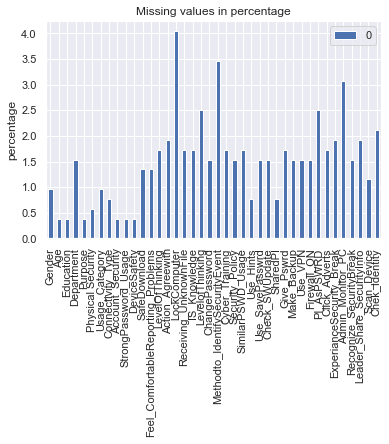

In [279]:
sns.set()
plt.figure(figsize=(16,5))
miss_vals = pd.DataFrame(data.isnull().sum() / len(data) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')


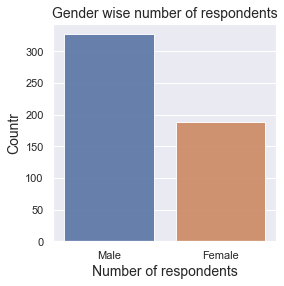

In [280]:
age_r=data["Gender"].value_counts()
plt.figure(figsize=(4,4))
sns.barplot(x=age_r.index, y=age_r.values, alpha=0.9)
plt.xlabel('Number of respondents', fontsize=14)
plt.ylabel('Countr', fontsize=14)
plt.title("Gender wise number of respondents", fontsize=14)
plt.show()

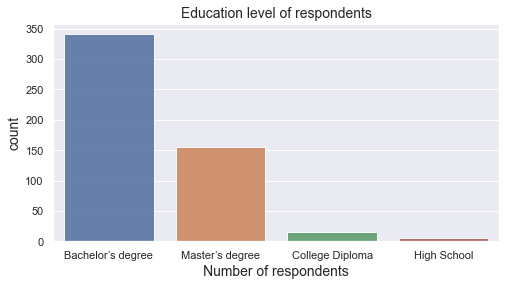

In [281]:
dep_r=data["Education"].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=dep_r.index, y=dep_r.values, alpha=0.9)
plt.xlabel('Number of respondents', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title("Education level of respondents", fontsize=14)
plt.show()

In [282]:
data.columns

Index(['Gender', 'Age', 'Education', 'Department', 'Purpose',
       'Physical Security', 'Usage_Category', 'Connectivity_Type',
       'Account_Security', 'StrongPassword_Usage', 'DeviceSafety',
       'SafeDownload', 'Feel_ComfortableReporting_Problems', 'LevelOfThinking',
       'Action_Agreewith', 'LockComputer', 'Receiving_UnknownFile',
       'IS_Knowledge', 'LevelofThinking', 'ChangePassword',
       'Methodto_IdentifySecurityEvent', 'Cyber_Training', 'Security_Policy',
       'SimilarPSWD_Usage', 'Use_Hints', 'Use_SavePasswrd', 'Check_SWUpdate',
       'SharedPI', 'Give_Pswrd', 'Make_Backup', 'Use_VPN', 'Firewall_ON',
       'PI_AsPSWRD', 'Click_Adverts', 'ExperianceSecurity_Break',
       'Admin_Monitor_PC', 'Recognize_SecurityBreak',
       'Leader_Share_SecurityInfo', 'Scan_Device', 'Chek_Identity'],
      dtype='object')

In [283]:
data

Gender    Age          Education                        Department  \
0      Male  26-34    Master’s degree                Information System   
1      Male  26-34    Master’s degree  Computer science and engineering   
2    Female  26-34    Master’s degree                Information System   
3      Male  26-34    Master’s degree     Computer network and security   
4    Female  26-34    Master’s degree  Computer science and engineering   
..      ...    ...                ...                               ...   
515    Male  26-34    Master’s degree                     Biotechnology   
516    Male  26-34  Bachelor’s degree                Information System   
517    Male  26-34    Master’s degree            Information technology   
518    Male  26-34  Bachelor’s degree                Information System   
519  Female  26-34    Master’s degree         communication engineering   

                                               Purpose  \
0    Education/ Information seeking;Government serv...   
1    Education/ Information seeking;Social networki...   
2    Social networking like email, Facebook, WhatsA...   
3    Education/ Information seeking;Social networki...   
4    Education/ Information seeking;Social networki...   
..                                                 ...   
515  Social networking like email, Facebook, WhatsA...   
516                     Education/ Information seeking   
517                     Education/ Information seeking   
518  Education/ Information seeking;Online banking;...   
519                     Education/ Information seeking   

             Physical Security Usage_Category  \
0                  CCTV camera  Frequent user   
1     CCTV camera;Manual guard  Frequent user   
2                         None  Frequent user   
3    Manual guard;Danger fence  Frequent user   
4                 Manual guard  Frequent user   
..                         ...            ...   
515               Manual guard  Frequent user   
516               Manual guard  Frequent user   
517   CCTV camera;Manual guard  Frequent user   
518   CCTV camera;Manual guard  Frequent user   
519               Manual guard  Frequent user   

                                     Connectivity_Type  \
0    Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadba...   
1       Wi-Fi;Mobile Data;Broadband wired connectivity   
2                                                Wi-Fi   
3                     Private;Mobile Data;Public Wi-Fi   
4       Wi-Fi;Mobile Data;Broadband wired connectivity   
..                                                 ...   
515                       Broadband wired connectivity   
516                       Broadband wired connectivity   
517                                        Mobile Data   
518                                        Mobile Data   
519                                              Wi-Fi   

                                      Account_Security  \
0                                 Set strong passwords   
1    Do not save password on web browser cookies;No...   
2               Not share account passwords to any one   
3    Not share account passwords to any one;Change ...   
4    Not share account passwords to any one;Change ...   
..                                                 ...   
515  Do not save password on web browser cookies;No...   
516  Do not save password on web browser cookies;No...   
517                               Set strong passwords   
518                               Set strong passwords   
519  Not share account passwords to any one;Set str...   

        StrongPassword_Usage  ... Use_VPN Firewall_ON PI_AsPSWRD  \
0    For some selected sites  ...      No      Always      Never   
1                     Always  ...     Yes      Always  Sometimes   
2                  Sometimes  ...      No   Sometimes  Sometimes   
3                  Sometimes  ...     Yes      Always  Sometimes   
4                     Always  ...      No      Always      Never   
..              

# UniVariate Analysis

In [284]:
data["ExperianceSecurity_Break"].value_counts()

No     292
Yes    218
Name: ExperianceSecurity_Break, dtype: int64

<AxesSubplot:>

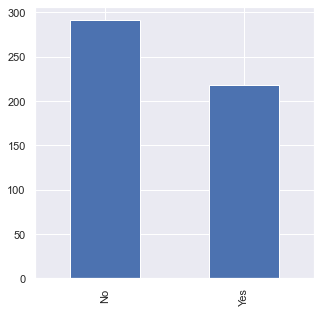

In [285]:
data["ExperianceSecurity_Break"].value_counts().plot.bar(figsize=(5,5))

# Handle Missing Data

# Visualize Missing Data

In [286]:
import missingno as msno

<AxesSubplot:>

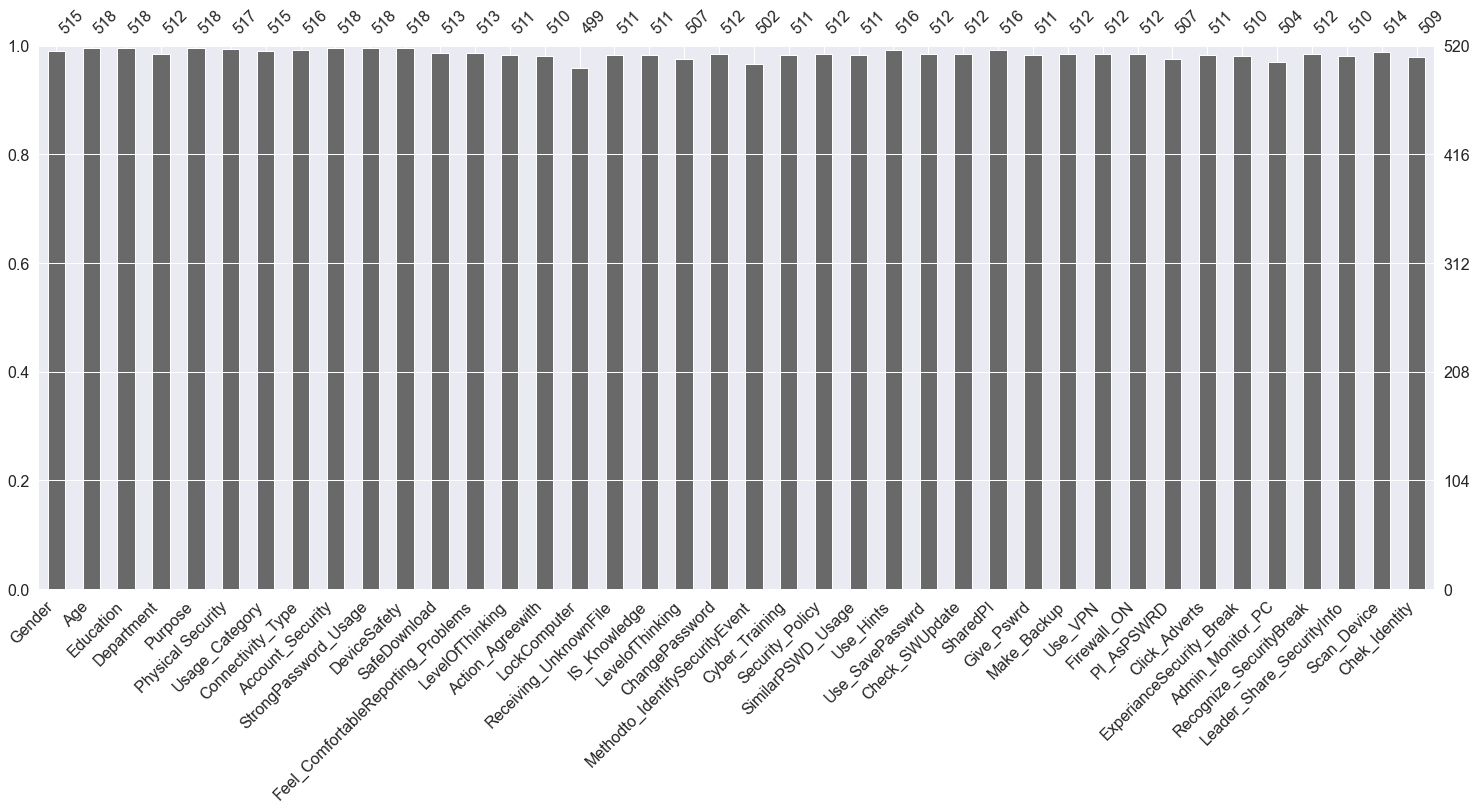

In [287]:
msno.bar(data)

<AxesSubplot:>

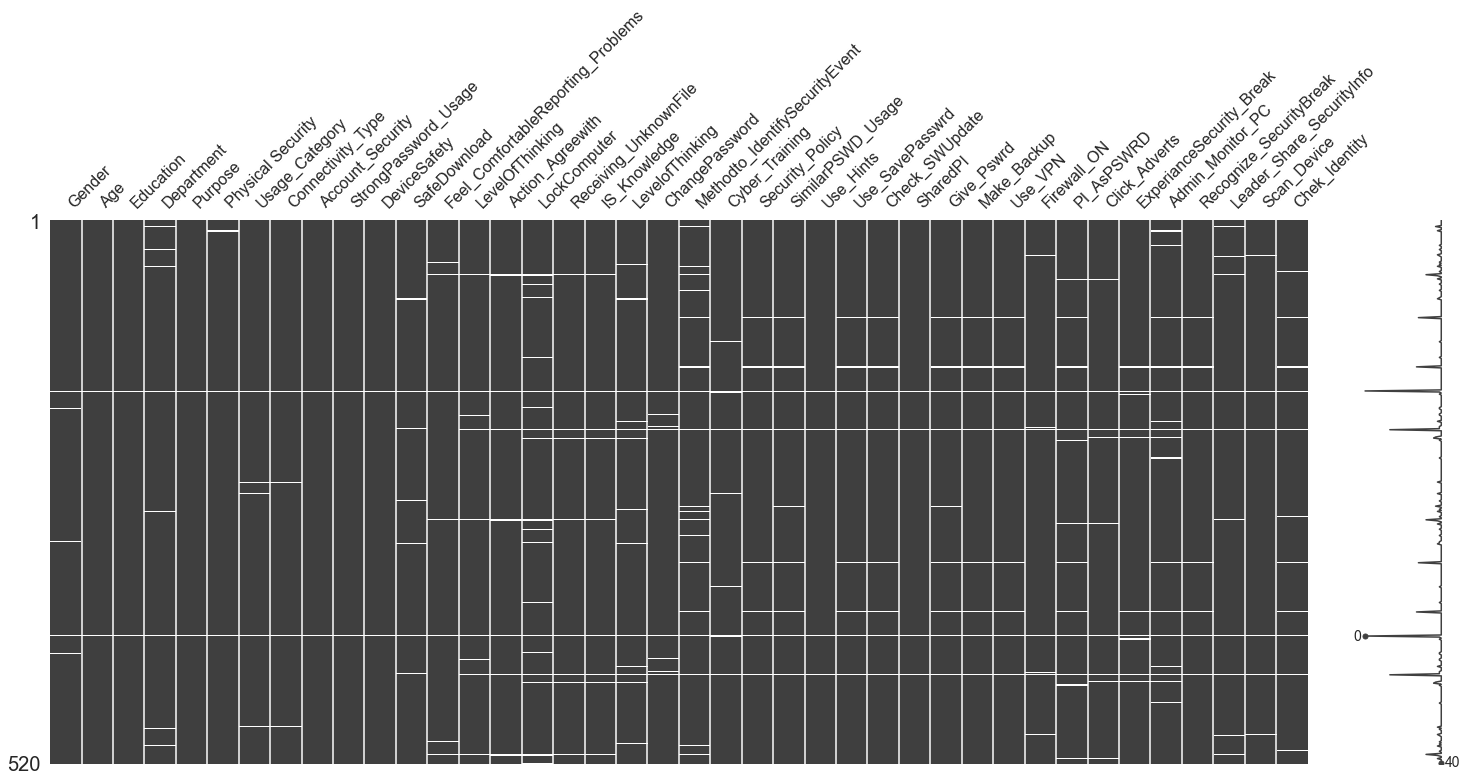

In [288]:
msno.matrix(data)

<AxesSubplot:>

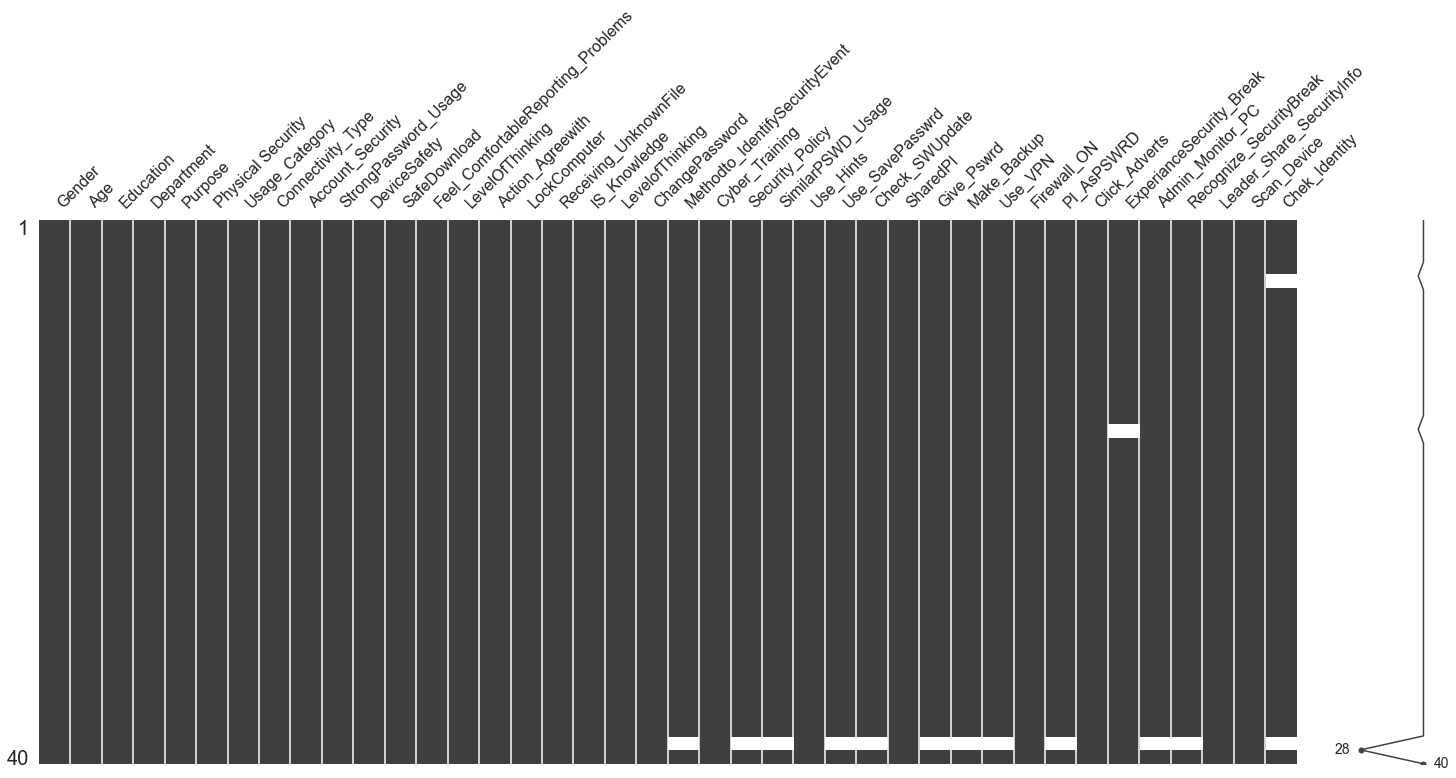

In [289]:
msno.matrix(data.sample(40))

# Finding reason for missing data using Dendrogram

<AxesSubplot:>

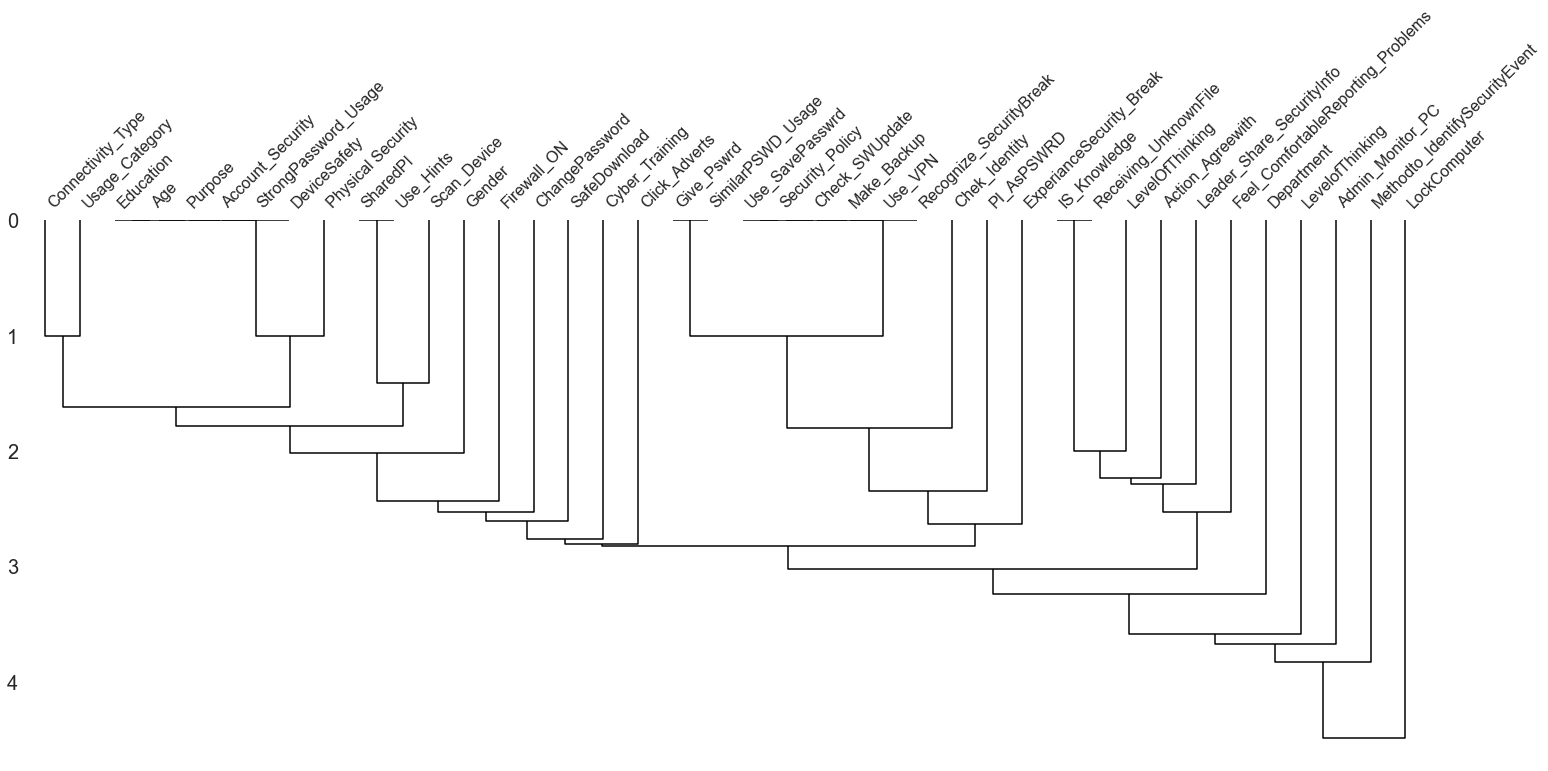

In [290]:
# dendogram is a tree diagram of missingness. It groups the highly correlated variables together.
msno.dendrogram(data)

It it necessary to fill in missing data values in data sets as most of the machine learning models that you want to use will provide an error if you pass NaN values into it

# Filling Missing Values for Categorical Columns

Mode is the most widely used method to fill the missing values of categorical columns.

In [291]:
miss=data.isnull().sum()

In [292]:
miss

Gender                                 5
Age                                    2
Education                              2
Department                             8
Purpose                                2
Physical Security                      3
Usage_Category                         5
Connectivity_Type                      4
Account_Security                       2
StrongPassword_Usage                   2
DeviceSafety                           2
SafeDownload                           7
Feel_ComfortableReporting_Problems     7
LevelOfThinking                        9
Action_Agreewith                      10
LockComputer                          21
Receiving_UnknownFile                  9
IS_Knowledge                           9
LevelofThinking                       13
ChangePassword                         8
Methodto_IdentifySecurityEvent        18
Cyber_Training                         9
Security_Policy                        8
SimilarPSWD_Usage                      9
Use_Hints       

In [293]:
missing_column=["Age","Education","Purpose","Usage_Category","Connectivity_Type","Account_Security","Account_Security","Gender","Department","Physical Security","Use_SavePasswrd","Check_SWUpdate","SafeDownload","Chek_Identity","Scan_Device","Leader_Share_SecurityInfo",
               "StrongPassword_Usage","DeviceSafety","SimilarPSWD_Usage","Recognize_SecurityBreak","Admin_Monitor_PC","Click_Adverts","PI_AsPSWRD","Firewall_ON","Use_VPN","Make_Backup",
               "Give_Pswrd","SimilarPSWD_Usage","Security_Policy","Cyber_Training","Methodto_IdentifySecurityEvent","LevelofThinking",
               "SafeDownload","Feel_ComfortableReporting_Problems","LevelOfThinking","Action_Agreewith","LockComputer",
                "Receiving_UnknownFile", "IS_Knowledge"]

In [294]:
data.isnull().sum()

Gender                                 5
Age                                    2
Education                              2
Department                             8
Purpose                                2
Physical Security                      3
Usage_Category                         5
Connectivity_Type                      4
Account_Security                       2
StrongPassword_Usage                   2
DeviceSafety                           2
SafeDownload                           7
Feel_ComfortableReporting_Problems     7
LevelOfThinking                        9
Action_Agreewith                      10
LockComputer                          21
Receiving_UnknownFile                  9
IS_Knowledge                           9
LevelofThinking                       13
ChangePassword                         8
Methodto_IdentifySecurityEvent        18
Cyber_Training                         9
Security_Policy                        8
SimilarPSWD_Usage                      9
Use_Hints       

In [295]:
for m in missing_column:
    data[m]=data[m].fillna(data[m].mode()[0])
    #data[m]=data[m].mode()[0]

<AxesSubplot:>

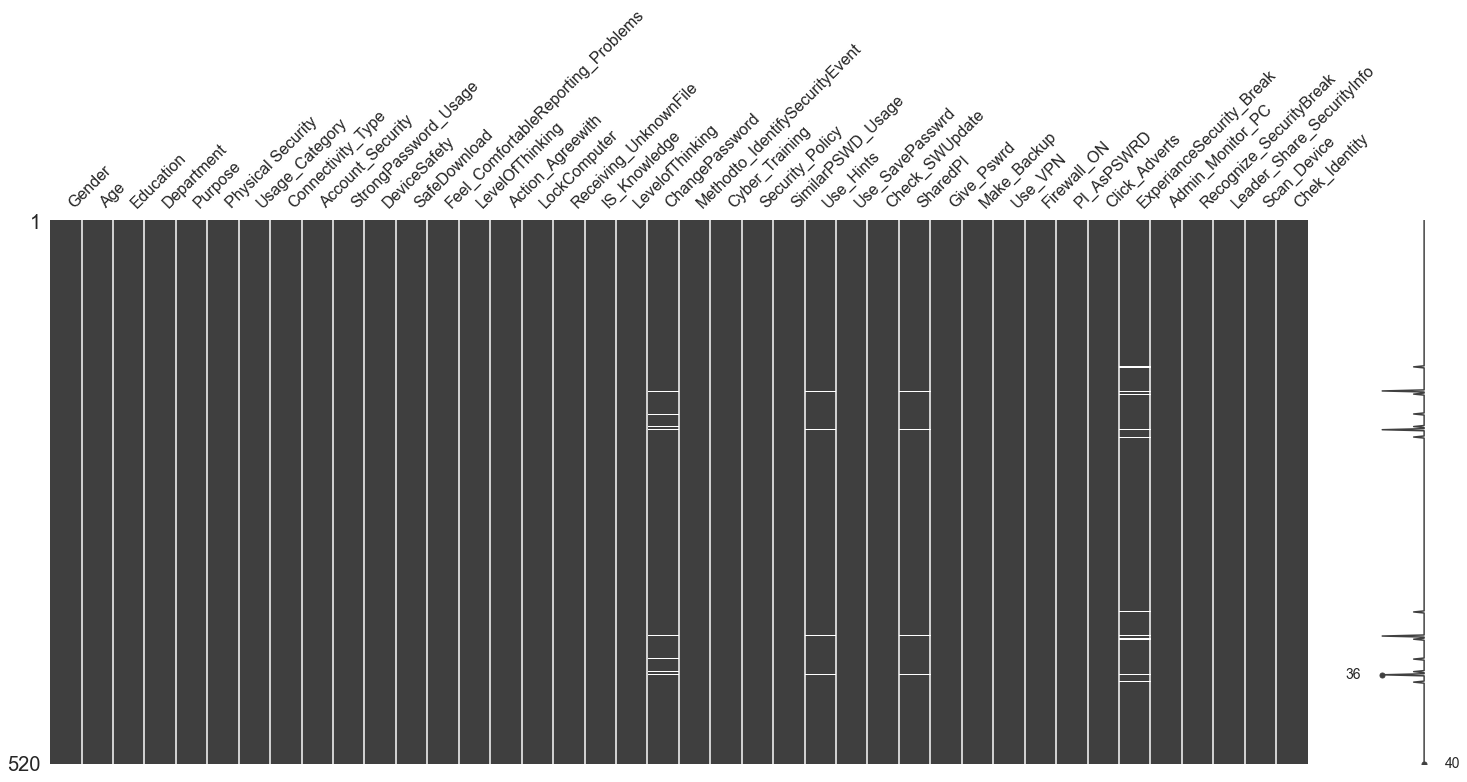

In [296]:
msno.matrix(data)

In [297]:
data.isnull().sum()

Gender                                 0
Age                                    0
Education                              0
Department                             0
Purpose                                0
Physical Security                      0
Usage_Category                         0
Connectivity_Type                      0
Account_Security                       0
StrongPassword_Usage                   0
DeviceSafety                           0
SafeDownload                           0
Feel_ComfortableReporting_Problems     0
LevelOfThinking                        0
Action_Agreewith                       0
LockComputer                           0
Receiving_UnknownFile                  0
IS_Knowledge                           0
LevelofThinking                        0
ChangePassword                         8
Methodto_IdentifySecurityEvent         0
Cyber_Training                         0
Security_Policy                        0
SimilarPSWD_Usage                      0
Use_Hints       

# Univariate Analysis

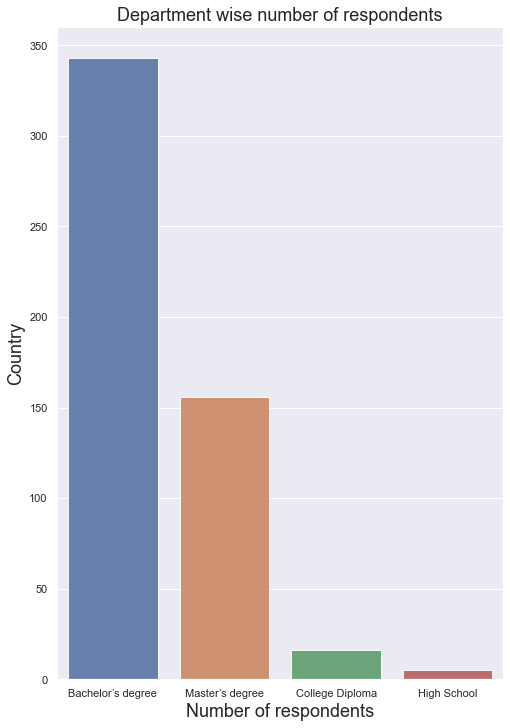

In [298]:
dept_rsp = data['Education'].value_counts()
plt.figure(figsize=(8,12))
sns.barplot(x=dept_rsp.index, y=dept_rsp.values, alpha=0.9)
plt.xlabel('Number of respondents', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.title("Department wise number of respondents", fontsize=18)
plt.show()

Most of the Respondents have Bachelors degree then MSC and High school the last is College Diploma

<AxesSubplot:>

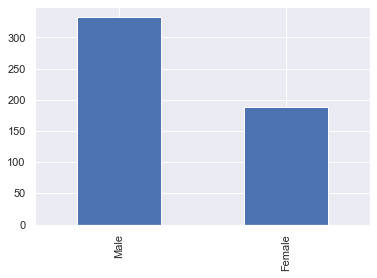

In [299]:
data["Gender"].value_counts().plot.bar()

c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gender', ylabel='Density'>

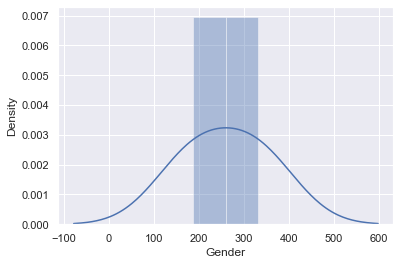

In [300]:
sns.distplot(data["Gender"].value_counts())

<AxesSubplot:>

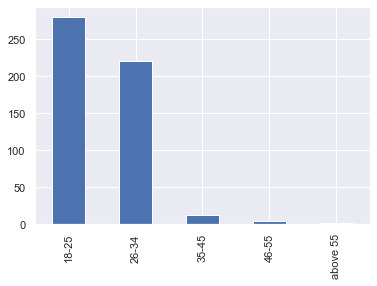

In [301]:
data["Age"].value_counts().plot.bar()

<AxesSubplot:>

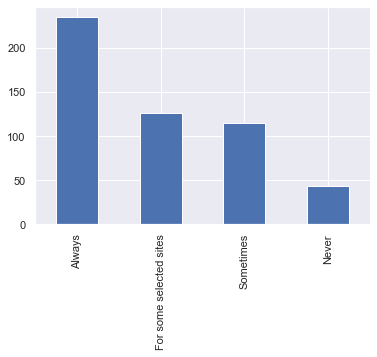

In [302]:
data["StrongPassword_Usage"].value_counts().plot.bar()

<AxesSubplot:>

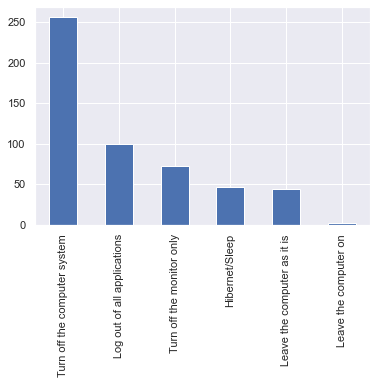

In [303]:
data["LockComputer"].value_counts().plot.bar()

<AxesSubplot:>

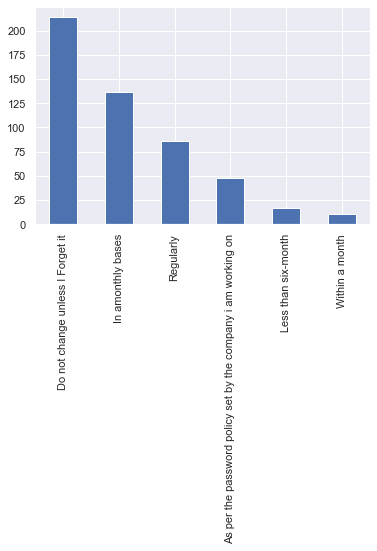

In [304]:
data["ChangePassword"].value_counts().plot.bar()

<AxesSubplot:>

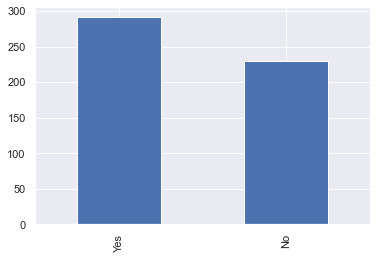

In [305]:
data["SimilarPSWD_Usage"].value_counts().plot.bar()

<AxesSubplot:>

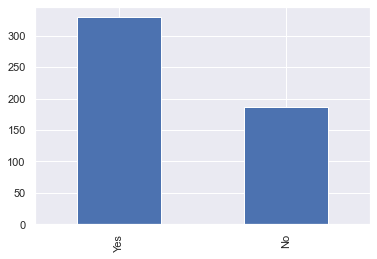

In [306]:
data["Use_Hints"].value_counts().plot.bar()

<AxesSubplot:>

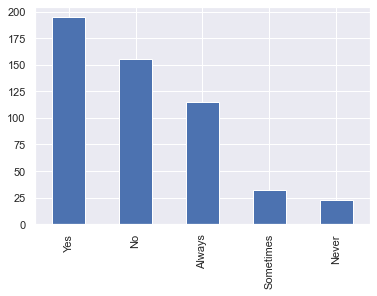

In [307]:
data["Firewall_ON"].value_counts().plot.bar()

<AxesSubplot:>

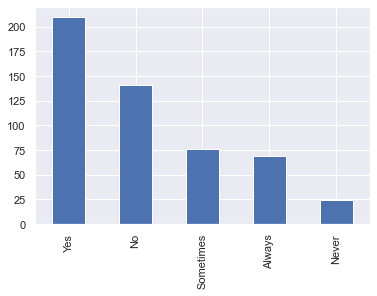

In [308]:
data["Click_Adverts"].value_counts().plot.bar()

<AxesSubplot:>

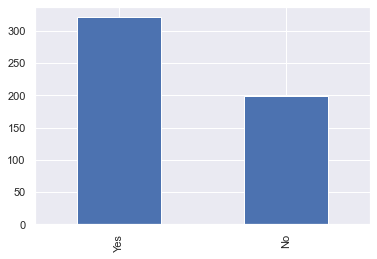

In [309]:
data["Make_Backup"].value_counts().plot.bar()

<AxesSubplot:>

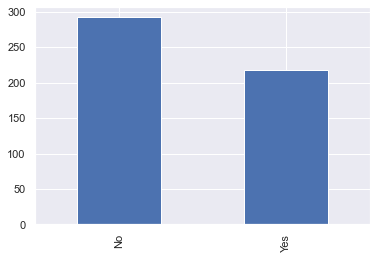

In [310]:
data["ExperianceSecurity_Break"].value_counts().plot.bar()

In [311]:
# plot count plot for the gender column
#sns.countplot(data.Gender)

# Bivariate Analysis

Bivariate analysis is slightly more analytical than Univariate analysis. When the data set contains two variables and researchers aim to undertake comparisons between the two data set then Bivariate analysis is the right type of analysis technique.
Bivariate Analysis: Bivariate analysis is finding some kind of empirical relationship between two variables

Now we will try to see the relationship between categorical variables. Again we will keep the ‘Approved’ column fixed and will compare it with other columns.

Countplot with Hue: We will plot count plots of categorical variables with Hue=’Approved’

# Importance of bivariate analysis


Bivariate analysis is an important statistical method because it lets researchers look at the relationship between two variables and determine their relationship. This can be helpful in many different kinds of research, such as social science, medicine, marketing, and more.

Here are some reasons why bivariate analysis is important:

Bivariate analysis helps identify trends and patterns: It can reveal hidden data trends and patterns by evaluating the relationship between two variables.
Bivariate analysis helps identify cause and effect relationships: It can assess if two variables are statistically associated, assisting researchers in establishing which variable causes the other.
It helps researchers make predictions: It allows researchers predict future results by modeling the link between two variables.
It helps inform decision-making: Business, public policy, and healthcare decision-making can benefit from bivariate analysis.
The ability to analyze the correlation between two variables is crucial for making sound judgments, and this analysis serves this purpose admirably

<AxesSubplot:xlabel='Gender', ylabel='count'>

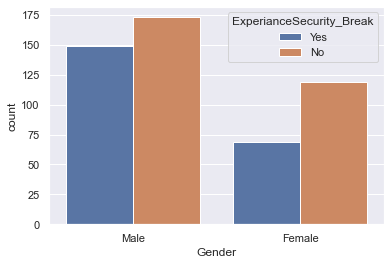

In [312]:
sns.countplot(data=data, x="Gender", hue="ExperianceSecurity_Break")

By looking at the above plot, it seem that the Male Respondents are more prone to Cyber Attack than Females. .

We can also plot a contingency table to get the actual numbers

In [313]:
pd.crosstab(data.Gender,data.ExperianceSecurity_Break,margins=True)

ExperianceSecurity_Break   No  Yes  All
Gender                                 
Female                    119   69  188
Male                      173  149  322
All                       292  218  510

# To see the percentages we can run the code shown below

In [314]:
all=pd.crosstab(data.Gender,data.ExperianceSecurity_Break,margins=True)["All"]
pd.crosstab(data.Gender,data.ExperianceSecurity_Break).divide(all,axis=0).dropna()

ExperianceSecurity_Break        No       Yes
Gender                                      
Female                    0.632979  0.367021
Male                      0.537267  0.462733

# Multivariate Analysis


Multivariate analysis is a more complex form of a statistical analysis technique and is used when there are more than two variables in the data set

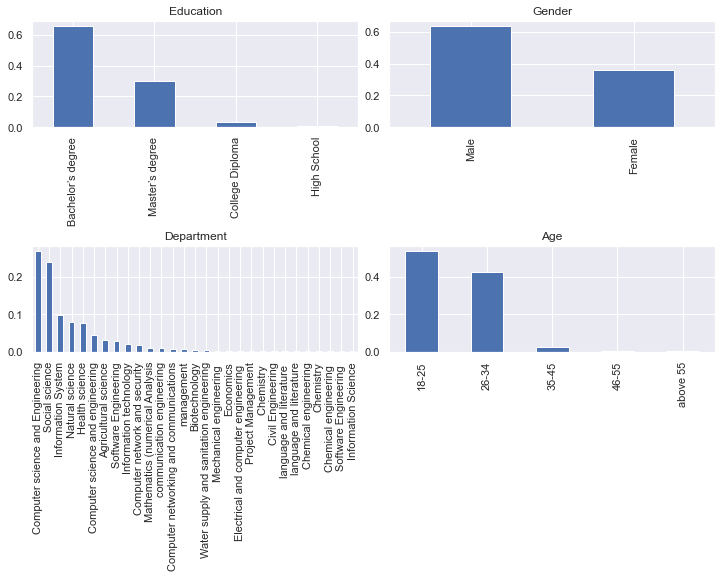

In [315]:
plt.subplot(221)
data.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education",figsize=(10,8))
plt.tight_layout(pad=0.5)
plt.subplot(222)
data.Gender.value_counts(normalize=True).plot(kind = 'bar', title = "Gender")
plt.tight_layout(pad=0.5)
plt.subplot(223)
data.Department.value_counts(normalize=True).plot(kind = 'bar',title = "Department")
plt.tight_layout(pad=0.5)
plt.subplot(224)
data.Age.value_counts(normalize=True).plot(kind = 'bar',title = "Age")
plt.tight_layout(pad=0.5)

<AxesSubplot:xlabel='Give_Pswrd', ylabel='count'>

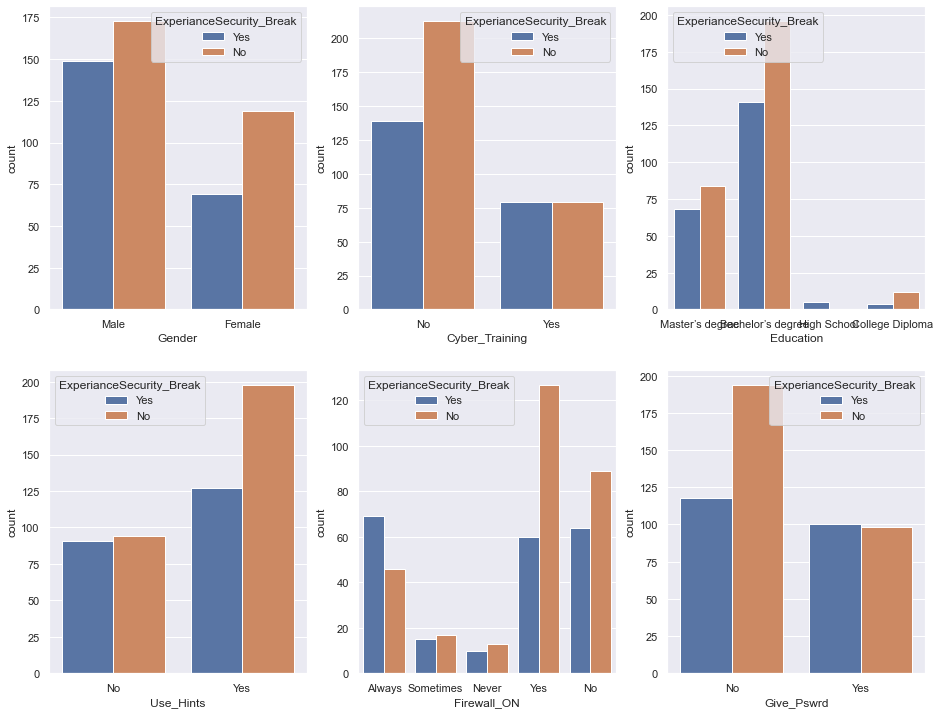

In [316]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='ExperianceSecurity_Break', data=data)
plt.subplot(232)
sns.countplot(x="Cyber_Training", hue='ExperianceSecurity_Break', data=data)
plt.subplot(233)
sns.countplot(x="Education", hue='ExperianceSecurity_Break', data=data)
plt.subplot(234)
sns.countplot(x="Use_Hints", hue='ExperianceSecurity_Break', data=data)
plt.subplot(235)
sns.countplot(x="Firewall_ON", hue='ExperianceSecurity_Break', data=data)
plt.subplot(236)
sns.countplot(x="Give_Pswrd", hue='ExperianceSecurity_Break', data=data)

Insights :

There is not a substantial difference between male and female approval rates.
Married applicants have a slightly higher chances of loan approval.
Graduates have higher chance of loan approval compared to non-graduates.
There is no substantial difference in the loan approval rates for self_employed vs not self_employed.
Applicants with no dependents or 2 dependents have higher chances of approval. But this does not correlate well.
Applicants with properties in semi-urban areas have higher loan approval rates.

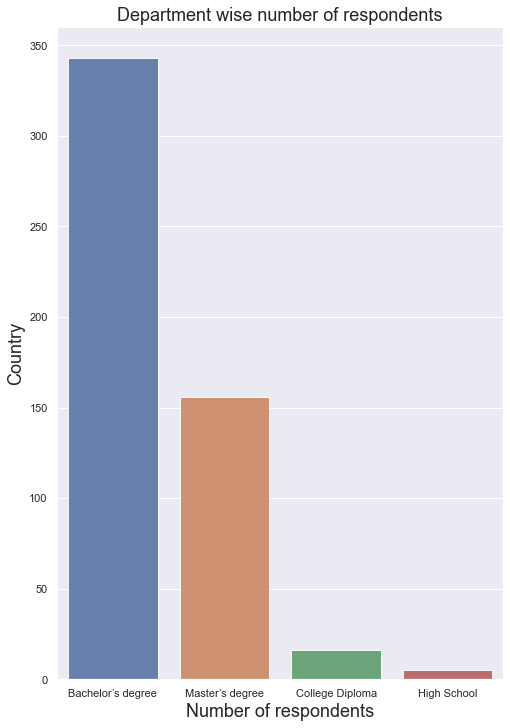

In [317]:
dept_rsp = data['Education'].value_counts()
plt.figure(figsize=(8,12))
sns.barplot(x=dept_rsp.index, y=dept_rsp.values, alpha=0.9)
plt.xlabel('Number of respondents', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.title("Department wise number of respondents", fontsize=18)
plt.show()

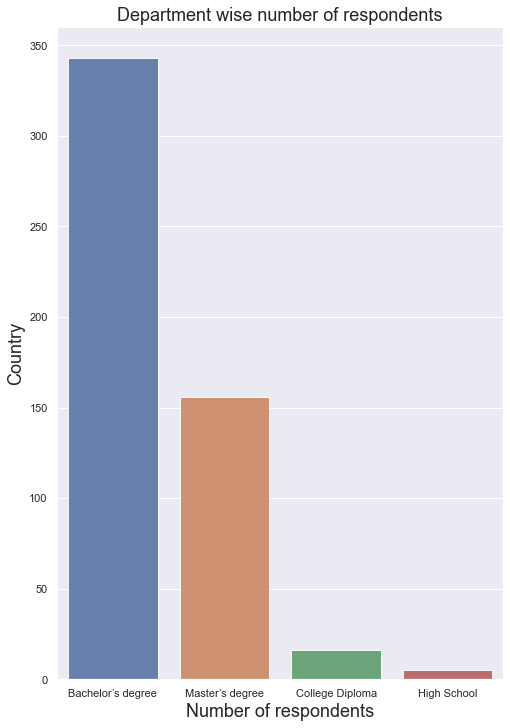

In [318]:
dept_rsp = data['Education'].value_counts()
plt.figure(figsize=(8,12))
sns.barplot(x=dept_rsp.index, y=dept_rsp.values, alpha=0.9)
plt.xlabel('Number of respondents', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.title("Department wise number of respondents", fontsize=18)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Education'>

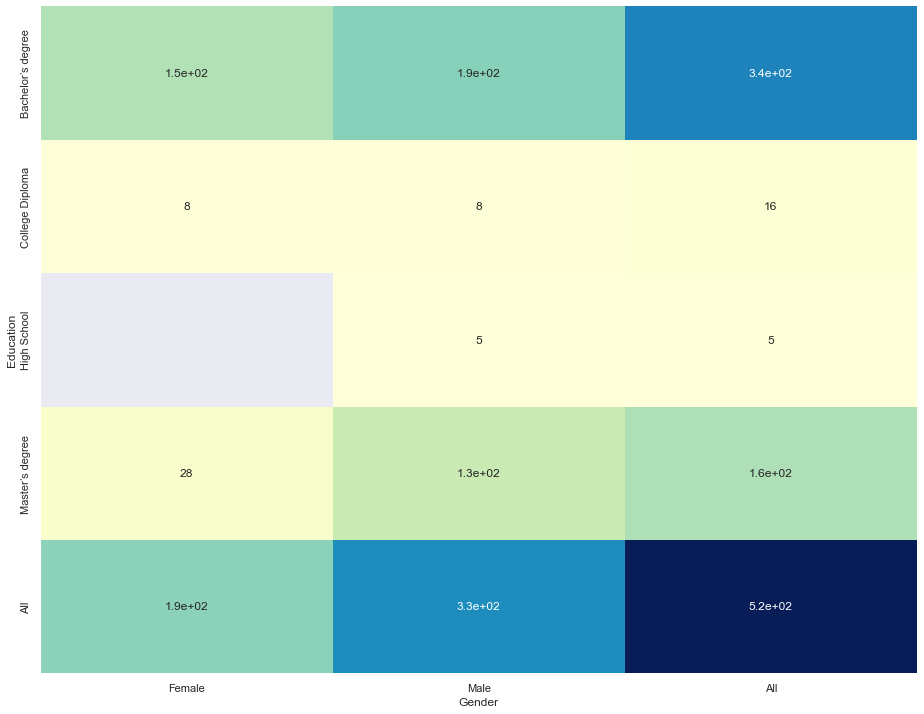

In [319]:
sns.heatmap(pd.crosstab(   data.Education, data.Gender, margins=True,     values=data.Age, aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=True, cbar=False)

In [320]:
pd.pivot_table(data,index =["Education","Gender"],columns=["Age"],aggfunc=[np.sum])

sum  \
                                                           Account_Security   
Age                                                                   18-25   
Education         Gender                                                      
Bachelor’s degree Female  Not share account passwords to any oneDo not s...   
                  Male    Set strong passwordsNot share account password...   
College Diploma   Female  Set strong passwordsNot share account password...   
                  Male    Not share account passwords to any oneNot shar...   
High School       Male    Not share account passwords to any oneDo not s...   
Master’s degree   Female  Set strong passwordsSet strong passwordsSet st...   
                  Male    Not share account passwords to any oneNot shar...   

                                                                             \
                                                                              
Age                                                                   26-34   
Education         Gender                                                      
Bachelor’s degree Female  Do not save password on web browser cookies;No...   
                  Male    Do not save password on web browser cookies;No...   
College Diploma   Female                                                NaN   
                  Male    Not share account passwords to any one;Set str...   
High School       Male                                                  NaN   
Master’s degree   Female  Not share account passwords to any oneNot shar...   
                  Male    Set strong passwordsDo not save password on we...   

                                                                             \
                                                                              
Age                                                                   35-45   
Education         Gender                                                      
Bachelor’s degree Female  Do not save password on web browser cookies;No...   
                  Male    Do not save password on web browser cookiesDo ...   
College Diploma   Female                                                NaN   
                  Male    Not share account passwords to any oneNot shar...   
High School       Male                                                  NaN   
Master’s degree   Female                                                NaN   
                  Male    Check for application updates;Set strong passw...   

                                                                             \
                                                                              
Age                                                                   46-55   
Education         Gender                                                      
Bachelor’s degree Female                                                NaN   
                  Male    Not share account passwords to any one;Set str...   
College Diploma   Female                                                NaN   
                  Male                                                  NaN   
High School       Male                                                  NaN   
Master’s degree   Female                                                NaN   
                  Male                                                  NaN   

                                                                    \
                                                                     
Age                                                       above 55   
Education         Gender                                             
Bachelor’s degree Female                                       NaN   
                  Male                                         NaN   
College Diploma   Female                                       NaN   
                  Male                                         NaN   
High School       Male          

In [321]:
pd.crosstab(data.Education, data.Gender, margins=True,     values=data.Age, aggfunc=pd.Series.count)

Gender             Female   Male  All
Education                            
Bachelor’s degree   152.0  191.0  343
College Diploma       8.0    8.0   16
High School           NaN    5.0    5
Master’s degree      28.0  128.0  156
All                 188.0  332.0  520

# visualize how the Gender of Participants is related to The Target 

In [322]:
def encode_Label(Label):
    global level
    if Label=="No":
        level=0
    if Label=="Yes":
        level=1
    return level

In [323]:
data["ExperianceSecurity_Break"]=data["ExperianceSecurity_Break"].map(encode_Label)

In [324]:
data.columns

Index(['Gender', 'Age', 'Education', 'Department', 'Purpose',
       'Physical Security', 'Usage_Category', 'Connectivity_Type',
       'Account_Security', 'StrongPassword_Usage', 'DeviceSafety',
       'SafeDownload', 'Feel_ComfortableReporting_Problems', 'LevelOfThinking',
       'Action_Agreewith', 'LockComputer', 'Receiving_UnknownFile',
       'IS_Knowledge', 'LevelofThinking', 'ChangePassword',
       'Methodto_IdentifySecurityEvent', 'Cyber_Training', 'Security_Policy',
       'SimilarPSWD_Usage', 'Use_Hints', 'Use_SavePasswrd', 'Check_SWUpdate',
       'SharedPI', 'Give_Pswrd', 'Make_Backup', 'Use_VPN', 'Firewall_ON',
       'PI_AsPSWRD', 'Click_Adverts', 'ExperianceSecurity_Break',
       'Admin_Monitor_PC', 'Recognize_SecurityBreak',
       'Leader_Share_SecurityInfo', 'Scan_Device', 'Chek_Identity'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='ExperianceSecurity_Break'>

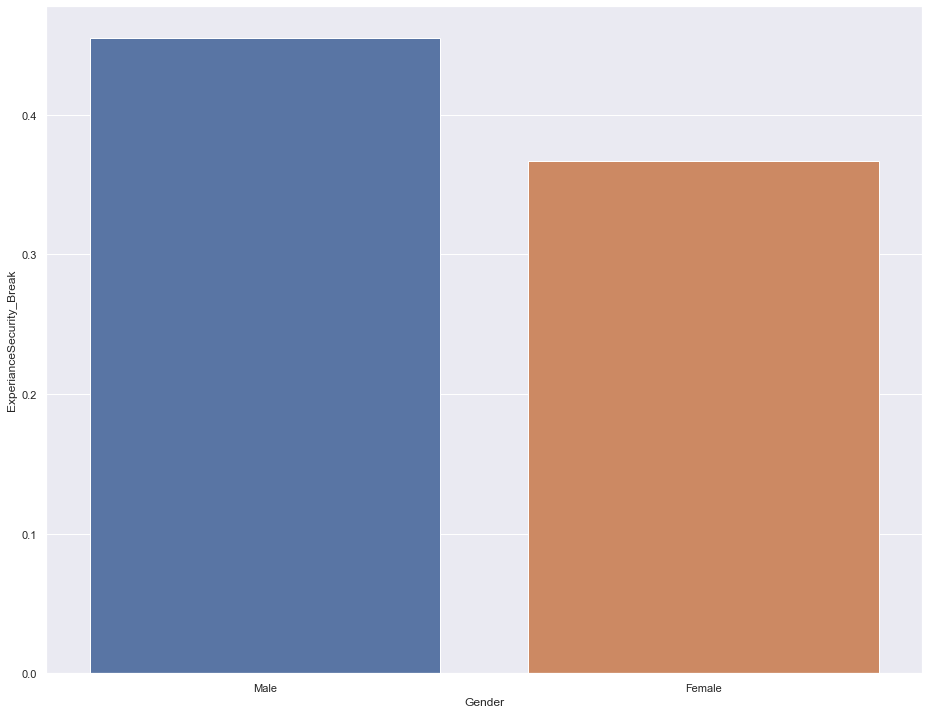

In [325]:
sns.barplot(x='Gender', y='ExperianceSecurity_Break', data=data, ci=None) 

From the above figure, you can see that of all the  Participants, more than 50% of males are prone to Cyber Attack; of all the Female, about 35% are prone. Seems like there exists a very strong relationship between the Sex and Attack features. To confirm this, we will use the chi-square test to confirm this later on.

In [326]:
pd.crosstab(data["Gender"],data["ExperianceSecurity_Break"],margins=True)

ExperianceSecurity_Break    0    1  All
Gender                                 
Female                    119   69  188
Male                      181  151  332
All                       300  220  520

# Calculate Chi-Square Value

In [327]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values)/df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    return chi_square_score, degree_f


The chi2_by_hand() function takes in three argument — the dataframe containing all your columns, followed by two strings containing the names of the two columns you are comparing against. It returns a tuple — the chi-square score, plus the degrees of freedom.

In [328]:
for m in data.columns:
    print(m)
    chi_score, degree_f = chi2_by_hand(data,m,'ExperianceSecurity_Break')
    print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Gender


ExperianceSecurity_Break    0    1
Gender                            
Female                    119   69
Male                      181  151

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Gender                                   
Female                    119   69    188
Male                      181  151    332
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Gender                                                 
Female                    108.461538   79.538462  188.0
Male                      191.538462  140.461538  332.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Gender                                                
Female                    1.023950  1.396295  2.420245
Male                      0.579827  0.790673  1.370500
Total                     1.603777  2.186968  3.790745

Chi2_score: 3.790745185772102, Degrees of freedom: 1
Age


ExperianceSecurity_Break    0    1
Age                               
18-25                     179  101
26-34                     105  116
35-45                      10    3
46-55                       4    0
above 55                    2    0

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Age                                      
18-25                     179  101    280
26-34                     105  116    221
35-45                      10    3     13
46-55                       4    0      4
above 55                    2    0      2
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Age                                                    
18-25                     161.538462  118.461538  280.0
26-34                     127.500000   93.500000  221.0
35-45                       7.500000    5.500000   13.0
46-55                       2.307692    1.692308    4.0
above 55                    1.153846    0.846154    2.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0          1      Total
Age                                                     
18-25                     1.887509   2.573876   4.461385
26-34                     3.970588   5.414439   9.385027
35-45                     0.833333   1.136364   1.969697
46-55                     1.241026   1.692308   2.933333
above 55                  0.620513   0.846154   1.466667
Total                     8.552969  11.663140  20.216109

Chi2_score: 20.216108989050163, Degrees of freedom: 4
Education


ExperianceSecurity_Break    0    1
Education                         
Bachelor’s degree         202  141
College Diploma            12    4
High School                 0    5
Master’s degree            86   70

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Education                                
Bachelor’s degree         202  141    343
College Diploma            12    4     16
High School                 0    5      5
Master’s degree            86   70    156
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Education                                              
Bachelor’s degree         197.884615  145.115385  343.0
College Diploma             9.230769    6.769231   16.0
High School                 2.884615    2.115385    5.0
Master’s degree            90.000000   66.000000  156.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Education                                             
Bachelor’s degree         0.085587  0.116710  0.202297
College Diploma           0.830769  1.132867  1.963636
High School               2.884615  3.933566  6.818182
Master’s degree           0.177778  0.242424  0.420202
Total                     3.978750  5.425568  9.404317

Chi2_score: 9.404317224725387, Degrees of freedom: 3
Department


ExperianceSecurity_Break                   0   1
Department                                      
Agricultural science                       8   8
Biotechnology                              3   0
Chemical engineering                       0   2
Chemical engineering                       0   2
Chemistry                                  0   2
Chemistry                                  2   0
Civil Engineering                          2   0
Computer network and security              6   4
Computer networking and communications     1   3
Computer science and Engineering         107  33
Computer science and engineering           7  16
Economics                                  0   2
Electrical and computer engineering        0   2
Health science                            24  16
Information Science                        1   0
Information System                        18  33
Information technology                    11   0
Mathematics (numerical Analysis            3   2
Mechanical engineering                     0   2
Natural science                           34   8
Project Management                         0   2
Social science                            60  64
Software Engineering                       5  10
Software Engineering                       1   0
Water supply and sanitation engineering    0   3
communication engineering                  5   0
language and literature                    2   0
language and literature                    0   2
management                                 0   4

---Observed (O)---


ExperianceSecurity_Break                   0    1  Total
Department                                              
Agricultural science                       8    8     16
Biotechnology                              3    0      3
Chemical engineering                       0    2      2
Chemical engineering                       0    2      2
Chemistry                                  0    2      2
Chemistry                                  2    0      2
Civil Engineering                          2    0      2
Computer network and security              6    4     10
Computer networking and communications     1    3      4
Computer science and Engineering         107   33    140
Computer science and engineering           7   16     23
Economics                                  0    2      2
Electrical and computer engineering        0    2      2
Health science                            24   16     40
Information Science                        1    0      1
Information System                        18   33     51
Information technology                    11    0     11
Mathematics (numerical Analysis            3    2      5
Mechanical engineering                     0    2      2
Natural science                           34    8     42
Project Management                         0    2      2
Social science                            60   64    124
Software Engineering                       5   10     15
Software Engineering                       1    0      1
Water supply and sanitation engineering    0    3      3
communication engineering                  5    0      5
language and literature                    2    0      2
language and literature                    0    2      2
management                                 0    4      4
Total                                    300  220    520

---Expected (E)---


ExperianceSecurity_Break                          0           1  Total
Department                                                            
Agricultural science                       9.230769    6.769231   16.0
Biotechnology                              1.730769    1.269231    3.0
Chemical engineering                       1.153846    0.846154    2.0
Chemical engineering                       1.153846    0.846154    2.0
Chemistry                                  1.153846    0.846154    2.0
Chemistry                                  1.153846    0.846154    2.0
Civil Engineering                          1.153846    0.846154    2.0
Computer network and security              5.769231    4.230769   10.0
Computer networking and communications     2.307692    1.692308    4.0
Computer science and Engineering          80.769231   59.230769  140.0
Computer science and engineering          13.269231    9.730769   23.0
Economics                                  1.153846    0.846154    2.0
Electrical and computer engineering        1.153846    0.846154    2.0
Health science                            23.076923   16.923077   40.0
Information Science                        0.576923    0.423077    1.0
Information System                        29.423077   21.576923   51.0
Information technology                     6.346154    4.653846   11.0
Mathematics (numerical Analysis            2.884615    2.115385    5.0
Mechanical engineering                     1.153846    0.846154    2.0
Natural science                           24.230769   17.769231   42.0
Project Management                         1.153846    0.846154    2.0
Social science                            71.538462   52.461538  124.0
Software Engineering                       8.653846    6.346154   15.0
Software Engineering                       0.576923    0.423077    1.0
Water supply and sanitation engineering    1.730769    1.269231    3.0
communication engineering                  2.884615    2.115385    5.0
language and literature                    1.153846    0.846154    2.0
language and literature                    1.153846    0.846154    2.0
management                                 2.307692    1.692308    4.0
Total                                    300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break                         0          1       Total
Department                                                               
Agricultural science                      0.164103   0.223776    0.387879
Biotechnology                             0.930769   1.269231    2.200000
Chemical engineering                      1.153846   1.573427    2.727273
Chemical engineering                      1.153846   1.573427    2.727273
Chemistry                                 1.153846   1.573427    2.727273
Chemistry                                 0.620513   0.846154    1.466667
Civil Engineering                         0.620513   0.846154    1.466667
Computer network and security             0.009231   0.012587    0.021818
Computer networking and communications    0.741026   1.010490    1.751515
Computer science and Engineering          8.518755  11.616484   20.135238
Computer science and engineering          2.961984   4.039070    7.001054
Economics                                 1.153846   1.573427    2.727273
Electrical and computer engineering       1.153846   1.573427    2.727273
Health science                            0.036923   0.050350    0.087273
Information Science                       0.310256   0.423077    0.733333
Information System                        4.434842   6.047511   10.482353
Information technology                    3.412821   4.653846    8.066667
Mathematics (numerical Analysis           0.004615   0.006294    0.010909
Mechanical engineering                    1.153846   1.573427    2.727273
Natural science                           3.938706   5.370962    9.309668
Project Management                        1.153846   1.573427    2.727273
Social science                            1.861042   2.537785    4.398827
Software Engineering                      1.542735   2.103730    3.646465
Software Engineering                      0.310256   0.423077    0.733333
Water supply and sanitation engineering   1.730769   2.360140    4.090909
communication engineering                 1.551282   2.115385    3.666667
language and literature                   0.620513   0.846154    1.466667
language and literature                   1.153846   1.573427    2.727273
management                                2.307692   3.146853    5.454545
Total                                    45.860115  62.536520  108.396635

Chi2_score: 108.39663509349509, Degrees of freedom: 28
Purpose


ExperianceSecurity_Break                             0   1
Purpose                                                   
E-commerce                                           9   6
E-commerce;Social networking like email, Facebo...   1   0
Education/ Information seeking                      95  50
Education/ Information seeking;E-commerce            0   2
Education/ Information seeking;E-commerce;Socia...   1   0
Education/ Information seeking;Entertainment li...   8   2
Education/ Information seeking;Entertainment li...   3   3
Education/ Information seeking;Entertainment li...   8  12
Education/ Information seeking;Government service    2   2
Education/ Information seeking;Government servi...   2   8
Education/ Information seeking;Online banking        4   0
Education/ Information seeking;Online banking;E...   0   4
Education/ Information seeking;Online banking;E...   3   9
Education/ Information seeking;Online banking;E...   0   2
Education/ Information seeking;Online banking;E...  14   0
Education/ Information seeking;Online banking;E...   2   0
Education/ Information seeking;Online banking;E...   0   2
Education/ Information seeking;Online banking;E...   0   4
Education/ Information seeking;Online banking;E...   0   4
Education/ Information seeking;Online banking;G...   2   3
Education/ Information seeking;Online banking;S...  11   8
Education/ Information seeking;Social networkin...  26  27
Entertainment like gaming                           24   9
Government service                                   9   9
Online banking                                      12   2
Social networking like email, Facebook, WhatsAp...  64  52

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Purpose                                                            
E-commerce                                            9    6     15
E-commerce;Social networking like email, Facebo...    1    0      1
Education/ Information seeking                       95   50    145
Education/ Information seeking;E-commerce             0    2      2
Education/ Information seeking;E-commerce;Socia...    1    0      1
Education/ Information seeking;Entertainment li...    8    2     10
Education/ Information seeking;Entertainment li...    3    3      6
Education/ Information seeking;Entertainment li...    8   12     20
Education/ Information seeking;Government service     2    2      4
Education/ Information seeking;Government servi...    2    8     10
Education/ Information seeking;Online banking         4    0      4
Education/ Information seeking;Online banking;E...    0    4      4
Education/ Information seeking;Online banking;E...    3    9     12
Education/ Information seeking;Online banking;E...    0    2      2
Education/ Information seeking;Online banking;E...   14    0     14
Education/ Information seeking;Online banking;E...    2    0      2
Education/ Information seeking;Online banking;E...    0    2      2
Education/ Information seeking;Online banking;E...    0    4      4
Education/ Information seeking;Online banking;E...    0    4      4
Education/ Information seeking;Online banking;G...    2    3      5
Education/ Information seeking;Online banking;S...   11    8     19
Education/ Information seeking;Social networkin...   26   27     53
Entertainment like gaming                            24    9     33
Government service                                    9    9     18
Online banking                                       12    2     14
Social networking like email, Facebook, WhatsAp...   64   52    116
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Purpose                                                                      
E-commerce                                            8.653846    6.346154   
E-commerce;Social networking like email, Facebo...    0.576923    0.423077   
Education/ Information seeking                       83.653846   61.346154   
Education/ Information seeking;E-commerce             1.153846    0.846154   
Education/ Information seeking;E-commerce;Socia...    0.576923    0.423077   
Education/ Information seeking;Entertainment li...    5.769231    4.230769   
Education/ Information seeking;Entertainment li...    3.461538    2.538462   
Education/ Information seeking;Entertainment li...   11.538462    8.461538   
Education/ Information seeking;Government service     2.307692    1.692308   
Education/ Information seeking;Government servi...    5.769231    4.230769   
Education/ Information seeking;Online banking         2.307692    1.692308   
Education/ Information seeking;Online banking;E...    2.307692    1.692308   
Education/ Information seeking;Online banking;E...    6.923077    5.076923   
Education/ Information seeking;Online banking;E...    1.153846    0.846154   
Education/ Information seeking;Online banking;E...    8.076923    5.923077   
Education/ Information seeking;Online banking;E...    1.153846    0.846154   
Education/ Information seeking;Online banking;E...    1.153846    0.846154   
Education/ Information seeking;Online banking;E...    2.307692    1.692308   
Education/ Information seeking;Online banking;E...    2.307692    1.692308   
Education/ Information seeking;Online banking;G...    2.884615    2.115385   
Education/ Information seeking;Online banking;S...   10.961538    8.038462   
Education/ Information seeking;Social networkin...   30.576923   22.423077   
Entertainment like gaming                            19.038462   13.961538   
Government service                                   10.384615    7.615385   
Online banking                                        8.076923    5.923077   
Social networking like email, Facebook, WhatsAp...   66.923077   49.076923   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Purpose                                                    
E-commerce                                           15.0  
E-commerce;Social networking like email, Facebo...    1.0  
Education/ Information seeking                      145.0  
Education/ Information seeking;E-commerce             2.0  
Education/ Information seeking;E-commerce;Socia...    1.0  
Education/ Information seeking;Entertainment li...   10.0  
Education/ Information seeking;Entertainment li...    6.0  
Education/ Information seeking;Entertainment li...   20.0  
Education/ Information seeking;Government service     4.0  
Education/ Information seeking;Government servi...   10.0  
Education/ Information seeking;Online banking         4.0  
Education/ Information seeking;Online banking;E...    4.0  
Education/ Information seeking;Online banking;E...   12.0  
Education/ Information seeking;Online banking;E...    2.0  
Education/ Information seeking;Online banking;E...   14.0  
Education/ Information seeking;Online banking;E...    2.0  
Education/ Information seeking;Online banking;E...    2.0  
Education/ Information seeking;Online banking;E...    4.0  
Education/ Information seeking;Online banking;E...    4.0  
Education/ Information seeking;Online banking;G...    5.0  
Education/ Information seeking;Online banking;S...   19.0  
Education/ Information seeking;Social networkin...   53.0  
Entertainment like gaming                            33.0  
Government service                                   18.0  
Online banking                                       14.0  
Social networking like email, Facebook, WhatsAp...  116.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
Purpose                                                                    
E-commerce                                           0.013846   0.018881   
E-commerce;Social networking like email, Facebo...   0.310256   0.423077   
Education/ Information seeking                       1.538904   2.098505   
Education/ Information seeking;E-commerce            1.153846   1.573427   
Education/ Information seeking;E-commerce;Socia...   0.310256   0.423077   
Education/ Information seeking;Entertainment li...   0.862564   1.176224   
Education/ Information seeking;Entertainment li...   0.061538   0.083916   
Education/ Information seeking;Entertainment li...   1.085128   1.479720   
Education/ Information seeking;Government service    0.041026   0.055944   
Education/ Information seeking;Government servi...   2.462564   3.358042   
Education/ Information seeking;Online banking        1.241026   1.692308   
Education/ Information seeking;Online banking;E...   2.307692   3.146853   
Education/ Information seeking;Online banking;E...   2.223077   3.031469   
Education/ Information seeking;Online banking;E...   1.153846   1.573427   
Education/ Information seeking;Online banking;E...   4.343590   5.923077   
Education/ Information seeking;Online banking;E...   0.620513   0.846154   
Education/ Information seeking;Online banking;E...   1.153846   1.573427   
Education/ Information seeking;Online banking;E...   2.307692   3.146853   
Education/ Information seeking;Online banking;E...   2.307692   3.146853   
Education/ Information seeking;Online banking;G...   0.271282   0.369930   
Education/ Information seeking;Online banking;S...   0.000135   0.000184   
Education/ Information seeking;Social networkin...   0.685099   0.934226   
Entertainment like gaming                            1.293007   1.763191   
Government service                                   0.184615   0.251748   
Online banking                                       1.905495   2.598402   
Social networking like email, Facebook, WhatsAp...   0.127675   0.174102   
Total                                               29.966211  40.863015   

ExperianceSecurity_Break                                Total  
Purpose                                                        
E-commerce                                           0.032727  
E-commerce;Social networking like email, Facebo...   0.733333  
Education/ Information seeking                       3.637409  
Education/ Information seeking;E-commerce            2.727273  
Education/ Information seeking;E-commerce;Socia...   0.733333  
Education/ Information seeking;Entertainment li...   2.038788  
Education/ Information seeking;Entertainment li...   0.145455  
Education/ Information seeking;Entertainment li...   2.564848  
Education/ Information seeking;Government service    0.096970  
Education/ Information seeking;Government servi...   5.820606  
Education/ Information seeking;Online banking        2.933333  
Education/ Information seeking;Online banking;E...   5.454545  
Education/ Information seeking;Online banking;E...   5.254545  
Education/ Information seeking;Online banking;E...   2.727273  
Education/ Information seeking;Online banking;E...  10.266667  
Education/ Information seeking;Online banking;E...   1.466667  
Education/ Information seeking;Online banking;E...   2.727273  
Education/ Information seeking;Online banking;E...   5.454545  
Education/ Information seeking;Online banking;E...   5.454545  
Education/ Information seeking;Online banking;G...   0.641212  
Education/ Information seeking;Online banking;S...   0.000319  
Education/ Information seeking;Social networkin...   1.619325  
Entertainment like gaming                            3.056198  
Government service                                   0.436364  
Online banking                                       4.503896  
Social networking like email, Facebook, WhatsAp...   0.301776  
Tot

Chi2_score: 70.82922674231027, Degrees of freedom: 25
Physical Security


ExperianceSecurity_Break                 0   1
Physical Security                             
CCTV camera                             47  37
CCTV camera;Danger fence                 0   2
CCTV camera;Manual guard                14  27
CCTV camera;Manual guard;Danger fence    9  10
Danger fence                            24  16
Danger fence;None                        1   2
Manual guard                           110  77
Manual guard;Danger fence                7   7
Manual guard;None                        2   0
None                                    86  42

---Observed (O)---


ExperianceSecurity_Break                 0    1  Total
Physical Security                                     
CCTV camera                             47   37     84
CCTV camera;Danger fence                 0    2      2
CCTV camera;Manual guard                14   27     41
CCTV camera;Manual guard;Danger fence    9   10     19
Danger fence                            24   16     40
Danger fence;None                        1    2      3
Manual guard                           110   77    187
Manual guard;Danger fence                7    7     14
Manual guard;None                        2    0      2
None                                    86   42    128
Total                                  300  220    520

---Expected (E)---


ExperianceSecurity_Break                        0           1  Total
Physical Security                                                   
CCTV camera                             48.461538   35.538462   84.0
CCTV camera;Danger fence                 1.153846    0.846154    2.0
CCTV camera;Manual guard                23.653846   17.346154   41.0
CCTV camera;Manual guard;Danger fence   10.961538    8.038462   19.0
Danger fence                            23.076923   16.923077   40.0
Danger fence;None                        1.730769    1.269231    3.0
Manual guard                           107.884615   79.115385  187.0
Manual guard;Danger fence                8.076923    5.923077   14.0
Manual guard;None                        1.153846    0.846154    2.0
None                                    73.846154   54.153846  128.0
Total                                  300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break                      0          1      Total
Physical Security                                                    
CCTV camera                            0.044078   0.060107   0.104185
CCTV camera;Danger fence               1.153846   1.573427   2.727273
CCTV camera;Manual guard               3.940025   5.372761   9.312786
CCTV camera;Manual guard;Danger fence  0.351012   0.478653   0.829665
Danger fence                           0.036923   0.050350   0.087273
Danger fence;None                      0.308547   0.420746   0.729293
Manual guard                           0.041478   0.056561   0.098039
Manual guard;Danger fence              0.143590   0.195804   0.339394
Manual guard;None                      0.620513   0.846154   1.466667
None                                   2.000321   2.727710   4.728030
Total                                  8.640333  11.782272  20.422605

Chi2_score: 20.422604685161886, Degrees of freedom: 9
Usage_Category


ExperianceSecurity_Break         0    1
Usage_Category                         
Frequent user                  205  177
I am not internet user at all    6    0
Infrequent user                 82   37
Weekly basis                     7    6

---Observed (O)---


ExperianceSecurity_Break         0    1  Total
Usage_Category                                
Frequent user                  205  177    382
I am not internet user at all    6    0      6
Infrequent user                 82   37    119
Weekly basis                     7    6     13
Total                          300  220    520

---Expected (E)---


ExperianceSecurity_Break                0           1  Total
Usage_Category                                              
Frequent user                  220.384615  161.615385  382.0
I am not internet user at all    3.461538    2.538462    6.0
Infrequent user                 68.653846   50.346154  119.0
Weekly basis                     7.500000    5.500000   13.0
Total                          300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break              0         1      Total
Usage_Category                                              
Frequent user                  1.073970  1.464504   2.538474
I am not internet user at all  1.861538  2.538462   4.400000
Infrequent user                2.594462  3.537903   6.132366
Weekly basis                   0.033333  0.045455   0.078788
Total                          5.563304  7.586323  13.149627

Chi2_score: 13.149627294992246, Degrees of freedom: 3
Connectivity_Type


ExperianceSecurity_Break                              0   1
Connectivity_Type                                          
Broadband wired connectivity                         14  15
Mobile Data                                         131  81
Mobile Data;Broadband wired connectivity              4   2
Mobile Data;Public Wi-Fi                             23   9
Mobile Data;Public Wi-Fi;Broadband wired connec...    4  10
Private                                               3   0
Private Wi-Fi                                        14   8
Private Wi-Fi;Broadband wired connectivity            4   0
Private Wi-Fi;Mobile Data                             1   4
Private Wi-Fi;Mobile Data;Public Wi-Fi                8   4
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   14   2
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...    4   0
Private;Mobile Data                                   1   0
Private;Mobile Data;Public Wi-Fi                      0   1
Private;Wi-Fi;Mobile Data                             0   3
Private;Wi-Fi;Mobile Data;Broadband wired conne...    3   0
Private;Wi-Fi;Mobile Data;Public Wi-Fi                2   0
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...    4  16
Public Wi-Fi                                         20  12
Public Wi-Fi;Broadband wired connectivity             8   2
Wi-Fi                                                24  18
Wi-Fi;Broadband wired connectivity                    0   4
Wi-Fi;Mobile Data                                     5  13
Wi-Fi;Mobile Data;Broadband wired connectivity        2   9
Wi-Fi;Mobile Data;Public Wi-Fi                        2   3
Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired ...    5   2
Wi-Fi;Public Wi-Fi;Broadband wired connectivity       0   2

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Connectivity_Type                                                  
Broadband wired connectivity                         14   15     29
Mobile Data                                         131   81    212
Mobile Data;Broadband wired connectivity              4    2      6
Mobile Data;Public Wi-Fi                             23    9     32
Mobile Data;Public Wi-Fi;Broadband wired connec...    4   10     14
Private                                               3    0      3
Private Wi-Fi                                        14    8     22
Private Wi-Fi;Broadband wired connectivity            4    0      4
Private Wi-Fi;Mobile Data                             1    4      5
Private Wi-Fi;Mobile Data;Public Wi-Fi                8    4     12
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   14    2     16
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...    4    0      4
Private;Mobile Data                                   1    0      1
Private;Mobile Data;Public Wi-Fi                      0    1      1
Private;Wi-Fi;Mobile Data                             0    3      3
Private;Wi-Fi;Mobile Data;Broadband wired conne...    3    0      3
Private;Wi-Fi;Mobile Data;Public Wi-Fi                2    0      2
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...    4   16     20
Public Wi-Fi                                         20   12     32
Public Wi-Fi;Broadband wired connectivity             8    2     10
Wi-Fi                                                24   18     42
Wi-Fi;Broadband wired connectivity                    0    4      4
Wi-Fi;Mobile Data                                     5   13     18
Wi-Fi;Mobile Data;Broadband wired connectivity        2    9     11
Wi-Fi;Mobile Data;Public Wi-Fi                        2    3      5
Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired ...    5    2      7
Wi-Fi;Public Wi-Fi;Broadband wired connectivity       0    2      2
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Connectivity_Type                                                            
Broadband wired connectivity                         16.730769   12.269231   
Mobile Data                                         122.307692   89.692308   
Mobile Data;Broadband wired connectivity              3.461538    2.538462   
Mobile Data;Public Wi-Fi                             18.461538   13.538462   
Mobile Data;Public Wi-Fi;Broadband wired connec...    8.076923    5.923077   
Private                                               1.730769    1.269231   
Private Wi-Fi                                        12.692308    9.307692   
Private Wi-Fi;Broadband wired connectivity            2.307692    1.692308   
Private Wi-Fi;Mobile Data                             2.884615    2.115385   
Private Wi-Fi;Mobile Data;Public Wi-Fi                6.923077    5.076923   
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...    9.230769    6.769231   
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...    2.307692    1.692308   
Private;Mobile Data                                   0.576923    0.423077   
Private;Mobile Data;Public Wi-Fi                      0.576923    0.423077   
Private;Wi-Fi;Mobile Data                             1.730769    1.269231   
Private;Wi-Fi;Mobile Data;Broadband wired conne...    1.730769    1.269231   
Private;Wi-Fi;Mobile Data;Public Wi-Fi                1.153846    0.846154   
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   11.538462    8.461538   
Public Wi-Fi                                         18.461538   13.538462   
Public Wi-Fi;Broadband wired connectivity             5.769231    4.230769   
Wi-Fi                                                24.230769   17.769231   
Wi-Fi;Broadband wired connectivity                    2.307692    1.692308   
Wi-Fi;Mobile Data                                    10.384615    7.615385   
Wi-Fi;Mobile Data;Broadband wired connectivity        6.346154    4.653846   
Wi-Fi;Mobile Data;Public Wi-Fi                        2.884615    2.115385   
Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired ...    4.038462    2.961538   
Wi-Fi;Public Wi-Fi;Broadband wired connectivity       1.153846    0.846154   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Connectivity_Type                                          
Broadband wired connectivity                         29.0  
Mobile Data                                         212.0  
Mobile Data;Broadband wired connectivity              6.0  
Mobile Data;Public Wi-Fi                             32.0  
Mobile Data;Public Wi-Fi;Broadband wired connec...   14.0  
Private                                               3.0  
Private Wi-Fi                                        22.0  
Private Wi-Fi;Broadband wired connectivity            4.0  
Private Wi-Fi;Mobile Data                             5.0  
Private Wi-Fi;Mobile Data;Public Wi-Fi               12.0  
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   16.0  
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...    4.0  
Private;Mobile Data                                   1.0  
Private;Mobile Data;Public Wi-Fi                      1.0  
Private;Wi-Fi;Mobile Data                             3.0  
Private;Wi-Fi;Mobile Data;Broadband wired conne...    3.0  
Private;Wi-Fi;Mobile Data;Public Wi-Fi                2.0  
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   20.0  
Public Wi-Fi                                         32.0  
Public Wi-Fi;Broadband wired connectivity            10.0  
Wi-Fi                                                42.0  
Wi-Fi;Broadband wired connectivity                    4.0  
Wi-Fi;Mobile Data                                    18.0  
Wi-Fi;Mobile Data;Broadband wired connectivity       11.0  
Wi-Fi;Mobile Data;Public Wi-Fi                        5.0  
Wi-Fi;Mobile Data;Public Wi-Fi;Broadban

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
Connectivity_Type                                                          
Broadband wired connectivity                         0.445712   0.607789   
Mobile Data                                          0.617755   0.842393   
Mobile Data;Broadband wired connectivity             0.083761   0.114219   
Mobile Data;Public Wi-Fi                             1.115705   1.521416   
Mobile Data;Public Wi-Fi;Broadband wired connec...   2.057875   2.806194   
Private                                              0.930769   1.269231   
Private Wi-Fi                                        0.134732   0.183725   
Private Wi-Fi;Broadband wired connectivity           1.241026   1.692308   
Private Wi-Fi;Mobile Data                            1.231282   1.679021   
Private Wi-Fi;Mobile Data;Public Wi-Fi               0.167521   0.228438   
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   2.464103   3.360140   
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...   1.241026   1.692308   
Private;Mobile Data                                  0.310256   0.423077   
Private;Mobile Data;Public Wi-Fi                     0.576923   0.786713   
Private;Wi-Fi;Mobile Data                            1.730769   2.360140   
Private;Wi-Fi;Mobile Data;Broadband wired conne...   0.930769   1.269231   
Private;Wi-Fi;Mobile Data;Public Wi-Fi               0.620513   0.846154   
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   4.925128   6.716084   
Public Wi-Fi                                         0.128205   0.174825   
Public Wi-Fi;Broadband wired connectivity            0.862564   1.176224   
Wi-Fi                                                0.002198   0.002997   
Wi-Fi;Broadband wired connectivity                   2.307692   3.146853   
Wi-Fi;Mobile Data                                    2.792023   3.807304   
Wi-Fi;Mobile Data;Broadband wired connectivity       2.976457   4.058805   
Wi-Fi;Mobile Data;Public Wi-Fi                       0.271282   0.369930   
Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired ...   0.228938   0.312188   
Wi-Fi;Public Wi-Fi;Broadband wired connectivity      1.153846   1.573427   
Total                                               31.548831  43.021133   

ExperianceSecurity_Break                                Total  
Connectivity_Type                                              
Broadband wired connectivity                         1.053501  
Mobile Data                                          1.460149  
Mobile Data;Broadband wired connectivity             0.197980  
Mobile Data;Public Wi-Fi                             2.637121  
Mobile Data;Public Wi-Fi;Broadband wired connec...   4.864069  
Private                                              2.200000  
Private Wi-Fi                                        0.318457  
Private Wi-Fi;Broadband wired connectivity           2.933333  
Private Wi-Fi;Mobile Data                            2.910303  
Private Wi-Fi;Mobile Data;Public Wi-Fi               0.395960  
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   5.824242  
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...   2.933333  
Private;Mobile Data                                  0.733333  
Private;Mobile Data;Public Wi-Fi                     1.363636  
Private;Wi-Fi;Mobile Data                            4.090909  
Private;Wi-Fi;Mobile Data;Broadband wired conne...   2.200000  
Private;Wi-Fi;Mobile Data;Public Wi-Fi               1.466667  
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...  11.641212  
Public Wi-Fi                                         0.303030  
Public Wi-Fi;Broadband wired connectivity            2.038788  
Wi-Fi                                                0.005195  
Wi-Fi;Broadband wired connectivity                   5.454545  
Wi-Fi;Mobile Data                                    6.599327  
Wi-Fi;Mobile Data;Broadband wired connectivity       7.035262  
Wi-Fi;Mobile Data;Public Wi-Fi                       0.

Chi2_score: 74.56996318470057, Degrees of freedom: 26
Account_Security


ExperianceSecurity_Break                             0   1
Account_Security                                          
Change password regularly                           14  17
Change password regularly;Check for application...   0   1
Change password regularly;Set strong passwords       2   0
Check for application updates                        2   9
Check for application updates;Set strong passwords   1   0
Do not save password on web browser cookies         41  11
Do not save password on web browser cookies;Cha...   3   0
Do not save password on web browser cookies;Cha...   0   4
Do not save password on web browser cookies;Che...   0   3
Do not save password on web browser cookies;Not...  12   2
Do not save password on web browser cookies;Not...   4   0
Do not save password on web browser cookies;Not...   7  13
Do not save password on web browser cookies;Not...   1   4
Do not save password on web browser cookies;Not...   0   2
Do not save password on web browser cookies;Not...   9   6
Do not save password on web browser cookies;Not...  33   7
Do not save password on web browser cookies;Set...   3   4
Never apply any method                               8   2
Not share account passwords to any one              78  45
Not share account passwords to any one;Change p...   0   2
Not share account passwords to any one;Change p...   0   1
Not share account passwords to any one;Change p...   4   7
Not share account passwords to any one;Change p...   0   5
Not share account passwords to any one;Check fo...   5   3
Not share account passwords to any one;Check fo...   0   3
Not share account passwords to any one;Set stro...  19  18
Set strong passwords                                54  51

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Account_Security                                                   
Change password regularly                            14   17     31
Change password regularly;Check for application...    0    1      1
Change password regularly;Set strong passwords        2    0      2
Check for application updates                         2    9     11
Check for application updates;Set strong passwords    1    0      1
Do not save password on web browser cookies          41   11     52
Do not save password on web browser cookies;Cha...    3    0      3
Do not save password on web browser cookies;Cha...    0    4      4
Do not save password on web browser cookies;Che...    0    3      3
Do not save password on web browser cookies;Not...   12    2     14
Do not save password on web browser cookies;Not...    4    0      4
Do not save password on web browser cookies;Not...    7   13     20
Do not save password on web browser cookies;Not...    1    4      5
Do not save password on web browser cookies;Not...    0    2      2
Do not save password on web browser cookies;Not...    9    6     15
Do not save password on web browser cookies;Not...   33    7     40
Do not save password on web browser cookies;Set...    3    4      7
Never apply any method                                8    2     10
Not share account passwords to any one               78   45    123
Not share account passwords to any one;Change p...    0    2      2
Not share account passwords to any one;Change p...    0    1      1
Not share account passwords to any one;Change p...    4    7     11
Not share account passwords to any one;Change p...    0    5      5
Not share account passwords to any one;Check fo...    5    3      8
Not share account passwords to any one;Check fo...    0    3      3
Not share account passwords to any one;Set stro...   19   18     37
Set strong passwords                                 54   51    105
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Account_Security                                                             
Change password regularly                            17.884615   13.115385   
Change password regularly;Check for application...    0.576923    0.423077   
Change password regularly;Set strong passwords        1.153846    0.846154   
Check for application updates                         6.346154    4.653846   
Check for application updates;Set strong passwords    0.576923    0.423077   
Do not save password on web browser cookies          30.000000   22.000000   
Do not save password on web browser cookies;Cha...    1.730769    1.269231   
Do not save password on web browser cookies;Cha...    2.307692    1.692308   
Do not save password on web browser cookies;Che...    1.730769    1.269231   
Do not save password on web browser cookies;Not...    8.076923    5.923077   
Do not save password on web browser cookies;Not...    2.307692    1.692308   
Do not save password on web browser cookies;Not...   11.538462    8.461538   
Do not save password on web browser cookies;Not...    2.884615    2.115385   
Do not save password on web browser cookies;Not...    1.153846    0.846154   
Do not save password on web browser cookies;Not...    8.653846    6.346154   
Do not save password on web browser cookies;Not...   23.076923   16.923077   
Do not save password on web browser cookies;Set...    4.038462    2.961538   
Never apply any method                                5.769231    4.230769   
Not share account passwords to any one               70.961538   52.038462   
Not share account passwords to any one;Change p...    1.153846    0.846154   
Not share account passwords to any one;Change p...    0.576923    0.423077   
Not share account passwords to any one;Change p...    6.346154    4.653846   
Not share account passwords to any one;Change p...    2.884615    2.115385   
Not share account passwords to any one;Check fo...    4.615385    3.384615   
Not share account passwords to any one;Check fo...    1.730769    1.269231   
Not share account passwords to any one;Set stro...   21.346154   15.653846   
Set strong passwords                                 60.576923   44.423077   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Account_Security                                           
Change password regularly                            31.0  
Change password regularly;Check for application...    1.0  
Change password regularly;Set strong passwords        2.0  
Check for application updates                        11.0  
Check for application updates;Set strong passwords    1.0  
Do not save password on web browser cookies          52.0  
Do not save password on web browser cookies;Cha...    3.0  
Do not save password on web browser cookies;Cha...    4.0  
Do not save password on web browser cookies;Che...    3.0  
Do not save password on web browser cookies;Not...   14.0  
Do not save password on web browser cookies;Not...    4.0  
Do not save password on web browser cookies;Not...   20.0  
Do not save password on web browser cookies;Not...    5.0  
Do not save password on web browser cookies;Not...    2.0  
Do not save password on web browser cookies;Not...   15.0  
Do not save password on web browser cookies;Not...   40.0  
Do not save password on web browser cookies;Set...    7.0  
Never apply any method                               10.0  
Not share account passwords to any one              123.0  
Not share account passwords to any one;Change p...    2.0  
Not share account passwords to any one;Change p...    1.0  
Not share account passwords to any one;Change p...   11.0  
Not share account passwords to any one;Change p...    5.0  
Not share account passwords to any one;Check fo...    8.0  
Not share account passwords to any one;Check fo...    3.0  
Not share account passwords to any one;

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
Account_Security                                                           
Change password regularly                            0.843755   1.150575   
Change password regularly;Check for application...   0.576923   0.786713   
Change password regularly;Set strong passwords       0.620513   0.846154   
Check for application updates                        2.976457   4.058805   
Check for application updates;Set strong passwords   0.310256   0.423077   
Do not save password on web browser cookies          4.033333   5.500000   
Do not save password on web browser cookies;Cha...   0.930769   1.269231   
Do not save password on web browser cookies;Cha...   2.307692   3.146853   
Do not save password on web browser cookies;Che...   1.730769   2.360140   
Do not save password on web browser cookies;Not...   1.905495   2.598402   
Do not save password on web browser cookies;Not...   1.241026   1.692308   
Do not save password on web browser cookies;Not...   1.785128   2.434266   
Do not save password on web browser cookies;Not...   1.231282   1.679021   
Do not save password on web browser cookies;Not...   1.153846   1.573427   
Do not save password on web browser cookies;Not...   0.013846   0.018881   
Do not save password on web browser cookies;Not...   4.266923   5.818531   
Do not save password on web browser cookies;Set...   0.267033   0.364136   
Never apply any method                               0.862564   1.176224   
Not share account passwords to any one               0.698124   0.951987   
Not share account passwords to any one;Change p...   1.153846   1.573427   
Not share account passwords to any one;Change p...   0.576923   0.786713   
Not share account passwords to any one;Change p...   0.867366   1.182772   
Not share account passwords to any one;Change p...   2.884615   3.933566   
Not share account passwords to any one;Check fo...   0.032051   0.043706   
Not share account passwords to any one;Check fo...   1.730769   2.360140   
Not share account passwords to any one;Set stro...   0.257866   0.351635   
Set strong passwords                                 0.714066   0.973726   
Total                                               35.973238  49.054415   

ExperianceSecurity_Break                                Total  
Account_Security                                               
Change password regularly                            1.994330  
Change password regularly;Check for application...   1.363636  
Change password regularly;Set strong passwords       1.466667  
Check for application updates                        7.035262  
Check for application updates;Set strong passwords   0.733333  
Do not save password on web browser cookies          9.533333  
Do not save password on web browser cookies;Cha...   2.200000  
Do not save password on web browser cookies;Cha...   5.454545  
Do not save password on web browser cookies;Che...   4.090909  
Do not save password on web browser cookies;Not...   4.503896  
Do not save password on web browser cookies;Not...   2.933333  
Do not save password on web browser cookies;Not...   4.219394  
Do not save password on web browser cookies;Not...   2.910303  
Do not save password on web browser cookies;Not...   2.727273  
Do not save password on web browser cookies;Not...   0.032727  
Do not save password on web browser cookies;Not...  10.085455  
Do not save password on web browser cookies;Set...   0.631169  
Never apply any method                               2.038788  
Not share account passwords to any one               1.650111  
Not share account passwords to any one;Change p...   2.727273  
Not share account passwords to any one;Change p...   1.363636  
Not share account passwords to any one;Change p...   2.050138  
Not share account passwords to any one;Change p...   6.818182  
Not share account passwords to any one;Check fo...   0.075758  
Not share account passwords to any one;Check fo...   4.

Chi2_score: 85.02765281237494, Degrees of freedom: 26
StrongPassword_Usage


ExperianceSecurity_Break    0   1
StrongPassword_Usage             
Always                    141  94
For some selected sites    73  53
Never                      40   4
Sometimes                  46  69

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
StrongPassword_Usage                     
Always                    141   94    235
For some selected sites    73   53    126
Never                      40    4     44
Sometimes                  46   69    115
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
StrongPassword_Usage                                   
Always                    135.576923   99.423077  235.0
For some selected sites    72.692308   53.307692  126.0
Never                      25.384615   18.615385   44.0
Sometimes                  66.346154   48.653846  115.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
StrongPassword_Usage                                     
Always                     0.216923   0.295804   0.512727
For some selected sites    0.001302   0.001776   0.003078
Never                      8.414918  11.474889  19.889807
Sometimes                  6.239487   8.508392  14.747879
Total                     14.872631  20.280861  35.153492

Chi2_score: 35.1534916262189, Degrees of freedom: 3
DeviceSafety


ExperianceSecurity_Break                              0   1
DeviceSafety                                               
Do not plugin USB and other devices that I used...   29   9
Don’t take any measure                               17  16
Download softwares from genuine sites only            0   3
Install antivirus software                          106  61
Install antivirus software;Do not plugin USB an...    4   4
Install antivirus software;Perform recommended ...   20  10
Install antivirus software;Perform recommended ...    4   0
Install antivirus softwares                           8  11
Install antivirus softwares;Do not plugin USB a...    0   3
Install antivirus softwares;Download softwares ...    5   0
Install antivirus softwares;Perform recommended...    5   4
Install antivirus softwares;Perform recommended...    2   2
Install antivirus softwares;Perform recommended...    7  21
Install antivirus softwares;Perform recommended...    7  14
Install antivirus softwares;Perform recommended...    1   0
Install antivirus softwares;Set up strong password    3   7
Install antivirus softwares;Set up strong passw...    1   0
Install antivirus softwares;Set up strong passw...    5   2
Perform recommended software updates                 47  27
Perform recommended software updates;Do not plu...    4   1
Perform recommended software updates;Download s...    0   2
Perform recommended software updates;Set up str...   10   6
Perform recommended software updates;Set up str...    4   0
Perform recommended software updates;Set up str...    1   0
Perform recommended software updates;Set up str...    3   6
Perform recommended software updates;Set up str...    1   0
Set up strong password                                6   7
Set up strong password;Do not plugin USB and ot...    0   4

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
DeviceSafety                                                       
Do not plugin USB and other devices that I used...   29    9     38
Don’t take any measure                               17   16     33
Download softwares from genuine sites only            0    3      3
Install antivirus software                          106   61    167
Install antivirus software;Do not plugin USB an...    4    4      8
Install antivirus software;Perform recommended ...   20   10     30
Install antivirus software;Perform recommended ...    4    0      4
Install antivirus softwares                           8   11     19
Install antivirus softwares;Do not plugin USB a...    0    3      3
Install antivirus softwares;Download softwares ...    5    0      5
Install antivirus softwares;Perform recommended...    5    4      9
Install antivirus softwares;Perform recommended...    2    2      4
Install antivirus softwares;Perform recommended...    7   21     28
Install antivirus softwares;Perform recommended...    7   14     21
Install antivirus softwares;Perform recommended...    1    0      1
Install antivirus softwares;Set up strong password    3    7     10
Install antivirus softwares;Set up strong passw...    1    0      1
Install antivirus softwares;Set up strong passw...    5    2      7
Perform recommended software updates                 47   27     74
Perform recommended software updates;Do not plu...    4    1      5
Perform recommended software updates;Download s...    0    2      2
Perform recommended software updates;Set up str...   10    6     16
Perform recommended software updates;Set up str...    4    0      4
Perform recommended software updates;Set up str...    1    0      1
Perform recommended software updates;Set up str...    3    6      9
Perform recommended software updates;Set up str...    1    0      1
Set up strong password                                6    7     13
Set up strong password;Do not plugin USB and ot...    0    4      4
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
DeviceSafety                                                                 
Do not plugin USB and other devices that I used...   21.923077   16.076923   
Don’t take any measure                               19.038462   13.961538   
Download softwares from genuine sites only            1.730769    1.269231   
Install antivirus software                           96.346154   70.653846   
Install antivirus software;Do not plugin USB an...    4.615385    3.384615   
Install antivirus software;Perform recommended ...   17.307692   12.692308   
Install antivirus software;Perform recommended ...    2.307692    1.692308   
Install antivirus softwares                          10.961538    8.038462   
Install antivirus softwares;Do not plugin USB a...    1.730769    1.269231   
Install antivirus softwares;Download softwares ...    2.884615    2.115385   
Install antivirus softwares;Perform recommended...    5.192308    3.807692   
Install antivirus softwares;Perform recommended...    2.307692    1.692308   
Install antivirus softwares;Perform recommended...   16.153846   11.846154   
Install antivirus softwares;Perform recommended...   12.115385    8.884615   
Install antivirus softwares;Perform recommended...    0.576923    0.423077   
Install antivirus softwares;Set up strong password    5.769231    4.230769   
Install antivirus softwares;Set up strong passw...    0.576923    0.423077   
Install antivirus softwares;Set up strong passw...    4.038462    2.961538   
Perform recommended software updates                 42.692308   31.307692   
Perform recommended software updates;Do not plu...    2.884615    2.115385   
Perform recommended software updates;Download s...    1.153846    0.846154   
Perform recommended software updates;Set up str...    9.230769    6.769231   
Perform recommended software updates;Set up str...    2.307692    1.692308   
Perform recommended software updates;Set up str...    0.576923    0.423077   
Perform recommended software updates;Set up str...    5.192308    3.807692   
Perform recommended software updates;Set up str...    0.576923    0.423077   
Set up strong password                                7.500000    5.500000   
Set up strong password;Do not plugin USB and ot...    2.307692    1.692308   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
DeviceSafety                                               
Do not plugin USB and other devices that I used...   38.0  
Don’t take any measure                               33.0  
Download softwares from genuine sites only            3.0  
Install antivirus software                          167.0  
Install antivirus software;Do not plugin USB an...    8.0  
Install antivirus software;Perform recommended ...   30.0  
Install antivirus software;Perform recommended ...    4.0  
Install antivirus softwares                          19.0  
Install antivirus softwares;Do not plugin USB a...    3.0  
Install antivirus softwares;Download softwares ...    5.0  
Install antivirus softwares;Perform recommended...    9.0  
Install antivirus softwares;Perform recommended...    4.0  
Install antivirus softwares;Perform recommended...   28.0  
Install antivirus softwares;Perform recommended...   21.0  
Install antivirus softwares;Perform recommended...    1.0  
Install antivirus softwares;Set up strong password   10.0  
Install antivirus softwares;Set up strong passw...    1.0  
Install antivirus softwares;Set up strong passw...    7.0  
Perform recommended software updates                 74.0  
Perform recommended software updates;Do not plu...    5.0  
Perform recommended software updates;Download s...    2.0  
Perform recommended software updates;Set up str...   16.0  
Perform recommended software updates;Set up str...    4.0  
Perform recommended software updates;Set up str...    1.0  
Perform recommended s

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
DeviceSafety                                                               
Do not plugin USB and other devices that I used...   2.284480   3.115201   
Don’t take any measure                               0.218260   0.297627   
Download softwares from genuine sites only           1.730769   2.360140   
Install antivirus software                           0.967312   1.319061   
Install antivirus software;Do not plugin USB an...   0.082051   0.111888   
Install antivirus software;Perform recommended ...   0.418803   0.571096   
Install antivirus software;Perform recommended ...   1.241026   1.692308   
Install antivirus softwares                          0.800135   1.091093   
Install antivirus softwares;Do not plugin USB a...   1.730769   2.360140   
Install antivirus softwares;Download softwares ...   1.551282   2.115385   
Install antivirus softwares;Perform recommended...   0.007123   0.009713   
Install antivirus softwares;Perform recommended...   0.041026   0.055944   
Install antivirus softwares;Perform recommended...   5.187179   7.073427   
Install antivirus softwares;Perform recommended...   2.159829   2.945221   
Install antivirus softwares;Perform recommended...   0.310256   0.423077   
Install antivirus softwares;Set up strong password   1.329231   1.812587   
Install antivirus softwares;Set up strong passw...   0.310256   0.423077   
Install antivirus softwares;Set up strong passw...   0.228938   0.312188   
Perform recommended software updates                 0.434650   0.592705   
Perform recommended software updates;Do not plu...   0.431282   0.588112   
Perform recommended software updates;Download s...   1.153846   1.573427   
Perform recommended software updates;Set up str...   0.064103   0.087413   
Perform recommended software updates;Set up str...   1.241026   1.692308   
Perform recommended software updates;Set up str...   0.310256   0.423077   
Perform recommended software updates;Set up str...   0.925641   1.262238   
Perform recommended software updates;Set up str...   0.310256   0.423077   
Set up strong password                               0.300000   0.409091   
Set up strong password;Do not plugin USB and ot...   2.307692   3.146853   
Total                                               28.077478  38.287470   

ExperianceSecurity_Break                                Total  
DeviceSafety                                                   
Do not plugin USB and other devices that I used...   5.399681  
Don’t take any measure                               0.515886  
Download softwares from genuine sites only           4.090909  
Install antivirus software                           2.286373  
Install antivirus software;Do not plugin USB an...   0.193939  
Install antivirus software;Perform recommended ...   0.989899  
Install antivirus software;Perform recommended ...   2.933333  
Install antivirus softwares                          1.891228  
Install antivirus softwares;Do not plugin USB a...   4.090909  
Install antivirus softwares;Download softwares ...   3.666667  
Install antivirus softwares;Perform recommended...   0.016835  
Install antivirus softwares;Perform recommended...   0.096970  
Install antivirus softwares;Perform recommended...  12.260606  
Install antivirus softwares;Perform recommended...   5.105051  
Install antivirus softwares;Perform recommended...   0.733333  
Install antivirus softwares;Set up strong password   3.141818  
Install antivirus softwares;Set up strong passw...   0.733333  
Install antivirus softwares;Set up strong passw...   0.541126  
Perform recommended software updates                 1.027355  
Perform recommended software updates;Do not plu...   1.019394  
Perform recommended software updates;Download s...   2.727273  
Perform recommended software updates;Set up str...   0.151515  
Perform recommended software updates;Set up str...   2.933333  
Perform recommended software updates;Set up

Chi2_score: 66.36494776588407, Degrees of freedom: 27
SafeDownload


ExperianceSecurity_Break                              0   1
SafeDownload                                               
Check the security of websites you visited            7  13
Check the security of websites you visited like...   58  34
Check the security of websites you visited like...    1   0
Check the security of websites you visited;I kn...    1   0
Check the security of websites you visited;I kn...    1   0
Check the security of websites you visited;URL ...    3   2
Fully scan files before they reach you               32  11
I do not want to check security of the site          43  39
I know how to protect against ‘social engineeri...    2  13
I know how to protect against ‘social engineeri...    0   3
I only access trusted, reputable sites              105  59
I only access trusted, reputable sites;Check th...    3   2
I only access trusted, reputable sites;Check th...    4   6
I only access trusted, reputable sites;Check th...    4   0
I only access trusted, reputable sites;Check th...    1   0
I only access trusted, reputable sites;Check th...    0  10
I only access trusted, reputable sites;Check th...    1   5
I only access trusted, reputable sites;Fully sc...    4   2
I only access trusted, reputable sites;I know h...    4   3
I only access trusted, reputable sites;I know h...    0   2
I only access trusted, reputable sites;URL must...   13   7
URL must be “HTTPS” if I am transferring confid...   13   9

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
SafeDownload                                                       
Check the security of websites you visited            7   13     20
Check the security of websites you visited like...   58   34     92
Check the security of websites you visited like...    1    0      1
Check the security of websites you visited;I kn...    1    0      1
Check the security of websites you visited;I kn...    1    0      1
Check the security of websites you visited;URL ...    3    2      5
Fully scan files before they reach you               32   11     43
I do not want to check security of the site          43   39     82
I know how to protect against ‘social engineeri...    2   13     15
I know how to protect against ‘social engineeri...    0    3      3
I only access trusted, reputable sites              105   59    164
I only access trusted, reputable sites;Check th...    3    2      5
I only access trusted, reputable sites;Check th...    4    6     10
I only access trusted, reputable sites;Check th...    4    0      4
I only access trusted, reputable sites;Check th...    1    0      1
I only access trusted, reputable sites;Check th...    0   10     10
I only access trusted, reputable sites;Check th...    1    5      6
I only access trusted, reputable sites;Fully sc...    4    2      6
I only access trusted, reputable sites;I know h...    4    3      7
I only access trusted, reputable sites;I know h...    0    2      2
I only access trusted, reputable sites;URL must...   13    7     20
URL must be “HTTPS” if I am transferring confid...   13    9     22
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
SafeDownload                                                                 
Check the security of websites you visited           11.538462    8.461538   
Check the security of websites you visited like...   53.076923   38.923077   
Check the security of websites you visited like...    0.576923    0.423077   
Check the security of websites you visited;I kn...    0.576923    0.423077   
Check the security of websites you visited;I kn...    0.576923    0.423077   
Check the security of websites you visited;URL ...    2.884615    2.115385   
Fully scan files before they reach you               24.807692   18.192308   
I do not want to check security of the site          47.307692   34.692308   
I know how to protect against ‘social engineeri...    8.653846    6.346154   
I know how to protect against ‘social engineeri...    1.730769    1.269231   
I only access trusted, reputable sites               94.615385   69.384615   
I only access trusted, reputable sites;Check th...    2.884615    2.115385   
I only access trusted, reputable sites;Check th...    5.769231    4.230769   
I only access trusted, reputable sites;Check th...    2.307692    1.692308   
I only access trusted, reputable sites;Check th...    0.576923    0.423077   
I only access trusted, reputable sites;Check th...    5.769231    4.230769   
I only access trusted, reputable sites;Check th...    3.461538    2.538462   
I only access trusted, reputable sites;Fully sc...    3.461538    2.538462   
I only access trusted, reputable sites;I know h...    4.038462    2.961538   
I only access trusted, reputable sites;I know h...    1.153846    0.846154   
I only access trusted, reputable sites;URL must...   11.538462    8.461538   
URL must be “HTTPS” if I am transferring confid...   12.692308    9.307692   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
SafeDownload                                               
Check the security of websites you visited           20.0  
Check the security of websites you visited like...   92.0  
Check the security of websites you visited like...    1.0  
Check the security of websites you visited;I kn...    1.0  
Check the security of websites you visited;I kn...    1.0  
Check the security of websites you visited;URL ...    5.0  
Fully scan files before they reach you               43.0  
I do not want to check security of the site          82.0  
I know how to protect against ‘social engineeri...   15.0  
I know how to protect against ‘social engineeri...    3.0  
I only access trusted, reputable sites              164.0  
I only access trusted, reputable sites;Check th...    5.0  
I only access trusted, reputable sites;Check th...   10.0  
I only access trusted, reputable sites;Check th...    4.0  
I only access trusted, reputable sites;Check th...    1.0  
I only access trusted, reputable sites;Check th...   10.0  
I only access trusted, reputable sites;Check th...    6.0  
I only access trusted, reputable sites;Fully sc...    6.0  
I only access trusted, reputable sites;I know h...    7.0  
I only access trusted, reputable sites;I know h...    2.0  
I only access trusted, reputable sites;URL must...   20.0  
URL must be “HTTPS” if I am transferring confid...   22.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
SafeDownload                                                               
Check the security of websites you visited           1.785128   2.434266   
Check the security of websites you visited like...   0.456633   0.622682   
Check the security of websites you visited like...   0.310256   0.423077   
Check the security of websites you visited;I kn...   0.310256   0.423077   
Check the security of websites you visited;I kn...   0.310256   0.423077   
Check the security of websites you visited;URL ...   0.004615   0.006294   
Fully scan files before they reach you               2.085212   2.843470   
I do not want to check security of the site          0.392245   0.534880   
I know how to protect against ‘social engineeri...   5.116068   6.976457   
I know how to protect against ‘social engineeri...   1.730769   2.360140   
I only access trusted, reputable sites               1.139775   1.554238   
I only access trusted, reputable sites;Check th...   0.004615   0.006294   
I only access trusted, reputable sites;Check th...   0.542564   0.739860   
I only access trusted, reputable sites;Check th...   1.241026   1.692308   
I only access trusted, reputable sites;Check th...   0.310256   0.423077   
I only access trusted, reputable sites;Check th...   5.769231   7.867133   
I only access trusted, reputable sites;Check th...   1.750427   2.386946   
I only access trusted, reputable sites;Fully sc...   0.083761   0.114219   
I only access trusted, reputable sites;I know h...   0.000366   0.000500   
I only access trusted, reputable sites;I know h...   1.153846   1.573427   
I only access trusted, reputable sites;URL must...   0.185128   0.252448   
URL must be “HTTPS” if I am transferring confid...   0.007459   0.010172   
Total                                               24.689896  33.668039   

ExperianceSecurity_Break                                Total  
SafeDownload                                                   
Check the security of websites you visited           4.219394  
Check the security of websites you visited like...   1.079315  
Check the security of websites you visited like...   0.733333  
Check the security of websites you visited;I kn...   0.733333  
Check the security of websites you visited;I kn...   0.733333  
Check the security of websites you visited;URL ...   0.010909  
Fully scan files before they reach you               4.928682  
I do not want to check security of the site          0.927125  
I know how to protect against ‘social engineeri...  12.092525  
I know how to protect against ‘social engineeri...   4.090909  
I only access trusted, reputable sites               2.694013  
I only access trusted, reputable sites;Check th...   0.010909  
I only access trusted, reputable sites;Check th...   1.282424  
I only access trusted, reputable sites;Check th...   2.933333  
I only access trusted, reputable sites;Check th...   0.733333  
I only access trusted, reputable sites;Check th...  13.636364  
I only access trusted, reputable sites;Check th...   4.137374  
I only access trusted, reputable sites;Fully sc...   0.197980  
I only access trusted, reputable sites;I know h...   0.000866  
I only access trusted, reputable sites;I know h...   2.727273  
I only access trusted, reputable sites;URL must...   0.437576  
URL must be “HTTPS” if I am transferring confid...   0.017631  
Total                                               58.357935

Chi2_score: 58.35793495509861, Degrees of freedom: 21
Feel_ComfortableReporting_Problems


ExperianceSecurity_Break             0   1
Feel_ComfortableReporting_Problems        
Agree                               73  51
Disagree                            94  67
Neutral                             95  87
Strongly disagree                   38  15

---Observed (O)---


ExperianceSecurity_Break              0    1  Total
Feel_ComfortableReporting_Problems                 
Agree                                73   51    124
Disagree                             94   67    161
Neutral                              95   87    182
Strongly disagree                    38   15     53
Total                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                     0           1  Total
Feel_ComfortableReporting_Problems                               
Agree                                71.538462   52.461538  124.0
Disagree                             92.884615   68.115385  161.0
Neutral                             105.000000   77.000000  182.0
Strongly disagree                    30.576923   22.423077   53.0
Total                               300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break                   0         1     Total
Feel_ComfortableReporting_Problems                              
Agree                               0.029859  0.040717  0.070577
Disagree                            0.013394  0.018264  0.031658
Neutral                             0.952381  1.298701  2.251082
Strongly disagree                   1.802080  2.457382  4.259463
Total                               2.797715  3.815065  6.612780

Chi2_score: 6.612779733079291, Degrees of freedom: 3
LevelOfThinking


ExperianceSecurity_Break                             0   1
LevelOfThinking                                           
I do not like to use the Internet for financial...  42  25
I do not like to use the Internet for financial...   4   0
I do not like to use the Internet for financial...   0   2
I understand what information is considered ‘se...  69  29
I understand what information is considered ‘se...  25  52
Sometimes I do not fully realize that I can end...  31  24
Sometimes I do not fully realize that I can end...   4   0
Sometimes I do not fully realize that I can end...  11   3
Sometimes I do not fully realize that I can end...   0   2
Sometimes I do not fully realize that I can end...   4   0
Sometimes I do not fully realize that I can end...   0   2
Sometimes I do not fully realize that I can end...   0   4
Sometimes I do not fully realize that I can end...   0   1
The information that I keep on my computer is n...  94  70
The information that I keep on my computer is n...   5   0
The information that I keep on my computer is n...   6   0
The information that I keep on my computer is n...   0   2
The information that I keep on my computer is n...   4   0
The information that I keep on my computer is n...   1   4

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
LevelOfThinking                                                    
I do not like to use the Internet for financial...   42   25     67
I do not like to use the Internet for financial...    4    0      4
I do not like to use the Internet for financial...    0    2      2
I understand what information is considered ‘se...   69   29     98
I understand what information is considered ‘se...   25   52     77
Sometimes I do not fully realize that I can end...   31   24     55
Sometimes I do not fully realize that I can end...    4    0      4
Sometimes I do not fully realize that I can end...   11    3     14
Sometimes I do not fully realize that I can end...    0    2      2
Sometimes I do not fully realize that I can end...    4    0      4
Sometimes I do not fully realize that I can end...    0    2      2
Sometimes I do not fully realize that I can end...    0    4      4
Sometimes I do not fully realize that I can end...    0    1      1
The information that I keep on my computer is n...   94   70    164
The information that I keep on my computer is n...    5    0      5
The information that I keep on my computer is n...    6    0      6
The information that I keep on my computer is n...    0    2      2
The information that I keep on my computer is n...    4    0      4
The information that I keep on my computer is n...    1    4      5
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
LevelOfThinking                                                              
I do not like to use the Internet for financial...   38.653846   28.346154   
I do not like to use the Internet for financial...    2.307692    1.692308   
I do not like to use the Internet for financial...    1.153846    0.846154   
I understand what information is considered ‘se...   56.538462   41.461538   
I understand what information is considered ‘se...   44.423077   32.576923   
Sometimes I do not fully realize that I can end...   31.730769   23.269231   
Sometimes I do not fully realize that I can end...    2.307692    1.692308   
Sometimes I do not fully realize that I can end...    8.076923    5.923077   
Sometimes I do not fully realize that I can end...    1.153846    0.846154   
Sometimes I do not fully realize that I can end...    2.307692    1.692308   
Sometimes I do not fully realize that I can end...    1.153846    0.846154   
Sometimes I do not fully realize that I can end...    2.307692    1.692308   
Sometimes I do not fully realize that I can end...    0.576923    0.423077   
The information that I keep on my computer is n...   94.615385   69.384615   
The information that I keep on my computer is n...    2.884615    2.115385   
The information that I keep on my computer is n...    3.461538    2.538462   
The information that I keep on my computer is n...    1.153846    0.846154   
The information that I keep on my computer is n...    2.307692    1.692308   
The information that I keep on my computer is n...    2.884615    2.115385   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
LevelOfThinking                                            
I do not like to use the Internet for financial...   67.0  
I do not like to use the Internet for financial...    4.0  
I do not like to use the Internet for financial...    2.0  
I understand what information is considered ‘se...   98.0  
I understand what information is considered ‘se...   77.0  
Sometimes I do not fully realize that I can end...   55.0  
Sometimes I do not fully realize that I can end...    4.0  
Sometimes I do not fully realize that I can end...   14.0  
Sometimes I do not fully realize that I can end...    2.0  
Sometimes I do not fully realize that I can end...    4.0  
Sometimes I do not fully realize that I can end...    2.0  
Sometimes I do not fully realize that I can end...    4.0  
Sometimes I do not fully realize that I can end...    1.0  
The information that I keep on my computer is n...  164.0  
The information that I keep on my computer is n...    5.0  
The information that I keep on my computer is n...    6.0  
The information that I keep on my computer is n...    2.0  
The information that I keep on my computer is n...    4.0  
The information that I keep on my computer is n...    5.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
LevelOfThinking                                                            
I do not like to use the Internet for financial...   0.289667   0.395001   
I do not like to use the Internet for financial...   1.241026   1.692308   
I do not like to use the Internet for financial...   1.153846   1.573427   
I understand what information is considered ‘se...   2.746625   3.745397   
I understand what information is considered ‘se...   8.492341  11.580465   
Sometimes I do not fully realize that I can end...   0.016830   0.022950   
Sometimes I do not fully realize that I can end...   1.241026   1.692308   
Sometimes I do not fully realize that I can end...   1.057875   1.442557   
Sometimes I do not fully realize that I can end...   1.153846   1.573427   
Sometimes I do not fully realize that I can end...   1.241026   1.692308   
Sometimes I do not fully realize that I can end...   1.153846   1.573427   
Sometimes I do not fully realize that I can end...   2.307692   3.146853   
Sometimes I do not fully realize that I can end...   0.576923   0.786713   
The information that I keep on my computer is n...   0.004003   0.005458   
The information that I keep on my computer is n...   1.551282   2.115385   
The information that I keep on my computer is n...   1.861538   2.538462   
The information that I keep on my computer is n...   1.153846   1.573427   
The information that I keep on my computer is n...   1.241026   1.692308   
The information that I keep on my computer is n...   1.231282   1.679021   
Total                                               29.715546  40.521199   

ExperianceSecurity_Break                                Total  
LevelOfThinking                                                
I do not like to use the Internet for financial...   0.684668  
I do not like to use the Internet for financial...   2.933333  
I do not like to use the Internet for financial...   2.727273  
I understand what information is considered ‘se...   6.492022  
I understand what information is considered ‘se...  20.072806  
Sometimes I do not fully realize that I can end...   0.039780  
Sometimes I do not fully realize that I can end...   2.933333  
Sometimes I do not fully realize that I can end...   2.500433  
Sometimes I do not fully realize that I can end...   2.727273  
Sometimes I do not fully realize that I can end...   2.933333  
Sometimes I do not fully realize that I can end...   2.727273  
Sometimes I do not fully realize that I can end...   5.454545  
Sometimes I do not fully realize that I can end...   1.363636  
The information that I keep on my computer is n...   0.009460  
The information that I keep on my computer is n...   3.666667  
The information that I keep on my computer is n...   4.400000  
The information that I keep on my computer is n...   2.727273  
The information that I keep on my computer is n...   2.933333  
The information that I keep on my computer is n...   2.910303  
Total                                               70.236745

Chi2_score: 70.23674454715712, Degrees of freedom: 18
Action_Agreewith


ExperianceSecurity_Break                              0   1
Action_Agreewith                                           
I always check my account balance/statemnt to c...   71  44
I always check my account balance/statemnt to c...   16  15
I always check my account balance/statemnt to c...   16  10
I always check my account balance/statemnt to c...    3   3
I make sure no one is at my back to view my PIN...  113  84
I make sure no one is at my back to view my PIN...    4   7
When I learn things about security in the offic...   47  27
when making atransaction, I can share my passwo...   16  27
when making atransaction, I can share my passwo...    4   0
when making atransaction, I can share my passwo...    4   3
when making atransaction, I can share my passwo...    4   0
when making atransaction, I can share my passwo...    2   0

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Action_Agreewith                                                   
I always check my account balance/statemnt to c...   71   44    115
I always check my account balance/statemnt to c...   16   15     31
I always check my account balance/statemnt to c...   16   10     26
I always check my account balance/statemnt to c...    3    3      6
I make sure no one is at my back to view my PIN...  113   84    197
I make sure no one is at my back to view my PIN...    4    7     11
When I learn things about security in the offic...   47   27     74
when making atransaction, I can share my passwo...   16   27     43
when making atransaction, I can share my passwo...    4    0      4
when making atransaction, I can share my passwo...    4    3      7
when making atransaction, I can share my passwo...    4    0      4
when making atransaction, I can share my passwo...    2    0      2
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Action_Agreewith                                                             
I always check my account balance/statemnt to c...   66.346154   48.653846   
I always check my account balance/statemnt to c...   17.884615   13.115385   
I always check my account balance/statemnt to c...   15.000000   11.000000   
I always check my account balance/statemnt to c...    3.461538    2.538462   
I make sure no one is at my back to view my PIN...  113.653846   83.346154   
I make sure no one is at my back to view my PIN...    6.346154    4.653846   
When I learn things about security in the offic...   42.692308   31.307692   
when making atransaction, I can share my passwo...   24.807692   18.192308   
when making atransaction, I can share my passwo...    2.307692    1.692308   
when making atransaction, I can share my passwo...    4.038462    2.961538   
when making atransaction, I can share my passwo...    2.307692    1.692308   
when making atransaction, I can share my passwo...    1.153846    0.846154   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Action_Agreewith                                           
I always check my account balance/statemnt to c...  115.0  
I always check my account balance/statemnt to c...   31.0  
I always check my account balance/statemnt to c...   26.0  
I always check my account balance/statemnt to c...    6.0  
I make sure no one is at my back to view my PIN...  197.0  
I make sure no one is at my back to view my PIN...   11.0  
When I learn things about security in the offic...   74.0  
when making atransaction, I can share my passwo...   43.0  
when making atransaction, I can share my passwo...    4.0  
when making atransaction, I can share my passwo...    7.0  
when making atransaction, I can share my passwo...    4.0  
when making atransaction, I can share my passwo...    2.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                   0          1  \
Action_Agreewith                                                          
I always check my account balance/statemnt to c...  0.326444   0.445151   
I always check my account balance/statemnt to c...  0.198594   0.270810   
I always check my account balance/statemnt to c...  0.066667   0.090909   
I always check my account balance/statemnt to c...  0.061538   0.083916   
I make sure no one is at my back to view my PIN...  0.003762   0.005129   
I make sure no one is at my back to view my PIN...  0.867366   1.182772   
When I learn things about security in the offic...  0.434650   0.592705   
when making atransaction, I can share my passwo...  3.127072   4.264189   
when making atransaction, I can share my passwo...  1.241026   1.692308   
when making atransaction, I can share my passwo...  0.000366   0.000500   
when making atransaction, I can share my passwo...  1.241026   1.692308   
when making atransaction, I can share my passwo...  0.620513   0.846154   
Total                                               8.189023  11.166849   

ExperianceSecurity_Break                                Total  
Action_Agreewith                                               
I always check my account balance/statemnt to c...   0.771594  
I always check my account balance/statemnt to c...   0.469404  
I always check my account balance/statemnt to c...   0.157576  
I always check my account balance/statemnt to c...   0.145455  
I make sure no one is at my back to view my PIN...   0.008891  
I make sure no one is at my back to view my PIN...   2.050138  
When I learn things about security in the offic...   1.027355  
when making atransaction, I can share my passwo...   7.391261  
when making atransaction, I can share my passwo...   2.933333  
when making atransaction, I can share my passwo...   0.000866  
when making atransaction, I can share my passwo...   2.933333  
when making atransaction, I can share my passwo...   1.466667  
Total                                               19.355872

Chi2_score: 19.355872114676426, Degrees of freedom: 11
LockComputer


ExperianceSecurity_Break        0    1
LockComputer                          
Hibernet/Sleep                 32   14
Leave the computer as it is    27   17
Leave the computer on           2    0
Log out of all applications    53   47
Turn off the computer system  137  119
Turn off the monitor only      49   23

---Observed (O)---


ExperianceSecurity_Break        0    1  Total
LockComputer                                 
Hibernet/Sleep                 32   14     46
Leave the computer as it is    27   17     44
Leave the computer on           2    0      2
Log out of all applications    53   47    100
Turn off the computer system  137  119    256
Turn off the monitor only      49   23     72
Total                         300  220    520

---Expected (E)---


ExperianceSecurity_Break               0           1  Total
LockComputer                                               
Hibernet/Sleep                 26.538462   19.461538   46.0
Leave the computer as it is    25.384615   18.615385   44.0
Leave the computer on           1.153846    0.846154    2.0
Log out of all applications    57.692308   42.307692  100.0
Turn off the computer system  147.692308  108.307692  256.0
Turn off the monitor only      41.538462   30.461538   72.0
Total                         300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break             0         1      Total
LockComputer                                               
Hibernet/Sleep                1.123969  1.532685   2.656653
Leave the computer as it is   0.102797  0.140178   0.242975
Leave the computer on         0.620513  0.846154   1.466667
Log out of all applications   0.381641  0.520420   0.902061
Turn off the computer system  0.774079  1.055562   1.829640
Turn off the monitor only     1.340313  1.827700   3.168013
Total                         4.343312  5.922698  10.266010

Chi2_score: 10.26600959030356, Degrees of freedom: 5
Receiving_UnknownFile


ExperianceSecurity_Break                              0   1
Receiving_UnknownFile                                      
Delete the file immediately without opening it.      72  72
Delete the file immediately without opening it....    4   0
Email the sender to find out what the file is.       47  48
I’ve never done any of these before.                 38  24
Open the file to see what it is.                    136  76
Open the file to see what it is.;Email the send...    3   0

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Receiving_UnknownFile                                              
Delete the file immediately without opening it.      72   72    144
Delete the file immediately without opening it....    4    0      4
Email the sender to find out what the file is.       47   48     95
I’ve never done any of these before.                 38   24     62
Open the file to see what it is.                    136   76    212
Open the file to see what it is.;Email the send...    3    0      3
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Receiving_UnknownFile                                                        
Delete the file immediately without opening it.      83.076923   60.923077   
Delete the file immediately without opening it....    2.307692    1.692308   
Email the sender to find out what the file is.       54.807692   40.192308   
I’ve never done any of these before.                 35.769231   26.230769   
Open the file to see what it is.                    122.307692   89.692308   
Open the file to see what it is.;Email the send...    1.730769    1.269231   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Receiving_UnknownFile                                      
Delete the file immediately without opening it.     144.0  
Delete the file immediately without opening it....    4.0  
Email the sender to find out what the file is.       95.0  
I’ve never done any of these before.                 62.0  
Open the file to see what it is.                    212.0  
Open the file to see what it is.;Email the send...    3.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                   0         1  \
Receiving_UnknownFile                                                    
Delete the file immediately without opening it.     1.476923  2.013986   
Delete the file immediately without opening it....  1.241026  1.692308   
Email the sender to find out what the file is.      1.112254  1.516710   
I’ve never done any of these before.                0.139123  0.189714   
Open the file to see what it is.                    1.532850  2.090249   
Open the file to see what it is.;Email the send...  0.930769  1.269231   
Total                                               6.432944  8.772197   

ExperianceSecurity_Break                                Total  
Receiving_UnknownFile                                          
Delete the file immediately without opening it.      3.490909  
Delete the file immediately without opening it....   2.933333  
Email the sender to find out what the file is.       2.628963  
I’ve never done any of these before.                 0.328837  
Open the file to see what it is.                     3.623099  
Open the file to see what it is.;Email the send...   2.200000  
Total                                               15.205141

Chi2_score: 15.205141409934953, Degrees of freedom: 5
IS_Knowledge


ExperianceSecurity_Break    0    1
IS_Knowledge                      
Average                   172  129
High                       56   42
Low                        67   45
None                        5    4

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
IS_Knowledge                             
Average                   172  129    301
High                       56   42     98
Low                        67   45    112
None                        5    4      9
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
IS_Knowledge                                           
Average                   173.653846  127.346154  301.0
High                       56.538462   41.461538   98.0
Low                        64.615385   47.384615  112.0
None                        5.192308    3.807692    9.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
IS_Knowledge                                          
Average                   0.015751  0.021479  0.037229
High                      0.005128  0.006993  0.012121
Low                       0.088004  0.120005  0.208009
None                      0.007123  0.009713  0.016835
Total                     0.116005  0.158189  0.274194

Chi2_score: 0.274194324194325, Degrees of freedom: 3
LevelofThinking


ExperianceSecurity_Break                              0   1
LevelofThinking                                            
Following security policies at our company help...   25  30
Following security policies at our company help...  108  64
Following security policies at our company prev...    9  10
Following security policies at our company prev...   52  25
Following security policies at our company prev...    0   8
Following security policies at our company prev...    2   3
I know how to formally report a security incident    21  20
I know how to formally report a security incide...    3   5
Senior leaders at our comapany care about security   14  12
Senior leaders at our comapany care about secur...    1   0
Senior leaders at our comapany care about secur...    1   0
Senior leaders at our comapany care about secur...    0   4
Senior leaders at our comapany care about secur...    0   9
Senior leaders at our company care about security    56  24
Senior leaders at our company care about securi...    8   0
Senior leaders at our company care about securi...    0   2
Senior leaders at our company care about securi...    0   4

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
LevelofThinking                                                    
Following security policies at our company help...   25   30     55
Following security policies at our company help...  108   64    172
Following security policies at our company prev...    9   10     19
Following security policies at our company prev...   52   25     77
Following security policies at our company prev...    0    8      8
Following security policies at our company prev...    2    3      5
I know how to formally report a security incident    21   20     41
I know how to formally report a security incide...    3    5      8
Senior leaders at our comapany care about security   14   12     26
Senior leaders at our comapany care about secur...    1    0      1
Senior leaders at our comapany care about secur...    1    0      1
Senior leaders at our comapany care about secur...    0    4      4
Senior leaders at our comapany care about secur...    0    9      9
Senior leaders at our company care about security    56   24     80
Senior leaders at our company care about securi...    8    0      8
Senior leaders at our company care about securi...    0    2      2
Senior leaders at our company care about securi...    0    4      4
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
LevelofThinking                                                              
Following security policies at our company help...   31.730769   23.269231   
Following security policies at our company help...   99.230769   72.769231   
Following security policies at our company prev...   10.961538    8.038462   
Following security policies at our company prev...   44.423077   32.576923   
Following security policies at our company prev...    4.615385    3.384615   
Following security policies at our company prev...    2.884615    2.115385   
I know how to formally report a security incident    23.653846   17.346154   
I know how to formally report a security incide...    4.615385    3.384615   
Senior leaders at our comapany care about security   15.000000   11.000000   
Senior leaders at our comapany care about secur...    0.576923    0.423077   
Senior leaders at our comapany care about secur...    0.576923    0.423077   
Senior leaders at our comapany care about secur...    2.307692    1.692308   
Senior leaders at our comapany care about secur...    5.192308    3.807692   
Senior leaders at our company care about security    46.153846   33.846154   
Senior leaders at our company care about securi...    4.615385    3.384615   
Senior leaders at our company care about securi...    1.153846    0.846154   
Senior leaders at our company care about securi...    2.307692    1.692308   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
LevelofThinking                                            
Following security policies at our company help...   55.0  
Following security policies at our company help...  172.0  
Following security policies at our company prev...   19.0  
Following security policies at our company prev...   77.0  
Following security policies at our company prev...    8.0  
Following security policies at our company prev...    5.0  
I know how to formally report a security incident    41.0  
I know how to formally report a security incide...    8.0  
Senior leaders at our comapany care about security   26.0  
Senior leaders at our comapany care about secur...    1.0  
Senior leaders at our comapany care about secur...    1.0  
Senior leaders at our comapany care about secur...    4.0  
Senior leaders at our comapany care about secur...    9.0  
Senior leaders at our company care about security    80.0  
Senior leaders at our company care about securi...    8.0  
Senior leaders at our company care about securi...    2.0  
Senior leaders at our company care about securi...    4.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
LevelofThinking                                                            
Following security policies at our company help...   1.427739   1.946917   
Following security policies at our company help...   0.774955   1.056757   
Following security policies at our company prev...   0.351012   0.478653   
Following security policies at our company prev...   1.292341   1.762283   
Following security policies at our company prev...   4.615385   6.293706   
Following security policies at our company prev...   0.271282   0.369930   
I know how to formally report a security incident    0.297749   0.406021   
I know how to formally report a security incide...   0.565385   0.770979   
Senior leaders at our comapany care about security   0.066667   0.090909   
Senior leaders at our comapany care about secur...   0.310256   0.423077   
Senior leaders at our comapany care about secur...   0.310256   0.423077   
Senior leaders at our comapany care about secur...   2.307692   3.146853   
Senior leaders at our comapany care about secur...   5.192308   7.080420   
Senior leaders at our company care about security    2.100513   2.864336   
Senior leaders at our company care about securi...   2.482051   3.384615   
Senior leaders at our company care about securi...   1.153846   1.573427   
Senior leaders at our company care about securi...   2.307692   3.146853   
Total                                               25.827129  35.218813   

ExperianceSecurity_Break                                Total  
LevelofThinking                                                
Following security policies at our company help...   3.374656  
Following security policies at our company help...   1.831712  
Following security policies at our company prev...   0.829665  
Following security policies at our company prev...   3.054624  
Following security policies at our company prev...  10.909091  
Following security policies at our company prev...   0.641212  
I know how to formally report a security incident    0.703769  
I know how to formally report a security incide...   1.336364  
Senior leaders at our comapany care about security   0.157576  
Senior leaders at our comapany care about secur...   0.733333  
Senior leaders at our comapany care about secur...   0.733333  
Senior leaders at our comapany care about secur...   5.454545  
Senior leaders at our comapany care about secur...  12.272727  
Senior leaders at our company care about security    4.964848  
Senior leaders at our company care about securi...   5.866667  
Senior leaders at our company care about securi...   2.727273  
Senior leaders at our company care about securi...   5.454545  
Total                                               61.045942

Chi2_score: 61.045941909286796, Degrees of freedom: 16
ChangePassword


ExperianceSecurity_Break                              0   1
ChangePassword                                             
As per the password policy set by the company i...   24  24
Do not change unless I Forget it                    150  64
In amonthly bases                                    71  66
Less than six-month                                   1  16
Regularly                                            45  41
Within a month                                        3   7

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
ChangePassword                                                     
As per the password policy set by the company i...   24   24     48
Do not change unless I Forget it                    150   64    214
In amonthly bases                                    71   66    137
Less than six-month                                   1   16     17
Regularly                                            45   41     86
Within a month                                        3    7     10
Total                                               294  218    512

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
ChangePassword                                                               
As per the password policy set by the company i...   27.562500   20.437500   
Do not change unless I Forget it                    122.882812   91.117188   
In amonthly bases                                    78.667969   58.332031   
Less than six-month                                   9.761719    7.238281   
Regularly                                            49.382812   36.617188   
Within a month                                        5.742188    4.257812   
Total                                               294.000000  218.000000   

ExperianceSecurity_Break                            Total  
ChangePassword                                             
As per the password policy set by the company i...   48.0  
Do not change unless I Forget it                    214.0  
In amonthly bases                                   137.0  
Less than six-month                                  17.0  
Regularly                                            86.0  
Within a month                                       10.0  
Total                                               512.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
ChangePassword                                                             
As per the password policy set by the company i...   0.460459   0.620986   
Do not change unless I Forget it                     5.984090   8.070287   
In amonthly bases                                    0.747417   1.007984   
Less than six-month                                  7.864160  10.605793   
Regularly                                            0.388982   0.524591   
Within a month                                       1.309534   1.766069   
Total                                               16.754643  22.595711   

ExperianceSecurity_Break                                Total  
ChangePassword                                                 
As per the password policy set by the company i...   1.081445  
Do not change unless I Forget it                    14.054377  
In amonthly bases                                    1.755400  
Less than six-month                                 18.469953  
Regularly                                            0.913573  
Within a month                                       3.075604  
Total                                               39.350354

Chi2_score: 39.35035359243369, Degrees of freedom: 5
Methodto_IdentifySecurityEvent


ExperianceSecurity_Break          0    1
Methodto_IdentifySecurityEvent          
No                              126   98
Yes                             174  122

---Observed (O)---


ExperianceSecurity_Break          0    1  Total
Methodto_IdentifySecurityEvent                 
No                              126   98    224
Yes                             174  122    296
Total                           300  220    520

---Expected (E)---


ExperianceSecurity_Break                 0           1  Total
Methodto_IdentifySecurityEvent                               
No                              129.230769   94.769231  224.0
Yes                             170.769231  125.230769  296.0
Total                           300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break               0         1     Total
Methodto_IdentifySecurityEvent                              
No                              0.080769  0.110140  0.190909
Yes                             0.061123  0.083349  0.144472
Total                           0.141892  0.193489  0.335381

Chi2_score: 0.3353808353808345, Degrees of freedom: 1
Cyber_Training


ExperianceSecurity_Break    0    1
Cyber_Training                    
No                        219  141
Yes                        81   79

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Cyber_Training                           
No                        219  141    360
Yes                        81   79    160
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Cyber_Training                                         
No                        207.692308  152.307692  360.0
Yes                        92.307692   67.692308  160.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Cyber_Training                                        
No                        0.615641  0.839510  1.455152
Yes                       1.385192  1.888899  3.274091
Total                     2.000833  2.728409  4.729242

Chi2_score: 4.729242424242427, Degrees of freedom: 1
Security_Policy


ExperianceSecurity_Break    0    1
Security_Policy                   
No                        106   76
Yes                       194  144

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Security_Policy                          
No                        106   76    182
Yes                       194  144    338
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break    0    1  Total
Security_Policy                          
No                        105   77    182
Yes                       195  143    338
Total                     300  220    520

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Security_Policy                                       
No                        0.009524  0.012987  0.022511
Yes                       0.005128  0.006993  0.012121
Total                     0.014652  0.019980  0.034632

Chi2_score: 0.03463203463203463, Degrees of freedom: 1
SimilarPSWD_Usage


ExperianceSecurity_Break    0    1
SimilarPSWD_Usage                 
No                        137   92
Yes                       163  128

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
SimilarPSWD_Usage                        
No                        137   92    229
Yes                       163  128    291
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
SimilarPSWD_Usage                                      
No                        132.115385   96.884615  229.0
Yes                       167.884615  123.115385  291.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
SimilarPSWD_Usage                                     
No                        0.180596  0.246267  0.426863
Yes                       0.142118  0.193798  0.335916
Total                     0.322714  0.440064  0.762778

Chi2_score: 0.7627783712058693, Degrees of freedom: 1
Use_Hints


ExperianceSecurity_Break    0    1
Use_Hints                         
No                         96   91
Yes                       202  127

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Use_Hints                                
No                         96   91    187
Yes                       202  127    329
Total                     298  218    516

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Use_Hints                                              
No                        107.996124   79.003876  187.0
Yes                       190.003876  138.996124  329.0
Total                     298.000000  218.000000  516.0

---Chi-Square---


ExperianceSecurity_Break        0         1     Total
Use_Hints                                            
No                        1.33252  1.821518  3.154038
Yes                       0.75739  1.035331  1.792721
Total                     2.08991  2.856849  4.946759

Chi2_score: 4.946758828146029, Degrees of freedom: 1
Use_SavePasswrd


ExperianceSecurity_Break    0    1
Use_SavePasswrd                   
No                        169   99
Yes                       131  121

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Use_SavePasswrd                          
No                        169   99    268
Yes                       131  121    252
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Use_SavePasswrd                                        
No                        154.615385  113.384615  268.0
Yes                       145.384615  106.615385  252.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break        0         1     Total
Use_SavePasswrd                                      
No                        1.33827  1.824914  3.163184
Yes                       1.42324  1.940781  3.364021
Total                     2.76151  3.765695  6.527205

Chi2_score: 6.527205243623156, Degrees of freedom: 1
Check_SWUpdate


ExperianceSecurity_Break    0    1
Check_SWUpdate                    
No                        122   83
Yes                       178  137

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Check_SWUpdate                           
No                        122   83    205
Yes                       178  137    315
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Check_SWUpdate                                         
No                        118.269231   86.730769  205.0
Yes                       181.730769  133.269231  315.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Check_SWUpdate                                        
No                        0.117686  0.160481  0.278167
Yes                       0.076589  0.104440  0.181029
Total                     0.194275  0.264921  0.459196

Chi2_score: 0.4591963772451567, Degrees of freedom: 1
SharedPI


ExperianceSecurity_Break    0    1
SharedPI                          
No                        229  121
Yes                        69   97

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
SharedPI                                 
No                        229  121    350
Yes                        69   97    166
Total                     298  218    516

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
SharedPI                                               
No                        202.131783  147.868217  350.0
Yes                        95.868217   70.131783  166.0
Total                     298.000000  218.000000  516.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
SharedPI                                                 
No                         3.571438   4.882057   8.453495
Yes                        7.530140  10.293494  17.823634
Total                     11.101578  15.175551  26.277129

Chi2_score: 26.277128870315153, Degrees of freedom: 1
Give_Pswrd


ExperianceSecurity_Break    0    1
Give_Pswrd                        
No                        200  120
Yes                       100  100

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Give_Pswrd                               
No                        200  120    320
Yes                       100  100    200
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Give_Pswrd                                             
No                        184.615385  135.384615  320.0
Yes                       115.384615   84.615385  200.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Give_Pswrd                                            
No                        1.282051  1.748252  3.030303
Yes                       2.051282  2.797203  4.848485
Total                     3.333333  4.545455  7.878788

Chi2_score: 7.878787878787881, Degrees of freedom: 1
Make_Backup


ExperianceSecurity_Break    0    1
Make_Backup                       
No                        110   89
Yes                       190  131

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Make_Backup                              
No                        110   89    199
Yes                       190  131    321
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Make_Backup                                            
No                        114.807692   84.192308  199.0
Yes                       185.192308  135.807692  321.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Make_Backup                                           
No                        0.201327  0.274537  0.475864
Yes                       0.124810  0.170196  0.295006
Total                     0.326137  0.444733  0.770870

Chi2_score: 0.7708703054591388, Degrees of freedom: 1
Use_VPN


ExperianceSecurity_Break    0    1
Use_VPN                           
No                        153   92
Yes                       147  128

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Use_VPN                                  
No                        153   92    245
Yes                       147  128    275
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Use_VPN                                                
No                        141.346154  103.653846  245.0
Yes                       158.653846  116.346154  275.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Use_VPN                                               
No                        0.960848  1.310247  2.271095
Yes                       0.856028  1.167311  2.023339
Total                     1.816876  2.477558  4.294433

Chi2_score: 4.29443346264126, Degrees of freedom: 1
Firewall_ON


ExperianceSecurity_Break    0   1
Firewall_ON                      
Always                     46  69
Never                      13  10
No                         91  64
Sometimes                  17  15
Yes                       133  62

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Firewall_ON                              
Always                     46   69    115
Never                      13   10     23
No                         91   64    155
Sometimes                  17   15     32
Yes                       133   62    195
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Firewall_ON                                            
Always                     66.346154   48.653846  115.0
Never                      13.269231    9.730769   23.0
No                         89.423077   65.576923  155.0
Sometimes                  18.461538   13.538462   32.0
Yes                       112.500000   82.500000  195.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
Firewall_ON                                              
Always                     6.239487   8.508392  14.747879
Never                      0.005463   0.007449   0.012912
No                         0.027808   0.037920   0.065728
Sometimes                  0.115705   0.157780   0.273485
Yes                        3.735556   5.093939   8.829495
Total                     10.124019  13.805480  23.929499

Chi2_score: 23.929498562058164, Degrees of freedom: 4
PI_AsPSWRD


ExperianceSecurity_Break    0   1
PI_AsPSWRD                       
Always                     17  23
Never                      28  25
No                        102  60
Sometimes                  28  48
Yes                       125  64

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
PI_AsPSWRD                               
Always                     17   23     40
Never                      28   25     53
No                        102   60    162
Sometimes                  28   48     76
Yes                       125   64    189
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
PI_AsPSWRD                                             
Always                     23.076923   16.923077   40.0
Never                      30.576923   22.423077   53.0
No                         93.461538   68.538462  162.0
Sometimes                  43.846154   32.153846   76.0
Yes                       109.038462   79.961538  189.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
PI_AsPSWRD                                               
Always                     1.600256   2.182168   3.782424
Never                      0.217175   0.296147   0.513322
No                         0.780057   1.063714   1.843771
Sometimes                  5.726856   7.809349  13.536204
Yes                        2.336522   3.186166   5.522687
Total                     10.660865  14.537543  25.198409

Chi2_score: 25.198408520507165, Degrees of freedom: 4
Click_Adverts


ExperianceSecurity_Break    0   1
Click_Adverts                    
Always                     26  43
Never                      12  12
No                         53  88
Sometimes                  35  41
Yes                       174  36

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Click_Adverts                            
Always                     26   43     69
Never                      12   12     24
No                         53   88    141
Sometimes                  35   41     76
Yes                       174   36    210
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Click_Adverts                                          
Always                     39.807692   29.192308   69.0
Never                      13.846154   10.153846   24.0
No                         81.346154   59.653846  141.0
Sometimes                  43.846154   32.153846   76.0
Yes                       121.153846   88.846154  210.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
Click_Adverts                                            
Always                     4.789335   6.530911  11.320246
Never                      0.246154   0.335664   0.581818
No                         9.877596  13.469449  23.347045
Sometimes                  1.784750   2.433750   4.218501
Yes                       23.050989  31.433167  54.484156
Total                     39.748824  54.202942  93.951766

Chi2_score: 93.95176567831709, Degrees of freedom: 4
ExperianceSecurity_Break


ExperianceSecurity_Break    0    1
ExperianceSecurity_Break          
0                         300    0
1                           0  220

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
ExperianceSecurity_Break                 
0                         300    0    300
1                           0  220    220
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
ExperianceSecurity_Break                               
0                         173.076923  126.923077  300.0
1                         126.923077   93.076923  220.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break           0           1  Total
ExperianceSecurity_Break                               
0                          93.076923  126.923077  220.0
1                         126.923077  173.076923  300.0
Total                     220.000000  300.000000  520.0

Chi2_score: 520.0, Degrees of freedom: 1
Admin_Monitor_PC


ExperianceSecurity_Break    0    1
Admin_Monitor_PC                  
No                        193  131
Yes                       107   89

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Admin_Monitor_PC                         
No                        193  131    324
Yes                       107   89    196
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Admin_Monitor_PC                                       
No                        186.923077  137.076923  324.0
Yes                       113.076923   82.923077  196.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Admin_Monitor_PC                                      
No                        0.197563  0.269403  0.466966
Yes                       0.326583  0.445340  0.771923
Total                     0.524145  0.714744  1.238889

Chi2_score: 1.2388892706353016, Degrees of freedom: 1
Recognize_SecurityBreak


ExperianceSecurity_Break    0    1
Recognize_SecurityBreak           
No                        145   61
Yes                       155  159

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Recognize_SecurityBreak                  
No                        145   61    206
Yes                       155  159    314
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Recognize_SecurityBreak                                
No                        118.846154   87.153846  206.0
Yes                       181.153846  132.846154  314.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0          1      Total
Recognize_SecurityBreak                                 
No                        5.755539   7.848462  13.604001
Yes                       3.775927   5.148991   8.924918
Total                     9.531466  12.997453  22.528919

Chi2_score: 22.528919146320682, Degrees of freedom: 1
Leader_Share_SecurityInfo


ExperianceSecurity_Break     0    1
Leader_Share_SecurityInfo          
Always                      83   56
Never                       66   43
Sometimes                  151  121

---Observed (O)---


ExperianceSecurity_Break     0    1  Total
Leader_Share_SecurityInfo                 
Always                      83   56    139
Never                       66   43    109
Sometimes                  151  121    272
Total                      300  220    520

---Expected (E)---


ExperianceSecurity_Break            0           1  Total
Leader_Share_SecurityInfo                               
Always                      80.192308   58.807692  139.0
Never                       62.884615   46.115385  109.0
Sometimes                  156.923077  115.076923  272.0
Total                      300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0         1     Total
Leader_Share_SecurityInfo                              
Always                     0.098303  0.134049  0.232352
Never                      0.154340  0.210464  0.364804
Sometimes                  0.223567  0.304864  0.528431
Total                      0.476210  0.649378  1.125588

Chi2_score: 1.1255876758633319, Degrees of freedom: 2
Scan_Device


ExperianceSecurity_Break    0    1
Scan_Device                       
Always                     76   54
Never                      35   31
Sometimes                 189  135

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Scan_Device                              
Always                     76   54    130
Never                      35   31     66
Sometimes                 189  135    324
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Scan_Device                                            
Always                     75.000000   55.000000  130.0
Never                      38.076923   27.923077   66.0
Sometimes                 186.923077  137.076923  324.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Scan_Device                                           
Always                    0.013333  0.018182  0.031515
Never                     0.248640  0.339055  0.587695
Sometimes                 0.023077  0.031469  0.054545
Total                     0.285051  0.388705  0.673756

Chi2_score: 0.6737557392102844, Degrees of freedom: 2
Chek_Identity


ExperianceSecurity_Break    0    1
Chek_Identity                     
Always                    139   67
Never                      60   33
Sometimes                 101  120

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Chek_Identity                            
Always                    139   67    206
Never                      60   33     93
Sometimes                 101  120    221
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Chek_Identity                                          
Always                    118.846154   87.153846  206.0
Never                      53.653846   39.346154   93.0
Sometimes                 127.500000   93.500000  221.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0          1      Total
Chek_Identity                                           
Always                    3.417675   4.660466   8.078141
Never                     0.750620   1.023573   1.774194
Sometimes                 5.507843   7.510695  13.018538
Total                     9.676138  13.194734  22.870873

Chi2_score: 22.87087250240472, Degrees of freedom: 2


# Calculating the p-value


The previous section shows how you can accept or reject the null hypothesis by examining the chi-square score and comparing it with the chi-square distribution curve.

An alternative way to accept or reject the null hypothesis is by using the p-value. Remember, the p-value can be calculated using the chi-square score and the degrees of freedom.

In [329]:
%matplotlib inline
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values)/df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    return chi_square_score, degree_f, p

# You can now call the chi2_by_hand() function and get both the chi_square score, degrees of freedom, and p-value

In [330]:
P_value=[]
Features=[]
myDictionary = {}
sample_dict = {}

for feature in data.columns:
    keys=list(feature)
    chi_score, degree_f, p = chi2_by_hand(data,feature,'ExperianceSecurity_Break')
    print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')
    sample_dict[feature] = p

    #myDictionary={feature:p}
    #Features.append(feature)
    #P_value.append(p)
    
print("---------- P Value of Columns -------------")
data2=[sample_dict]
df=pd.DataFrame.from_dict(data2)
df
#print(sample_dict,end="\n")
   
    

ExperianceSecurity_Break    0    1
Gender                            
Female                    119   69
Male                      181  151

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Gender                                   
Female                    119   69    188
Male                      181  151    332
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Gender                                                 
Female                    108.461538   79.538462  188.0
Male                      191.538462  140.461538  332.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Gender                                                
Female                    1.023950  1.396295  2.420245
Male                      0.579827  0.790673  1.370500
Total                     1.603777  2.186968  3.790745

Chi2_score: 3.790745185772102, Degrees of freedom: 1, p-value: 0.05153669941771789


ExperianceSecurity_Break    0    1
Age                               
18-25                     179  101
26-34                     105  116
35-45                      10    3
46-55                       4    0
above 55                    2    0

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Age                                      
18-25                     179  101    280
26-34                     105  116    221
35-45                      10    3     13
46-55                       4    0      4
above 55                    2    0      2
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Age                                                    
18-25                     161.538462  118.461538  280.0
26-34                     127.500000   93.500000  221.0
35-45                       7.500000    5.500000   13.0
46-55                       2.307692    1.692308    4.0
above 55                    1.153846    0.846154    2.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0          1      Total
Age                                                     
18-25                     1.887509   2.573876   4.461385
26-34                     3.970588   5.414439   9.385027
35-45                     0.833333   1.136364   1.969697
46-55                     1.241026   1.692308   2.933333
above 55                  0.620513   0.846154   1.466667
Total                     8.552969  11.663140  20.216109

Chi2_score: 20.216108989050163, Degrees of freedom: 4, p-value: 0.0004526533219341172


ExperianceSecurity_Break    0    1
Education                         
Bachelor’s degree         202  141
College Diploma            12    4
High School                 0    5
Master’s degree            86   70

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Education                                
Bachelor’s degree         202  141    343
College Diploma            12    4     16
High School                 0    5      5
Master’s degree            86   70    156
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Education                                              
Bachelor’s degree         197.884615  145.115385  343.0
College Diploma             9.230769    6.769231   16.0
High School                 2.884615    2.115385    5.0
Master’s degree            90.000000   66.000000  156.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Education                                             
Bachelor’s degree         0.085587  0.116710  0.202297
College Diploma           0.830769  1.132867  1.963636
High School               2.884615  3.933566  6.818182
Master’s degree           0.177778  0.242424  0.420202
Total                     3.978750  5.425568  9.404317

Chi2_score: 9.404317224725387, Degrees of freedom: 3, p-value: 0.0243713556801504


ExperianceSecurity_Break                   0   1
Department                                      
Agricultural science                       8   8
Biotechnology                              3   0
Chemical engineering                       0   2
Chemical engineering                       0   2
Chemistry                                  0   2
Chemistry                                  2   0
Civil Engineering                          2   0
Computer network and security              6   4
Computer networking and communications     1   3
Computer science and Engineering         107  33
Computer science and engineering           7  16
Economics                                  0   2
Electrical and computer engineering        0   2
Health science                            24  16
Information Science                        1   0
Information System                        18  33
Information technology                    11   0
Mathematics (numerical Analysis            3   2
Mechanical engineering                     0   2
Natural science                           34   8
Project Management                         0   2
Social science                            60  64
Software Engineering                       5  10
Software Engineering                       1   0
Water supply and sanitation engineering    0   3
communication engineering                  5   0
language and literature                    2   0
language and literature                    0   2
management                                 0   4

---Observed (O)---


ExperianceSecurity_Break                   0    1  Total
Department                                              
Agricultural science                       8    8     16
Biotechnology                              3    0      3
Chemical engineering                       0    2      2
Chemical engineering                       0    2      2
Chemistry                                  0    2      2
Chemistry                                  2    0      2
Civil Engineering                          2    0      2
Computer network and security              6    4     10
Computer networking and communications     1    3      4
Computer science and Engineering         107   33    140
Computer science and engineering           7   16     23
Economics                                  0    2      2
Electrical and computer engineering        0    2      2
Health science                            24   16     40
Information Science                        1    0      1
Information System                        18   33     51
Information technology                    11    0     11
Mathematics (numerical Analysis            3    2      5
Mechanical engineering                     0    2      2
Natural science                           34    8     42
Project Management                         0    2      2
Social science                            60   64    124
Software Engineering                       5   10     15
Software Engineering                       1    0      1
Water supply and sanitation engineering    0    3      3
communication engineering                  5    0      5
language and literature                    2    0      2
language and literature                    0    2      2
management                                 0    4      4
Total                                    300  220    520

---Expected (E)---


ExperianceSecurity_Break                          0           1  Total
Department                                                            
Agricultural science                       9.230769    6.769231   16.0
Biotechnology                              1.730769    1.269231    3.0
Chemical engineering                       1.153846    0.846154    2.0
Chemical engineering                       1.153846    0.846154    2.0
Chemistry                                  1.153846    0.846154    2.0
Chemistry                                  1.153846    0.846154    2.0
Civil Engineering                          1.153846    0.846154    2.0
Computer network and security              5.769231    4.230769   10.0
Computer networking and communications     2.307692    1.692308    4.0
Computer science and Engineering          80.769231   59.230769  140.0
Computer science and engineering          13.269231    9.730769   23.0
Economics                                  1.153846    0.846154    2.0
Electrical and computer engineering        1.153846    0.846154    2.0
Health science                            23.076923   16.923077   40.0
Information Science                        0.576923    0.423077    1.0
Information System                        29.423077   21.576923   51.0
Information technology                     6.346154    4.653846   11.0
Mathematics (numerical Analysis            2.884615    2.115385    5.0
Mechanical engineering                     1.153846    0.846154    2.0
Natural science                           24.230769   17.769231   42.0
Project Management                         1.153846    0.846154    2.0
Social science                            71.538462   52.461538  124.0
Software Engineering                       8.653846    6.346154   15.0
Software Engineering                       0.576923    0.423077    1.0
Water supply and sanitation engineering    1.730769    1.269231    3.0
communication engineering                  2.884615    2.115385    5.0
language and literature                    1.153846    0.846154    2.0
language and literature                    1.153846    0.846154    2.0
management                                 2.307692    1.692308    4.0
Total                                    300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break                         0          1       Total
Department                                                               
Agricultural science                      0.164103   0.223776    0.387879
Biotechnology                             0.930769   1.269231    2.200000
Chemical engineering                      1.153846   1.573427    2.727273
Chemical engineering                      1.153846   1.573427    2.727273
Chemistry                                 1.153846   1.573427    2.727273
Chemistry                                 0.620513   0.846154    1.466667
Civil Engineering                         0.620513   0.846154    1.466667
Computer network and security             0.009231   0.012587    0.021818
Computer networking and communications    0.741026   1.010490    1.751515
Computer science and Engineering          8.518755  11.616484   20.135238
Computer science and engineering          2.961984   4.039070    7.001054
Economics                                 1.153846   1.573427    2.727273
Electrical and computer engineering       1.153846   1.573427    2.727273
Health science                            0.036923   0.050350    0.087273
Information Science                       0.310256   0.423077    0.733333
Information System                        4.434842   6.047511   10.482353
Information technology                    3.412821   4.653846    8.066667
Mathematics (numerical Analysis           0.004615   0.006294    0.010909
Mechanical engineering                    1.153846   1.573427    2.727273
Natural science                           3.938706   5.370962    9.309668
Project Management                        1.153846   1.573427    2.727273
Social science                            1.861042   2.537785    4.398827
Software Engineering                      1.542735   2.103730    3.646465
Software Engineering                      0.310256   0.423077    0.733333
Water supply and sanitation engineering   1.730769   2.360140    4.090909
communication engineering                 1.551282   2.115385    3.666667
language and literature                   0.620513   0.846154    1.466667
language and literature                   1.153846   1.573427    2.727273
management                                2.307692   3.146853    5.454545
Total                                    45.860115  62.536520  108.396635

Chi2_score: 108.39663509349509, Degrees of freedom: 28, p-value: 2.1158656668114444e-11


ExperianceSecurity_Break                             0   1
Purpose                                                   
E-commerce                                           9   6
E-commerce;Social networking like email, Facebo...   1   0
Education/ Information seeking                      95  50
Education/ Information seeking;E-commerce            0   2
Education/ Information seeking;E-commerce;Socia...   1   0
Education/ Information seeking;Entertainment li...   8   2
Education/ Information seeking;Entertainment li...   3   3
Education/ Information seeking;Entertainment li...   8  12
Education/ Information seeking;Government service    2   2
Education/ Information seeking;Government servi...   2   8
Education/ Information seeking;Online banking        4   0
Education/ Information seeking;Online banking;E...   0   4
Education/ Information seeking;Online banking;E...   3   9
Education/ Information seeking;Online banking;E...   0   2
Education/ Information seeking;Online banking;E...  14   0
Education/ Information seeking;Online banking;E...   2   0
Education/ Information seeking;Online banking;E...   0   2
Education/ Information seeking;Online banking;E...   0   4
Education/ Information seeking;Online banking;E...   0   4
Education/ Information seeking;Online banking;G...   2   3
Education/ Information seeking;Online banking;S...  11   8
Education/ Information seeking;Social networkin...  26  27
Entertainment like gaming                           24   9
Government service                                   9   9
Online banking                                      12   2
Social networking like email, Facebook, WhatsAp...  64  52

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Purpose                                                            
E-commerce                                            9    6     15
E-commerce;Social networking like email, Facebo...    1    0      1
Education/ Information seeking                       95   50    145
Education/ Information seeking;E-commerce             0    2      2
Education/ Information seeking;E-commerce;Socia...    1    0      1
Education/ Information seeking;Entertainment li...    8    2     10
Education/ Information seeking;Entertainment li...    3    3      6
Education/ Information seeking;Entertainment li...    8   12     20
Education/ Information seeking;Government service     2    2      4
Education/ Information seeking;Government servi...    2    8     10
Education/ Information seeking;Online banking         4    0      4
Education/ Information seeking;Online banking;E...    0    4      4
Education/ Information seeking;Online banking;E...    3    9     12
Education/ Information seeking;Online banking;E...    0    2      2
Education/ Information seeking;Online banking;E...   14    0     14
Education/ Information seeking;Online banking;E...    2    0      2
Education/ Information seeking;Online banking;E...    0    2      2
Education/ Information seeking;Online banking;E...    0    4      4
Education/ Information seeking;Online banking;E...    0    4      4
Education/ Information seeking;Online banking;G...    2    3      5
Education/ Information seeking;Online banking;S...   11    8     19
Education/ Information seeking;Social networkin...   26   27     53
Entertainment like gaming                            24    9     33
Government service                                    9    9     18
Online banking                                       12    2     14
Social networking like email, Facebook, WhatsAp...   64   52    116
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Purpose                                                                      
E-commerce                                            8.653846    6.346154   
E-commerce;Social networking like email, Facebo...    0.576923    0.423077   
Education/ Information seeking                       83.653846   61.346154   
Education/ Information seeking;E-commerce             1.153846    0.846154   
Education/ Information seeking;E-commerce;Socia...    0.576923    0.423077   
Education/ Information seeking;Entertainment li...    5.769231    4.230769   
Education/ Information seeking;Entertainment li...    3.461538    2.538462   
Education/ Information seeking;Entertainment li...   11.538462    8.461538   
Education/ Information seeking;Government service     2.307692    1.692308   
Education/ Information seeking;Government servi...    5.769231    4.230769   
Education/ Information seeking;Online banking         2.307692    1.692308   
Education/ Information seeking;Online banking;E...    2.307692    1.692308   
Education/ Information seeking;Online banking;E...    6.923077    5.076923   
Education/ Information seeking;Online banking;E...    1.153846    0.846154   
Education/ Information seeking;Online banking;E...    8.076923    5.923077   
Education/ Information seeking;Online banking;E...    1.153846    0.846154   
Education/ Information seeking;Online banking;E...    1.153846    0.846154   
Education/ Information seeking;Online banking;E...    2.307692    1.692308   
Education/ Information seeking;Online banking;E...    2.307692    1.692308   
Education/ Information seeking;Online banking;G...    2.884615    2.115385   
Education/ Information seeking;Online banking;S...   10.961538    8.038462   
Education/ Information seeking;Social networkin...   30.576923   22.423077   
Entertainment like gaming                            19.038462   13.961538   
Government service                                   10.384615    7.615385   
Online banking                                        8.076923    5.923077   
Social networking like email, Facebook, WhatsAp...   66.923077   49.076923   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Purpose                                                    
E-commerce                                           15.0  
E-commerce;Social networking like email, Facebo...    1.0  
Education/ Information seeking                      145.0  
Education/ Information seeking;E-commerce             2.0  
Education/ Information seeking;E-commerce;Socia...    1.0  
Education/ Information seeking;Entertainment li...   10.0  
Education/ Information seeking;Entertainment li...    6.0  
Education/ Information seeking;Entertainment li...   20.0  
Education/ Information seeking;Government service     4.0  
Education/ Information seeking;Government servi...   10.0  
Education/ Information seeking;Online banking         4.0  
Education/ Information seeking;Online banking;E...    4.0  
Education/ Information seeking;Online banking;E...   12.0  
Education/ Information seeking;Online banking;E...    2.0  
Education/ Information seeking;Online banking;E...   14.0  
Education/ Information seeking;Online banking;E...    2.0  
Education/ Information seeking;Online banking;E...    2.0  
Education/ Information seeking;Online banking;E...    4.0  
Education/ Information seeking;Online banking;E...    4.0  
Education/ Information seeking;Online banking;G...    5.0  
Education/ Information seeking;Online banking;S...   19.0  
Education/ Information seeking;Social networkin...   53.0  
Entertainment like gaming                            33.0  
Government service                                   18.0  
Online banking                                       14.0  
Social networking like email, Facebook, WhatsAp...  116.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
Purpose                                                                    
E-commerce                                           0.013846   0.018881   
E-commerce;Social networking like email, Facebo...   0.310256   0.423077   
Education/ Information seeking                       1.538904   2.098505   
Education/ Information seeking;E-commerce            1.153846   1.573427   
Education/ Information seeking;E-commerce;Socia...   0.310256   0.423077   
Education/ Information seeking;Entertainment li...   0.862564   1.176224   
Education/ Information seeking;Entertainment li...   0.061538   0.083916   
Education/ Information seeking;Entertainment li...   1.085128   1.479720   
Education/ Information seeking;Government service    0.041026   0.055944   
Education/ Information seeking;Government servi...   2.462564   3.358042   
Education/ Information seeking;Online banking        1.241026   1.692308   
Education/ Information seeking;Online banking;E...   2.307692   3.146853   
Education/ Information seeking;Online banking;E...   2.223077   3.031469   
Education/ Information seeking;Online banking;E...   1.153846   1.573427   
Education/ Information seeking;Online banking;E...   4.343590   5.923077   
Education/ Information seeking;Online banking;E...   0.620513   0.846154   
Education/ Information seeking;Online banking;E...   1.153846   1.573427   
Education/ Information seeking;Online banking;E...   2.307692   3.146853   
Education/ Information seeking;Online banking;E...   2.307692   3.146853   
Education/ Information seeking;Online banking;G...   0.271282   0.369930   
Education/ Information seeking;Online banking;S...   0.000135   0.000184   
Education/ Information seeking;Social networkin...   0.685099   0.934226   
Entertainment like gaming                            1.293007   1.763191   
Government service                                   0.184615   0.251748   
Online banking                                       1.905495   2.598402   
Social networking like email, Facebook, WhatsAp...   0.127675   0.174102   
Total                                               29.966211  40.863015   

ExperianceSecurity_Break                                Total  
Purpose                                                        
E-commerce                                           0.032727  
E-commerce;Social networking like email, Facebo...   0.733333  
Education/ Information seeking                       3.637409  
Education/ Information seeking;E-commerce            2.727273  
Education/ Information seeking;E-commerce;Socia...   0.733333  
Education/ Information seeking;Entertainment li...   2.038788  
Education/ Information seeking;Entertainment li...   0.145455  
Education/ Information seeking;Entertainment li...   2.564848  
Education/ Information seeking;Government service    0.096970  
Education/ Information seeking;Government servi...   5.820606  
Education/ Information seeking;Online banking        2.933333  
Education/ Information seeking;Online banking;E...   5.454545  
Education/ Information seeking;Online banking;E...   5.254545  
Education/ Information seeking;Online banking;E...   2.727273  
Education/ Information seeking;Online banking;E...  10.266667  
Education/ Information seeking;Online banking;E...   1.466667  
Education/ Information seeking;Online banking;E...   2.727273  
Education/ Information seeking;Online banking;E...   5.454545  
Education/ Information seeking;Online banking;E...   5.454545  
Education/ Information seeking;Online banking;G...   0.641212  
Education/ Information seeking;Online banking;S...   0.000319  
Education/ Information seeking;Social networkin...   1.619325  
Entertainment like gaming                            3.056198  
Government service                                   0.436364  
Online banking                                       4.503896  
Social networking like email, Facebook, WhatsAp...   0.301776  
Tot

Chi2_score: 70.82922674231027, Degrees of freedom: 25, p-value: 2.8957052271147807e-06


ExperianceSecurity_Break                 0   1
Physical Security                             
CCTV camera                             47  37
CCTV camera;Danger fence                 0   2
CCTV camera;Manual guard                14  27
CCTV camera;Manual guard;Danger fence    9  10
Danger fence                            24  16
Danger fence;None                        1   2
Manual guard                           110  77
Manual guard;Danger fence                7   7
Manual guard;None                        2   0
None                                    86  42

---Observed (O)---


ExperianceSecurity_Break                 0    1  Total
Physical Security                                     
CCTV camera                             47   37     84
CCTV camera;Danger fence                 0    2      2
CCTV camera;Manual guard                14   27     41
CCTV camera;Manual guard;Danger fence    9   10     19
Danger fence                            24   16     40
Danger fence;None                        1    2      3
Manual guard                           110   77    187
Manual guard;Danger fence                7    7     14
Manual guard;None                        2    0      2
None                                    86   42    128
Total                                  300  220    520

---Expected (E)---


ExperianceSecurity_Break                        0           1  Total
Physical Security                                                   
CCTV camera                             48.461538   35.538462   84.0
CCTV camera;Danger fence                 1.153846    0.846154    2.0
CCTV camera;Manual guard                23.653846   17.346154   41.0
CCTV camera;Manual guard;Danger fence   10.961538    8.038462   19.0
Danger fence                            23.076923   16.923077   40.0
Danger fence;None                        1.730769    1.269231    3.0
Manual guard                           107.884615   79.115385  187.0
Manual guard;Danger fence                8.076923    5.923077   14.0
Manual guard;None                        1.153846    0.846154    2.0
None                                    73.846154   54.153846  128.0
Total                                  300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break                      0          1      Total
Physical Security                                                    
CCTV camera                            0.044078   0.060107   0.104185
CCTV camera;Danger fence               1.153846   1.573427   2.727273
CCTV camera;Manual guard               3.940025   5.372761   9.312786
CCTV camera;Manual guard;Danger fence  0.351012   0.478653   0.829665
Danger fence                           0.036923   0.050350   0.087273
Danger fence;None                      0.308547   0.420746   0.729293
Manual guard                           0.041478   0.056561   0.098039
Manual guard;Danger fence              0.143590   0.195804   0.339394
Manual guard;None                      0.620513   0.846154   1.466667
None                                   2.000321   2.727710   4.728030
Total                                  8.640333  11.782272  20.422605

Chi2_score: 20.422604685161886, Degrees of freedom: 9, p-value: 0.015476142366180907


ExperianceSecurity_Break         0    1
Usage_Category                         
Frequent user                  205  177
I am not internet user at all    6    0
Infrequent user                 82   37
Weekly basis                     7    6

---Observed (O)---


ExperianceSecurity_Break         0    1  Total
Usage_Category                                
Frequent user                  205  177    382
I am not internet user at all    6    0      6
Infrequent user                 82   37    119
Weekly basis                     7    6     13
Total                          300  220    520

---Expected (E)---


ExperianceSecurity_Break                0           1  Total
Usage_Category                                              
Frequent user                  220.384615  161.615385  382.0
I am not internet user at all    3.461538    2.538462    6.0
Infrequent user                 68.653846   50.346154  119.0
Weekly basis                     7.500000    5.500000   13.0
Total                          300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break              0         1      Total
Usage_Category                                              
Frequent user                  1.073970  1.464504   2.538474
I am not internet user at all  1.861538  2.538462   4.400000
Infrequent user                2.594462  3.537903   6.132366
Weekly basis                   0.033333  0.045455   0.078788
Total                          5.563304  7.586323  13.149627

Chi2_score: 13.149627294992246, Degrees of freedom: 3, p-value: 0.004323951337852159


ExperianceSecurity_Break                              0   1
Connectivity_Type                                          
Broadband wired connectivity                         14  15
Mobile Data                                         131  81
Mobile Data;Broadband wired connectivity              4   2
Mobile Data;Public Wi-Fi                             23   9
Mobile Data;Public Wi-Fi;Broadband wired connec...    4  10
Private                                               3   0
Private Wi-Fi                                        14   8
Private Wi-Fi;Broadband wired connectivity            4   0
Private Wi-Fi;Mobile Data                             1   4
Private Wi-Fi;Mobile Data;Public Wi-Fi                8   4
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   14   2
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...    4   0
Private;Mobile Data                                   1   0
Private;Mobile Data;Public Wi-Fi                      0   1
Private;Wi-Fi;Mobile Data                             0   3
Private;Wi-Fi;Mobile Data;Broadband wired conne...    3   0
Private;Wi-Fi;Mobile Data;Public Wi-Fi                2   0
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...    4  16
Public Wi-Fi                                         20  12
Public Wi-Fi;Broadband wired connectivity             8   2
Wi-Fi                                                24  18
Wi-Fi;Broadband wired connectivity                    0   4
Wi-Fi;Mobile Data                                     5  13
Wi-Fi;Mobile Data;Broadband wired connectivity        2   9
Wi-Fi;Mobile Data;Public Wi-Fi                        2   3
Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired ...    5   2
Wi-Fi;Public Wi-Fi;Broadband wired connectivity       0   2

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Connectivity_Type                                                  
Broadband wired connectivity                         14   15     29
Mobile Data                                         131   81    212
Mobile Data;Broadband wired connectivity              4    2      6
Mobile Data;Public Wi-Fi                             23    9     32
Mobile Data;Public Wi-Fi;Broadband wired connec...    4   10     14
Private                                               3    0      3
Private Wi-Fi                                        14    8     22
Private Wi-Fi;Broadband wired connectivity            4    0      4
Private Wi-Fi;Mobile Data                             1    4      5
Private Wi-Fi;Mobile Data;Public Wi-Fi                8    4     12
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   14    2     16
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...    4    0      4
Private;Mobile Data                                   1    0      1
Private;Mobile Data;Public Wi-Fi                      0    1      1
Private;Wi-Fi;Mobile Data                             0    3      3
Private;Wi-Fi;Mobile Data;Broadband wired conne...    3    0      3
Private;Wi-Fi;Mobile Data;Public Wi-Fi                2    0      2
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...    4   16     20
Public Wi-Fi                                         20   12     32
Public Wi-Fi;Broadband wired connectivity             8    2     10
Wi-Fi                                                24   18     42
Wi-Fi;Broadband wired connectivity                    0    4      4
Wi-Fi;Mobile Data                                     5   13     18
Wi-Fi;Mobile Data;Broadband wired connectivity        2    9     11
Wi-Fi;Mobile Data;Public Wi-Fi                        2    3      5
Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired ...    5    2      7
Wi-Fi;Public Wi-Fi;Broadband wired connectivity       0    2      2
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Connectivity_Type                                                            
Broadband wired connectivity                         16.730769   12.269231   
Mobile Data                                         122.307692   89.692308   
Mobile Data;Broadband wired connectivity              3.461538    2.538462   
Mobile Data;Public Wi-Fi                             18.461538   13.538462   
Mobile Data;Public Wi-Fi;Broadband wired connec...    8.076923    5.923077   
Private                                               1.730769    1.269231   
Private Wi-Fi                                        12.692308    9.307692   
Private Wi-Fi;Broadband wired connectivity            2.307692    1.692308   
Private Wi-Fi;Mobile Data                             2.884615    2.115385   
Private Wi-Fi;Mobile Data;Public Wi-Fi                6.923077    5.076923   
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...    9.230769    6.769231   
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...    2.307692    1.692308   
Private;Mobile Data                                   0.576923    0.423077   
Private;Mobile Data;Public Wi-Fi                      0.576923    0.423077   
Private;Wi-Fi;Mobile Data                             1.730769    1.269231   
Private;Wi-Fi;Mobile Data;Broadband wired conne...    1.730769    1.269231   
Private;Wi-Fi;Mobile Data;Public Wi-Fi                1.153846    0.846154   
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   11.538462    8.461538   
Public Wi-Fi                                         18.461538   13.538462   
Public Wi-Fi;Broadband wired connectivity             5.769231    4.230769   
Wi-Fi                                                24.230769   17.769231   
Wi-Fi;Broadband wired connectivity                    2.307692    1.692308   
Wi-Fi;Mobile Data                                    10.384615    7.615385   
Wi-Fi;Mobile Data;Broadband wired connectivity        6.346154    4.653846   
Wi-Fi;Mobile Data;Public Wi-Fi                        2.884615    2.115385   
Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired ...    4.038462    2.961538   
Wi-Fi;Public Wi-Fi;Broadband wired connectivity       1.153846    0.846154   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Connectivity_Type                                          
Broadband wired connectivity                         29.0  
Mobile Data                                         212.0  
Mobile Data;Broadband wired connectivity              6.0  
Mobile Data;Public Wi-Fi                             32.0  
Mobile Data;Public Wi-Fi;Broadband wired connec...   14.0  
Private                                               3.0  
Private Wi-Fi                                        22.0  
Private Wi-Fi;Broadband wired connectivity            4.0  
Private Wi-Fi;Mobile Data                             5.0  
Private Wi-Fi;Mobile Data;Public Wi-Fi               12.0  
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   16.0  
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...    4.0  
Private;Mobile Data                                   1.0  
Private;Mobile Data;Public Wi-Fi                      1.0  
Private;Wi-Fi;Mobile Data                             3.0  
Private;Wi-Fi;Mobile Data;Broadband wired conne...    3.0  
Private;Wi-Fi;Mobile Data;Public Wi-Fi                2.0  
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   20.0  
Public Wi-Fi                                         32.0  
Public Wi-Fi;Broadband wired connectivity            10.0  
Wi-Fi                                                42.0  
Wi-Fi;Broadband wired connectivity                    4.0  
Wi-Fi;Mobile Data                                    18.0  
Wi-Fi;Mobile Data;Broadband wired connectivity       11.0  
Wi-Fi;Mobile Data;Public Wi-Fi                        5.0  
Wi-Fi;Mobile Data;Public Wi-Fi;Broadban

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
Connectivity_Type                                                          
Broadband wired connectivity                         0.445712   0.607789   
Mobile Data                                          0.617755   0.842393   
Mobile Data;Broadband wired connectivity             0.083761   0.114219   
Mobile Data;Public Wi-Fi                             1.115705   1.521416   
Mobile Data;Public Wi-Fi;Broadband wired connec...   2.057875   2.806194   
Private                                              0.930769   1.269231   
Private Wi-Fi                                        0.134732   0.183725   
Private Wi-Fi;Broadband wired connectivity           1.241026   1.692308   
Private Wi-Fi;Mobile Data                            1.231282   1.679021   
Private Wi-Fi;Mobile Data;Public Wi-Fi               0.167521   0.228438   
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   2.464103   3.360140   
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...   1.241026   1.692308   
Private;Mobile Data                                  0.310256   0.423077   
Private;Mobile Data;Public Wi-Fi                     0.576923   0.786713   
Private;Wi-Fi;Mobile Data                            1.730769   2.360140   
Private;Wi-Fi;Mobile Data;Broadband wired conne...   0.930769   1.269231   
Private;Wi-Fi;Mobile Data;Public Wi-Fi               0.620513   0.846154   
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   4.925128   6.716084   
Public Wi-Fi                                         0.128205   0.174825   
Public Wi-Fi;Broadband wired connectivity            0.862564   1.176224   
Wi-Fi                                                0.002198   0.002997   
Wi-Fi;Broadband wired connectivity                   2.307692   3.146853   
Wi-Fi;Mobile Data                                    2.792023   3.807304   
Wi-Fi;Mobile Data;Broadband wired connectivity       2.976457   4.058805   
Wi-Fi;Mobile Data;Public Wi-Fi                       0.271282   0.369930   
Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired ...   0.228938   0.312188   
Wi-Fi;Public Wi-Fi;Broadband wired connectivity      1.153846   1.573427   
Total                                               31.548831  43.021133   

ExperianceSecurity_Break                                Total  
Connectivity_Type                                              
Broadband wired connectivity                         1.053501  
Mobile Data                                          1.460149  
Mobile Data;Broadband wired connectivity             0.197980  
Mobile Data;Public Wi-Fi                             2.637121  
Mobile Data;Public Wi-Fi;Broadband wired connec...   4.864069  
Private                                              2.200000  
Private Wi-Fi                                        0.318457  
Private Wi-Fi;Broadband wired connectivity           2.933333  
Private Wi-Fi;Mobile Data                            2.910303  
Private Wi-Fi;Mobile Data;Public Wi-Fi               0.395960  
Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...   5.824242  
Private Wi-Fi;Public Wi-Fi;Broadband wired conn...   2.933333  
Private;Mobile Data                                  0.733333  
Private;Mobile Data;Public Wi-Fi                     1.363636  
Private;Wi-Fi;Mobile Data                            4.090909  
Private;Wi-Fi;Mobile Data;Broadband wired conne...   2.200000  
Private;Wi-Fi;Mobile Data;Public Wi-Fi               1.466667  
Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadban...  11.641212  
Public Wi-Fi                                         0.303030  
Public Wi-Fi;Broadband wired connectivity            2.038788  
Wi-Fi                                                0.005195  
Wi-Fi;Broadband wired connectivity                   5.454545  
Wi-Fi;Mobile Data                                    6.599327  
Wi-Fi;Mobile Data;Broadband wired connectivity       7.035262  
Wi-Fi;Mobile Data;Public Wi-Fi                       0.

Chi2_score: 74.56996318470057, Degrees of freedom: 26, p-value: 1.4021152370798915e-06


ExperianceSecurity_Break                             0   1
Account_Security                                          
Change password regularly                           14  17
Change password regularly;Check for application...   0   1
Change password regularly;Set strong passwords       2   0
Check for application updates                        2   9
Check for application updates;Set strong passwords   1   0
Do not save password on web browser cookies         41  11
Do not save password on web browser cookies;Cha...   3   0
Do not save password on web browser cookies;Cha...   0   4
Do not save password on web browser cookies;Che...   0   3
Do not save password on web browser cookies;Not...  12   2
Do not save password on web browser cookies;Not...   4   0
Do not save password on web browser cookies;Not...   7  13
Do not save password on web browser cookies;Not...   1   4
Do not save password on web browser cookies;Not...   0   2
Do not save password on web browser cookies;Not...   9   6
Do not save password on web browser cookies;Not...  33   7
Do not save password on web browser cookies;Set...   3   4
Never apply any method                               8   2
Not share account passwords to any one              78  45
Not share account passwords to any one;Change p...   0   2
Not share account passwords to any one;Change p...   0   1
Not share account passwords to any one;Change p...   4   7
Not share account passwords to any one;Change p...   0   5
Not share account passwords to any one;Check fo...   5   3
Not share account passwords to any one;Check fo...   0   3
Not share account passwords to any one;Set stro...  19  18
Set strong passwords                                54  51

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Account_Security                                                   
Change password regularly                            14   17     31
Change password regularly;Check for application...    0    1      1
Change password regularly;Set strong passwords        2    0      2
Check for application updates                         2    9     11
Check for application updates;Set strong passwords    1    0      1
Do not save password on web browser cookies          41   11     52
Do not save password on web browser cookies;Cha...    3    0      3
Do not save password on web browser cookies;Cha...    0    4      4
Do not save password on web browser cookies;Che...    0    3      3
Do not save password on web browser cookies;Not...   12    2     14
Do not save password on web browser cookies;Not...    4    0      4
Do not save password on web browser cookies;Not...    7   13     20
Do not save password on web browser cookies;Not...    1    4      5
Do not save password on web browser cookies;Not...    0    2      2
Do not save password on web browser cookies;Not...    9    6     15
Do not save password on web browser cookies;Not...   33    7     40
Do not save password on web browser cookies;Set...    3    4      7
Never apply any method                                8    2     10
Not share account passwords to any one               78   45    123
Not share account passwords to any one;Change p...    0    2      2
Not share account passwords to any one;Change p...    0    1      1
Not share account passwords to any one;Change p...    4    7     11
Not share account passwords to any one;Change p...    0    5      5
Not share account passwords to any one;Check fo...    5    3      8
Not share account passwords to any one;Check fo...    0    3      3
Not share account passwords to any one;Set stro...   19   18     37
Set strong passwords                                 54   51    105
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Account_Security                                                             
Change password regularly                            17.884615   13.115385   
Change password regularly;Check for application...    0.576923    0.423077   
Change password regularly;Set strong passwords        1.153846    0.846154   
Check for application updates                         6.346154    4.653846   
Check for application updates;Set strong passwords    0.576923    0.423077   
Do not save password on web browser cookies          30.000000   22.000000   
Do not save password on web browser cookies;Cha...    1.730769    1.269231   
Do not save password on web browser cookies;Cha...    2.307692    1.692308   
Do not save password on web browser cookies;Che...    1.730769    1.269231   
Do not save password on web browser cookies;Not...    8.076923    5.923077   
Do not save password on web browser cookies;Not...    2.307692    1.692308   
Do not save password on web browser cookies;Not...   11.538462    8.461538   
Do not save password on web browser cookies;Not...    2.884615    2.115385   
Do not save password on web browser cookies;Not...    1.153846    0.846154   
Do not save password on web browser cookies;Not...    8.653846    6.346154   
Do not save password on web browser cookies;Not...   23.076923   16.923077   
Do not save password on web browser cookies;Set...    4.038462    2.961538   
Never apply any method                                5.769231    4.230769   
Not share account passwords to any one               70.961538   52.038462   
Not share account passwords to any one;Change p...    1.153846    0.846154   
Not share account passwords to any one;Change p...    0.576923    0.423077   
Not share account passwords to any one;Change p...    6.346154    4.653846   
Not share account passwords to any one;Change p...    2.884615    2.115385   
Not share account passwords to any one;Check fo...    4.615385    3.384615   
Not share account passwords to any one;Check fo...    1.730769    1.269231   
Not share account passwords to any one;Set stro...   21.346154   15.653846   
Set strong passwords                                 60.576923   44.423077   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Account_Security                                           
Change password regularly                            31.0  
Change password regularly;Check for application...    1.0  
Change password regularly;Set strong passwords        2.0  
Check for application updates                        11.0  
Check for application updates;Set strong passwords    1.0  
Do not save password on web browser cookies          52.0  
Do not save password on web browser cookies;Cha...    3.0  
Do not save password on web browser cookies;Cha...    4.0  
Do not save password on web browser cookies;Che...    3.0  
Do not save password on web browser cookies;Not...   14.0  
Do not save password on web browser cookies;Not...    4.0  
Do not save password on web browser cookies;Not...   20.0  
Do not save password on web browser cookies;Not...    5.0  
Do not save password on web browser cookies;Not...    2.0  
Do not save password on web browser cookies;Not...   15.0  
Do not save password on web browser cookies;Not...   40.0  
Do not save password on web browser cookies;Set...    7.0  
Never apply any method                               10.0  
Not share account passwords to any one              123.0  
Not share account passwords to any one;Change p...    2.0  
Not share account passwords to any one;Change p...    1.0  
Not share account passwords to any one;Change p...   11.0  
Not share account passwords to any one;Change p...    5.0  
Not share account passwords to any one;Check fo...    8.0  
Not share account passwords to any one;Check fo...    3.0  
Not share account passwords to any one;

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
Account_Security                                                           
Change password regularly                            0.843755   1.150575   
Change password regularly;Check for application...   0.576923   0.786713   
Change password regularly;Set strong passwords       0.620513   0.846154   
Check for application updates                        2.976457   4.058805   
Check for application updates;Set strong passwords   0.310256   0.423077   
Do not save password on web browser cookies          4.033333   5.500000   
Do not save password on web browser cookies;Cha...   0.930769   1.269231   
Do not save password on web browser cookies;Cha...   2.307692   3.146853   
Do not save password on web browser cookies;Che...   1.730769   2.360140   
Do not save password on web browser cookies;Not...   1.905495   2.598402   
Do not save password on web browser cookies;Not...   1.241026   1.692308   
Do not save password on web browser cookies;Not...   1.785128   2.434266   
Do not save password on web browser cookies;Not...   1.231282   1.679021   
Do not save password on web browser cookies;Not...   1.153846   1.573427   
Do not save password on web browser cookies;Not...   0.013846   0.018881   
Do not save password on web browser cookies;Not...   4.266923   5.818531   
Do not save password on web browser cookies;Set...   0.267033   0.364136   
Never apply any method                               0.862564   1.176224   
Not share account passwords to any one               0.698124   0.951987   
Not share account passwords to any one;Change p...   1.153846   1.573427   
Not share account passwords to any one;Change p...   0.576923   0.786713   
Not share account passwords to any one;Change p...   0.867366   1.182772   
Not share account passwords to any one;Change p...   2.884615   3.933566   
Not share account passwords to any one;Check fo...   0.032051   0.043706   
Not share account passwords to any one;Check fo...   1.730769   2.360140   
Not share account passwords to any one;Set stro...   0.257866   0.351635   
Set strong passwords                                 0.714066   0.973726   
Total                                               35.973238  49.054415   

ExperianceSecurity_Break                                Total  
Account_Security                                               
Change password regularly                            1.994330  
Change password regularly;Check for application...   1.363636  
Change password regularly;Set strong passwords       1.466667  
Check for application updates                        7.035262  
Check for application updates;Set strong passwords   0.733333  
Do not save password on web browser cookies          9.533333  
Do not save password on web browser cookies;Cha...   2.200000  
Do not save password on web browser cookies;Cha...   5.454545  
Do not save password on web browser cookies;Che...   4.090909  
Do not save password on web browser cookies;Not...   4.503896  
Do not save password on web browser cookies;Not...   2.933333  
Do not save password on web browser cookies;Not...   4.219394  
Do not save password on web browser cookies;Not...   2.910303  
Do not save password on web browser cookies;Not...   2.727273  
Do not save password on web browser cookies;Not...   0.032727  
Do not save password on web browser cookies;Not...  10.085455  
Do not save password on web browser cookies;Set...   0.631169  
Never apply any method                               2.038788  
Not share account passwords to any one               1.650111  
Not share account passwords to any one;Change p...   2.727273  
Not share account passwords to any one;Change p...   1.363636  
Not share account passwords to any one;Change p...   2.050138  
Not share account passwords to any one;Change p...   6.818182  
Not share account passwords to any one;Check fo...   0.075758  
Not share account passwords to any one;Check fo...   4.

Chi2_score: 85.02765281237494, Degrees of freedom: 26, p-value: 3.446790304207147e-08


ExperianceSecurity_Break    0   1
StrongPassword_Usage             
Always                    141  94
For some selected sites    73  53
Never                      40   4
Sometimes                  46  69

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
StrongPassword_Usage                     
Always                    141   94    235
For some selected sites    73   53    126
Never                      40    4     44
Sometimes                  46   69    115
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
StrongPassword_Usage                                   
Always                    135.576923   99.423077  235.0
For some selected sites    72.692308   53.307692  126.0
Never                      25.384615   18.615385   44.0
Sometimes                  66.346154   48.653846  115.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
StrongPassword_Usage                                     
Always                     0.216923   0.295804   0.512727
For some selected sites    0.001302   0.001776   0.003078
Never                      8.414918  11.474889  19.889807
Sometimes                  6.239487   8.508392  14.747879
Total                     14.872631  20.280861  35.153492

Chi2_score: 35.1534916262189, Degrees of freedom: 3, p-value: 1.1305927710295654e-07


ExperianceSecurity_Break                              0   1
DeviceSafety                                               
Do not plugin USB and other devices that I used...   29   9
Don’t take any measure                               17  16
Download softwares from genuine sites only            0   3
Install antivirus software                          106  61
Install antivirus software;Do not plugin USB an...    4   4
Install antivirus software;Perform recommended ...   20  10
Install antivirus software;Perform recommended ...    4   0
Install antivirus softwares                           8  11
Install antivirus softwares;Do not plugin USB a...    0   3
Install antivirus softwares;Download softwares ...    5   0
Install antivirus softwares;Perform recommended...    5   4
Install antivirus softwares;Perform recommended...    2   2
Install antivirus softwares;Perform recommended...    7  21
Install antivirus softwares;Perform recommended...    7  14
Install antivirus softwares;Perform recommended...    1   0
Install antivirus softwares;Set up strong password    3   7
Install antivirus softwares;Set up strong passw...    1   0
Install antivirus softwares;Set up strong passw...    5   2
Perform recommended software updates                 47  27
Perform recommended software updates;Do not plu...    4   1
Perform recommended software updates;Download s...    0   2
Perform recommended software updates;Set up str...   10   6
Perform recommended software updates;Set up str...    4   0
Perform recommended software updates;Set up str...    1   0
Perform recommended software updates;Set up str...    3   6
Perform recommended software updates;Set up str...    1   0
Set up strong password                                6   7
Set up strong password;Do not plugin USB and ot...    0   4

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
DeviceSafety                                                       
Do not plugin USB and other devices that I used...   29    9     38
Don’t take any measure                               17   16     33
Download softwares from genuine sites only            0    3      3
Install antivirus software                          106   61    167
Install antivirus software;Do not plugin USB an...    4    4      8
Install antivirus software;Perform recommended ...   20   10     30
Install antivirus software;Perform recommended ...    4    0      4
Install antivirus softwares                           8   11     19
Install antivirus softwares;Do not plugin USB a...    0    3      3
Install antivirus softwares;Download softwares ...    5    0      5
Install antivirus softwares;Perform recommended...    5    4      9
Install antivirus softwares;Perform recommended...    2    2      4
Install antivirus softwares;Perform recommended...    7   21     28
Install antivirus softwares;Perform recommended...    7   14     21
Install antivirus softwares;Perform recommended...    1    0      1
Install antivirus softwares;Set up strong password    3    7     10
Install antivirus softwares;Set up strong passw...    1    0      1
Install antivirus softwares;Set up strong passw...    5    2      7
Perform recommended software updates                 47   27     74
Perform recommended software updates;Do not plu...    4    1      5
Perform recommended software updates;Download s...    0    2      2
Perform recommended software updates;Set up str...   10    6     16
Perform recommended software updates;Set up str...    4    0      4
Perform recommended software updates;Set up str...    1    0      1
Perform recommended software updates;Set up str...    3    6      9
Perform recommended software updates;Set up str...    1    0      1
Set up strong password                                6    7     13
Set up strong password;Do not plugin USB and ot...    0    4      4
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
DeviceSafety                                                                 
Do not plugin USB and other devices that I used...   21.923077   16.076923   
Don’t take any measure                               19.038462   13.961538   
Download softwares from genuine sites only            1.730769    1.269231   
Install antivirus software                           96.346154   70.653846   
Install antivirus software;Do not plugin USB an...    4.615385    3.384615   
Install antivirus software;Perform recommended ...   17.307692   12.692308   
Install antivirus software;Perform recommended ...    2.307692    1.692308   
Install antivirus softwares                          10.961538    8.038462   
Install antivirus softwares;Do not plugin USB a...    1.730769    1.269231   
Install antivirus softwares;Download softwares ...    2.884615    2.115385   
Install antivirus softwares;Perform recommended...    5.192308    3.807692   
Install antivirus softwares;Perform recommended...    2.307692    1.692308   
Install antivirus softwares;Perform recommended...   16.153846   11.846154   
Install antivirus softwares;Perform recommended...   12.115385    8.884615   
Install antivirus softwares;Perform recommended...    0.576923    0.423077   
Install antivirus softwares;Set up strong password    5.769231    4.230769   
Install antivirus softwares;Set up strong passw...    0.576923    0.423077   
Install antivirus softwares;Set up strong passw...    4.038462    2.961538   
Perform recommended software updates                 42.692308   31.307692   
Perform recommended software updates;Do not plu...    2.884615    2.115385   
Perform recommended software updates;Download s...    1.153846    0.846154   
Perform recommended software updates;Set up str...    9.230769    6.769231   
Perform recommended software updates;Set up str...    2.307692    1.692308   
Perform recommended software updates;Set up str...    0.576923    0.423077   
Perform recommended software updates;Set up str...    5.192308    3.807692   
Perform recommended software updates;Set up str...    0.576923    0.423077   
Set up strong password                                7.500000    5.500000   
Set up strong password;Do not plugin USB and ot...    2.307692    1.692308   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
DeviceSafety                                               
Do not plugin USB and other devices that I used...   38.0  
Don’t take any measure                               33.0  
Download softwares from genuine sites only            3.0  
Install antivirus software                          167.0  
Install antivirus software;Do not plugin USB an...    8.0  
Install antivirus software;Perform recommended ...   30.0  
Install antivirus software;Perform recommended ...    4.0  
Install antivirus softwares                          19.0  
Install antivirus softwares;Do not plugin USB a...    3.0  
Install antivirus softwares;Download softwares ...    5.0  
Install antivirus softwares;Perform recommended...    9.0  
Install antivirus softwares;Perform recommended...    4.0  
Install antivirus softwares;Perform recommended...   28.0  
Install antivirus softwares;Perform recommended...   21.0  
Install antivirus softwares;Perform recommended...    1.0  
Install antivirus softwares;Set up strong password   10.0  
Install antivirus softwares;Set up strong passw...    1.0  
Install antivirus softwares;Set up strong passw...    7.0  
Perform recommended software updates                 74.0  
Perform recommended software updates;Do not plu...    5.0  
Perform recommended software updates;Download s...    2.0  
Perform recommended software updates;Set up str...   16.0  
Perform recommended software updates;Set up str...    4.0  
Perform recommended software updates;Set up str...    1.0  
Perform recommended s

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
DeviceSafety                                                               
Do not plugin USB and other devices that I used...   2.284480   3.115201   
Don’t take any measure                               0.218260   0.297627   
Download softwares from genuine sites only           1.730769   2.360140   
Install antivirus software                           0.967312   1.319061   
Install antivirus software;Do not plugin USB an...   0.082051   0.111888   
Install antivirus software;Perform recommended ...   0.418803   0.571096   
Install antivirus software;Perform recommended ...   1.241026   1.692308   
Install antivirus softwares                          0.800135   1.091093   
Install antivirus softwares;Do not plugin USB a...   1.730769   2.360140   
Install antivirus softwares;Download softwares ...   1.551282   2.115385   
Install antivirus softwares;Perform recommended...   0.007123   0.009713   
Install antivirus softwares;Perform recommended...   0.041026   0.055944   
Install antivirus softwares;Perform recommended...   5.187179   7.073427   
Install antivirus softwares;Perform recommended...   2.159829   2.945221   
Install antivirus softwares;Perform recommended...   0.310256   0.423077   
Install antivirus softwares;Set up strong password   1.329231   1.812587   
Install antivirus softwares;Set up strong passw...   0.310256   0.423077   
Install antivirus softwares;Set up strong passw...   0.228938   0.312188   
Perform recommended software updates                 0.434650   0.592705   
Perform recommended software updates;Do not plu...   0.431282   0.588112   
Perform recommended software updates;Download s...   1.153846   1.573427   
Perform recommended software updates;Set up str...   0.064103   0.087413   
Perform recommended software updates;Set up str...   1.241026   1.692308   
Perform recommended software updates;Set up str...   0.310256   0.423077   
Perform recommended software updates;Set up str...   0.925641   1.262238   
Perform recommended software updates;Set up str...   0.310256   0.423077   
Set up strong password                               0.300000   0.409091   
Set up strong password;Do not plugin USB and ot...   2.307692   3.146853   
Total                                               28.077478  38.287470   

ExperianceSecurity_Break                                Total  
DeviceSafety                                                   
Do not plugin USB and other devices that I used...   5.399681  
Don’t take any measure                               0.515886  
Download softwares from genuine sites only           4.090909  
Install antivirus software                           2.286373  
Install antivirus software;Do not plugin USB an...   0.193939  
Install antivirus software;Perform recommended ...   0.989899  
Install antivirus software;Perform recommended ...   2.933333  
Install antivirus softwares                          1.891228  
Install antivirus softwares;Do not plugin USB a...   4.090909  
Install antivirus softwares;Download softwares ...   3.666667  
Install antivirus softwares;Perform recommended...   0.016835  
Install antivirus softwares;Perform recommended...   0.096970  
Install antivirus softwares;Perform recommended...  12.260606  
Install antivirus softwares;Perform recommended...   5.105051  
Install antivirus softwares;Perform recommended...   0.733333  
Install antivirus softwares;Set up strong password   3.141818  
Install antivirus softwares;Set up strong passw...   0.733333  
Install antivirus softwares;Set up strong passw...   0.541126  
Perform recommended software updates                 1.027355  
Perform recommended software updates;Do not plu...   1.019394  
Perform recommended software updates;Download s...   2.727273  
Perform recommended software updates;Set up str...   0.151515  
Perform recommended software updates;Set up str...   2.933333  
Perform recommended software updates;Set up

Chi2_score: 66.36494776588407, Degrees of freedom: 27, p-value: 3.6439524178482935e-05


ExperianceSecurity_Break                              0   1
SafeDownload                                               
Check the security of websites you visited            7  13
Check the security of websites you visited like...   58  34
Check the security of websites you visited like...    1   0
Check the security of websites you visited;I kn...    1   0
Check the security of websites you visited;I kn...    1   0
Check the security of websites you visited;URL ...    3   2
Fully scan files before they reach you               32  11
I do not want to check security of the site          43  39
I know how to protect against ‘social engineeri...    2  13
I know how to protect against ‘social engineeri...    0   3
I only access trusted, reputable sites              105  59
I only access trusted, reputable sites;Check th...    3   2
I only access trusted, reputable sites;Check th...    4   6
I only access trusted, reputable sites;Check th...    4   0
I only access trusted, reputable sites;Check th...    1   0
I only access trusted, reputable sites;Check th...    0  10
I only access trusted, reputable sites;Check th...    1   5
I only access trusted, reputable sites;Fully sc...    4   2
I only access trusted, reputable sites;I know h...    4   3
I only access trusted, reputable sites;I know h...    0   2
I only access trusted, reputable sites;URL must...   13   7
URL must be “HTTPS” if I am transferring confid...   13   9

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
SafeDownload                                                       
Check the security of websites you visited            7   13     20
Check the security of websites you visited like...   58   34     92
Check the security of websites you visited like...    1    0      1
Check the security of websites you visited;I kn...    1    0      1
Check the security of websites you visited;I kn...    1    0      1
Check the security of websites you visited;URL ...    3    2      5
Fully scan files before they reach you               32   11     43
I do not want to check security of the site          43   39     82
I know how to protect against ‘social engineeri...    2   13     15
I know how to protect against ‘social engineeri...    0    3      3
I only access trusted, reputable sites              105   59    164
I only access trusted, reputable sites;Check th...    3    2      5
I only access trusted, reputable sites;Check th...    4    6     10
I only access trusted, reputable sites;Check th...    4    0      4
I only access trusted, reputable sites;Check th...    1    0      1
I only access trusted, reputable sites;Check th...    0   10     10
I only access trusted, reputable sites;Check th...    1    5      6
I only access trusted, reputable sites;Fully sc...    4    2      6
I only access trusted, reputable sites;I know h...    4    3      7
I only access trusted, reputable sites;I know h...    0    2      2
I only access trusted, reputable sites;URL must...   13    7     20
URL must be “HTTPS” if I am transferring confid...   13    9     22
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
SafeDownload                                                                 
Check the security of websites you visited           11.538462    8.461538   
Check the security of websites you visited like...   53.076923   38.923077   
Check the security of websites you visited like...    0.576923    0.423077   
Check the security of websites you visited;I kn...    0.576923    0.423077   
Check the security of websites you visited;I kn...    0.576923    0.423077   
Check the security of websites you visited;URL ...    2.884615    2.115385   
Fully scan files before they reach you               24.807692   18.192308   
I do not want to check security of the site          47.307692   34.692308   
I know how to protect against ‘social engineeri...    8.653846    6.346154   
I know how to protect against ‘social engineeri...    1.730769    1.269231   
I only access trusted, reputable sites               94.615385   69.384615   
I only access trusted, reputable sites;Check th...    2.884615    2.115385   
I only access trusted, reputable sites;Check th...    5.769231    4.230769   
I only access trusted, reputable sites;Check th...    2.307692    1.692308   
I only access trusted, reputable sites;Check th...    0.576923    0.423077   
I only access trusted, reputable sites;Check th...    5.769231    4.230769   
I only access trusted, reputable sites;Check th...    3.461538    2.538462   
I only access trusted, reputable sites;Fully sc...    3.461538    2.538462   
I only access trusted, reputable sites;I know h...    4.038462    2.961538   
I only access trusted, reputable sites;I know h...    1.153846    0.846154   
I only access trusted, reputable sites;URL must...   11.538462    8.461538   
URL must be “HTTPS” if I am transferring confid...   12.692308    9.307692   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
SafeDownload                                               
Check the security of websites you visited           20.0  
Check the security of websites you visited like...   92.0  
Check the security of websites you visited like...    1.0  
Check the security of websites you visited;I kn...    1.0  
Check the security of websites you visited;I kn...    1.0  
Check the security of websites you visited;URL ...    5.0  
Fully scan files before they reach you               43.0  
I do not want to check security of the site          82.0  
I know how to protect against ‘social engineeri...   15.0  
I know how to protect against ‘social engineeri...    3.0  
I only access trusted, reputable sites              164.0  
I only access trusted, reputable sites;Check th...    5.0  
I only access trusted, reputable sites;Check th...   10.0  
I only access trusted, reputable sites;Check th...    4.0  
I only access trusted, reputable sites;Check th...    1.0  
I only access trusted, reputable sites;Check th...   10.0  
I only access trusted, reputable sites;Check th...    6.0  
I only access trusted, reputable sites;Fully sc...    6.0  
I only access trusted, reputable sites;I know h...    7.0  
I only access trusted, reputable sites;I know h...    2.0  
I only access trusted, reputable sites;URL must...   20.0  
URL must be “HTTPS” if I am transferring confid...   22.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
SafeDownload                                                               
Check the security of websites you visited           1.785128   2.434266   
Check the security of websites you visited like...   0.456633   0.622682   
Check the security of websites you visited like...   0.310256   0.423077   
Check the security of websites you visited;I kn...   0.310256   0.423077   
Check the security of websites you visited;I kn...   0.310256   0.423077   
Check the security of websites you visited;URL ...   0.004615   0.006294   
Fully scan files before they reach you               2.085212   2.843470   
I do not want to check security of the site          0.392245   0.534880   
I know how to protect against ‘social engineeri...   5.116068   6.976457   
I know how to protect against ‘social engineeri...   1.730769   2.360140   
I only access trusted, reputable sites               1.139775   1.554238   
I only access trusted, reputable sites;Check th...   0.004615   0.006294   
I only access trusted, reputable sites;Check th...   0.542564   0.739860   
I only access trusted, reputable sites;Check th...   1.241026   1.692308   
I only access trusted, reputable sites;Check th...   0.310256   0.423077   
I only access trusted, reputable sites;Check th...   5.769231   7.867133   
I only access trusted, reputable sites;Check th...   1.750427   2.386946   
I only access trusted, reputable sites;Fully sc...   0.083761   0.114219   
I only access trusted, reputable sites;I know h...   0.000366   0.000500   
I only access trusted, reputable sites;I know h...   1.153846   1.573427   
I only access trusted, reputable sites;URL must...   0.185128   0.252448   
URL must be “HTTPS” if I am transferring confid...   0.007459   0.010172   
Total                                               24.689896  33.668039   

ExperianceSecurity_Break                                Total  
SafeDownload                                                   
Check the security of websites you visited           4.219394  
Check the security of websites you visited like...   1.079315  
Check the security of websites you visited like...   0.733333  
Check the security of websites you visited;I kn...   0.733333  
Check the security of websites you visited;I kn...   0.733333  
Check the security of websites you visited;URL ...   0.010909  
Fully scan files before they reach you               4.928682  
I do not want to check security of the site          0.927125  
I know how to protect against ‘social engineeri...  12.092525  
I know how to protect against ‘social engineeri...   4.090909  
I only access trusted, reputable sites               2.694013  
I only access trusted, reputable sites;Check th...   0.010909  
I only access trusted, reputable sites;Check th...   1.282424  
I only access trusted, reputable sites;Check th...   2.933333  
I only access trusted, reputable sites;Check th...   0.733333  
I only access trusted, reputable sites;Check th...  13.636364  
I only access trusted, reputable sites;Check th...   4.137374  
I only access trusted, reputable sites;Fully sc...   0.197980  
I only access trusted, reputable sites;I know h...   0.000866  
I only access trusted, reputable sites;I know h...   2.727273  
I only access trusted, reputable sites;URL must...   0.437576  
URL must be “HTTPS” if I am transferring confid...   0.017631  
Total                                               58.357935

Chi2_score: 58.35793495509861, Degrees of freedom: 21, p-value: 2.25610387756427e-05


ExperianceSecurity_Break             0   1
Feel_ComfortableReporting_Problems        
Agree                               73  51
Disagree                            94  67
Neutral                             95  87
Strongly disagree                   38  15

---Observed (O)---


ExperianceSecurity_Break              0    1  Total
Feel_ComfortableReporting_Problems                 
Agree                                73   51    124
Disagree                             94   67    161
Neutral                              95   87    182
Strongly disagree                    38   15     53
Total                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                     0           1  Total
Feel_ComfortableReporting_Problems                               
Agree                                71.538462   52.461538  124.0
Disagree                             92.884615   68.115385  161.0
Neutral                             105.000000   77.000000  182.0
Strongly disagree                    30.576923   22.423077   53.0
Total                               300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break                   0         1     Total
Feel_ComfortableReporting_Problems                              
Agree                               0.029859  0.040717  0.070577
Disagree                            0.013394  0.018264  0.031658
Neutral                             0.952381  1.298701  2.251082
Strongly disagree                   1.802080  2.457382  4.259463
Total                               2.797715  3.815065  6.612780

Chi2_score: 6.612779733079291, Degrees of freedom: 3, p-value: 0.08531930035862242


ExperianceSecurity_Break                             0   1
LevelOfThinking                                           
I do not like to use the Internet for financial...  42  25
I do not like to use the Internet for financial...   4   0
I do not like to use the Internet for financial...   0   2
I understand what information is considered ‘se...  69  29
I understand what information is considered ‘se...  25  52
Sometimes I do not fully realize that I can end...  31  24
Sometimes I do not fully realize that I can end...   4   0
Sometimes I do not fully realize that I can end...  11   3
Sometimes I do not fully realize that I can end...   0   2
Sometimes I do not fully realize that I can end...   4   0
Sometimes I do not fully realize that I can end...   0   2
Sometimes I do not fully realize that I can end...   0   4
Sometimes I do not fully realize that I can end...   0   1
The information that I keep on my computer is n...  94  70
The information that I keep on my computer is n...   5   0
The information that I keep on my computer is n...   6   0
The information that I keep on my computer is n...   0   2
The information that I keep on my computer is n...   4   0
The information that I keep on my computer is n...   1   4

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
LevelOfThinking                                                    
I do not like to use the Internet for financial...   42   25     67
I do not like to use the Internet for financial...    4    0      4
I do not like to use the Internet for financial...    0    2      2
I understand what information is considered ‘se...   69   29     98
I understand what information is considered ‘se...   25   52     77
Sometimes I do not fully realize that I can end...   31   24     55
Sometimes I do not fully realize that I can end...    4    0      4
Sometimes I do not fully realize that I can end...   11    3     14
Sometimes I do not fully realize that I can end...    0    2      2
Sometimes I do not fully realize that I can end...    4    0      4
Sometimes I do not fully realize that I can end...    0    2      2
Sometimes I do not fully realize that I can end...    0    4      4
Sometimes I do not fully realize that I can end...    0    1      1
The information that I keep on my computer is n...   94   70    164
The information that I keep on my computer is n...    5    0      5
The information that I keep on my computer is n...    6    0      6
The information that I keep on my computer is n...    0    2      2
The information that I keep on my computer is n...    4    0      4
The information that I keep on my computer is n...    1    4      5
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
LevelOfThinking                                                              
I do not like to use the Internet for financial...   38.653846   28.346154   
I do not like to use the Internet for financial...    2.307692    1.692308   
I do not like to use the Internet for financial...    1.153846    0.846154   
I understand what information is considered ‘se...   56.538462   41.461538   
I understand what information is considered ‘se...   44.423077   32.576923   
Sometimes I do not fully realize that I can end...   31.730769   23.269231   
Sometimes I do not fully realize that I can end...    2.307692    1.692308   
Sometimes I do not fully realize that I can end...    8.076923    5.923077   
Sometimes I do not fully realize that I can end...    1.153846    0.846154   
Sometimes I do not fully realize that I can end...    2.307692    1.692308   
Sometimes I do not fully realize that I can end...    1.153846    0.846154   
Sometimes I do not fully realize that I can end...    2.307692    1.692308   
Sometimes I do not fully realize that I can end...    0.576923    0.423077   
The information that I keep on my computer is n...   94.615385   69.384615   
The information that I keep on my computer is n...    2.884615    2.115385   
The information that I keep on my computer is n...    3.461538    2.538462   
The information that I keep on my computer is n...    1.153846    0.846154   
The information that I keep on my computer is n...    2.307692    1.692308   
The information that I keep on my computer is n...    2.884615    2.115385   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
LevelOfThinking                                            
I do not like to use the Internet for financial...   67.0  
I do not like to use the Internet for financial...    4.0  
I do not like to use the Internet for financial...    2.0  
I understand what information is considered ‘se...   98.0  
I understand what information is considered ‘se...   77.0  
Sometimes I do not fully realize that I can end...   55.0  
Sometimes I do not fully realize that I can end...    4.0  
Sometimes I do not fully realize that I can end...   14.0  
Sometimes I do not fully realize that I can end...    2.0  
Sometimes I do not fully realize that I can end...    4.0  
Sometimes I do not fully realize that I can end...    2.0  
Sometimes I do not fully realize that I can end...    4.0  
Sometimes I do not fully realize that I can end...    1.0  
The information that I keep on my computer is n...  164.0  
The information that I keep on my computer is n...    5.0  
The information that I keep on my computer is n...    6.0  
The information that I keep on my computer is n...    2.0  
The information that I keep on my computer is n...    4.0  
The information that I keep on my computer is n...    5.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
LevelOfThinking                                                            
I do not like to use the Internet for financial...   0.289667   0.395001   
I do not like to use the Internet for financial...   1.241026   1.692308   
I do not like to use the Internet for financial...   1.153846   1.573427   
I understand what information is considered ‘se...   2.746625   3.745397   
I understand what information is considered ‘se...   8.492341  11.580465   
Sometimes I do not fully realize that I can end...   0.016830   0.022950   
Sometimes I do not fully realize that I can end...   1.241026   1.692308   
Sometimes I do not fully realize that I can end...   1.057875   1.442557   
Sometimes I do not fully realize that I can end...   1.153846   1.573427   
Sometimes I do not fully realize that I can end...   1.241026   1.692308   
Sometimes I do not fully realize that I can end...   1.153846   1.573427   
Sometimes I do not fully realize that I can end...   2.307692   3.146853   
Sometimes I do not fully realize that I can end...   0.576923   0.786713   
The information that I keep on my computer is n...   0.004003   0.005458   
The information that I keep on my computer is n...   1.551282   2.115385   
The information that I keep on my computer is n...   1.861538   2.538462   
The information that I keep on my computer is n...   1.153846   1.573427   
The information that I keep on my computer is n...   1.241026   1.692308   
The information that I keep on my computer is n...   1.231282   1.679021   
Total                                               29.715546  40.521199   

ExperianceSecurity_Break                                Total  
LevelOfThinking                                                
I do not like to use the Internet for financial...   0.684668  
I do not like to use the Internet for financial...   2.933333  
I do not like to use the Internet for financial...   2.727273  
I understand what information is considered ‘se...   6.492022  
I understand what information is considered ‘se...  20.072806  
Sometimes I do not fully realize that I can end...   0.039780  
Sometimes I do not fully realize that I can end...   2.933333  
Sometimes I do not fully realize that I can end...   2.500433  
Sometimes I do not fully realize that I can end...   2.727273  
Sometimes I do not fully realize that I can end...   2.933333  
Sometimes I do not fully realize that I can end...   2.727273  
Sometimes I do not fully realize that I can end...   5.454545  
Sometimes I do not fully realize that I can end...   1.363636  
The information that I keep on my computer is n...   0.009460  
The information that I keep on my computer is n...   3.666667  
The information that I keep on my computer is n...   4.400000  
The information that I keep on my computer is n...   2.727273  
The information that I keep on my computer is n...   2.933333  
The information that I keep on my computer is n...   2.910303  
Total                                               70.236745

Chi2_score: 70.23674454715712, Degrees of freedom: 18, p-value: 4.120950325270263e-08


ExperianceSecurity_Break                              0   1
Action_Agreewith                                           
I always check my account balance/statemnt to c...   71  44
I always check my account balance/statemnt to c...   16  15
I always check my account balance/statemnt to c...   16  10
I always check my account balance/statemnt to c...    3   3
I make sure no one is at my back to view my PIN...  113  84
I make sure no one is at my back to view my PIN...    4   7
When I learn things about security in the offic...   47  27
when making atransaction, I can share my passwo...   16  27
when making atransaction, I can share my passwo...    4   0
when making atransaction, I can share my passwo...    4   3
when making atransaction, I can share my passwo...    4   0
when making atransaction, I can share my passwo...    2   0

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Action_Agreewith                                                   
I always check my account balance/statemnt to c...   71   44    115
I always check my account balance/statemnt to c...   16   15     31
I always check my account balance/statemnt to c...   16   10     26
I always check my account balance/statemnt to c...    3    3      6
I make sure no one is at my back to view my PIN...  113   84    197
I make sure no one is at my back to view my PIN...    4    7     11
When I learn things about security in the offic...   47   27     74
when making atransaction, I can share my passwo...   16   27     43
when making atransaction, I can share my passwo...    4    0      4
when making atransaction, I can share my passwo...    4    3      7
when making atransaction, I can share my passwo...    4    0      4
when making atransaction, I can share my passwo...    2    0      2
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Action_Agreewith                                                             
I always check my account balance/statemnt to c...   66.346154   48.653846   
I always check my account balance/statemnt to c...   17.884615   13.115385   
I always check my account balance/statemnt to c...   15.000000   11.000000   
I always check my account balance/statemnt to c...    3.461538    2.538462   
I make sure no one is at my back to view my PIN...  113.653846   83.346154   
I make sure no one is at my back to view my PIN...    6.346154    4.653846   
When I learn things about security in the offic...   42.692308   31.307692   
when making atransaction, I can share my passwo...   24.807692   18.192308   
when making atransaction, I can share my passwo...    2.307692    1.692308   
when making atransaction, I can share my passwo...    4.038462    2.961538   
when making atransaction, I can share my passwo...    2.307692    1.692308   
when making atransaction, I can share my passwo...    1.153846    0.846154   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Action_Agreewith                                           
I always check my account balance/statemnt to c...  115.0  
I always check my account balance/statemnt to c...   31.0  
I always check my account balance/statemnt to c...   26.0  
I always check my account balance/statemnt to c...    6.0  
I make sure no one is at my back to view my PIN...  197.0  
I make sure no one is at my back to view my PIN...   11.0  
When I learn things about security in the offic...   74.0  
when making atransaction, I can share my passwo...   43.0  
when making atransaction, I can share my passwo...    4.0  
when making atransaction, I can share my passwo...    7.0  
when making atransaction, I can share my passwo...    4.0  
when making atransaction, I can share my passwo...    2.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                   0          1  \
Action_Agreewith                                                          
I always check my account balance/statemnt to c...  0.326444   0.445151   
I always check my account balance/statemnt to c...  0.198594   0.270810   
I always check my account balance/statemnt to c...  0.066667   0.090909   
I always check my account balance/statemnt to c...  0.061538   0.083916   
I make sure no one is at my back to view my PIN...  0.003762   0.005129   
I make sure no one is at my back to view my PIN...  0.867366   1.182772   
When I learn things about security in the offic...  0.434650   0.592705   
when making atransaction, I can share my passwo...  3.127072   4.264189   
when making atransaction, I can share my passwo...  1.241026   1.692308   
when making atransaction, I can share my passwo...  0.000366   0.000500   
when making atransaction, I can share my passwo...  1.241026   1.692308   
when making atransaction, I can share my passwo...  0.620513   0.846154   
Total                                               8.189023  11.166849   

ExperianceSecurity_Break                                Total  
Action_Agreewith                                               
I always check my account balance/statemnt to c...   0.771594  
I always check my account balance/statemnt to c...   0.469404  
I always check my account balance/statemnt to c...   0.157576  
I always check my account balance/statemnt to c...   0.145455  
I make sure no one is at my back to view my PIN...   0.008891  
I make sure no one is at my back to view my PIN...   2.050138  
When I learn things about security in the offic...   1.027355  
when making atransaction, I can share my passwo...   7.391261  
when making atransaction, I can share my passwo...   2.933333  
when making atransaction, I can share my passwo...   0.000866  
when making atransaction, I can share my passwo...   2.933333  
when making atransaction, I can share my passwo...   1.466667  
Total                                               19.355872

Chi2_score: 19.355872114676426, Degrees of freedom: 11, p-value: 0.05499704529334281


ExperianceSecurity_Break        0    1
LockComputer                          
Hibernet/Sleep                 32   14
Leave the computer as it is    27   17
Leave the computer on           2    0
Log out of all applications    53   47
Turn off the computer system  137  119
Turn off the monitor only      49   23

---Observed (O)---


ExperianceSecurity_Break        0    1  Total
LockComputer                                 
Hibernet/Sleep                 32   14     46
Leave the computer as it is    27   17     44
Leave the computer on           2    0      2
Log out of all applications    53   47    100
Turn off the computer system  137  119    256
Turn off the monitor only      49   23     72
Total                         300  220    520

---Expected (E)---


ExperianceSecurity_Break               0           1  Total
LockComputer                                               
Hibernet/Sleep                 26.538462   19.461538   46.0
Leave the computer as it is    25.384615   18.615385   44.0
Leave the computer on           1.153846    0.846154    2.0
Log out of all applications    57.692308   42.307692  100.0
Turn off the computer system  147.692308  108.307692  256.0
Turn off the monitor only      41.538462   30.461538   72.0
Total                         300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break             0         1      Total
LockComputer                                               
Hibernet/Sleep                1.123969  1.532685   2.656653
Leave the computer as it is   0.102797  0.140178   0.242975
Leave the computer on         0.620513  0.846154   1.466667
Log out of all applications   0.381641  0.520420   0.902061
Turn off the computer system  0.774079  1.055562   1.829640
Turn off the monitor only     1.340313  1.827700   3.168013
Total                         4.343312  5.922698  10.266010

Chi2_score: 10.26600959030356, Degrees of freedom: 5, p-value: 0.0680394418702737


ExperianceSecurity_Break                              0   1
Receiving_UnknownFile                                      
Delete the file immediately without opening it.      72  72
Delete the file immediately without opening it....    4   0
Email the sender to find out what the file is.       47  48
I’ve never done any of these before.                 38  24
Open the file to see what it is.                    136  76
Open the file to see what it is.;Email the send...    3   0

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
Receiving_UnknownFile                                              
Delete the file immediately without opening it.      72   72    144
Delete the file immediately without opening it....    4    0      4
Email the sender to find out what the file is.       47   48     95
I’ve never done any of these before.                 38   24     62
Open the file to see what it is.                    136   76    212
Open the file to see what it is.;Email the send...    3    0      3
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
Receiving_UnknownFile                                                        
Delete the file immediately without opening it.      83.076923   60.923077   
Delete the file immediately without opening it....    2.307692    1.692308   
Email the sender to find out what the file is.       54.807692   40.192308   
I’ve never done any of these before.                 35.769231   26.230769   
Open the file to see what it is.                    122.307692   89.692308   
Open the file to see what it is.;Email the send...    1.730769    1.269231   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
Receiving_UnknownFile                                      
Delete the file immediately without opening it.     144.0  
Delete the file immediately without opening it....    4.0  
Email the sender to find out what the file is.       95.0  
I’ve never done any of these before.                 62.0  
Open the file to see what it is.                    212.0  
Open the file to see what it is.;Email the send...    3.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                   0         1  \
Receiving_UnknownFile                                                    
Delete the file immediately without opening it.     1.476923  2.013986   
Delete the file immediately without opening it....  1.241026  1.692308   
Email the sender to find out what the file is.      1.112254  1.516710   
I’ve never done any of these before.                0.139123  0.189714   
Open the file to see what it is.                    1.532850  2.090249   
Open the file to see what it is.;Email the send...  0.930769  1.269231   
Total                                               6.432944  8.772197   

ExperianceSecurity_Break                                Total  
Receiving_UnknownFile                                          
Delete the file immediately without opening it.      3.490909  
Delete the file immediately without opening it....   2.933333  
Email the sender to find out what the file is.       2.628963  
I’ve never done any of these before.                 0.328837  
Open the file to see what it is.                     3.623099  
Open the file to see what it is.;Email the send...   2.200000  
Total                                               15.205141

Chi2_score: 15.205141409934953, Degrees of freedom: 5, p-value: 0.00952083786997043


ExperianceSecurity_Break    0    1
IS_Knowledge                      
Average                   172  129
High                       56   42
Low                        67   45
None                        5    4

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
IS_Knowledge                             
Average                   172  129    301
High                       56   42     98
Low                        67   45    112
None                        5    4      9
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
IS_Knowledge                                           
Average                   173.653846  127.346154  301.0
High                       56.538462   41.461538   98.0
Low                        64.615385   47.384615  112.0
None                        5.192308    3.807692    9.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
IS_Knowledge                                          
Average                   0.015751  0.021479  0.037229
High                      0.005128  0.006993  0.012121
Low                       0.088004  0.120005  0.208009
None                      0.007123  0.009713  0.016835
Total                     0.116005  0.158189  0.274194

Chi2_score: 0.274194324194325, Degrees of freedom: 3, p-value: 0.9648064440625407


ExperianceSecurity_Break                              0   1
LevelofThinking                                            
Following security policies at our company help...   25  30
Following security policies at our company help...  108  64
Following security policies at our company prev...    9  10
Following security policies at our company prev...   52  25
Following security policies at our company prev...    0   8
Following security policies at our company prev...    2   3
I know how to formally report a security incident    21  20
I know how to formally report a security incide...    3   5
Senior leaders at our comapany care about security   14  12
Senior leaders at our comapany care about secur...    1   0
Senior leaders at our comapany care about secur...    1   0
Senior leaders at our comapany care about secur...    0   4
Senior leaders at our comapany care about secur...    0   9
Senior leaders at our company care about security    56  24
Senior leaders at our company care about securi...    8   0
Senior leaders at our company care about securi...    0   2
Senior leaders at our company care about securi...    0   4

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
LevelofThinking                                                    
Following security policies at our company help...   25   30     55
Following security policies at our company help...  108   64    172
Following security policies at our company prev...    9   10     19
Following security policies at our company prev...   52   25     77
Following security policies at our company prev...    0    8      8
Following security policies at our company prev...    2    3      5
I know how to formally report a security incident    21   20     41
I know how to formally report a security incide...    3    5      8
Senior leaders at our comapany care about security   14   12     26
Senior leaders at our comapany care about secur...    1    0      1
Senior leaders at our comapany care about secur...    1    0      1
Senior leaders at our comapany care about secur...    0    4      4
Senior leaders at our comapany care about secur...    0    9      9
Senior leaders at our company care about security    56   24     80
Senior leaders at our company care about securi...    8    0      8
Senior leaders at our company care about securi...    0    2      2
Senior leaders at our company care about securi...    0    4      4
Total                                               300  220    520

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
LevelofThinking                                                              
Following security policies at our company help...   31.730769   23.269231   
Following security policies at our company help...   99.230769   72.769231   
Following security policies at our company prev...   10.961538    8.038462   
Following security policies at our company prev...   44.423077   32.576923   
Following security policies at our company prev...    4.615385    3.384615   
Following security policies at our company prev...    2.884615    2.115385   
I know how to formally report a security incident    23.653846   17.346154   
I know how to formally report a security incide...    4.615385    3.384615   
Senior leaders at our comapany care about security   15.000000   11.000000   
Senior leaders at our comapany care about secur...    0.576923    0.423077   
Senior leaders at our comapany care about secur...    0.576923    0.423077   
Senior leaders at our comapany care about secur...    2.307692    1.692308   
Senior leaders at our comapany care about secur...    5.192308    3.807692   
Senior leaders at our company care about security    46.153846   33.846154   
Senior leaders at our company care about securi...    4.615385    3.384615   
Senior leaders at our company care about securi...    1.153846    0.846154   
Senior leaders at our company care about securi...    2.307692    1.692308   
Total                                               300.000000  220.000000   

ExperianceSecurity_Break                            Total  
LevelofThinking                                            
Following security policies at our company help...   55.0  
Following security policies at our company help...  172.0  
Following security policies at our company prev...   19.0  
Following security policies at our company prev...   77.0  
Following security policies at our company prev...    8.0  
Following security policies at our company prev...    5.0  
I know how to formally report a security incident    41.0  
I know how to formally report a security incide...    8.0  
Senior leaders at our comapany care about security   26.0  
Senior leaders at our comapany care about secur...    1.0  
Senior leaders at our comapany care about secur...    1.0  
Senior leaders at our comapany care about secur...    4.0  
Senior leaders at our comapany care about secur...    9.0  
Senior leaders at our company care about security    80.0  
Senior leaders at our company care about securi...    8.0  
Senior leaders at our company care about securi...    2.0  
Senior leaders at our company care about securi...    4.0  
Total                                               520.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
LevelofThinking                                                            
Following security policies at our company help...   1.427739   1.946917   
Following security policies at our company help...   0.774955   1.056757   
Following security policies at our company prev...   0.351012   0.478653   
Following security policies at our company prev...   1.292341   1.762283   
Following security policies at our company prev...   4.615385   6.293706   
Following security policies at our company prev...   0.271282   0.369930   
I know how to formally report a security incident    0.297749   0.406021   
I know how to formally report a security incide...   0.565385   0.770979   
Senior leaders at our comapany care about security   0.066667   0.090909   
Senior leaders at our comapany care about secur...   0.310256   0.423077   
Senior leaders at our comapany care about secur...   0.310256   0.423077   
Senior leaders at our comapany care about secur...   2.307692   3.146853   
Senior leaders at our comapany care about secur...   5.192308   7.080420   
Senior leaders at our company care about security    2.100513   2.864336   
Senior leaders at our company care about securi...   2.482051   3.384615   
Senior leaders at our company care about securi...   1.153846   1.573427   
Senior leaders at our company care about securi...   2.307692   3.146853   
Total                                               25.827129  35.218813   

ExperianceSecurity_Break                                Total  
LevelofThinking                                                
Following security policies at our company help...   3.374656  
Following security policies at our company help...   1.831712  
Following security policies at our company prev...   0.829665  
Following security policies at our company prev...   3.054624  
Following security policies at our company prev...  10.909091  
Following security policies at our company prev...   0.641212  
I know how to formally report a security incident    0.703769  
I know how to formally report a security incide...   1.336364  
Senior leaders at our comapany care about security   0.157576  
Senior leaders at our comapany care about secur...   0.733333  
Senior leaders at our comapany care about secur...   0.733333  
Senior leaders at our comapany care about secur...   5.454545  
Senior leaders at our comapany care about secur...  12.272727  
Senior leaders at our company care about security    4.964848  
Senior leaders at our company care about securi...   5.866667  
Senior leaders at our company care about securi...   2.727273  
Senior leaders at our company care about securi...   5.454545  
Total                                               61.045942

Chi2_score: 61.045941909286796, Degrees of freedom: 16, p-value: 3.484834508784175e-07


ExperianceSecurity_Break                              0   1
ChangePassword                                             
As per the password policy set by the company i...   24  24
Do not change unless I Forget it                    150  64
In amonthly bases                                    71  66
Less than six-month                                   1  16
Regularly                                            45  41
Within a month                                        3   7

---Observed (O)---


ExperianceSecurity_Break                              0    1  Total
ChangePassword                                                     
As per the password policy set by the company i...   24   24     48
Do not change unless I Forget it                    150   64    214
In amonthly bases                                    71   66    137
Less than six-month                                   1   16     17
Regularly                                            45   41     86
Within a month                                        3    7     10
Total                                               294  218    512

---Expected (E)---


ExperianceSecurity_Break                                     0           1  \
ChangePassword                                                               
As per the password policy set by the company i...   27.562500   20.437500   
Do not change unless I Forget it                    122.882812   91.117188   
In amonthly bases                                    78.667969   58.332031   
Less than six-month                                   9.761719    7.238281   
Regularly                                            49.382812   36.617188   
Within a month                                        5.742188    4.257812   
Total                                               294.000000  218.000000   

ExperianceSecurity_Break                            Total  
ChangePassword                                             
As per the password policy set by the company i...   48.0  
Do not change unless I Forget it                    214.0  
In amonthly bases                                   137.0  
Less than six-month                                  17.0  
Regularly                                            86.0  
Within a month                                       10.0  
Total                                               512.0

---Chi-Square---


ExperianceSecurity_Break                                    0          1  \
ChangePassword                                                             
As per the password policy set by the company i...   0.460459   0.620986   
Do not change unless I Forget it                     5.984090   8.070287   
In amonthly bases                                    0.747417   1.007984   
Less than six-month                                  7.864160  10.605793   
Regularly                                            0.388982   0.524591   
Within a month                                       1.309534   1.766069   
Total                                               16.754643  22.595711   

ExperianceSecurity_Break                                Total  
ChangePassword                                                 
As per the password policy set by the company i...   1.081445  
Do not change unless I Forget it                    14.054377  
In amonthly bases                                    1.755400  
Less than six-month                                 18.469953  
Regularly                                            0.913573  
Within a month                                       3.075604  
Total                                               39.350354

Chi2_score: 39.35035359243369, Degrees of freedom: 5, p-value: 2.0187943194894094e-07


ExperianceSecurity_Break          0    1
Methodto_IdentifySecurityEvent          
No                              126   98
Yes                             174  122

---Observed (O)---


ExperianceSecurity_Break          0    1  Total
Methodto_IdentifySecurityEvent                 
No                              126   98    224
Yes                             174  122    296
Total                           300  220    520

---Expected (E)---


ExperianceSecurity_Break                 0           1  Total
Methodto_IdentifySecurityEvent                               
No                              129.230769   94.769231  224.0
Yes                             170.769231  125.230769  296.0
Total                           300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break               0         1     Total
Methodto_IdentifySecurityEvent                              
No                              0.080769  0.110140  0.190909
Yes                             0.061123  0.083349  0.144472
Total                           0.141892  0.193489  0.335381

Chi2_score: 0.3353808353808345, Degrees of freedom: 1, p-value: 0.5625077043499056


ExperianceSecurity_Break    0    1
Cyber_Training                    
No                        219  141
Yes                        81   79

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Cyber_Training                           
No                        219  141    360
Yes                        81   79    160
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Cyber_Training                                         
No                        207.692308  152.307692  360.0
Yes                        92.307692   67.692308  160.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Cyber_Training                                        
No                        0.615641  0.839510  1.455152
Yes                       1.385192  1.888899  3.274091
Total                     2.000833  2.728409  4.729242

Chi2_score: 4.729242424242427, Degrees of freedom: 1, p-value: 0.02965394393767139


ExperianceSecurity_Break    0    1
Security_Policy                   
No                        106   76
Yes                       194  144

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Security_Policy                          
No                        106   76    182
Yes                       194  144    338
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break    0    1  Total
Security_Policy                          
No                        105   77    182
Yes                       195  143    338
Total                     300  220    520

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Security_Policy                                       
No                        0.009524  0.012987  0.022511
Yes                       0.005128  0.006993  0.012121
Total                     0.014652  0.019980  0.034632

Chi2_score: 0.03463203463203463, Degrees of freedom: 1, p-value: 0.8523688183142678


ExperianceSecurity_Break    0    1
SimilarPSWD_Usage                 
No                        137   92
Yes                       163  128

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
SimilarPSWD_Usage                        
No                        137   92    229
Yes                       163  128    291
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
SimilarPSWD_Usage                                      
No                        132.115385   96.884615  229.0
Yes                       167.884615  123.115385  291.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
SimilarPSWD_Usage                                     
No                        0.180596  0.246267  0.426863
Yes                       0.142118  0.193798  0.335916
Total                     0.322714  0.440064  0.762778

Chi2_score: 0.7627783712058693, Degrees of freedom: 1, p-value: 0.38246043469439306


ExperianceSecurity_Break    0    1
Use_Hints                         
No                         96   91
Yes                       202  127

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Use_Hints                                
No                         96   91    187
Yes                       202  127    329
Total                     298  218    516

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Use_Hints                                              
No                        107.996124   79.003876  187.0
Yes                       190.003876  138.996124  329.0
Total                     298.000000  218.000000  516.0

---Chi-Square---


ExperianceSecurity_Break        0         1     Total
Use_Hints                                            
No                        1.33252  1.821518  3.154038
Yes                       0.75739  1.035331  1.792721
Total                     2.08991  2.856849  4.946759

Chi2_score: 4.946758828146029, Degrees of freedom: 1, p-value: 0.026139629874027775


ExperianceSecurity_Break    0    1
Use_SavePasswrd                   
No                        169   99
Yes                       131  121

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Use_SavePasswrd                          
No                        169   99    268
Yes                       131  121    252
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Use_SavePasswrd                                        
No                        154.615385  113.384615  268.0
Yes                       145.384615  106.615385  252.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break        0         1     Total
Use_SavePasswrd                                      
No                        1.33827  1.824914  3.163184
Yes                       1.42324  1.940781  3.364021
Total                     2.76151  3.765695  6.527205

Chi2_score: 6.527205243623156, Degrees of freedom: 1, p-value: 0.010623674925063834


ExperianceSecurity_Break    0    1
Check_SWUpdate                    
No                        122   83
Yes                       178  137

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Check_SWUpdate                           
No                        122   83    205
Yes                       178  137    315
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Check_SWUpdate                                         
No                        118.269231   86.730769  205.0
Yes                       181.730769  133.269231  315.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Check_SWUpdate                                        
No                        0.117686  0.160481  0.278167
Yes                       0.076589  0.104440  0.181029
Total                     0.194275  0.264921  0.459196

Chi2_score: 0.4591963772451567, Degrees of freedom: 1, p-value: 0.4979997869687841


ExperianceSecurity_Break    0    1
SharedPI                          
No                        229  121
Yes                        69   97

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
SharedPI                                 
No                        229  121    350
Yes                        69   97    166
Total                     298  218    516

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
SharedPI                                               
No                        202.131783  147.868217  350.0
Yes                        95.868217   70.131783  166.0
Total                     298.000000  218.000000  516.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
SharedPI                                                 
No                         3.571438   4.882057   8.453495
Yes                        7.530140  10.293494  17.823634
Total                     11.101578  15.175551  26.277129

Chi2_score: 26.277128870315153, Degrees of freedom: 1, p-value: 2.957706662001984e-07


ExperianceSecurity_Break    0    1
Give_Pswrd                        
No                        200  120
Yes                       100  100

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Give_Pswrd                               
No                        200  120    320
Yes                       100  100    200
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Give_Pswrd                                             
No                        184.615385  135.384615  320.0
Yes                       115.384615   84.615385  200.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Give_Pswrd                                            
No                        1.282051  1.748252  3.030303
Yes                       2.051282  2.797203  4.848485
Total                     3.333333  4.545455  7.878788

Chi2_score: 7.878787878787881, Degrees of freedom: 1, p-value: 0.00500179938071016


ExperianceSecurity_Break    0    1
Make_Backup                       
No                        110   89
Yes                       190  131

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Make_Backup                              
No                        110   89    199
Yes                       190  131    321
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Make_Backup                                            
No                        114.807692   84.192308  199.0
Yes                       185.192308  135.807692  321.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Make_Backup                                           
No                        0.201327  0.274537  0.475864
Yes                       0.124810  0.170196  0.295006
Total                     0.326137  0.444733  0.770870

Chi2_score: 0.7708703054591388, Degrees of freedom: 1, p-value: 0.37994795096613554


ExperianceSecurity_Break    0    1
Use_VPN                           
No                        153   92
Yes                       147  128

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Use_VPN                                  
No                        153   92    245
Yes                       147  128    275
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Use_VPN                                                
No                        141.346154  103.653846  245.0
Yes                       158.653846  116.346154  275.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Use_VPN                                               
No                        0.960848  1.310247  2.271095
Yes                       0.856028  1.167311  2.023339
Total                     1.816876  2.477558  4.294433

Chi2_score: 4.29443346264126, Degrees of freedom: 1, p-value: 0.038237333626317344


ExperianceSecurity_Break    0   1
Firewall_ON                      
Always                     46  69
Never                      13  10
No                         91  64
Sometimes                  17  15
Yes                       133  62

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Firewall_ON                              
Always                     46   69    115
Never                      13   10     23
No                         91   64    155
Sometimes                  17   15     32
Yes                       133   62    195
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Firewall_ON                                            
Always                     66.346154   48.653846  115.0
Never                      13.269231    9.730769   23.0
No                         89.423077   65.576923  155.0
Sometimes                  18.461538   13.538462   32.0
Yes                       112.500000   82.500000  195.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
Firewall_ON                                              
Always                     6.239487   8.508392  14.747879
Never                      0.005463   0.007449   0.012912
No                         0.027808   0.037920   0.065728
Sometimes                  0.115705   0.157780   0.273485
Yes                        3.735556   5.093939   8.829495
Total                     10.124019  13.805480  23.929499

Chi2_score: 23.929498562058164, Degrees of freedom: 4, p-value: 8.251625940341279e-05


ExperianceSecurity_Break    0   1
PI_AsPSWRD                       
Always                     17  23
Never                      28  25
No                        102  60
Sometimes                  28  48
Yes                       125  64

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
PI_AsPSWRD                               
Always                     17   23     40
Never                      28   25     53
No                        102   60    162
Sometimes                  28   48     76
Yes                       125   64    189
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
PI_AsPSWRD                                             
Always                     23.076923   16.923077   40.0
Never                      30.576923   22.423077   53.0
No                         93.461538   68.538462  162.0
Sometimes                  43.846154   32.153846   76.0
Yes                       109.038462   79.961538  189.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
PI_AsPSWRD                                               
Always                     1.600256   2.182168   3.782424
Never                      0.217175   0.296147   0.513322
No                         0.780057   1.063714   1.843771
Sometimes                  5.726856   7.809349  13.536204
Yes                        2.336522   3.186166   5.522687
Total                     10.660865  14.537543  25.198409

Chi2_score: 25.198408520507165, Degrees of freedom: 4, p-value: 4.589322847775382e-05


ExperianceSecurity_Break    0   1
Click_Adverts                    
Always                     26  43
Never                      12  12
No                         53  88
Sometimes                  35  41
Yes                       174  36

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Click_Adverts                            
Always                     26   43     69
Never                      12   12     24
No                         53   88    141
Sometimes                  35   41     76
Yes                       174   36    210
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Click_Adverts                                          
Always                     39.807692   29.192308   69.0
Never                      13.846154   10.153846   24.0
No                         81.346154   59.653846  141.0
Sometimes                  43.846154   32.153846   76.0
Yes                       121.153846   88.846154  210.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0          1      Total
Click_Adverts                                            
Always                     4.789335   6.530911  11.320246
Never                      0.246154   0.335664   0.581818
No                         9.877596  13.469449  23.347045
Sometimes                  1.784750   2.433750   4.218501
Yes                       23.050989  31.433167  54.484156
Total                     39.748824  54.202942  93.951766

Chi2_score: 93.95176567831709, Degrees of freedom: 4, p-value: 1.903953229100976e-19


ExperianceSecurity_Break    0    1
ExperianceSecurity_Break          
0                         300    0
1                           0  220

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
ExperianceSecurity_Break                 
0                         300    0    300
1                           0  220    220
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
ExperianceSecurity_Break                               
0                         173.076923  126.923077  300.0
1                         126.923077   93.076923  220.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break           0           1  Total
ExperianceSecurity_Break                               
0                          93.076923  126.923077  220.0
1                         126.923077  173.076923  300.0
Total                     220.000000  300.000000  520.0

Chi2_score: 520.0, Degrees of freedom: 1, p-value: 4.231963280946826e-115


ExperianceSecurity_Break    0    1
Admin_Monitor_PC                  
No                        193  131
Yes                       107   89

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Admin_Monitor_PC                         
No                        193  131    324
Yes                       107   89    196
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Admin_Monitor_PC                                       
No                        186.923077  137.076923  324.0
Yes                       113.076923   82.923077  196.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Admin_Monitor_PC                                      
No                        0.197563  0.269403  0.466966
Yes                       0.326583  0.445340  0.771923
Total                     0.524145  0.714744  1.238889

Chi2_score: 1.2388892706353016, Degrees of freedom: 1, p-value: 0.26568522587472615


ExperianceSecurity_Break    0    1
Recognize_SecurityBreak           
No                        145   61
Yes                       155  159

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Recognize_SecurityBreak                  
No                        145   61    206
Yes                       155  159    314
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Recognize_SecurityBreak                                
No                        118.846154   87.153846  206.0
Yes                       181.153846  132.846154  314.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0          1      Total
Recognize_SecurityBreak                                 
No                        5.755539   7.848462  13.604001
Yes                       3.775927   5.148991   8.924918
Total                     9.531466  12.997453  22.528919

Chi2_score: 22.528919146320682, Degrees of freedom: 1, p-value: 2.070036932999776e-06


ExperianceSecurity_Break     0    1
Leader_Share_SecurityInfo          
Always                      83   56
Never                       66   43
Sometimes                  151  121

---Observed (O)---


ExperianceSecurity_Break     0    1  Total
Leader_Share_SecurityInfo                 
Always                      83   56    139
Never                       66   43    109
Sometimes                  151  121    272
Total                      300  220    520

---Expected (E)---


ExperianceSecurity_Break            0           1  Total
Leader_Share_SecurityInfo                               
Always                      80.192308   58.807692  139.0
Never                       62.884615   46.115385  109.0
Sometimes                  156.923077  115.076923  272.0
Total                      300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break          0         1     Total
Leader_Share_SecurityInfo                              
Always                     0.098303  0.134049  0.232352
Never                      0.154340  0.210464  0.364804
Sometimes                  0.223567  0.304864  0.528431
Total                      0.476210  0.649378  1.125588

Chi2_score: 1.1255876758633319, Degrees of freedom: 2, p-value: 0.5696154255195288


ExperianceSecurity_Break    0    1
Scan_Device                       
Always                     76   54
Never                      35   31
Sometimes                 189  135

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Scan_Device                              
Always                     76   54    130
Never                      35   31     66
Sometimes                 189  135    324
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Scan_Device                                            
Always                     75.000000   55.000000  130.0
Never                      38.076923   27.923077   66.0
Sometimes                 186.923077  137.076923  324.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0         1     Total
Scan_Device                                           
Always                    0.013333  0.018182  0.031515
Never                     0.248640  0.339055  0.587695
Sometimes                 0.023077  0.031469  0.054545
Total                     0.285051  0.388705  0.673756

Chi2_score: 0.6737557392102844, Degrees of freedom: 2, p-value: 0.7139960351957193


ExperianceSecurity_Break    0    1
Chek_Identity                     
Always                    139   67
Never                      60   33
Sometimes                 101  120

---Observed (O)---


ExperianceSecurity_Break    0    1  Total
Chek_Identity                            
Always                    139   67    206
Never                      60   33     93
Sometimes                 101  120    221
Total                     300  220    520

---Expected (E)---


ExperianceSecurity_Break           0           1  Total
Chek_Identity                                          
Always                    118.846154   87.153846  206.0
Never                      53.653846   39.346154   93.0
Sometimes                 127.500000   93.500000  221.0
Total                     300.000000  220.000000  520.0

---Chi-Square---


ExperianceSecurity_Break         0          1      Total
Chek_Identity                                           
Always                    3.417675   4.660466   8.078141
Never                     0.750620   1.023573   1.774194
Sometimes                 5.507843   7.510695  13.018538
Total                     9.676138  13.194734  22.870873

Chi2_score: 22.87087250240472, Degrees of freedom: 2, p-value: 1.0805705771106226e-05
---------- P Value of Columns -------------


Gender       Age  Education    Department   Purpose  Physical Security  \
0  0.051537  0.000453   0.024371  2.115866e-11  0.000003           0.015476   

   Usage_Category  Connectivity_Type  Account_Security  StrongPassword_Usage  \
0        0.004324           0.000001      3.446790e-08          1.130593e-07   

   ...   Use_VPN  Firewall_ON  PI_AsPSWRD  Click_Adverts  \
0  ...  0.038237     0.000083    0.000046   1.903953e-19   

   ExperianceSecurity_Break  Admin_Monitor_PC  Recognize_SecurityBreak  \
0             4.231963e-115          0.265685                 0.000002   

   Leader_Share_SecurityInfo  Scan_Device  Chek_Identity  
0                   0.569615     0.713996       0.000011  

[1 rows x 40 columns]

In [331]:
print("----- P-Value for Each Feature ------- :")
data2

----- P-Value for Each Feature ------- :


[{'Gender': 0.05153669941771789,
  'Age': 0.0004526533219341172,
  'Education': 0.0243713556801504,
  'Department': 2.1158656668114444e-11,
  'Purpose': 2.8957052271147807e-06,
  'Physical Security': 0.015476142366180907,
  'Usage_Category': 0.004323951337852159,
  'Connectivity_Type': 1.4021152370798915e-06,
  'Account_Security': 3.446790304207147e-08,
  'StrongPassword_Usage': 1.1305927710295654e-07,
  'DeviceSafety': 3.6439524178482935e-05,
  'SafeDownload': 2.25610387756427e-05,
  'Feel_ComfortableReporting_Problems': 0.08531930035862242,
  'LevelOfThinking': 4.120950325270263e-08,
  'Action_Agreewith': 0.05499704529334281,
  'LockComputer': 0.0680394418702737,
  'Receiving_UnknownFile': 0.00952083786997043,
  'IS_Knowledge': 0.9648064440625407,
  'LevelofThinking': 3.484834508784175e-07,
  'ChangePassword': 2.0187943194894094e-07,
  'Methodto_IdentifySecurityEvent': 0.5625077043499056,
  'Cyber_Training': 0.02965394393767139,
  'Security_Policy': 0.8523688183142678,
  'SimilarPSWD

In [332]:
print(" ----- Correlated Columns are:")
for key,value in sample_dict.items():
    
    if(value<0.05):
        
        print("           ",key ,":",value)

 ----- Correlated Columns are:
            Age : 0.0004526533219341172
            Education : 0.0243713556801504
            Department : 2.1158656668114444e-11
            Purpose : 2.8957052271147807e-06
            Physical Security : 0.015476142366180907
            Usage_Category : 0.004323951337852159
            Connectivity_Type : 1.4021152370798915e-06
            Account_Security : 3.446790304207147e-08
            StrongPassword_Usage : 1.1305927710295654e-07
            DeviceSafety : 3.6439524178482935e-05
            SafeDownload : 2.25610387756427e-05
            LevelOfThinking : 4.120950325270263e-08
            Receiving_UnknownFile : 0.00952083786997043
            LevelofThinking : 3.484834508784175e-07
            ChangePassword : 2.0187943194894094e-07
            Cyber_Training : 0.02965394393767139
            Use_Hints : 0.026139629874027775
            Use_SavePasswrd : 0.010623674925063834
            SharedPI : 2.957706662001984e-07
            Give_Pswrd :

As a quick recap, you accept or reject the hypotheses and form your conclusion based on the following p-value conditions:

p < 0.05 — this means the two categorical variables are correlated.
p > 0.05 — this means the two categorical variables are not correlated.


# Based on the Rule: Features Selected are:

In [333]:
print(" ----- Correlated Columns are:")
for key,value in sample_dict.items():
    
    if(value<0.05):
        
        print("           ",key ,":",value)

 ----- Correlated Columns are:
            Age : 0.0004526533219341172
            Education : 0.0243713556801504
            Department : 2.1158656668114444e-11
            Purpose : 2.8957052271147807e-06
            Physical Security : 0.015476142366180907
            Usage_Category : 0.004323951337852159
            Connectivity_Type : 1.4021152370798915e-06
            Account_Security : 3.446790304207147e-08
            StrongPassword_Usage : 1.1305927710295654e-07
            DeviceSafety : 3.6439524178482935e-05
            SafeDownload : 2.25610387756427e-05
            LevelOfThinking : 4.120950325270263e-08
            Receiving_UnknownFile : 0.00952083786997043
            LevelofThinking : 3.484834508784175e-07
            ChangePassword : 2.0187943194894094e-07
            Cyber_Training : 0.02965394393767139
            Use_Hints : 0.026139629874027775
            Use_SavePasswrd : 0.010623674925063834
            SharedPI : 2.957706662001984e-07
            Give_Pswrd :

In [334]:
Selected_columns=["Age","Education","Department","Purpose","Physical Security","Usage_Category","Connectivity_Type","Account_Security","StrongPassword_Usage",
                  "LevelofThinking","DeviceSafety","SafeDownload","LevelOfThinking","Receiving_UnknownFile","ChangePassword","Cyber_Training",
                 "Use_Hints","Use_SavePasswrd","SharedPI","PI_AsPSWRD","Give_Pswrd","Click_Adverts","Use_VPN","Firewall_ON","Recognize_SecurityBreak",
                  "ExperianceSecurity_Break"]

In [335]:
data_used=data[Selected_columns]
data_used

Age          Education                        Department  \
0    26-34    Master’s degree                Information System   
1    26-34    Master’s degree  Computer science and engineering   
2    26-34    Master’s degree                Information System   
3    26-34    Master’s degree     Computer network and security   
4    26-34    Master’s degree  Computer science and engineering   
..     ...                ...                               ...   
515  26-34    Master’s degree                     Biotechnology   
516  26-34  Bachelor’s degree                Information System   
517  26-34    Master’s degree            Information technology   
518  26-34  Bachelor’s degree                Information System   
519  26-34    Master’s degree         communication engineering   

                                               Purpose  \
0    Education/ Information seeking;Government serv...   
1    Education/ Information seeking;Social networki...   
2    Social networking like email, Facebook, WhatsA...   
3    Education/ Information seeking;Social networki...   
4    Education/ Information seeking;Social networki...   
..                                                 ...   
515  Social networking like email, Facebook, WhatsA...   
516                     Education/ Information seeking   
517                     Education/ Information seeking   
518  Education/ Information seeking;Online banking;...   
519                     Education/ Information seeking   

             Physical Security Usage_Category  \
0                  CCTV camera  Frequent user   
1     CCTV camera;Manual guard  Frequent user   
2                         None  Frequent user   
3    Manual guard;Danger fence  Frequent user   
4                 Manual guard  Frequent user   
..                         ...            ...   
515               Manual guard  Frequent user   
516               Manual guard  Frequent user   
517   CCTV camera;Manual guard  Frequent user   
518   CCTV camera;Manual guard  Frequent user   
519               Manual guard  Frequent user   

                                     Connectivity_Type  \
0    Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadba...   
1       Wi-Fi;Mobile Data;Broadband wired connectivity   
2                                                Wi-Fi   
3                     Private;Mobile Data;Public Wi-Fi   
4       Wi-Fi;Mobile Data;Broadband wired connectivity   
..                                                 ...   
515                       Broadband wired connectivity   
516                       Broadband wired connectivity   
517                                        Mobile Data   
518                                        Mobile Data   
519                                              Wi-Fi   

                                      Account_Security  \
0                                 Set strong passwords   
1    Do not save password on web browser cookies;No...   
2               Not share account passwords to any one   
3    Not share account passwords to any one;Change ...   
4    Not share account passwords to any one;Change ...   
..                                                 ...   
515  Do not save password on web browser cookies;No...   
516  Do not save password on web browser cookies;No...   
517                               Set strong passwords   
518                               Set strong passwords   
519  Not share account passwords to any one;Set str...   

        StrongPassword_Usage  \
0    For some selected sites   
1                     Always   
2                  Sometimes   
3                  Sometimes   
4                     Always   
..                       ...   
515                   Always   
516  For some selected sites   
517                   Always   
518                   Always   
519  For some selected sites   

                                       LevelofThinking  ... Use_Hints  \
0    Following security policies at our company hel...  ...     

In [336]:
data_used.to_csv("data_used.csv")

# Visualize The relationship

<AxesSubplot:xlabel='StrongPassword_Usage', ylabel='ExperianceSecurity_Break'>

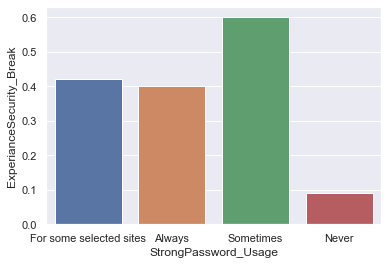

In [337]:
sns.barplot(x="StrongPassword_Usage",y="ExperianceSecurity_Break",data=data_used,ci=None)

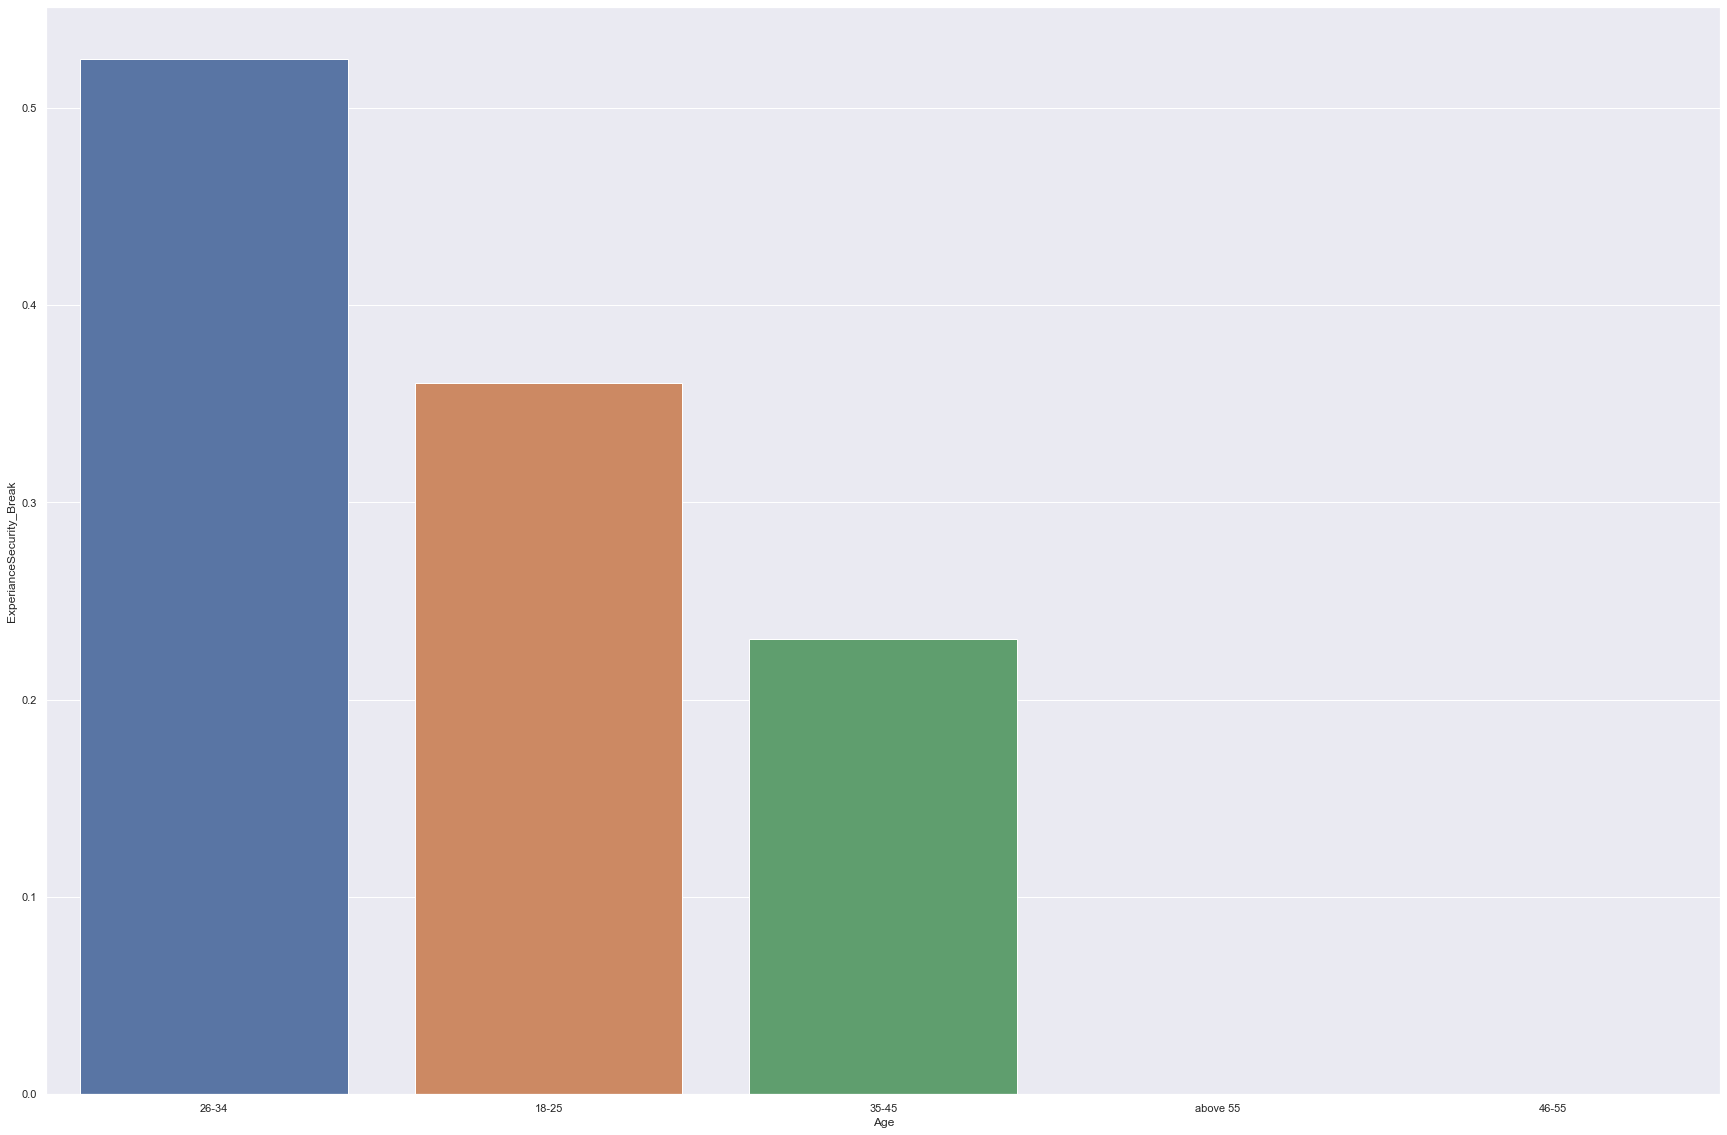

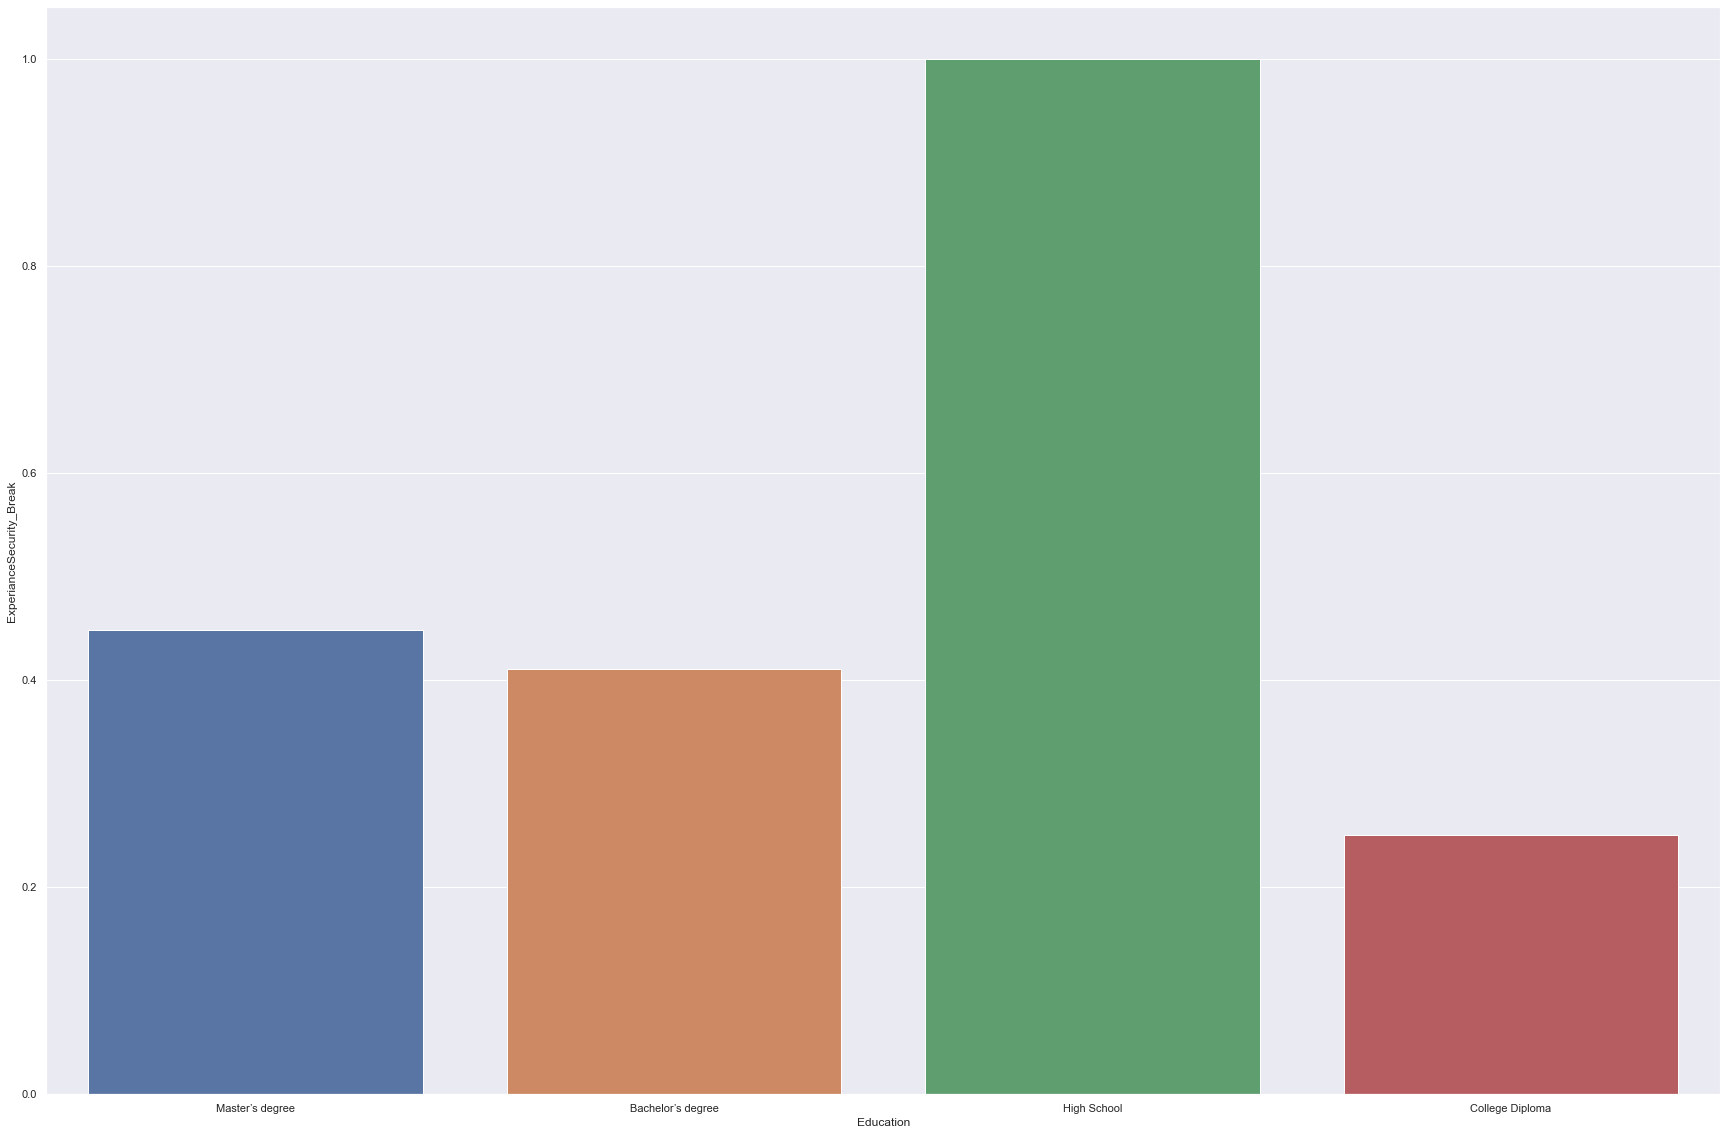

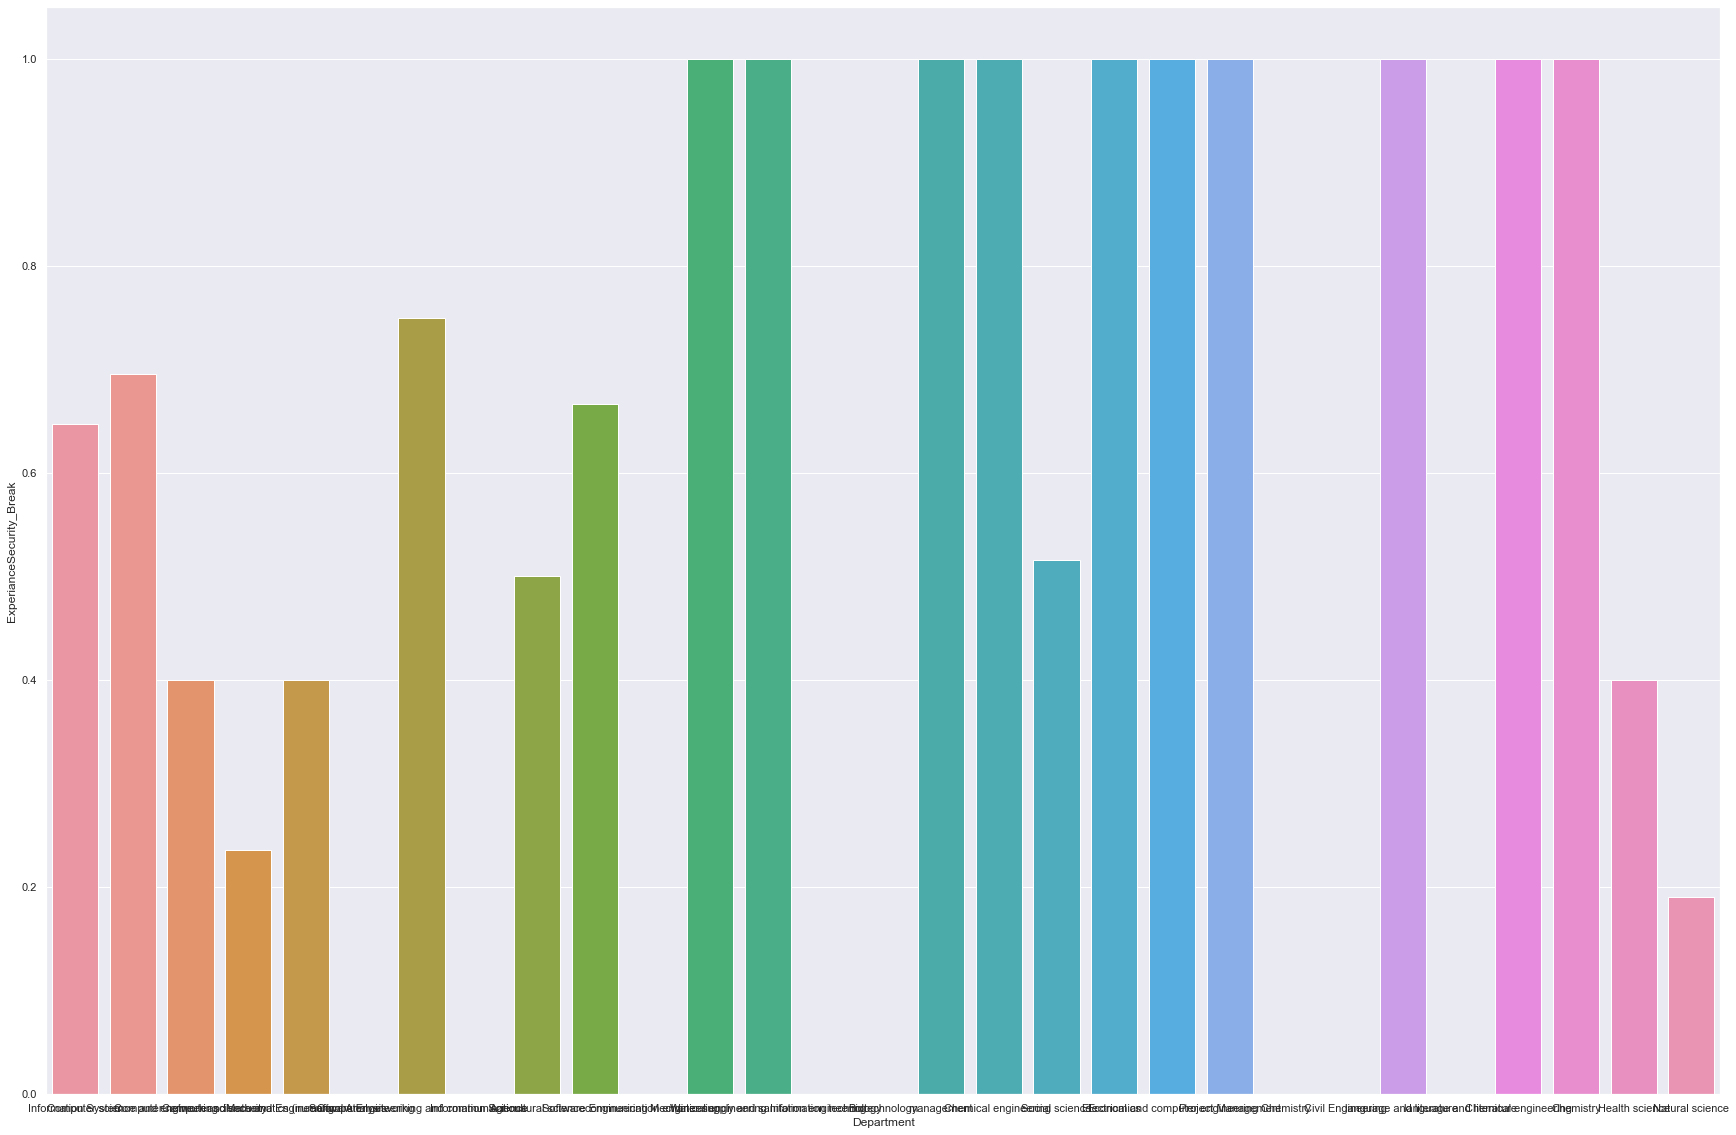

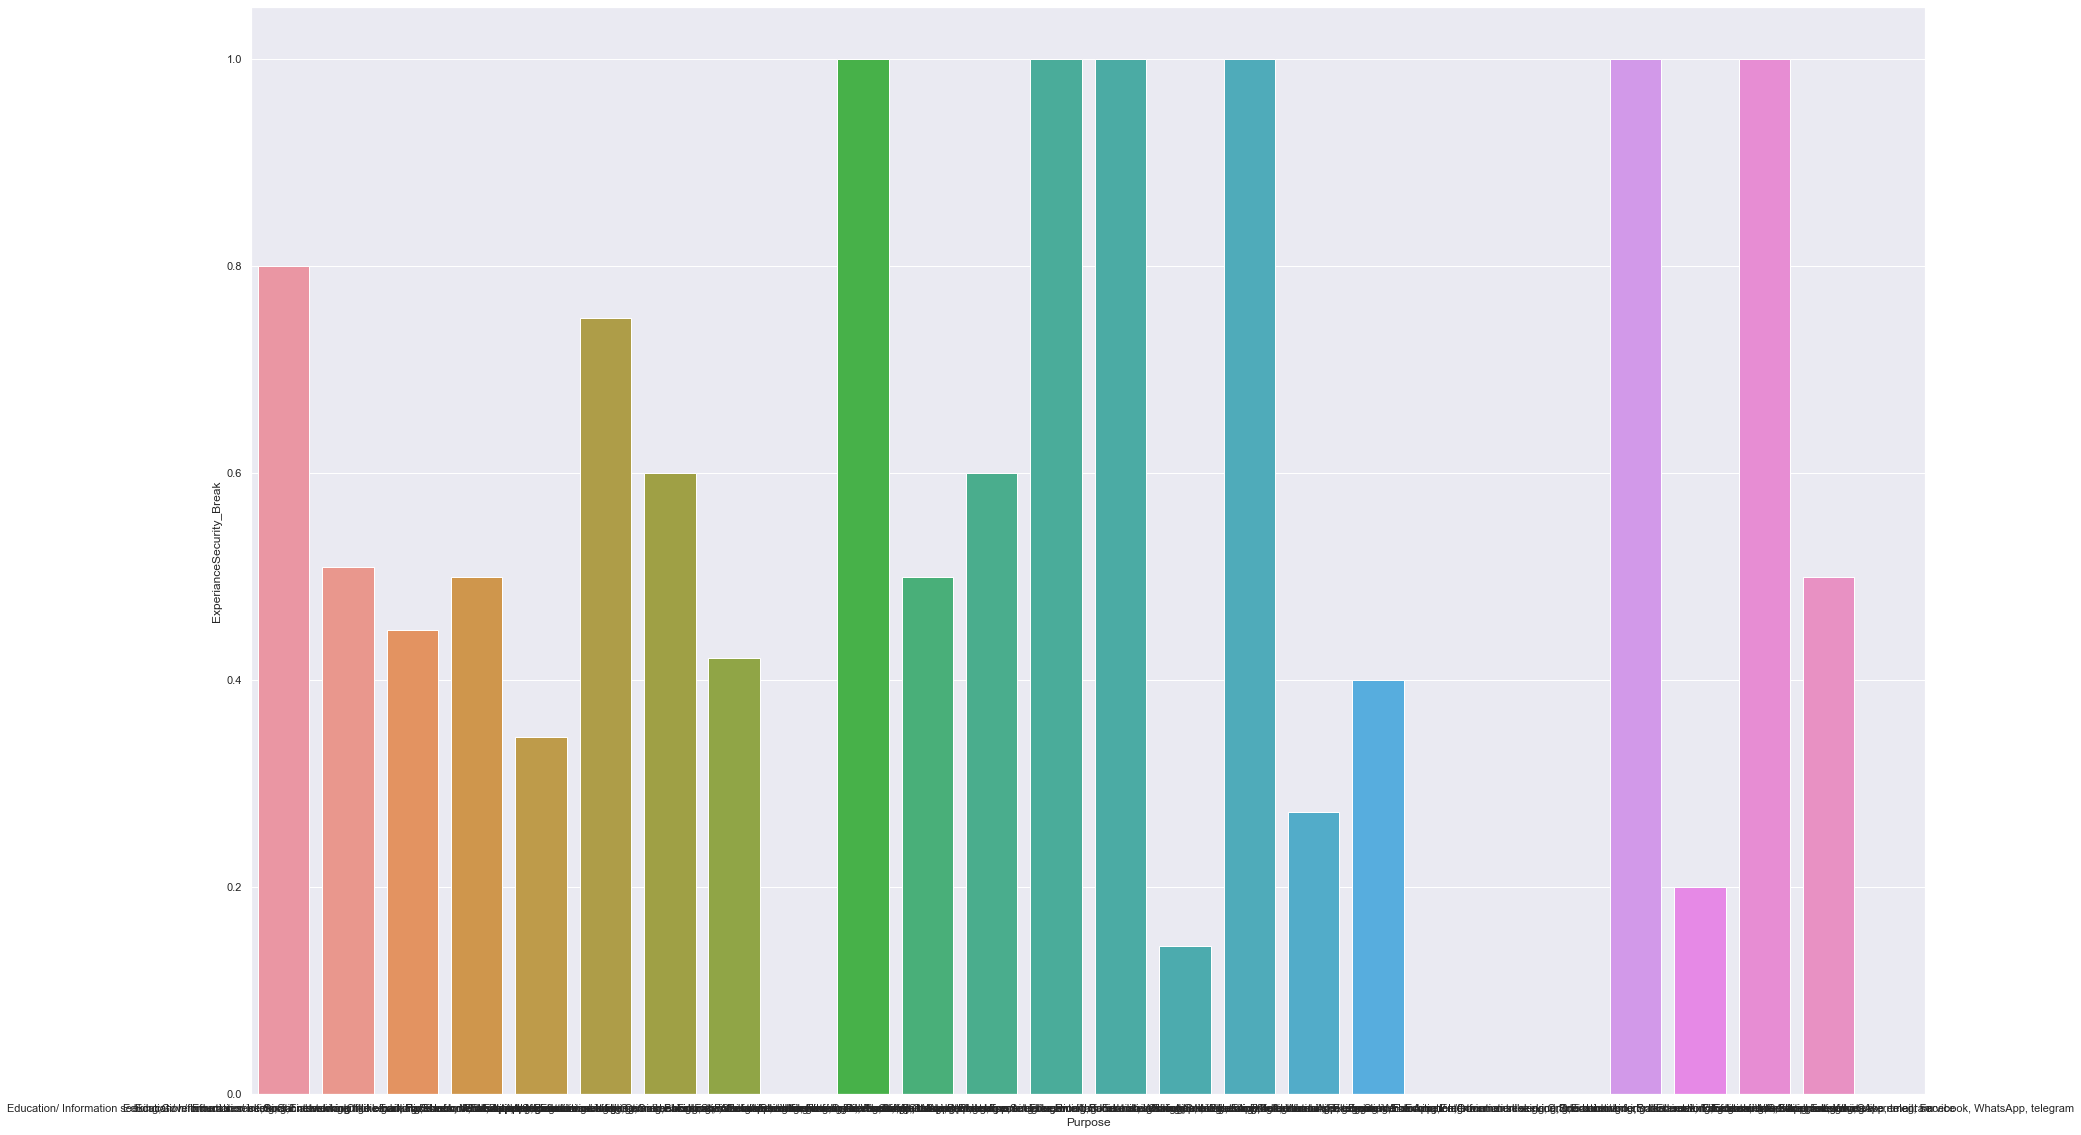

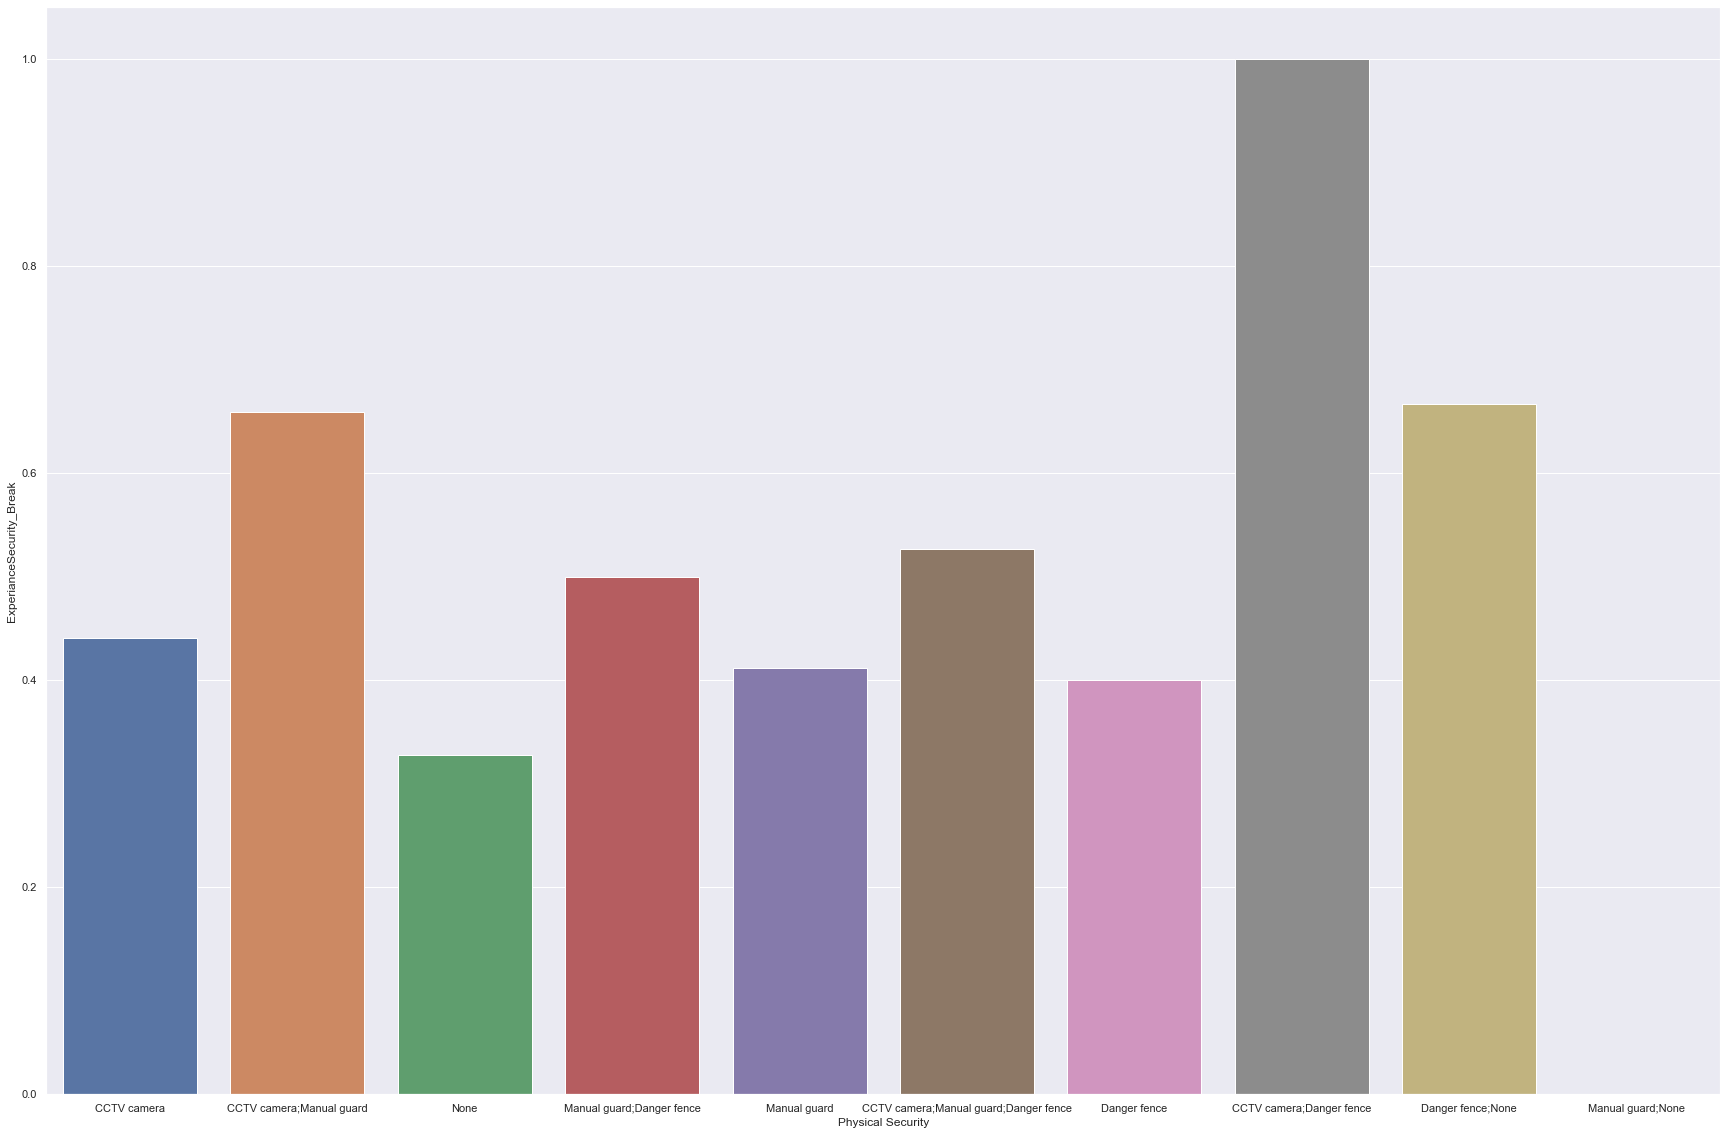

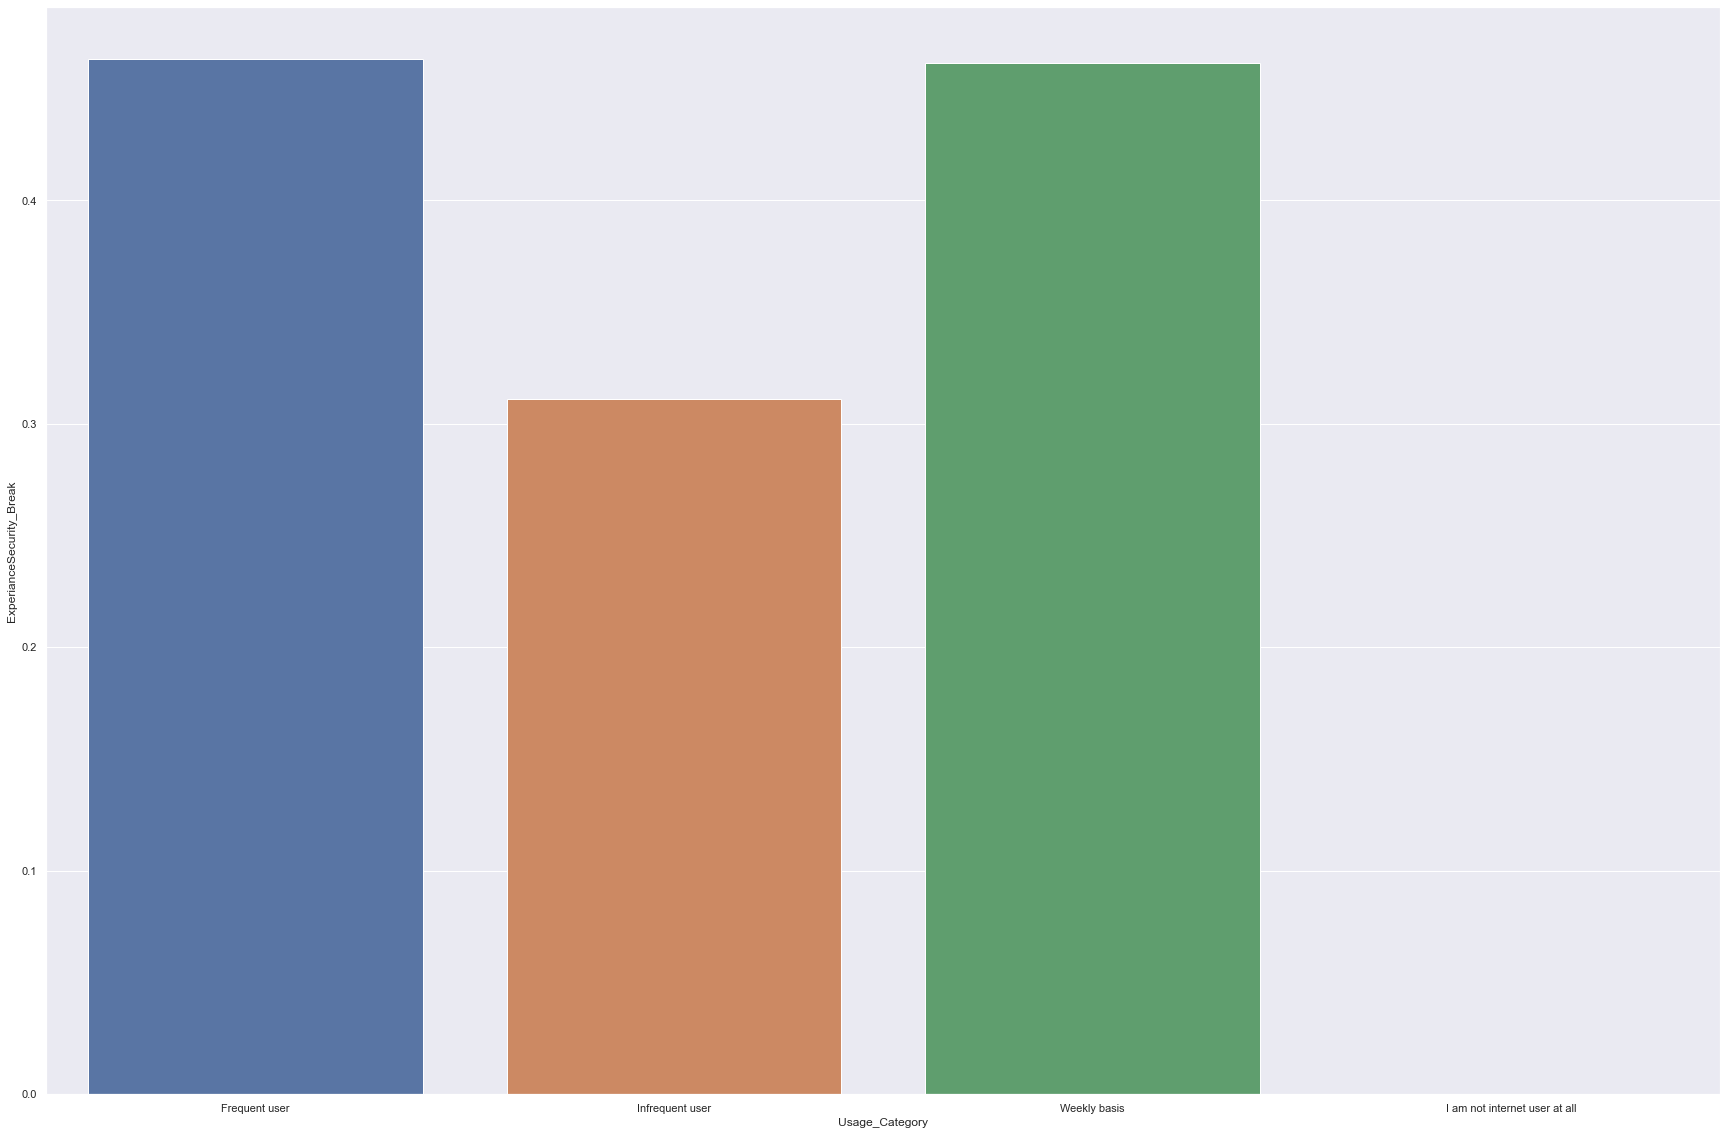

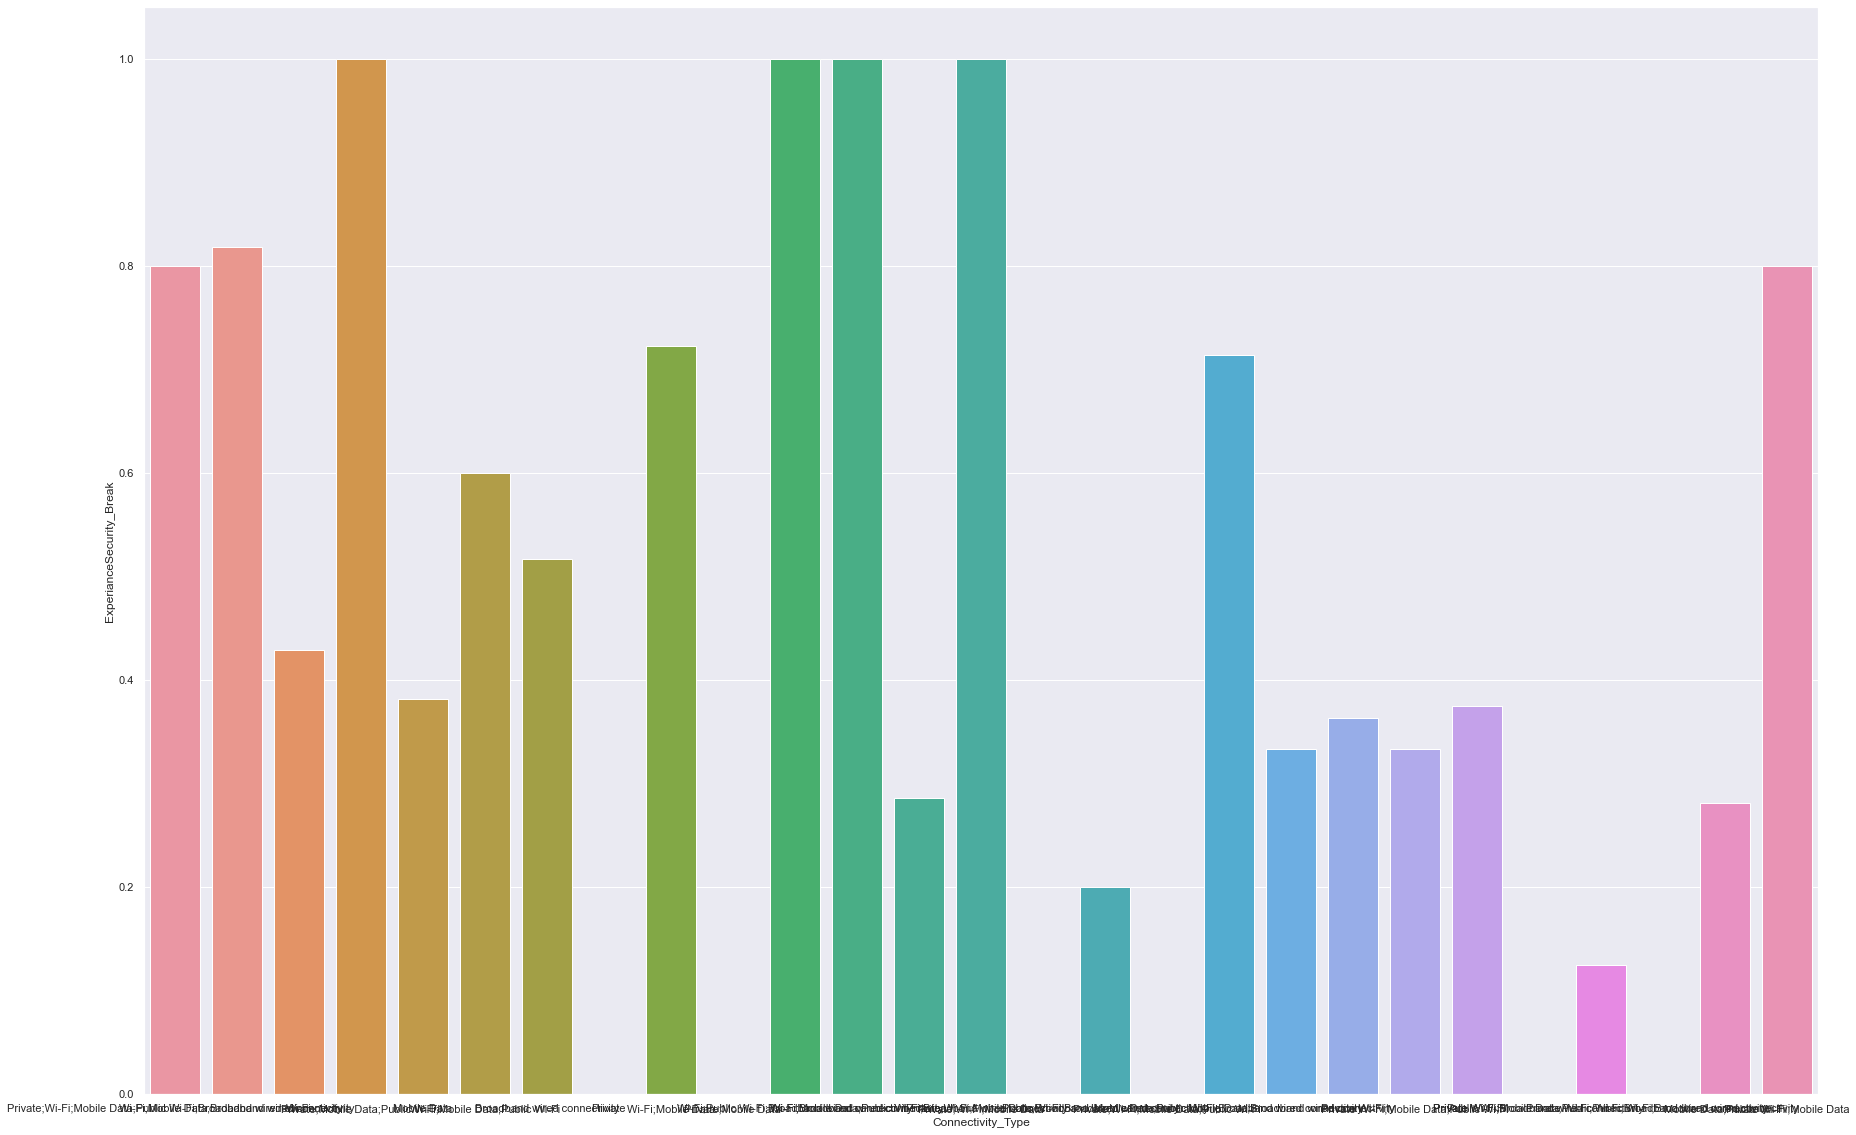

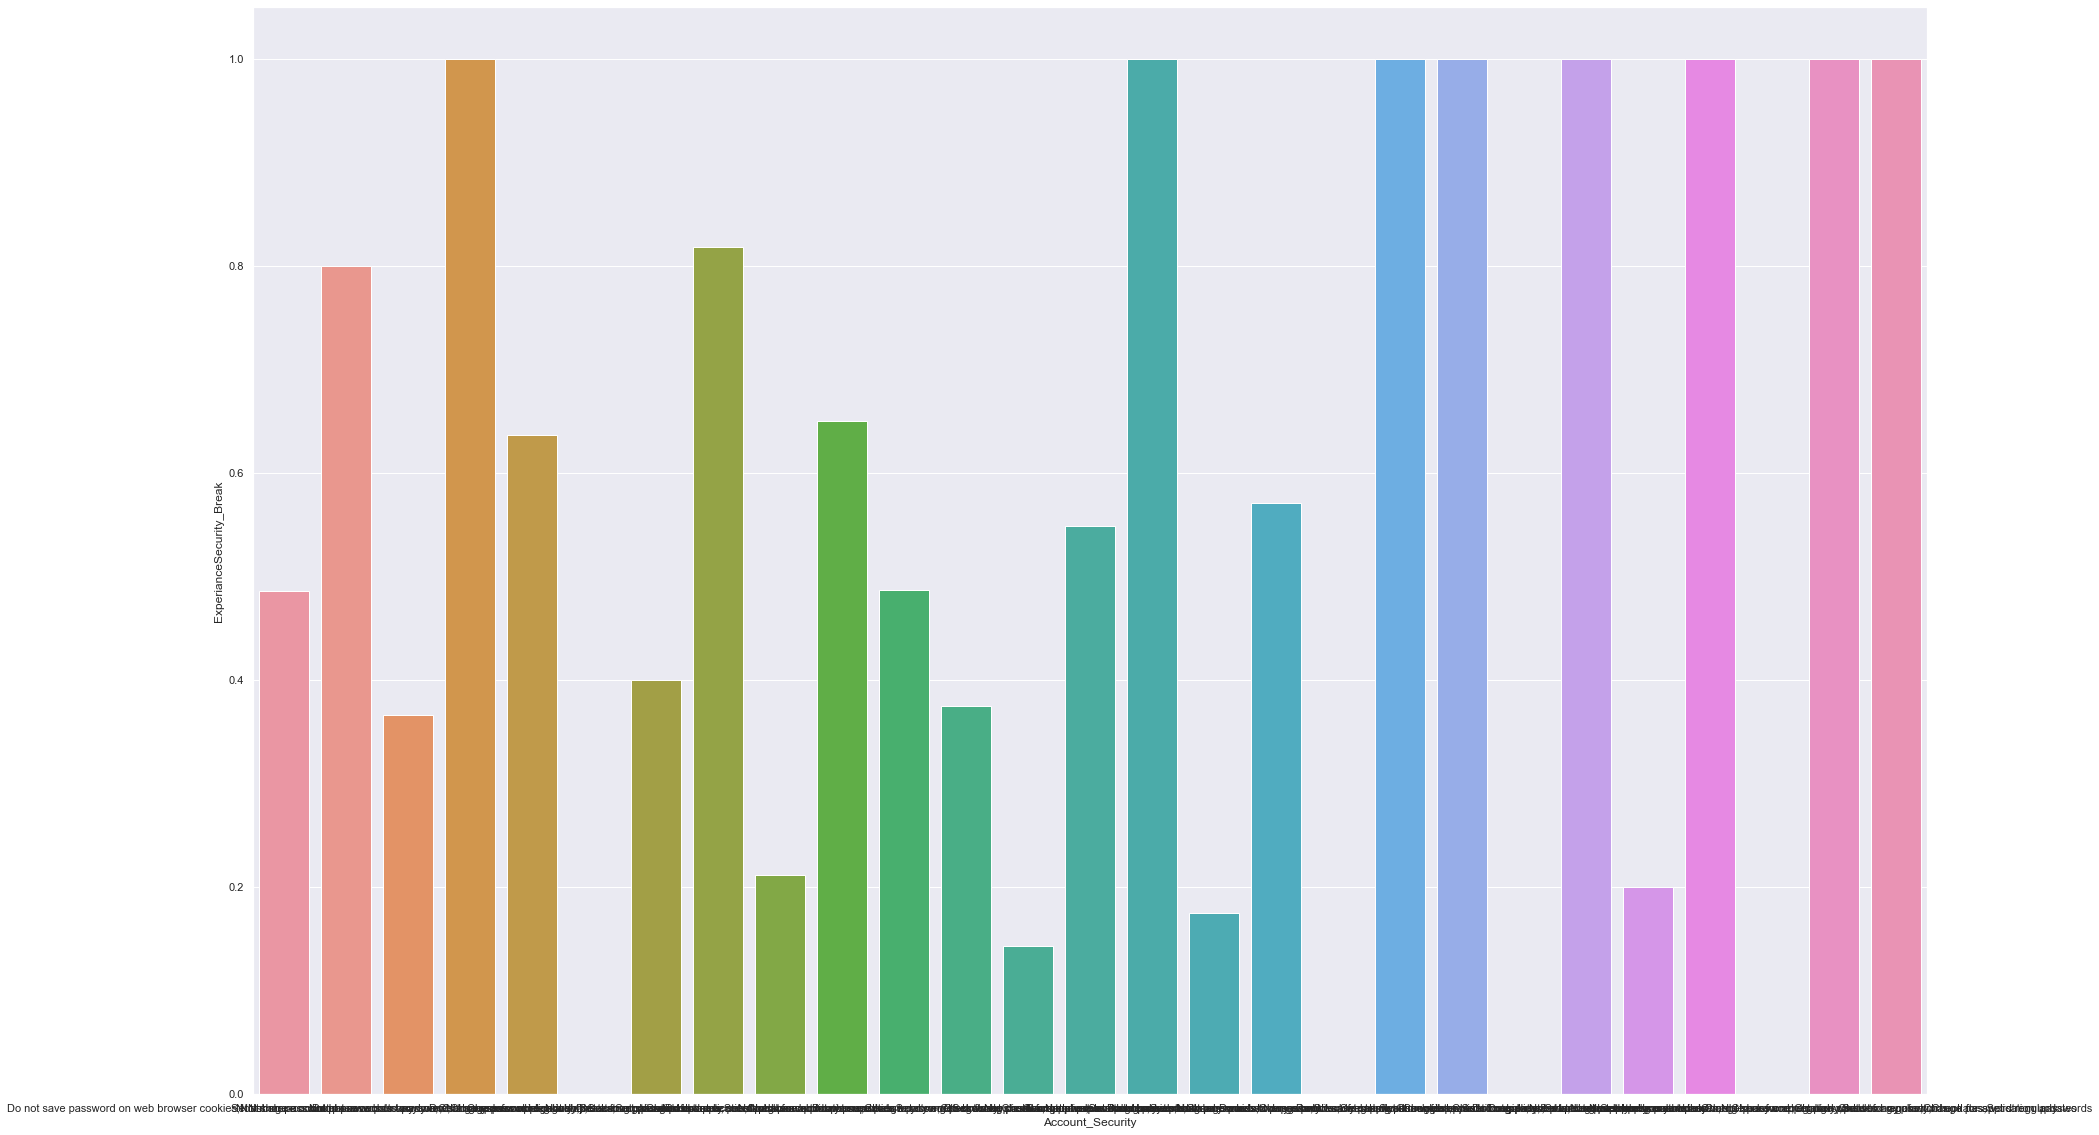

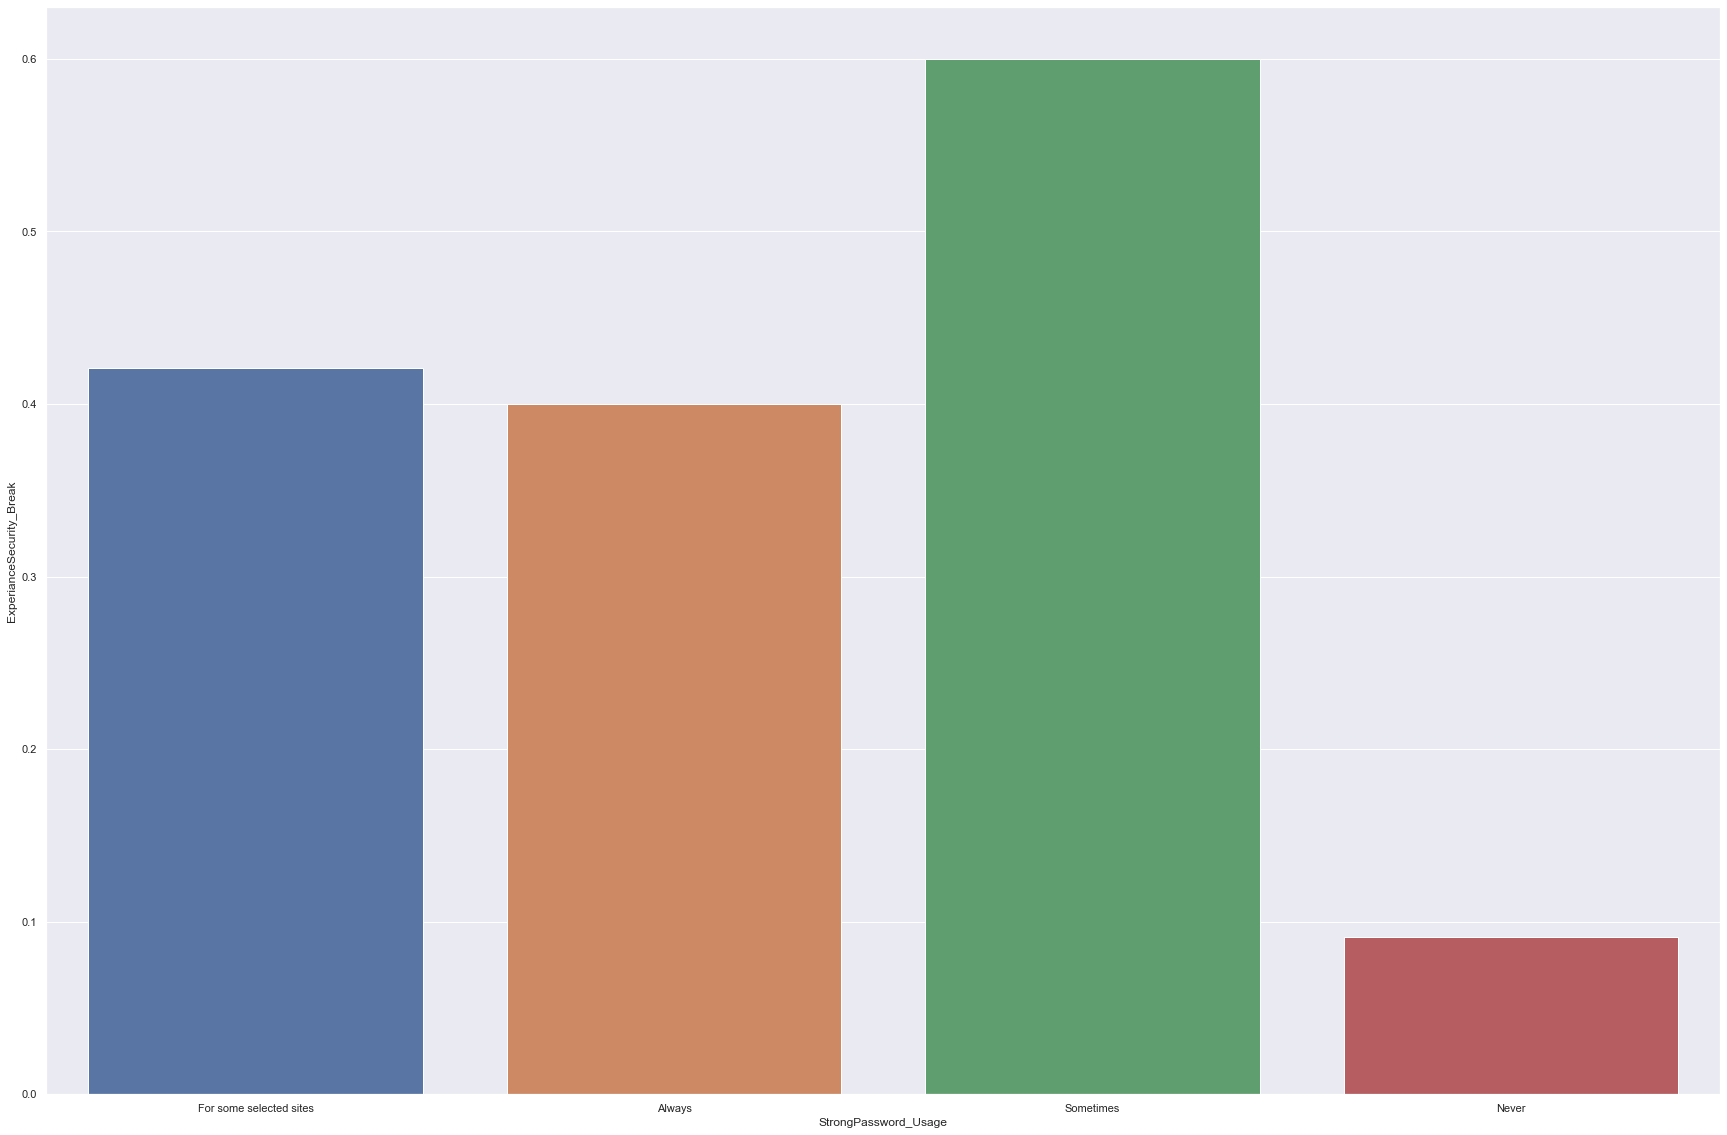

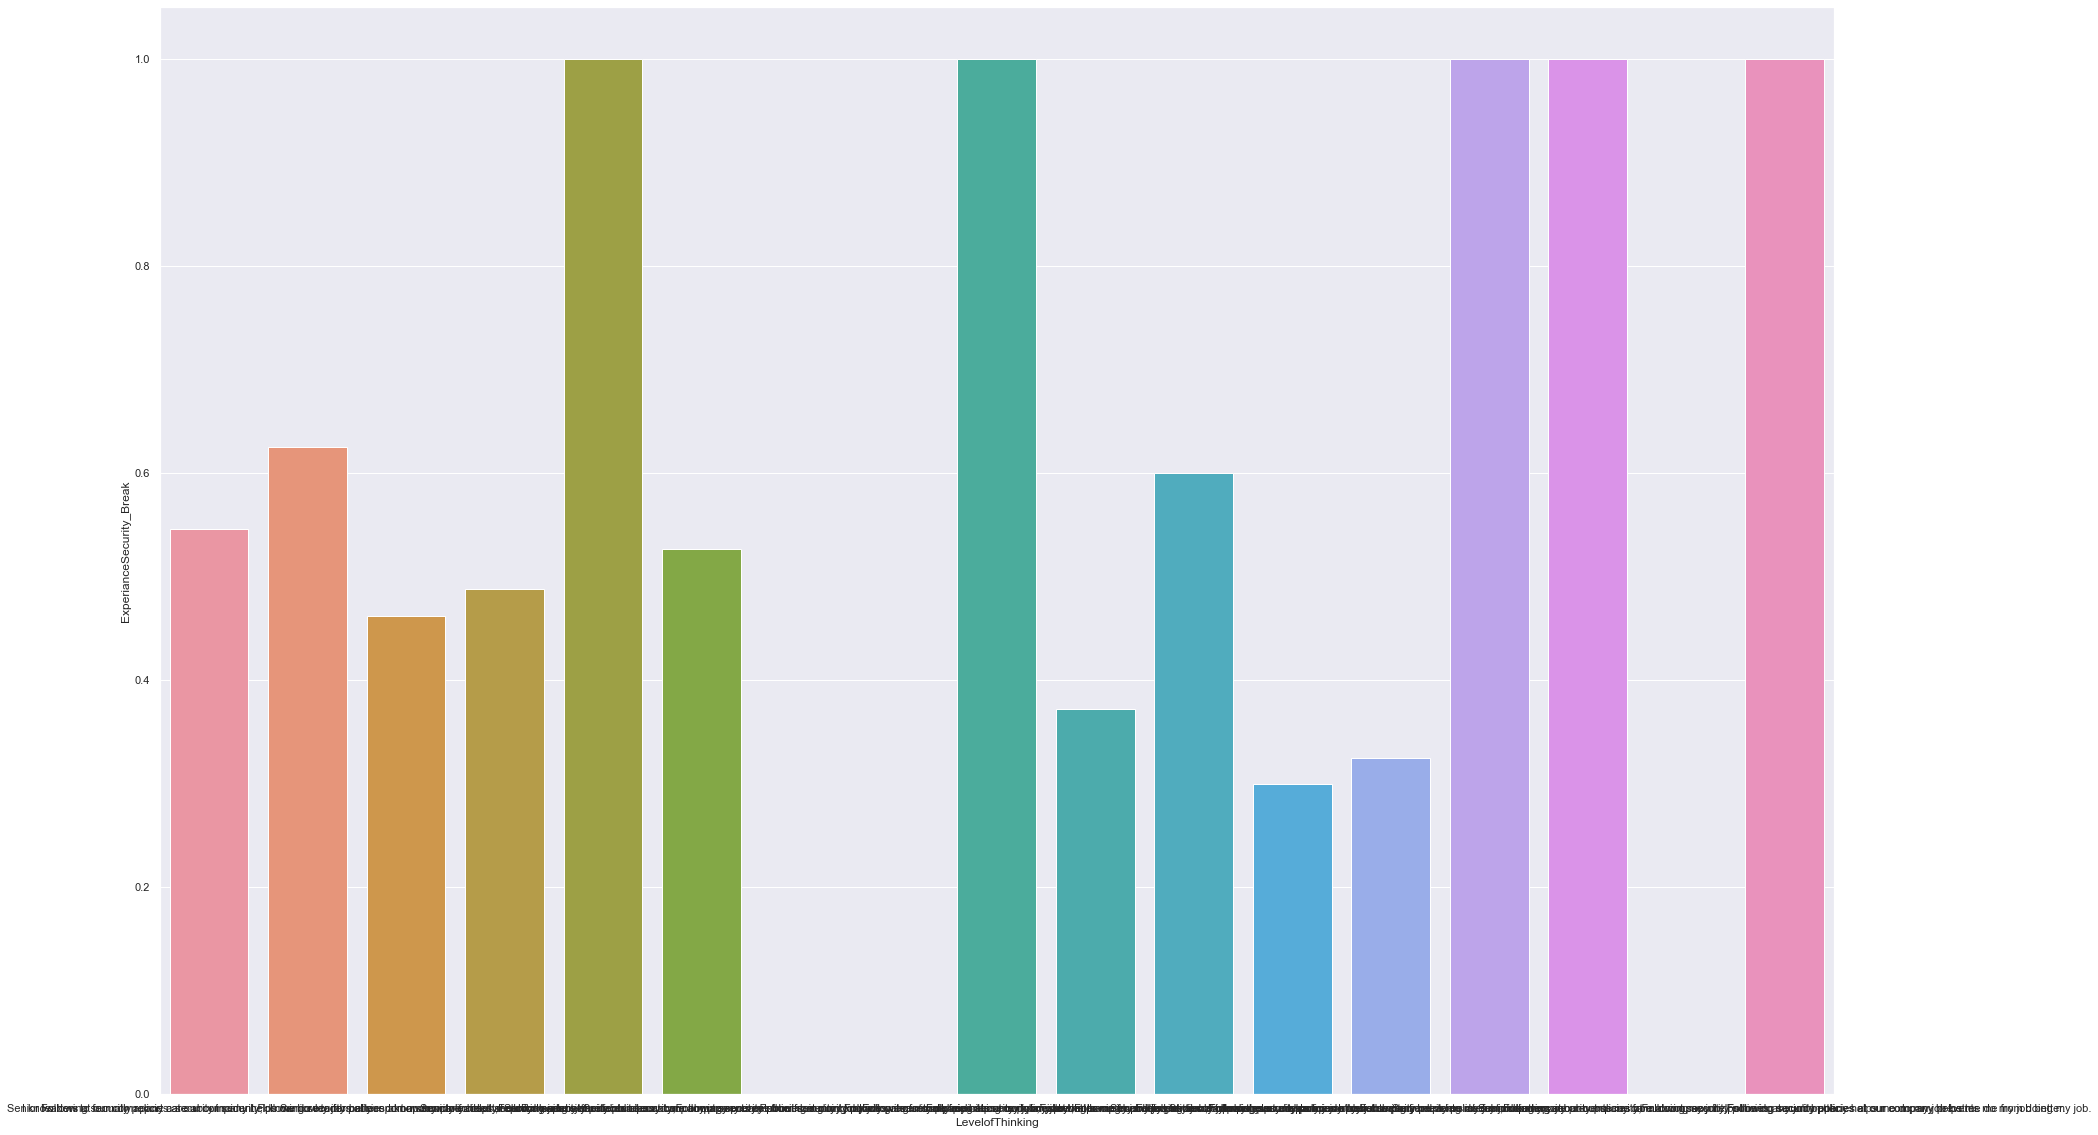

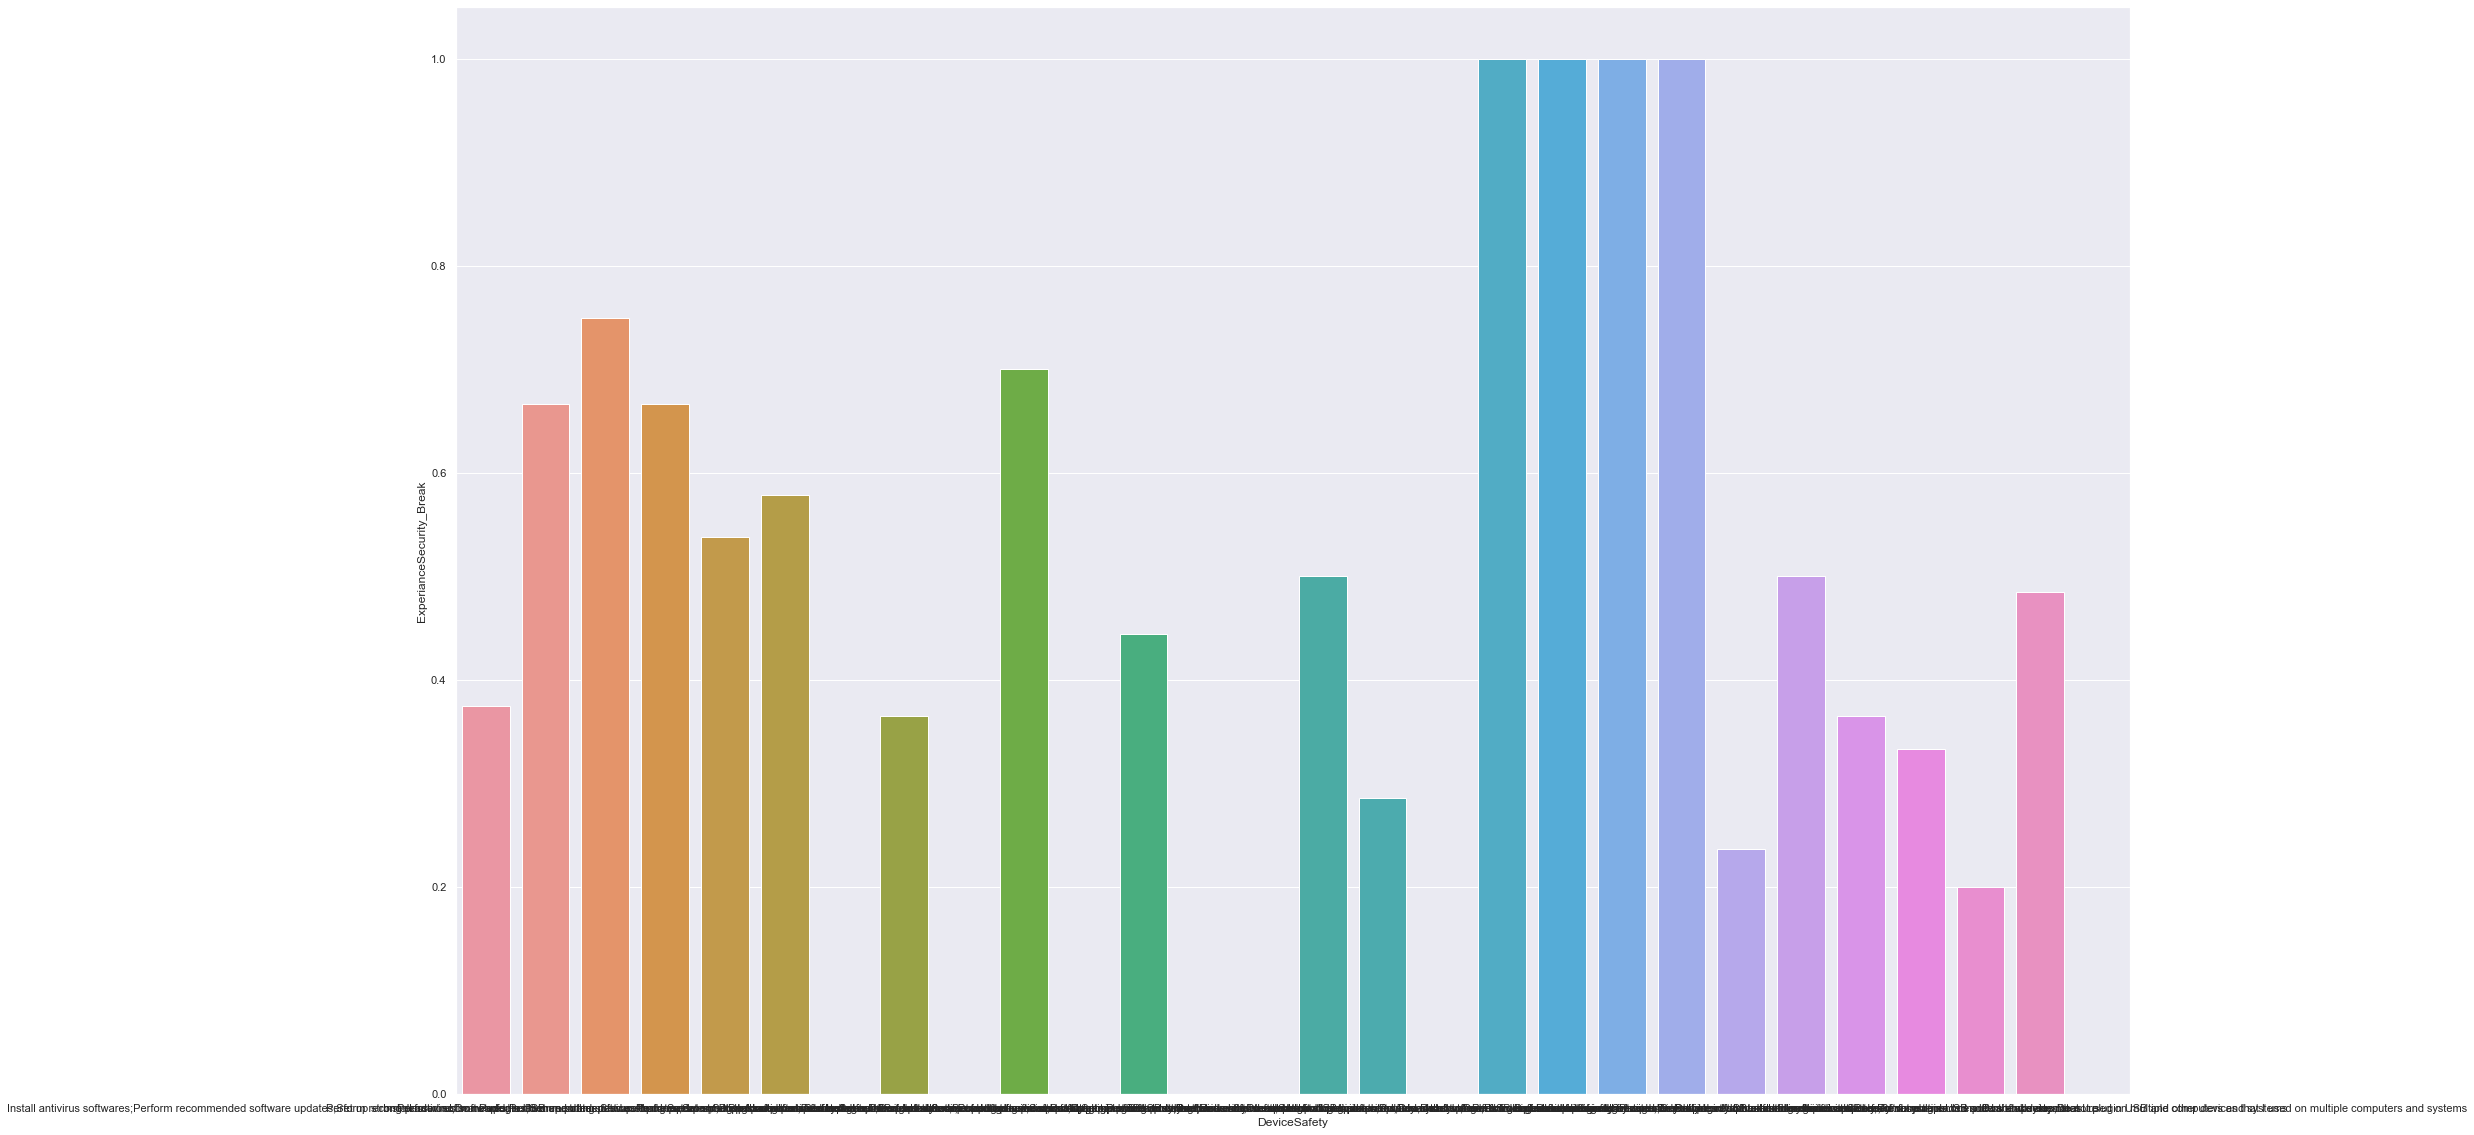

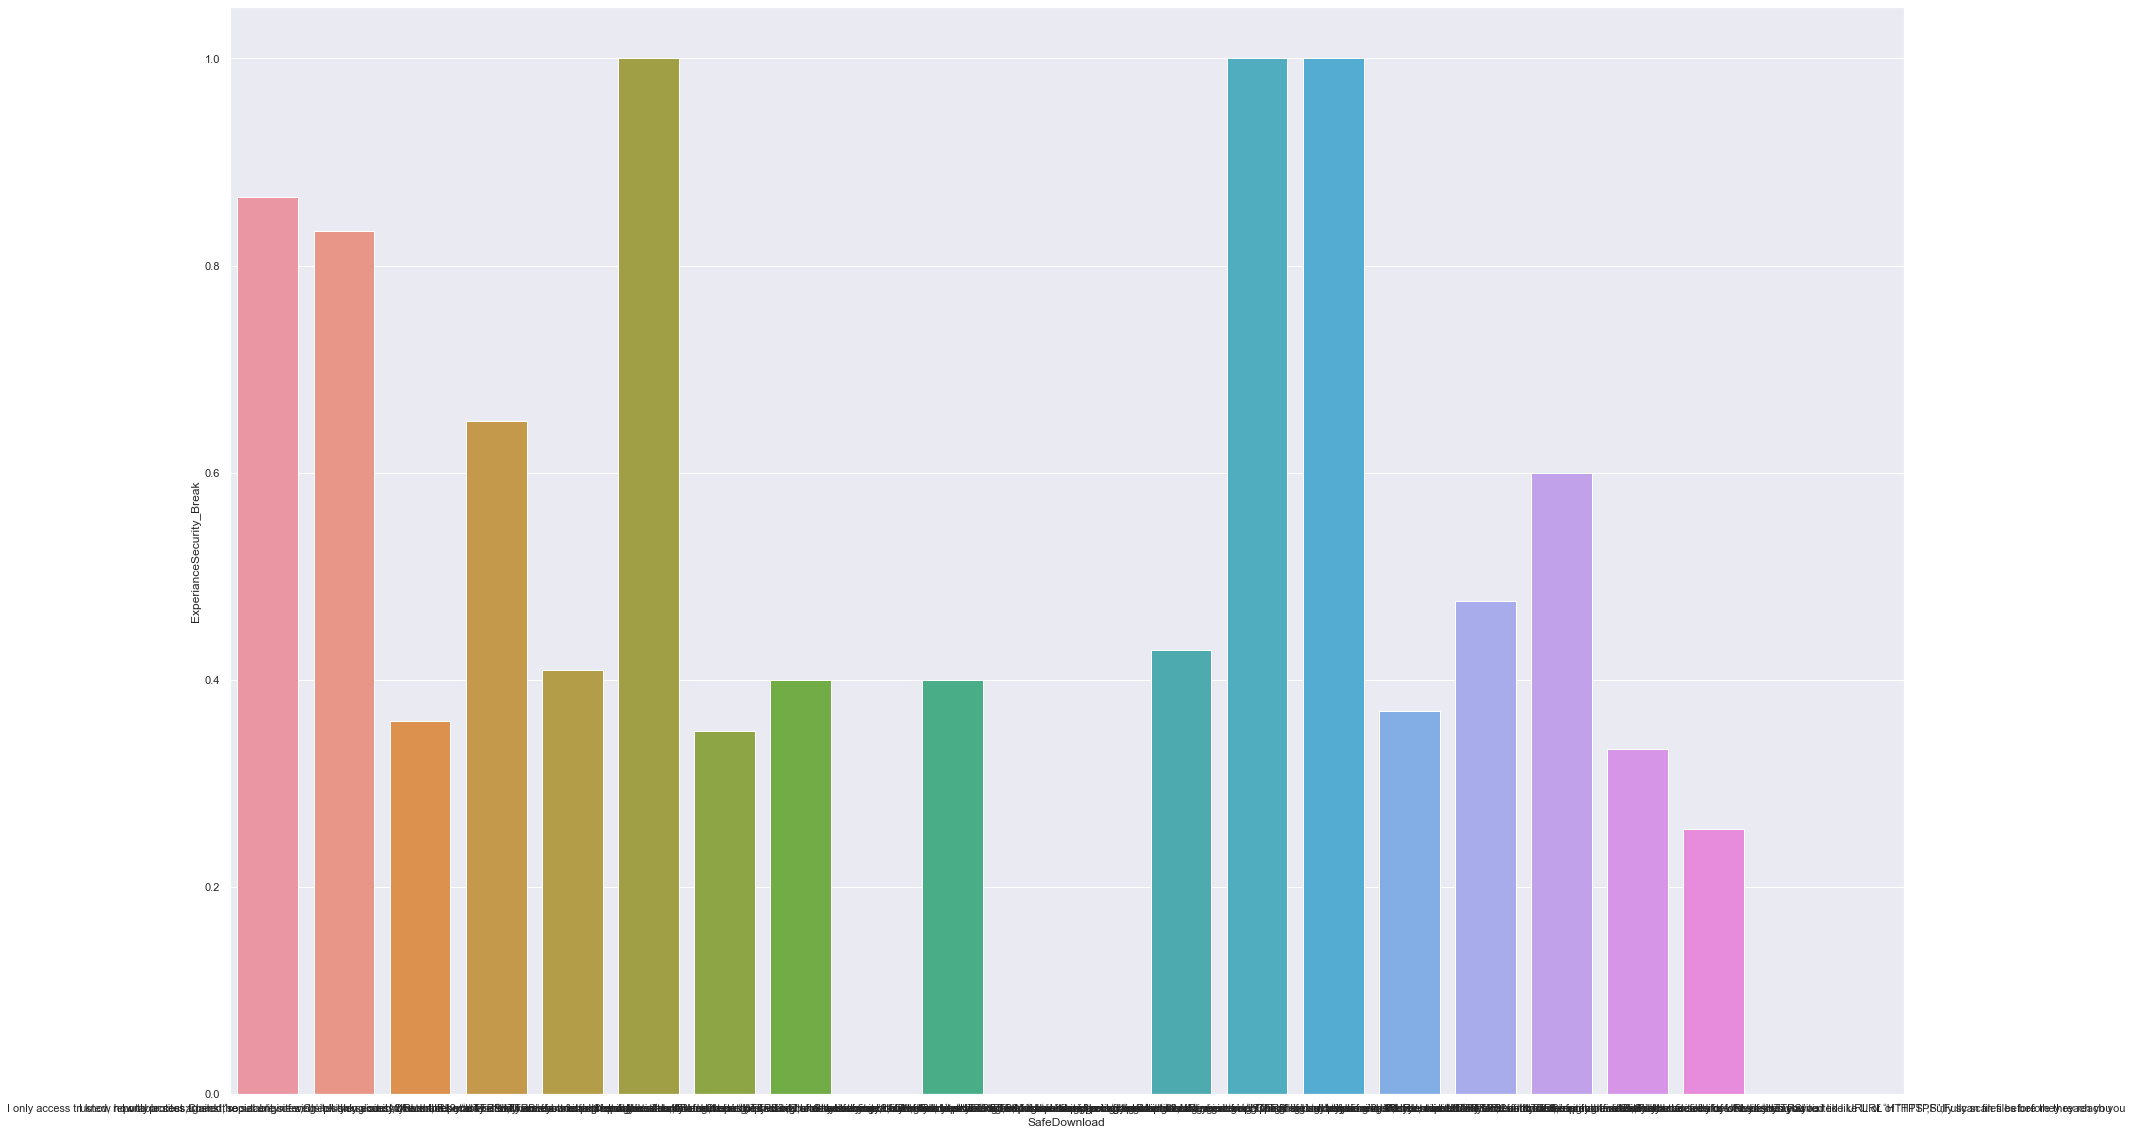

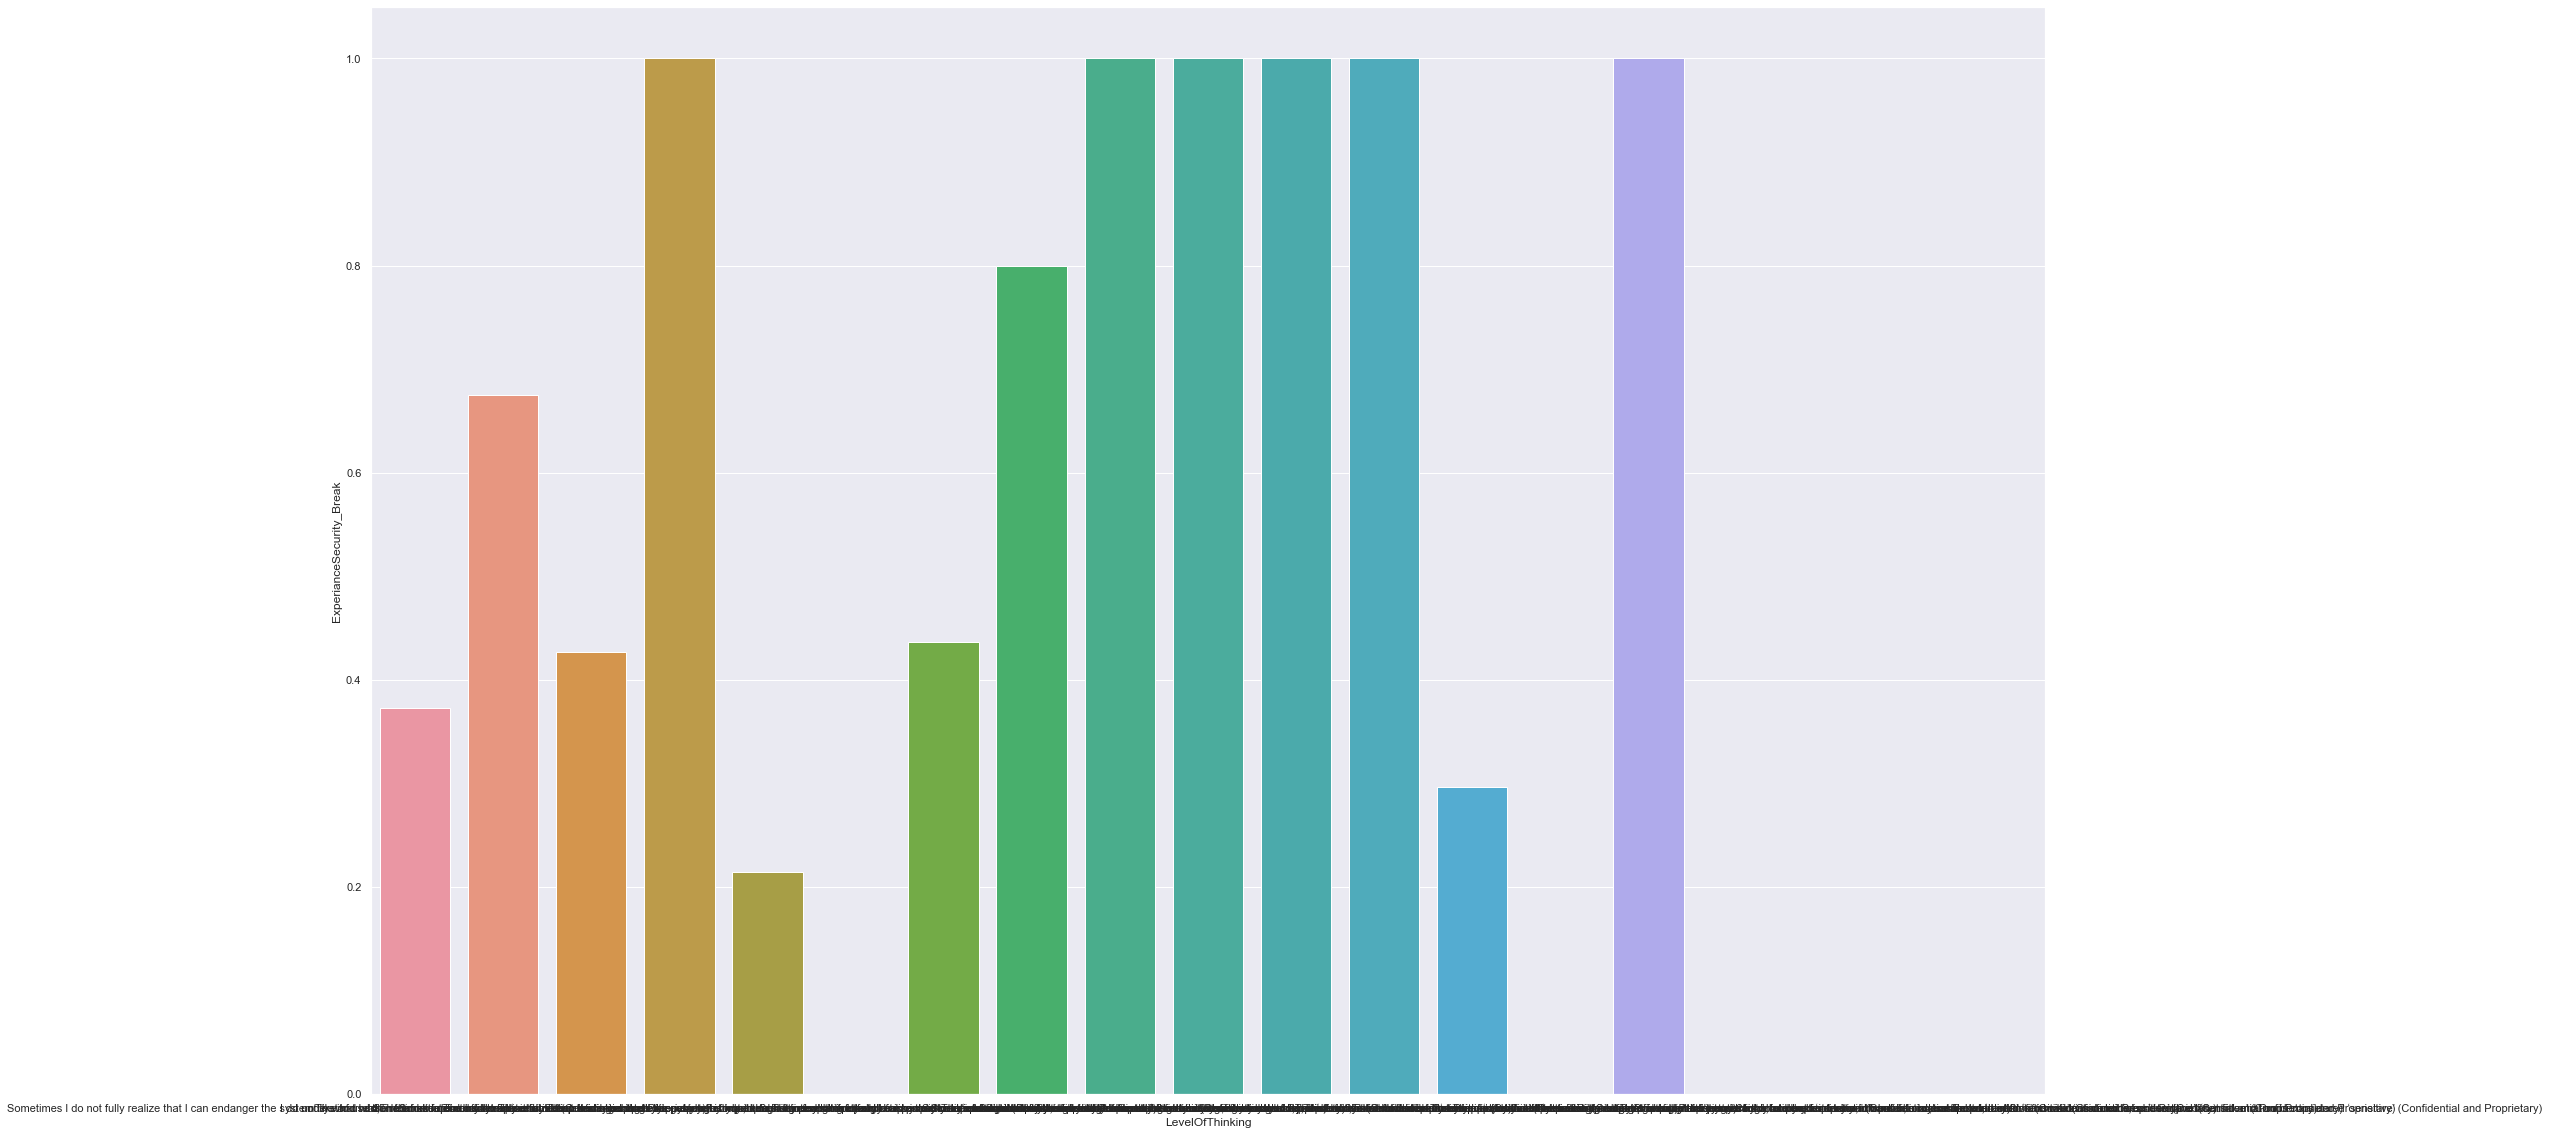

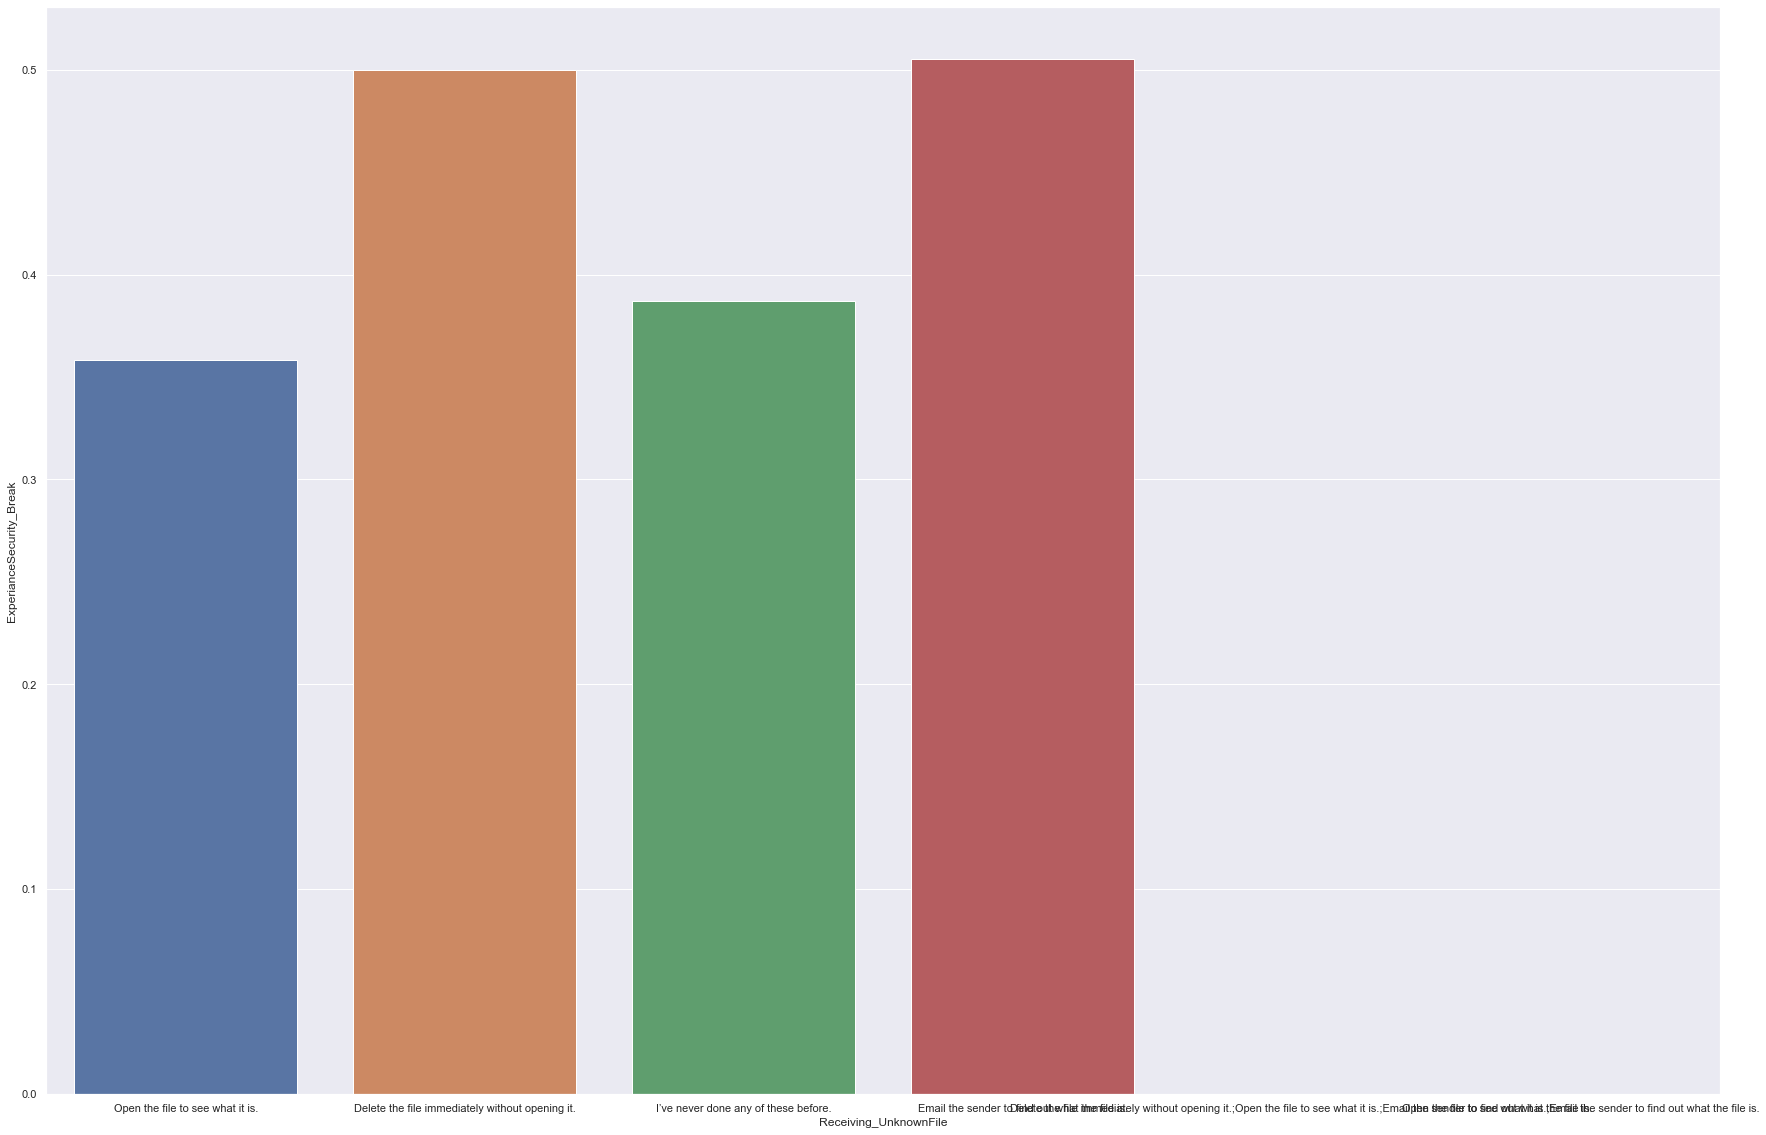

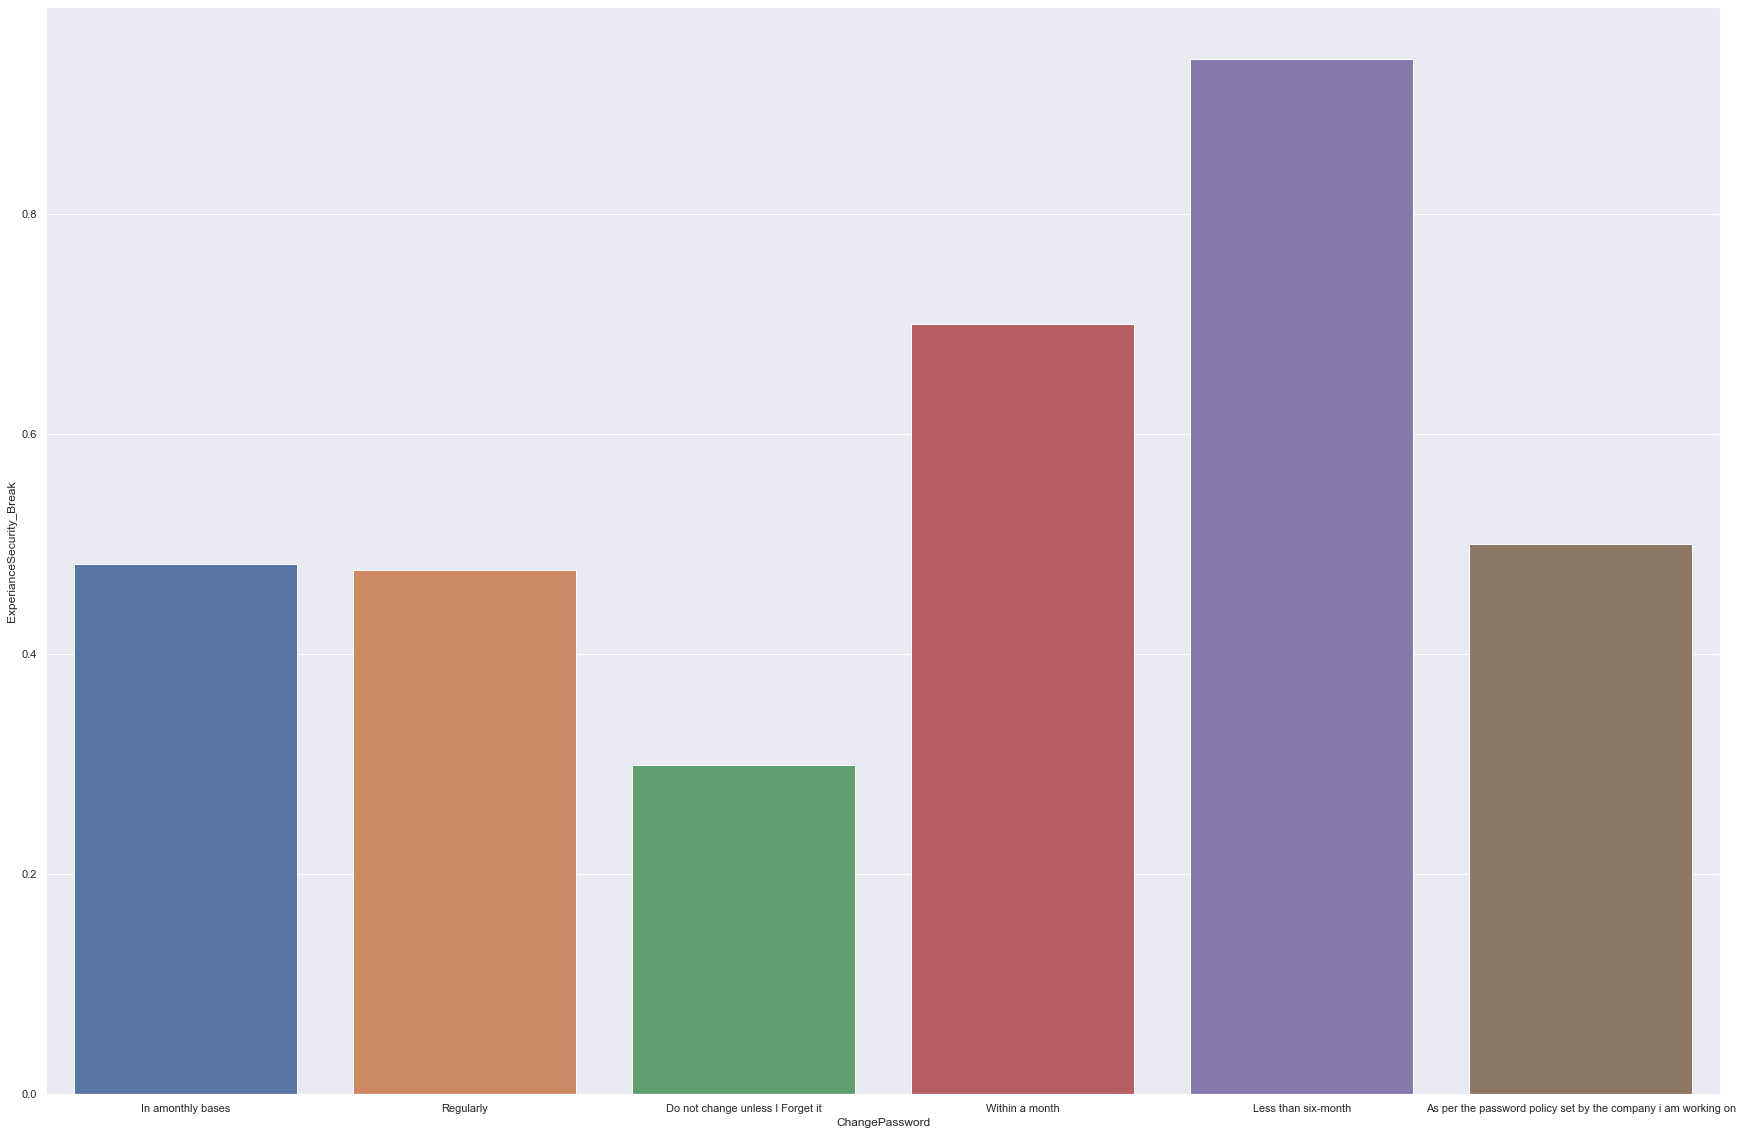

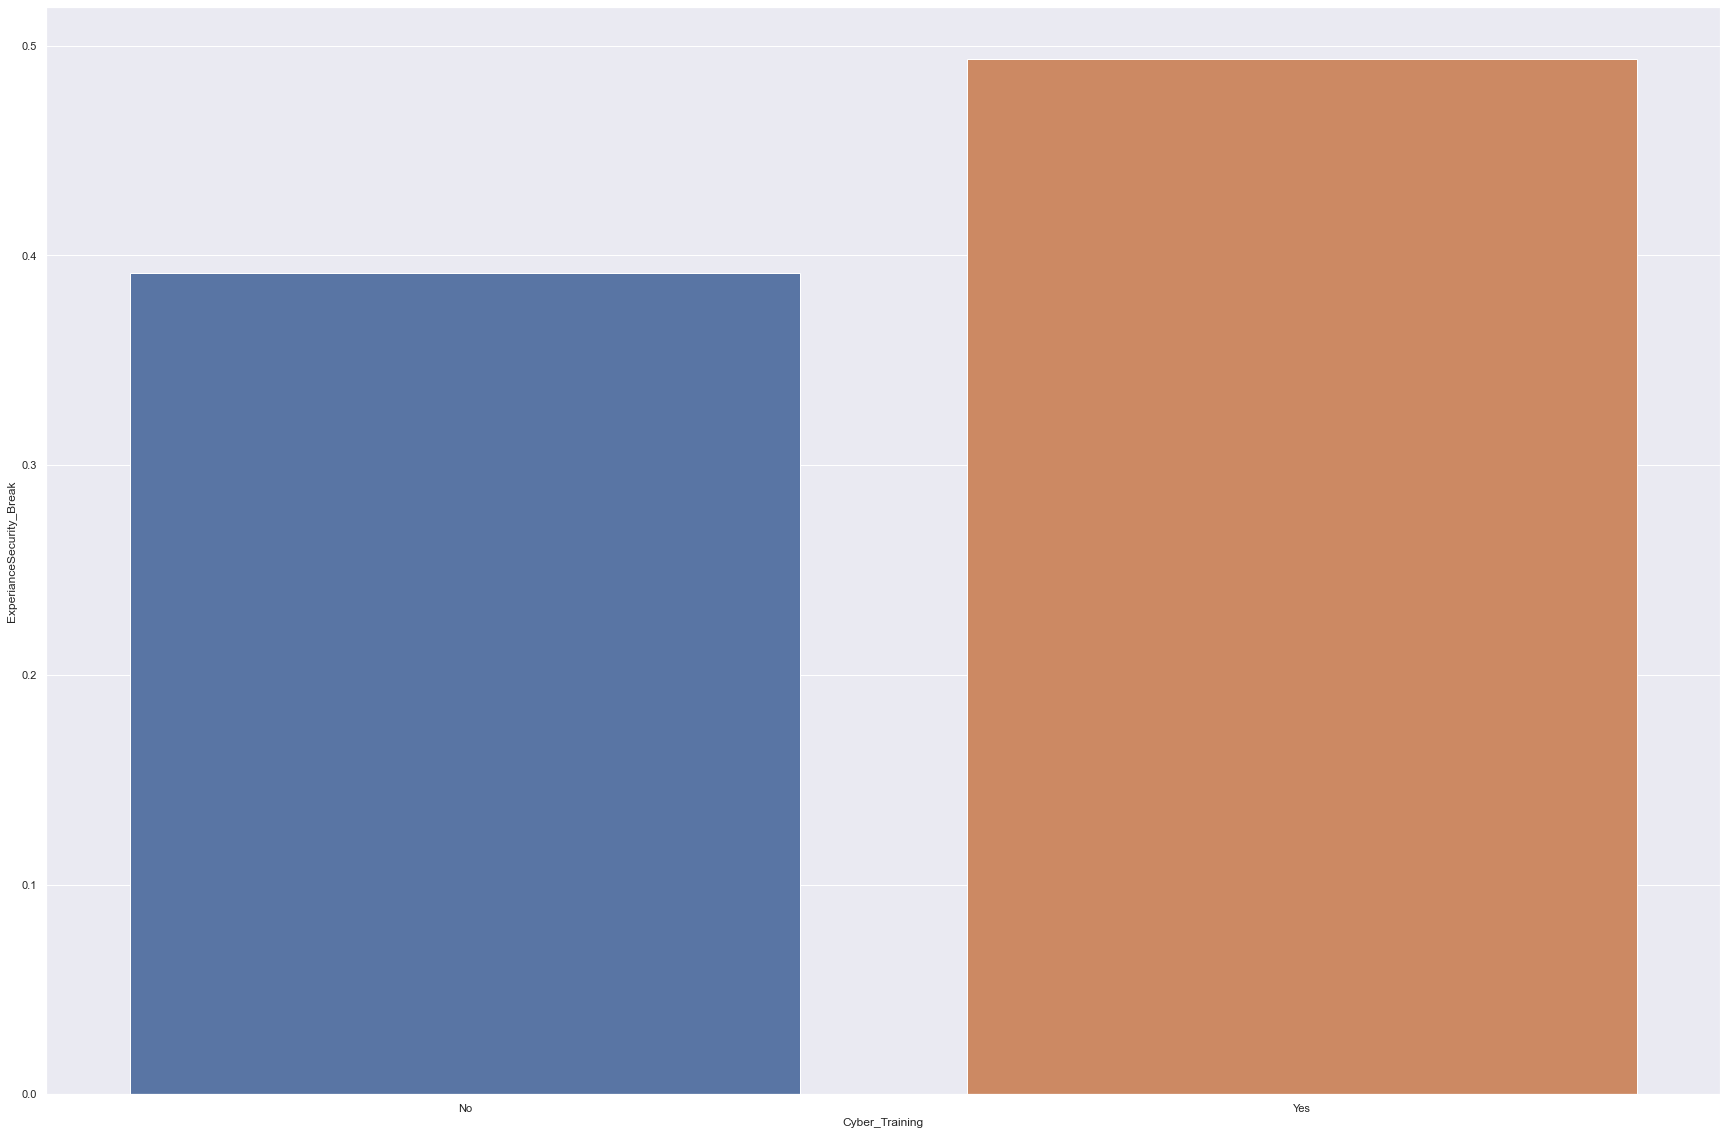

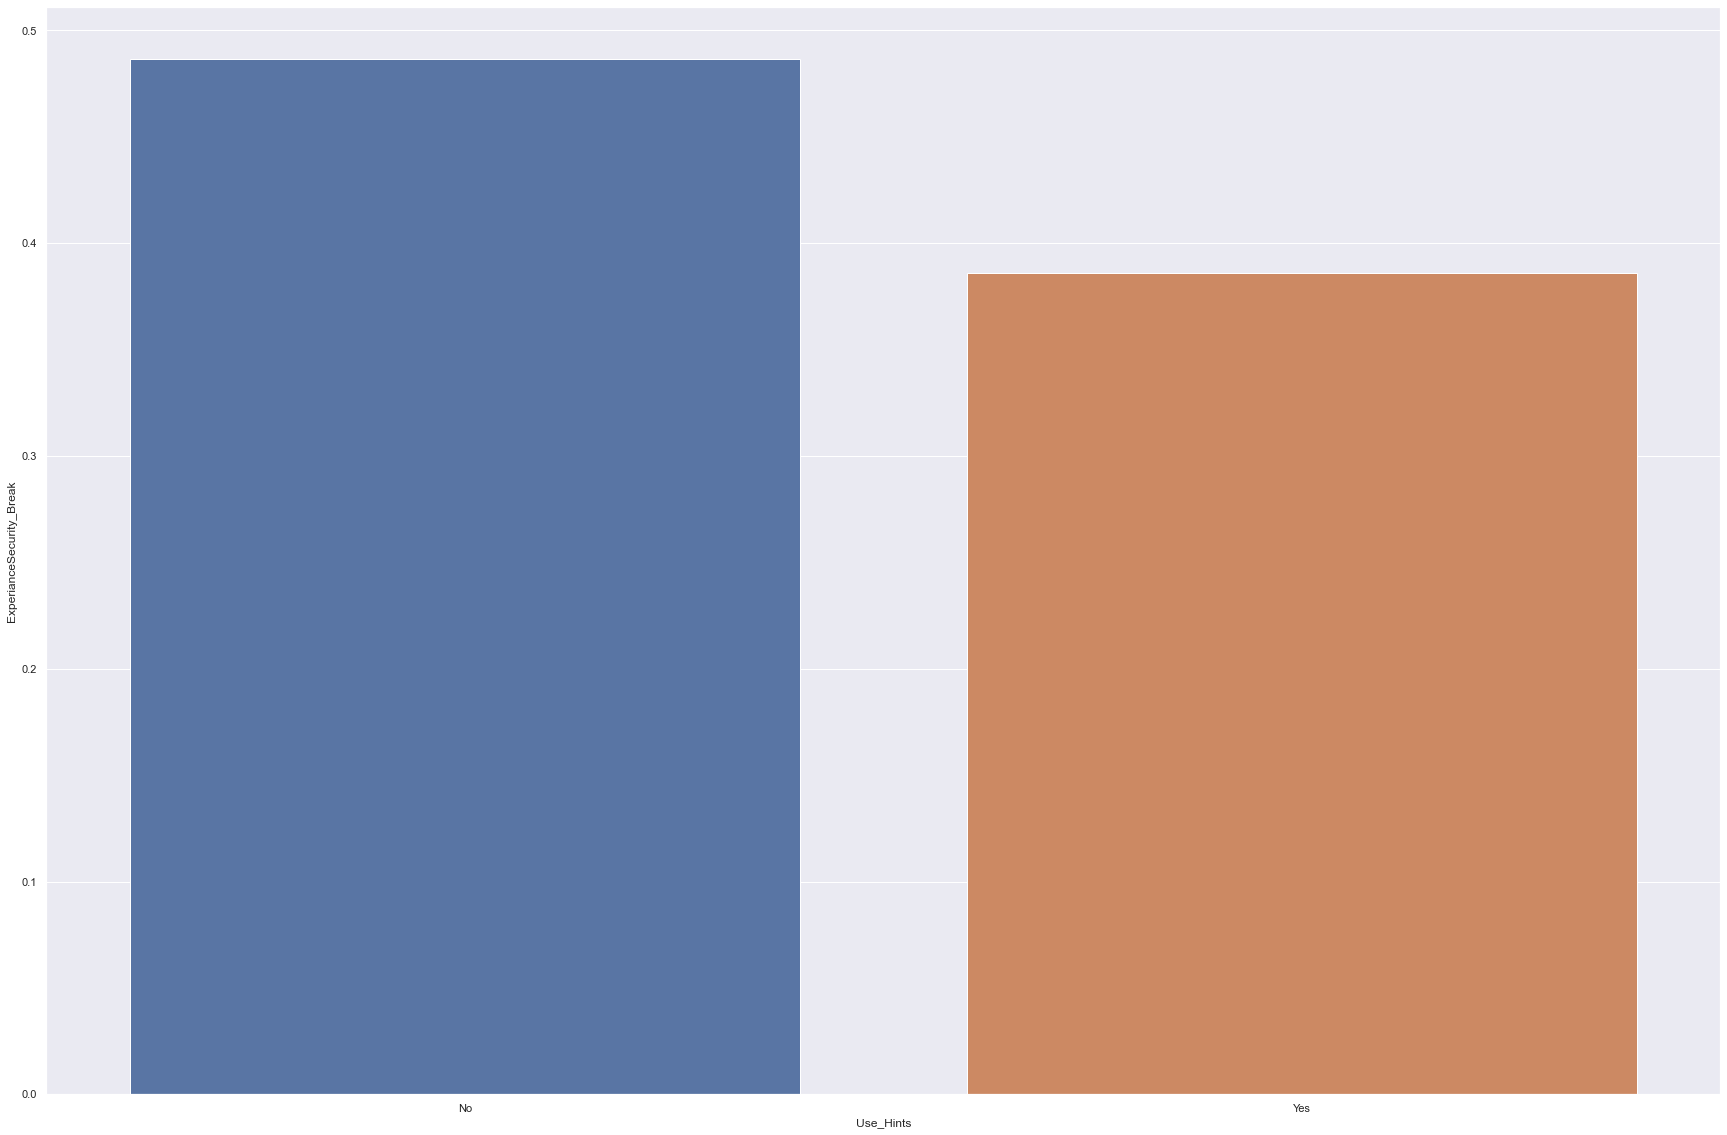

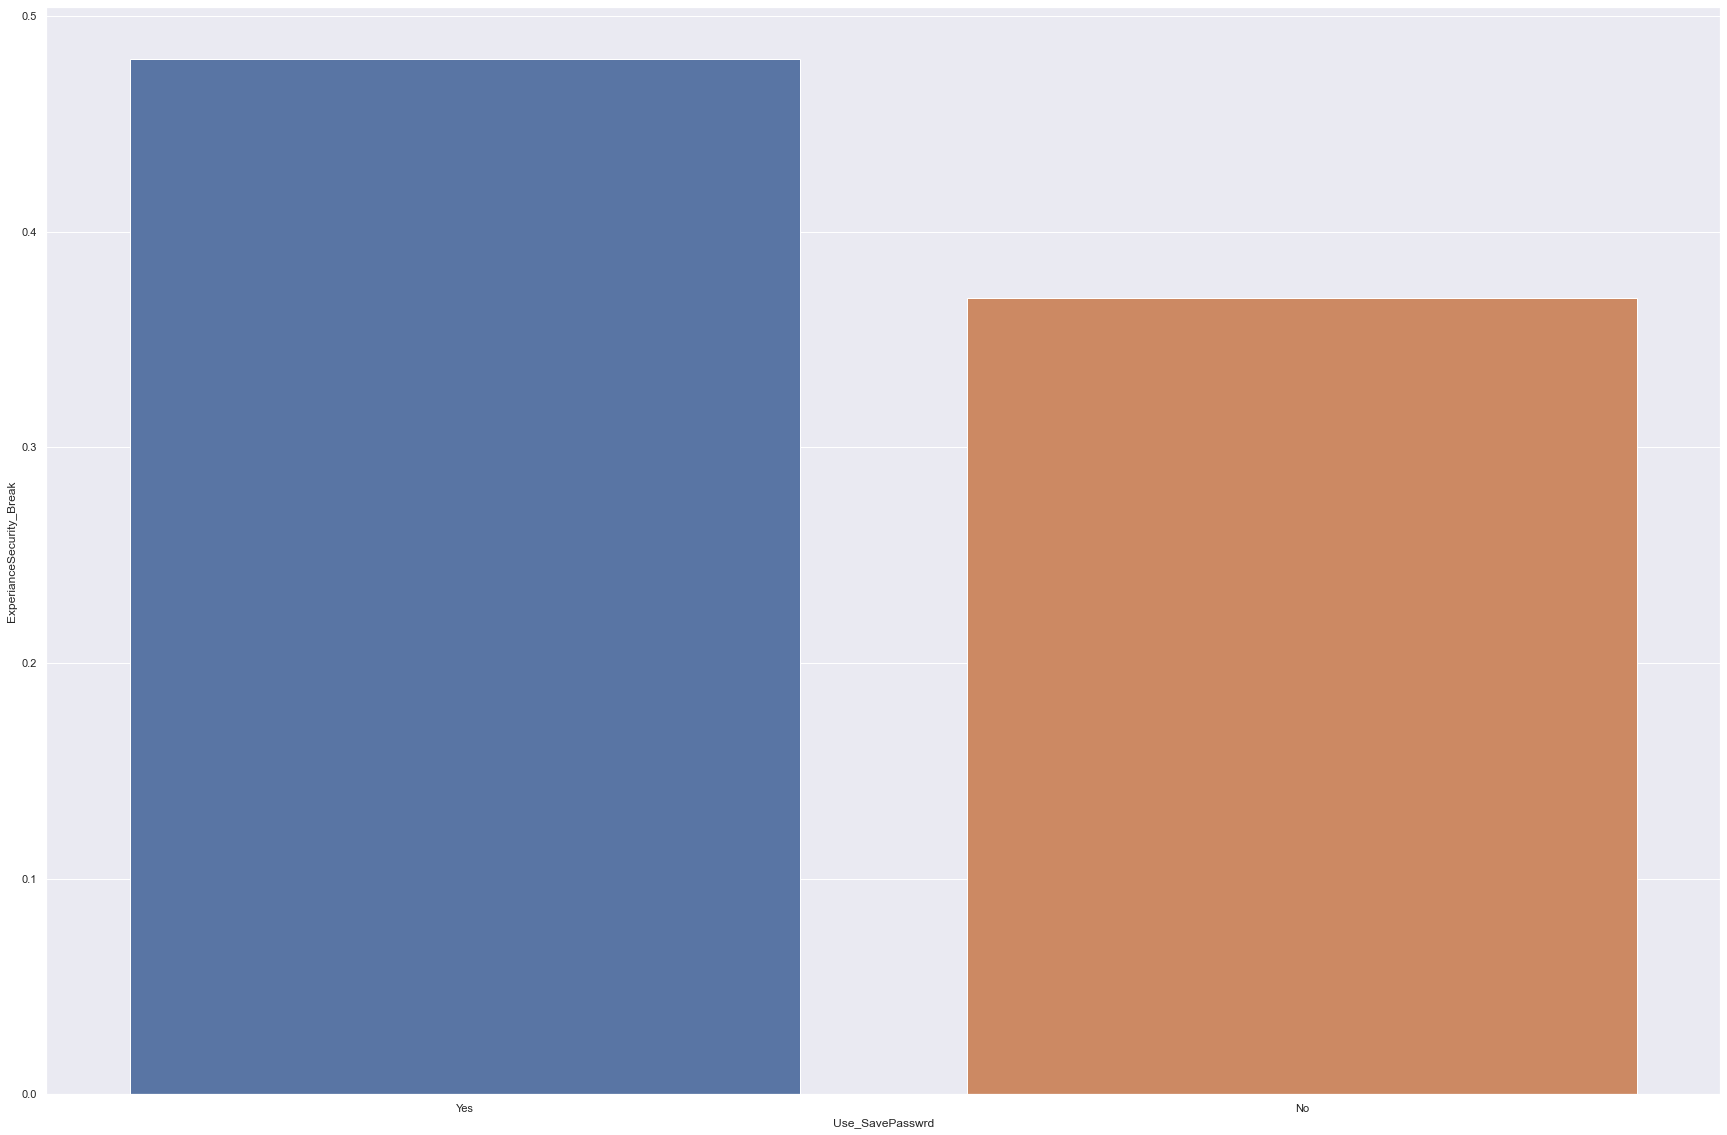

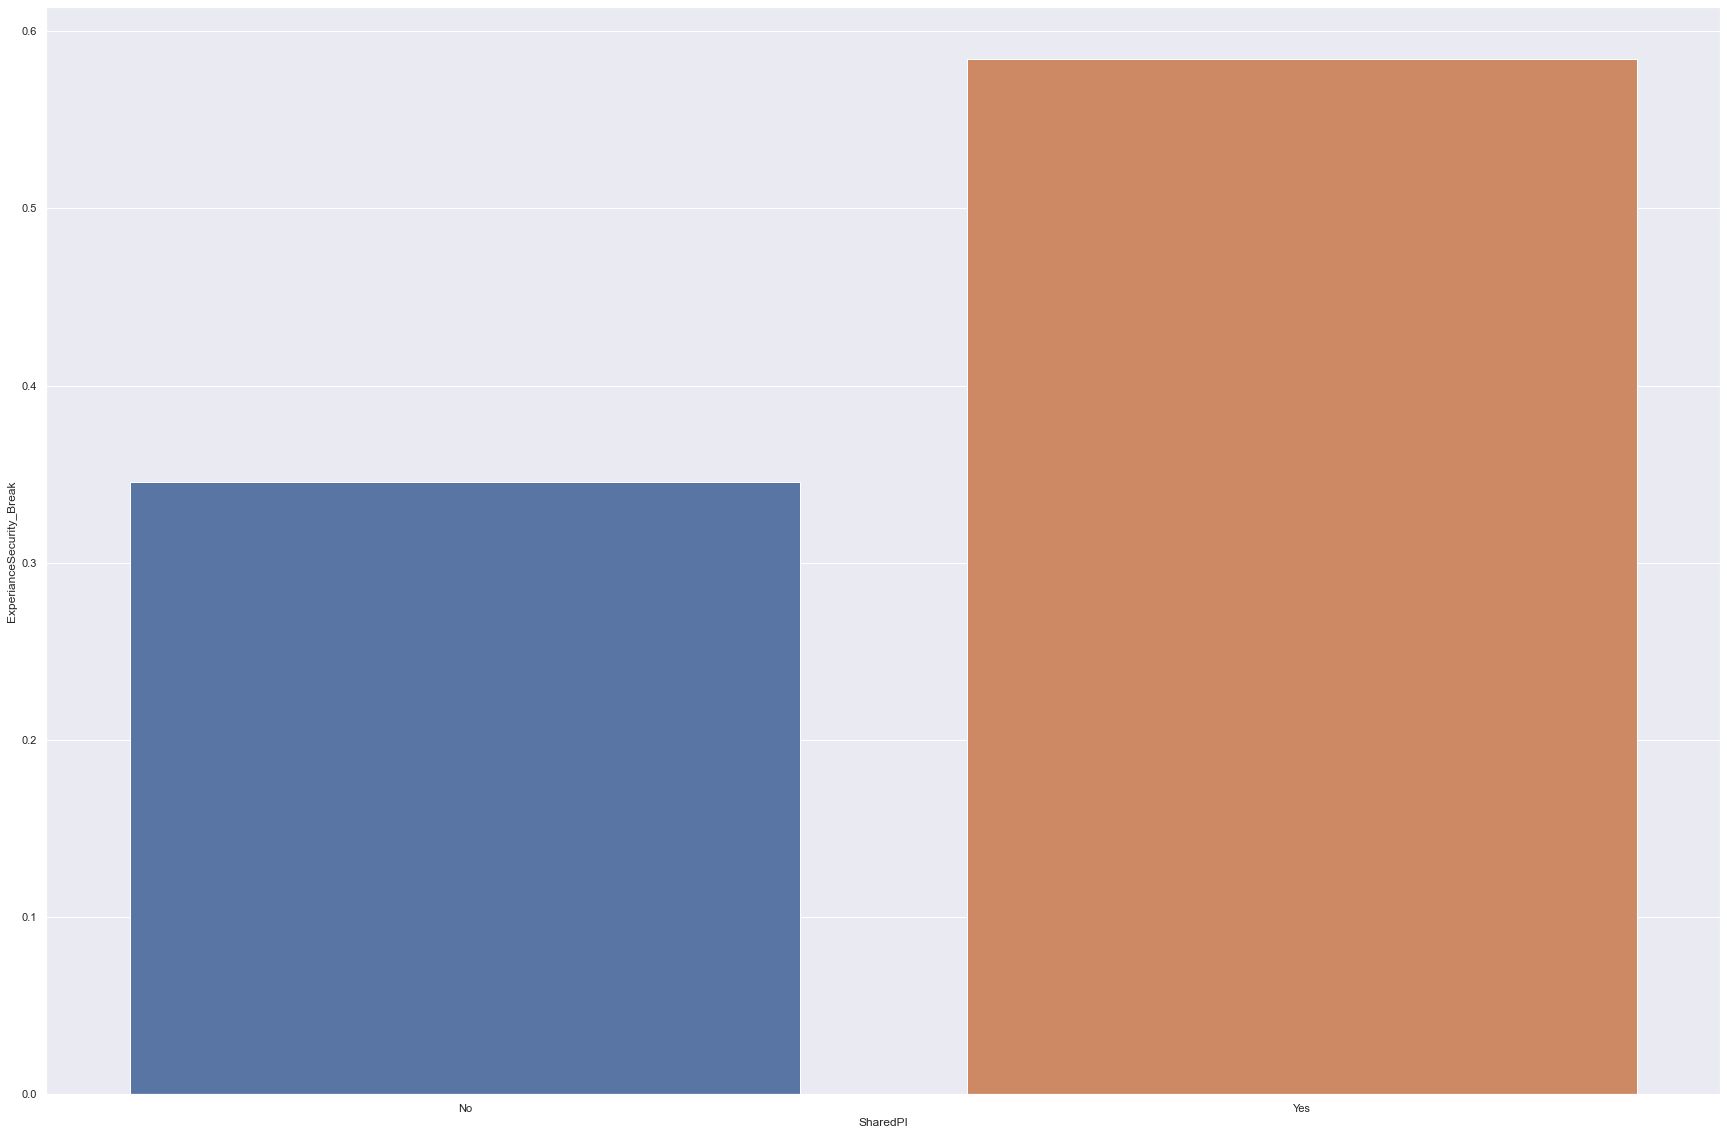

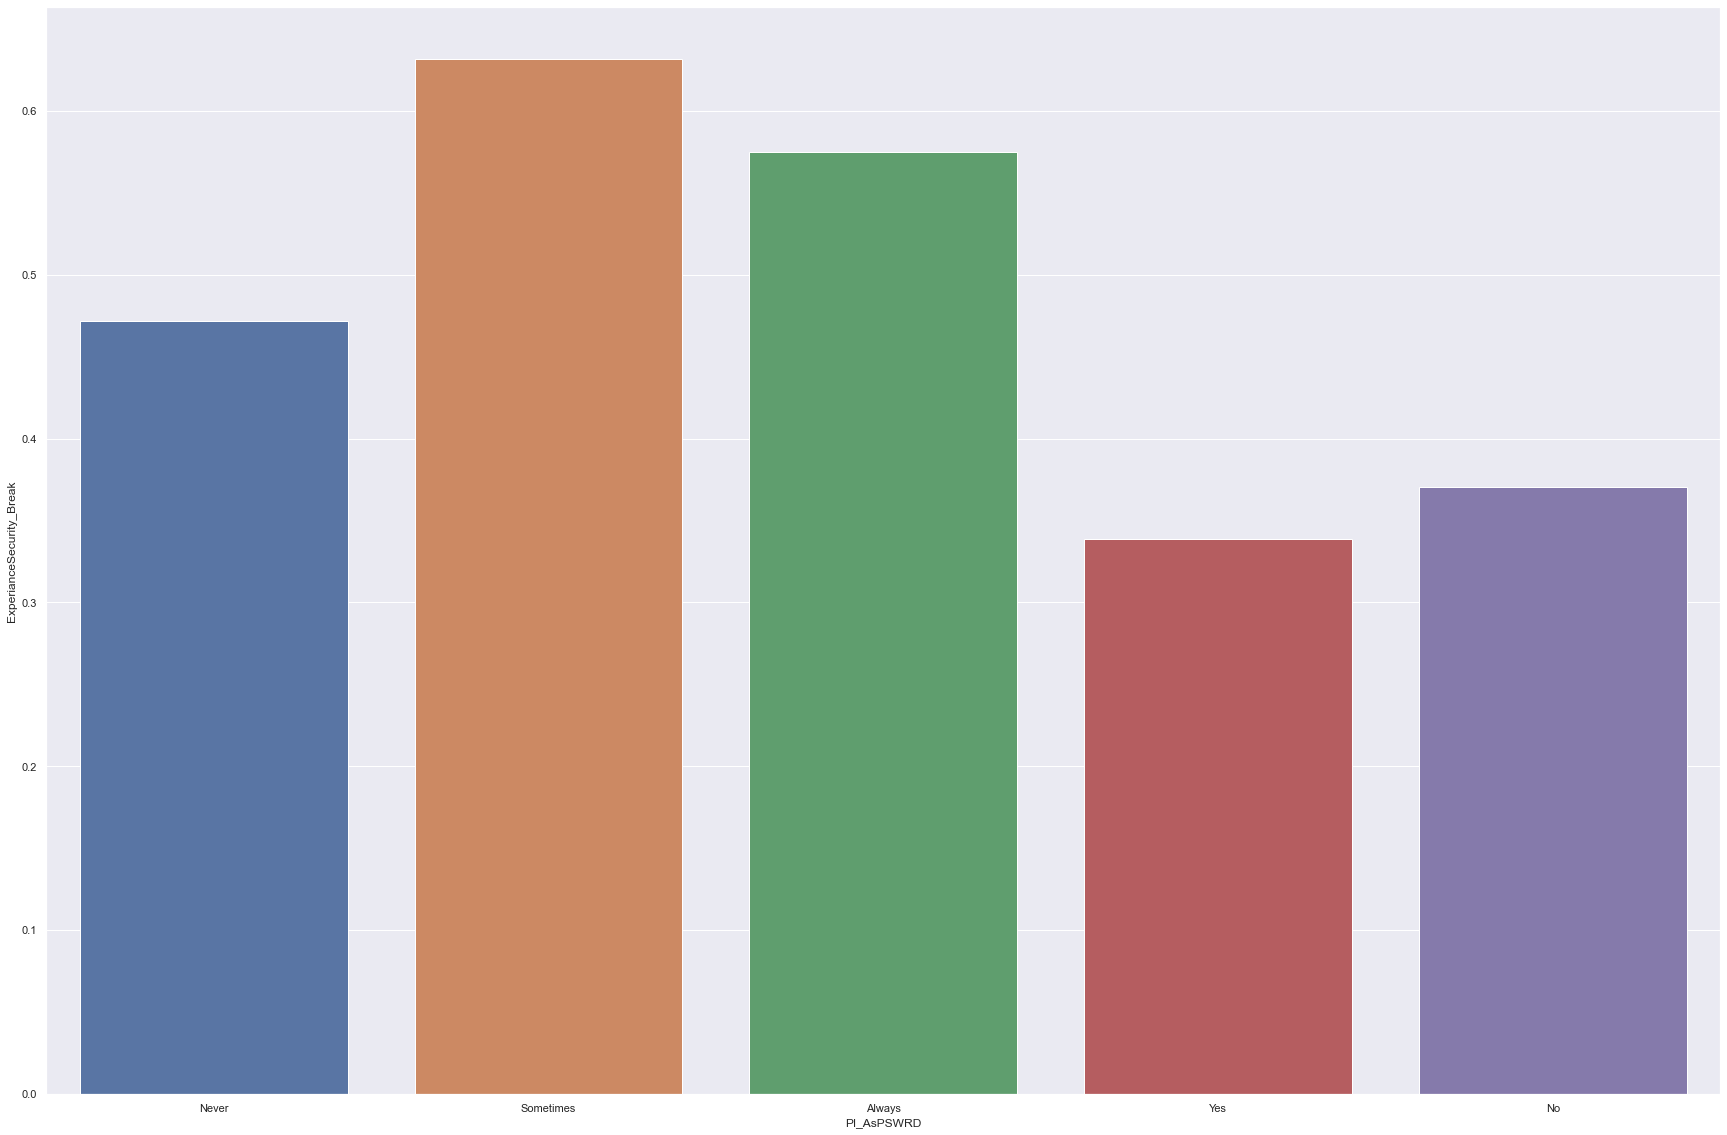

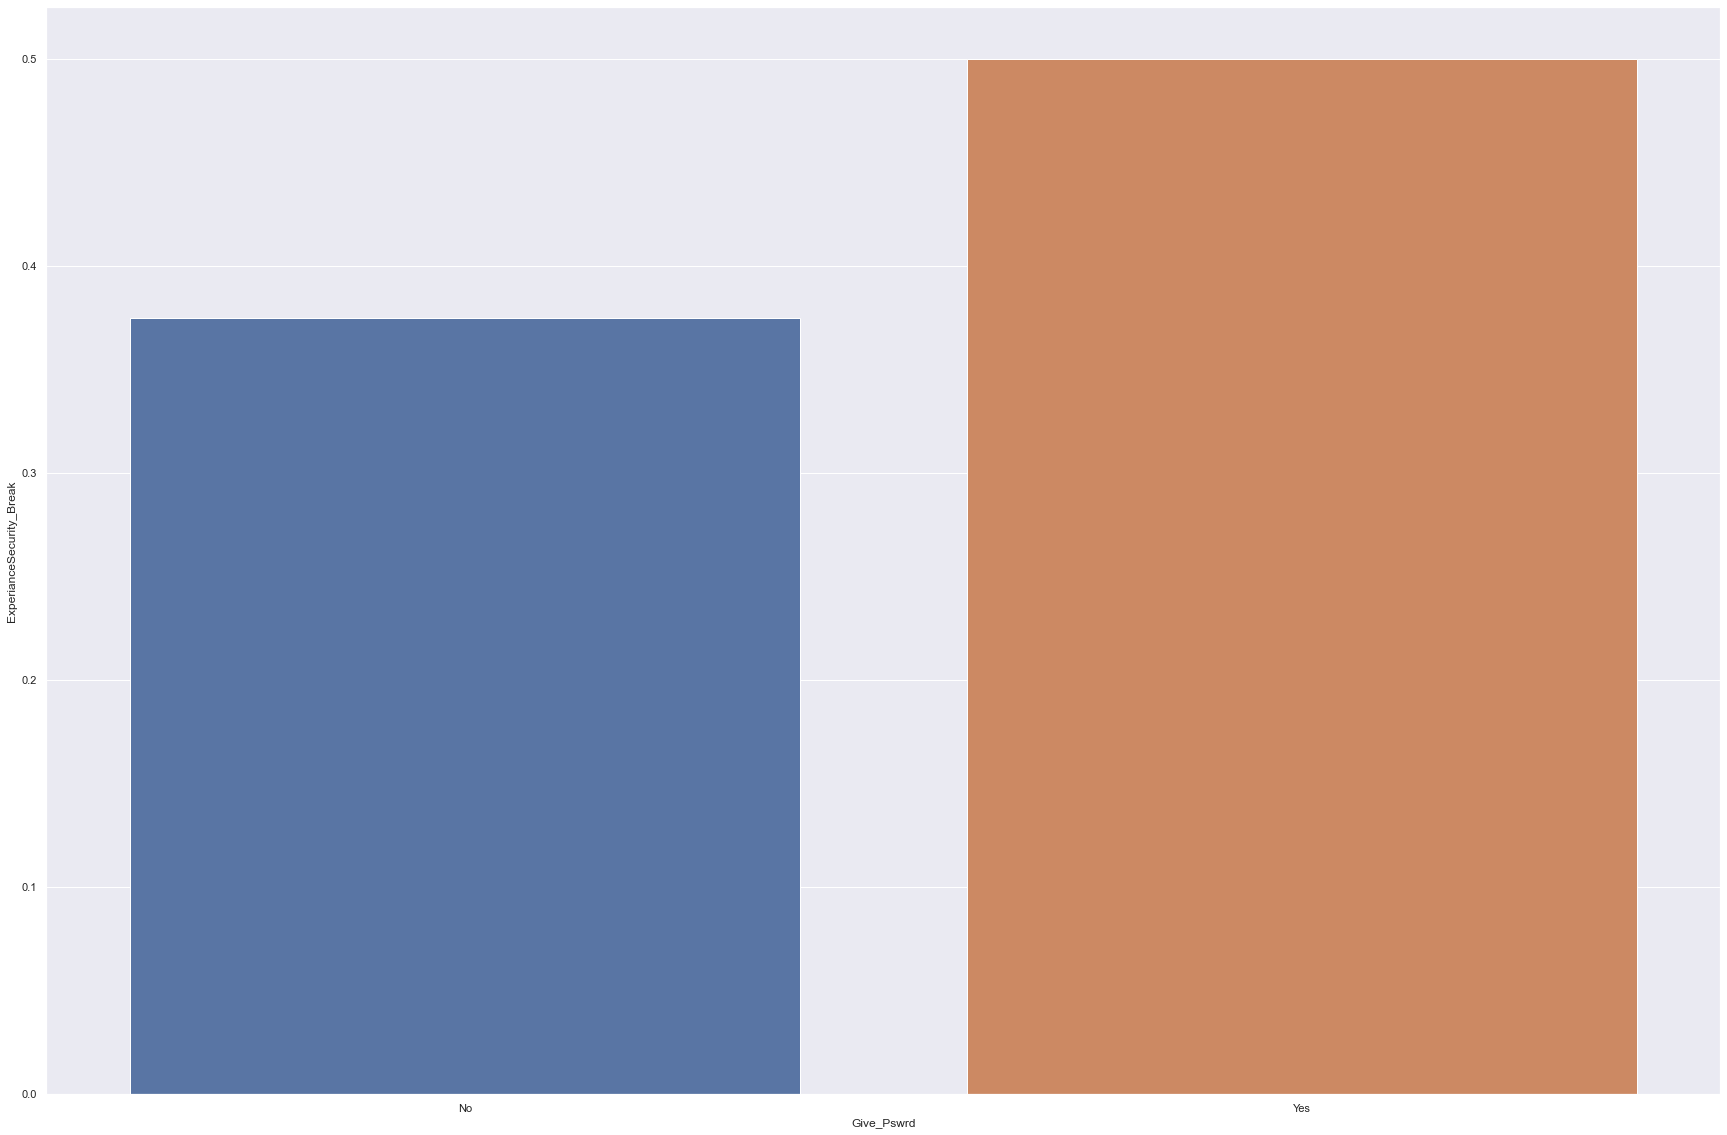

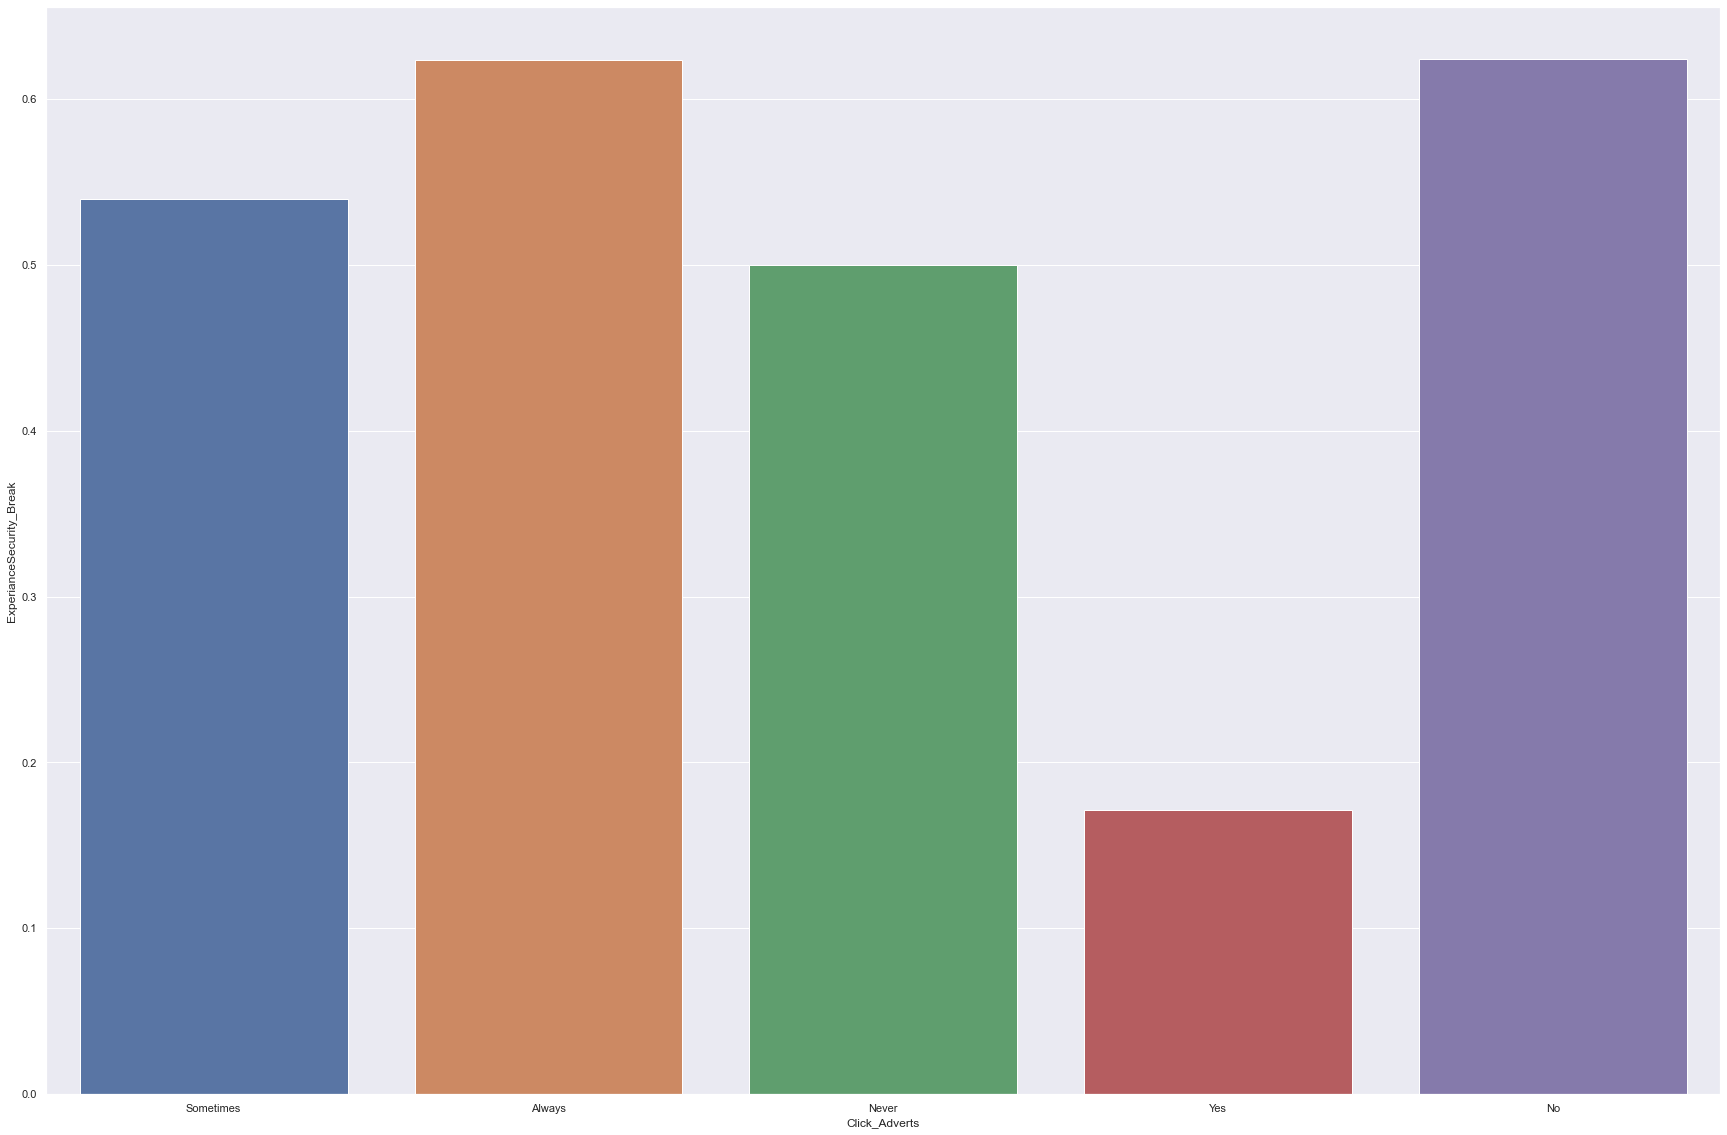

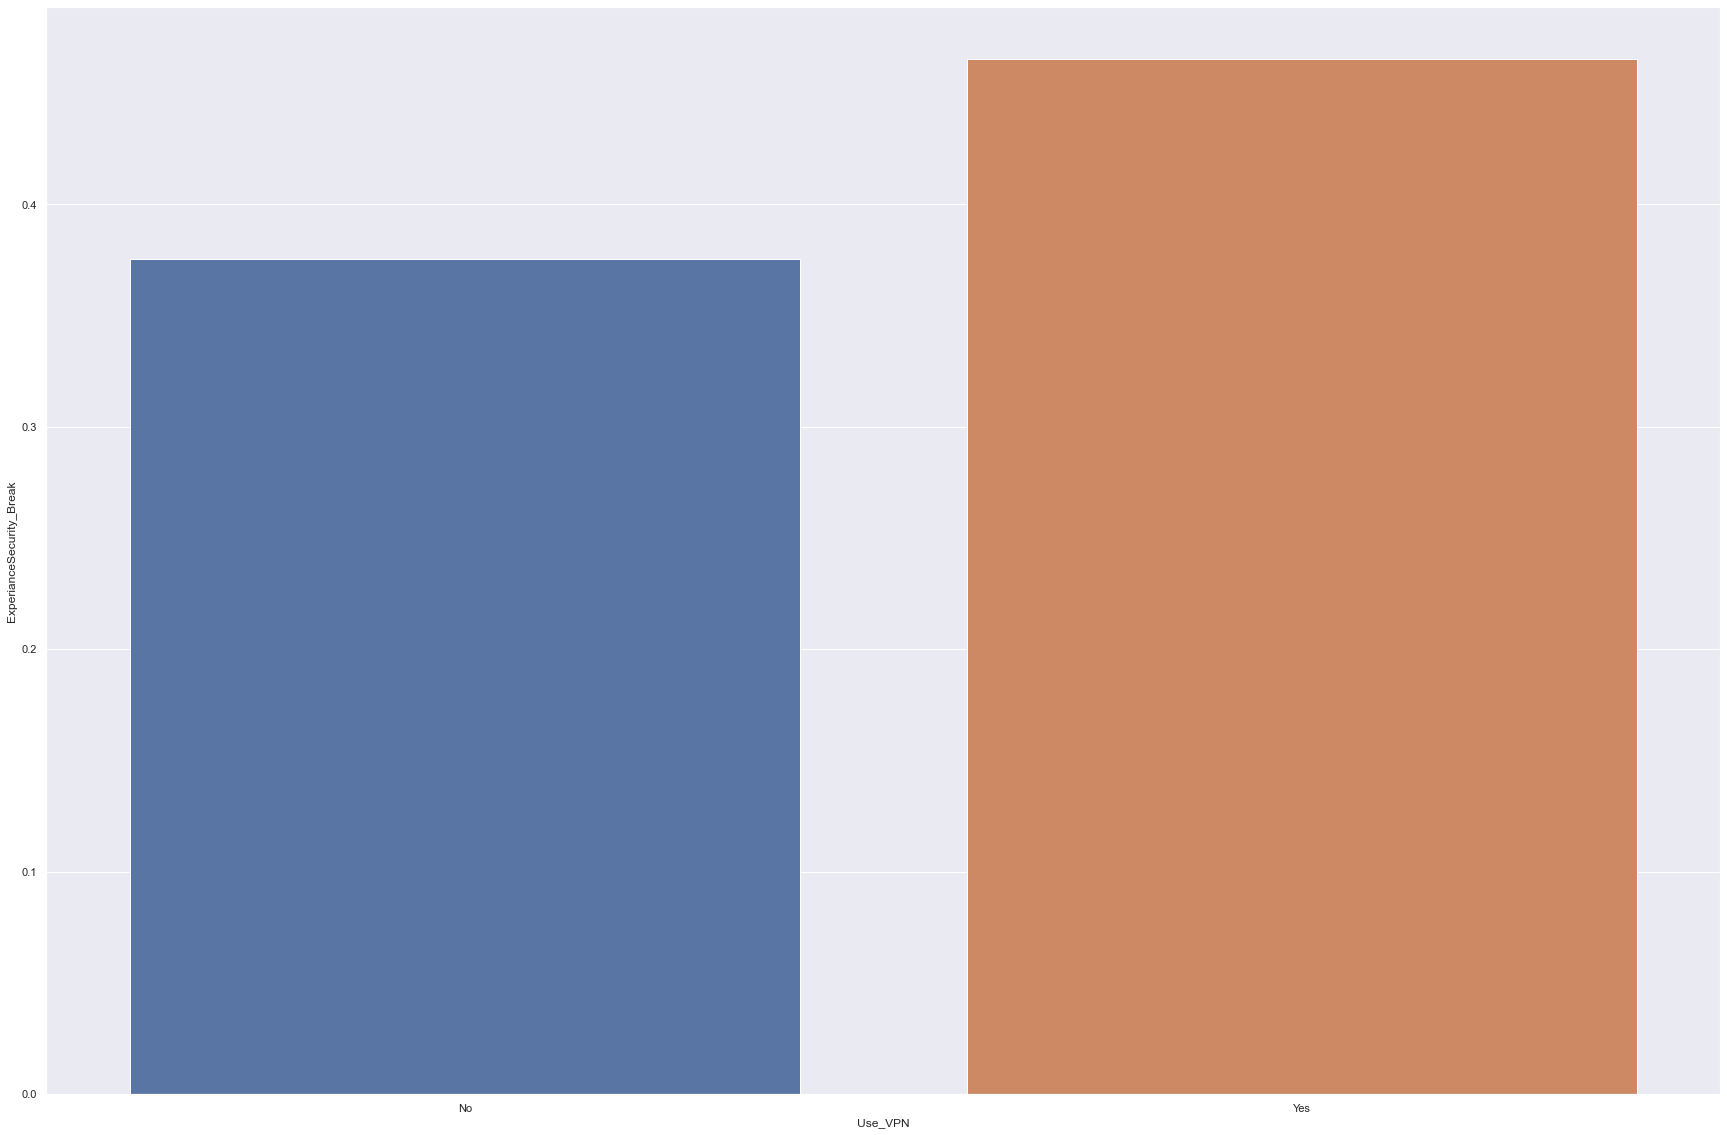

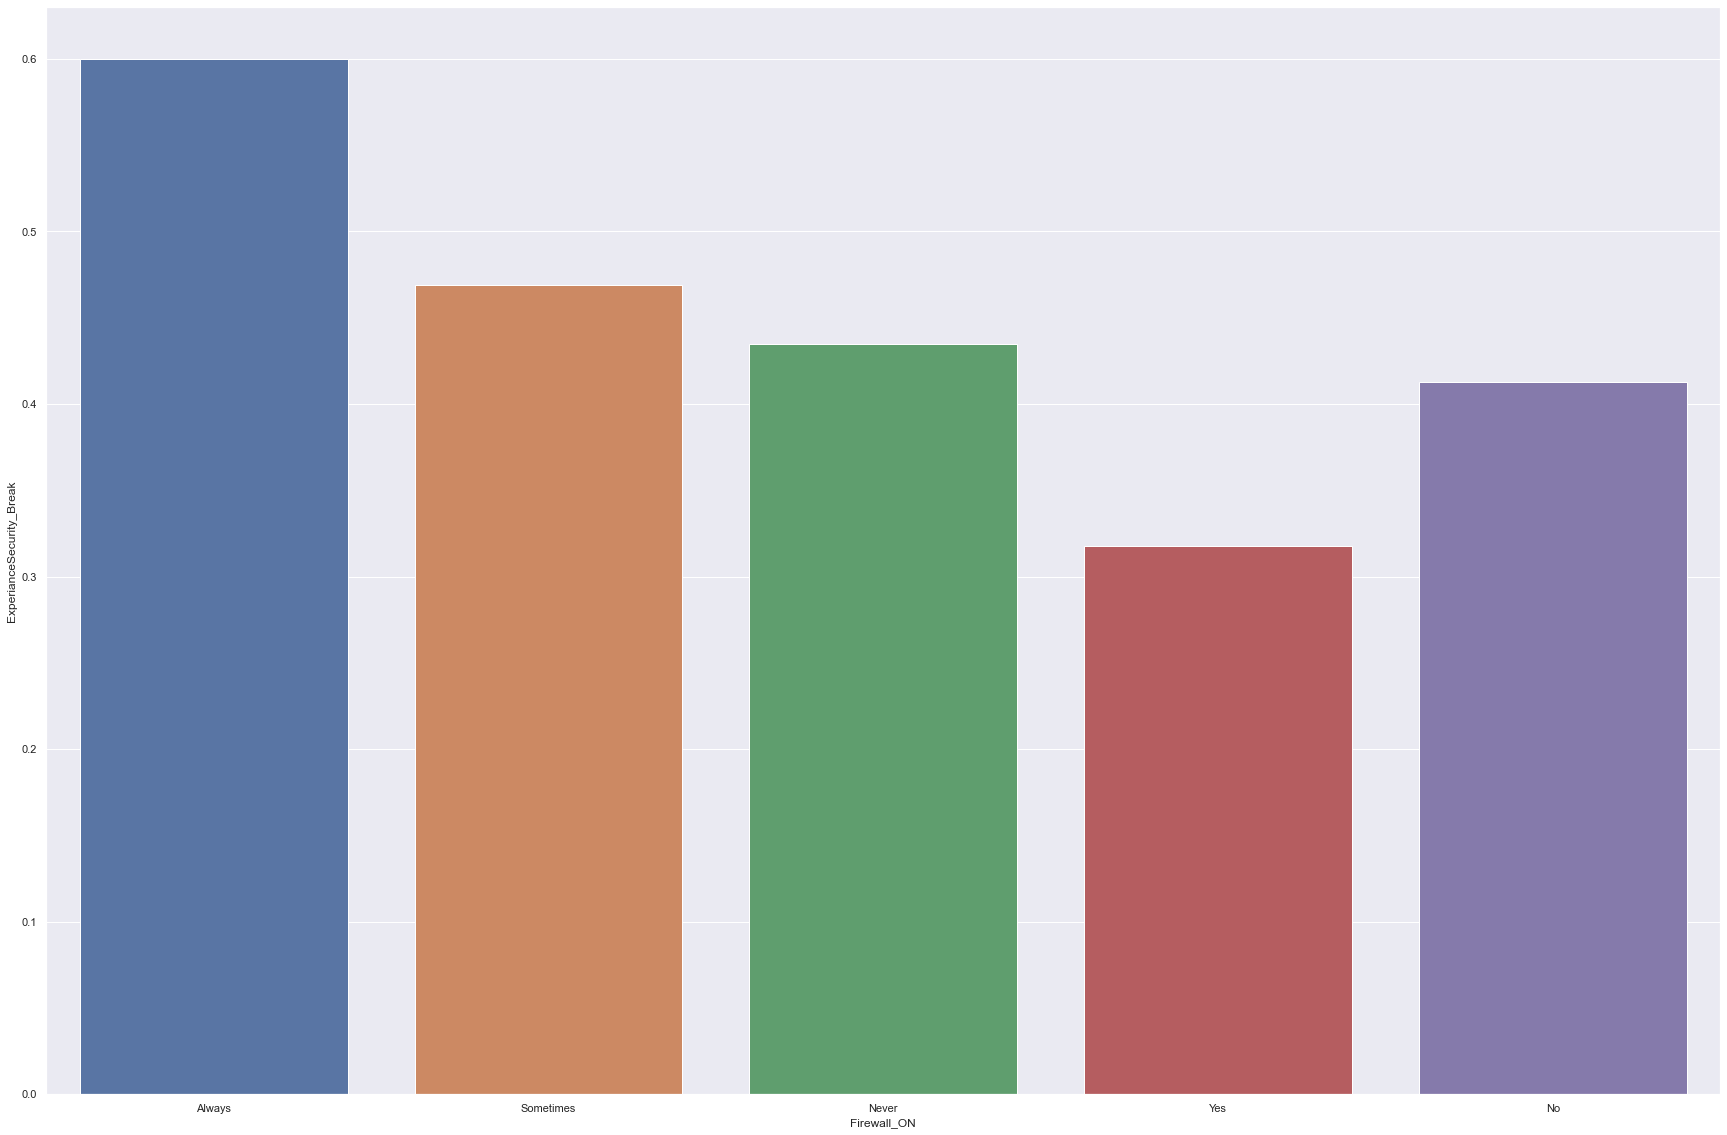

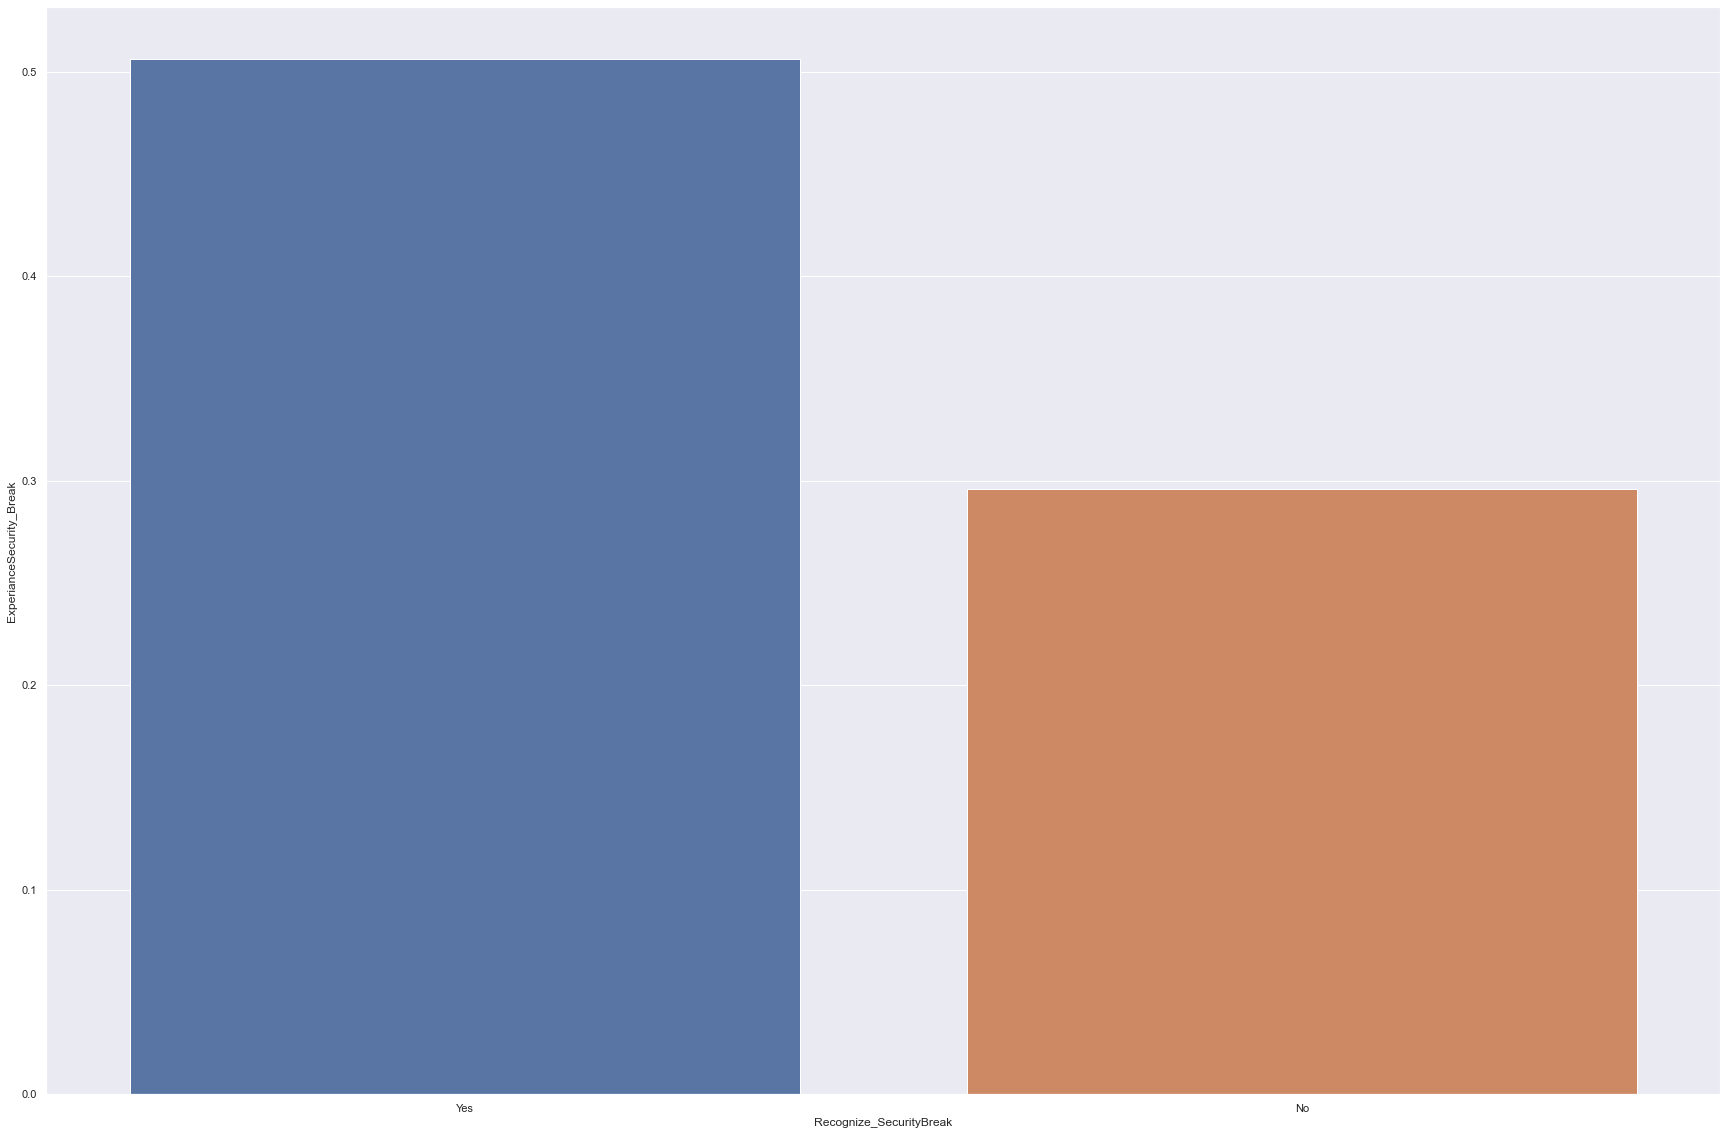

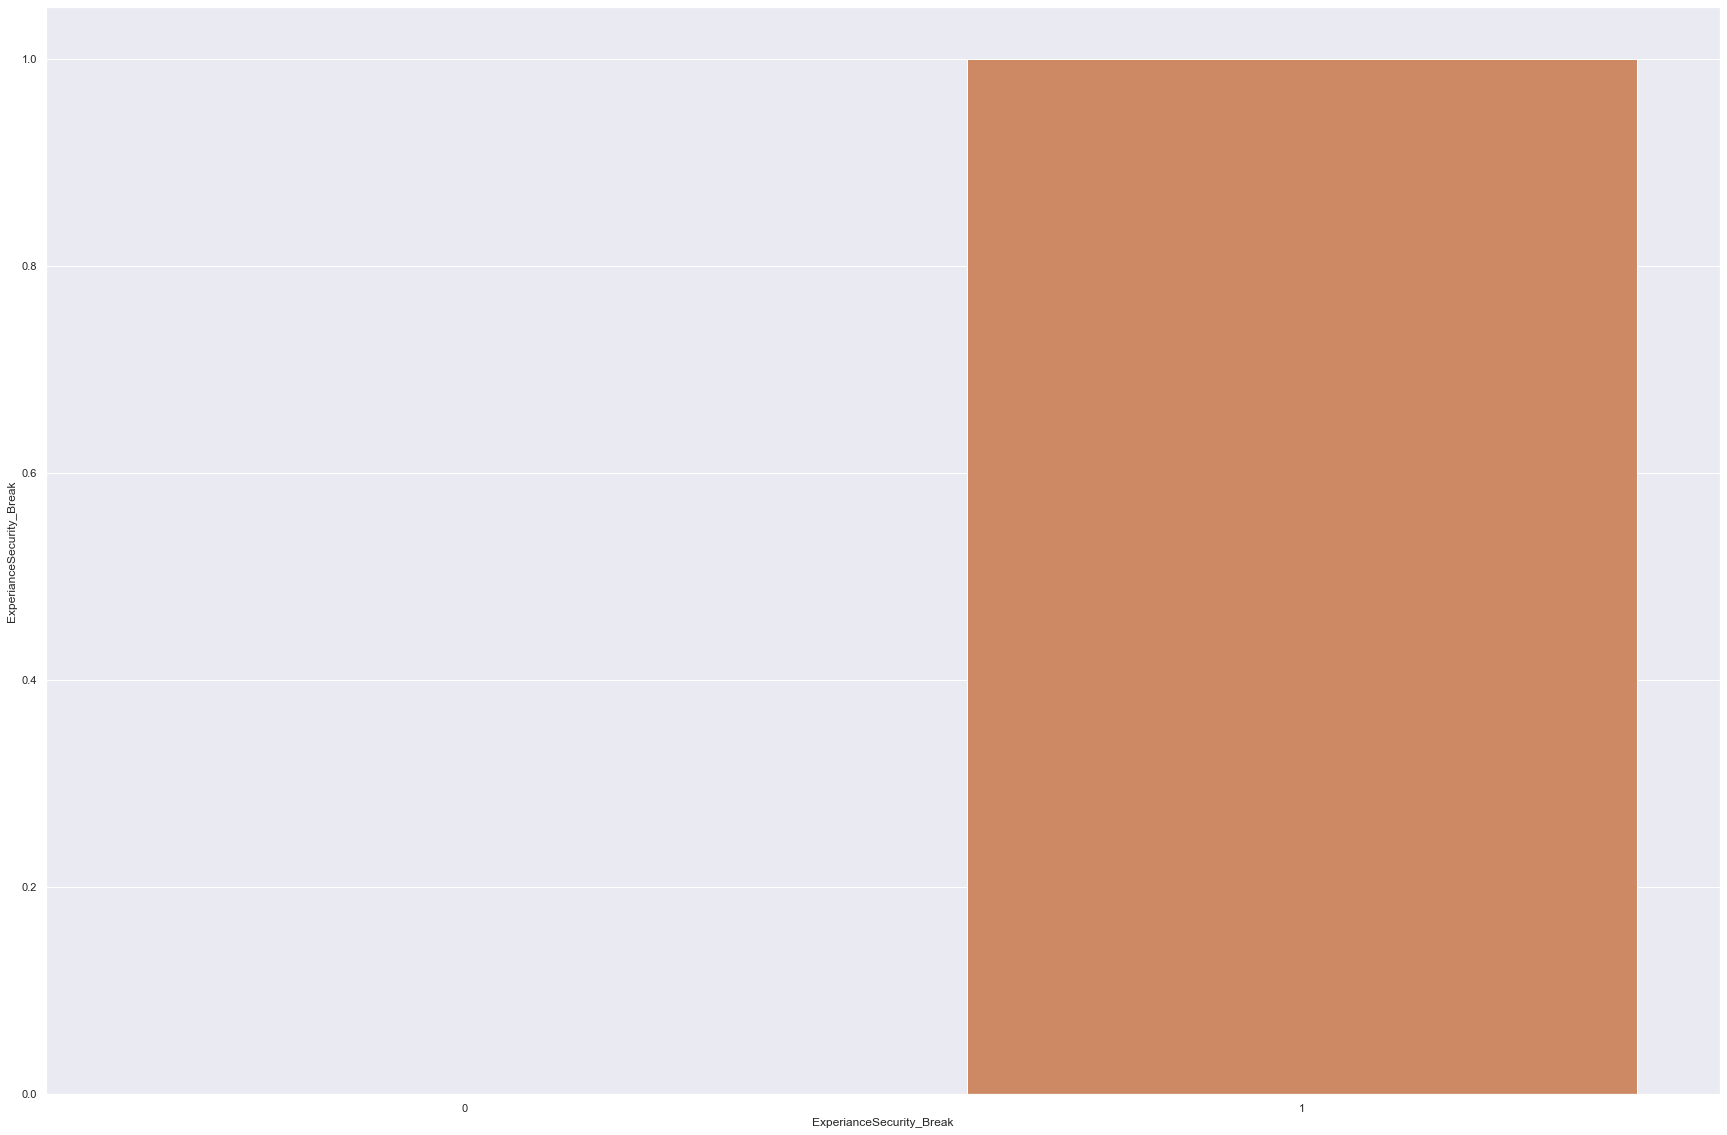

In [338]:
for c in Selected_columns:
    plt.figure(figsize=(30,20))
    sns.barplot(x=c,y="ExperianceSecurity_Break",data=data_used,ci=None)
    plt.show()

<AxesSubplot:xlabel='Age', ylabel='ExperianceSecurity_Break'>

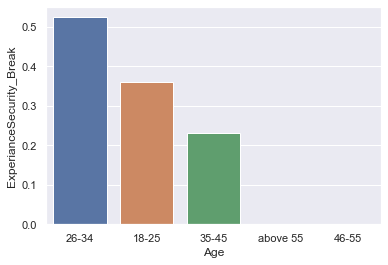

In [339]:
sns.barplot(x='Age', y='ExperianceSecurity_Break', data=data_used, ci=None) 

In [340]:
pd.crosstab(data_used["Age"],data_used.ExperianceSecurity_Break,margins=True)

ExperianceSecurity_Break    0    1  All
Age                                    
18-25                     179  101  280
26-34                     105  116  221
35-45                      10    3   13
46-55                       4    0    4
above 55                    2    0    2
All                       300  220  520

<AxesSubplot:xlabel='StrongPassword_Usage', ylabel='ExperianceSecurity_Break'>

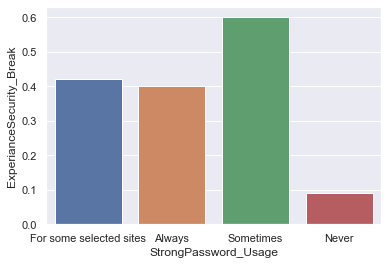

In [341]:
sns.barplot(x="StrongPassword_Usage",y="ExperianceSecurity_Break",data=data_used,ci=None)

In [342]:
pd.crosstab(data_used.StrongPassword_Usage,data_used.ExperianceSecurity_Break,margins=True)

ExperianceSecurity_Break    0    1  All
StrongPassword_Usage                   
Always                    141   94  235
For some selected sites    73   53  126
Never                      40    4   44
Sometimes                  46   69  115
All                       300  220  520

In [343]:
data_used

Age          Education                        Department  \
0    26-34    Master’s degree                Information System   
1    26-34    Master’s degree  Computer science and engineering   
2    26-34    Master’s degree                Information System   
3    26-34    Master’s degree     Computer network and security   
4    26-34    Master’s degree  Computer science and engineering   
..     ...                ...                               ...   
515  26-34    Master’s degree                     Biotechnology   
516  26-34  Bachelor’s degree                Information System   
517  26-34    Master’s degree            Information technology   
518  26-34  Bachelor’s degree                Information System   
519  26-34    Master’s degree         communication engineering   

                                               Purpose  \
0    Education/ Information seeking;Government serv...   
1    Education/ Information seeking;Social networki...   
2    Social networking like email, Facebook, WhatsA...   
3    Education/ Information seeking;Social networki...   
4    Education/ Information seeking;Social networki...   
..                                                 ...   
515  Social networking like email, Facebook, WhatsA...   
516                     Education/ Information seeking   
517                     Education/ Information seeking   
518  Education/ Information seeking;Online banking;...   
519                     Education/ Information seeking   

             Physical Security Usage_Category  \
0                  CCTV camera  Frequent user   
1     CCTV camera;Manual guard  Frequent user   
2                         None  Frequent user   
3    Manual guard;Danger fence  Frequent user   
4                 Manual guard  Frequent user   
..                         ...            ...   
515               Manual guard  Frequent user   
516               Manual guard  Frequent user   
517   CCTV camera;Manual guard  Frequent user   
518   CCTV camera;Manual guard  Frequent user   
519               Manual guard  Frequent user   

                                     Connectivity_Type  \
0    Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadba...   
1       Wi-Fi;Mobile Data;Broadband wired connectivity   
2                                                Wi-Fi   
3                     Private;Mobile Data;Public Wi-Fi   
4       Wi-Fi;Mobile Data;Broadband wired connectivity   
..                                                 ...   
515                       Broadband wired connectivity   
516                       Broadband wired connectivity   
517                                        Mobile Data   
518                                        Mobile Data   
519                                              Wi-Fi   

                                      Account_Security  \
0                                 Set strong passwords   
1    Do not save password on web browser cookies;No...   
2               Not share account passwords to any one   
3    Not share account passwords to any one;Change ...   
4    Not share account passwords to any one;Change ...   
..                                                 ...   
515  Do not save password on web browser cookies;No...   
516  Do not save password on web browser cookies;No...   
517                               Set strong passwords   
518                               Set strong passwords   
519  Not share account passwords to any one;Set str...   

        StrongPassword_Usage  \
0    For some selected sites   
1                     Always   
2                  Sometimes   
3                  Sometimes   
4                     Always   
..                       ...   
515                   Always   
516  For some selected sites   
517                   Always   
518                   Always   
519  For some selected sites   

                                       LevelofThinking  ... Use_Hints  \
0    Following security policies at our company hel...  ...     

In [344]:
pd.crosstab(data["Gender"],data["Education"],margins=True)

Education  Bachelor’s degree  College Diploma  High School  Master’s degree  \
Gender                                                                        
Female                   152                8            0               28   
Male                     191                8            5              128   
All                      343               16            5              156   

Education  All  
Gender          
Female     188  
Male       332  
All        520

In [345]:
#pd.pivot_table(data,index=["SharedPI"],values="Gender")
pd.crosstab(data.SharedPI,data.Gender,margins=True)

Gender    Female  Male  All
SharedPI                   
No           119   231  350
Yes           69    97  166
All          188   328  516

In [346]:
#da["Cabin"]=m["Cabin"].fillna(m["Cabin"].mode()[0])

# Ordinal Encoding

In [347]:
#ordinal_mapping = {k: i for i, k in enumerate(
#    data["IS_Knowledge"].unique(), 0)
#}

# Data Preprocessing

In [348]:
def encode_Education(education_level):
    if education_level=="None":
        level=0
    if education_level=="PHD":
        level=5
    if education_level=="Master’s degree":
        level=4
    if education_level=="Bachelor’s degree":
        level=3
    if education_level=="College Diploma":
        level=2
    if education_level=="High School":
        level=1
    return level

In [349]:
#data["Education"]=df["Education"].map(encode_Education)

In [350]:
def encode_Gender(gender):
    global level
    if gender=="Female":
        level=0
    if gender=="Male":
        level=1
    return level


In [351]:
#data["Gender"]=data["Gender"].map(encode_Gender)


In [352]:
def encode_password_socialmedia(password):
    global level
    if password=="Never":
        level=0
    if password=="Sometimes":
        level=1
    if password=="For some selected sites":
        level=2
    if password=="Always":
        level=3
    return level

In [353]:
#data["StrongPassword_Usage"]=data["StrongPassword_Usage"].map(encode_password_socialmedia)

In [354]:
#Comfortability Reporting Threats
def encode_Comfortablity(comfortable):
    global level
    if comfortable=="Disagree":
        level=1
    if comfortable=="Strongly disagree":
        level=0
    if comfortable=="Neutral":
        level=2
    if comfortable=="Agree":
        level=3
    return level

In [355]:
#data["Feel_ComfortableReporting_Problems"]=data["Feel_ComfortableReporting_Problems"].map(encode_Comfortablity)

In [356]:
#encode Security Knowledge category
def encode_SecurityKnowledge(know):
    if know=="None":
        categ=0
    if know=="Low":
        categ=1
    if know=="Average":
        categ=2
    if know=="High":
        categ=3
    return categ

In [357]:
#data["IS_Knowledge"]=data["IS_Knowledge"].map(encode_SecurityKnowledge)

In [358]:
# How often You Changed Password
def Encode_PasswordChange(turn_comp1):
    global fr
    if turn_comp1=="Regularly":
        fr=4
    if turn_comp1=="Sometimes":
        fr=3
    if turn_comp1=="Within a month":
        fr=2
    if turn_comp1=="Less than six-month":
        fr=1
    if turn_comp1=="Do not change unless I Forget it":
        fr=0
    return fr
    

In [359]:
#data["ChangePassword"]=data["ChangePassword"].map(Encode_PasswordChange)

In [360]:
#Ecode Age
def EncodeAge(age):
    global scanned
    if age=="18-25":
        scanned=1
    if age=="26-34":
        scanned=2
    if age=="35-45":
        scanned=3
    if age=="46-55":
        scanned=4
    if age=="above 55":
        scanned=5
    return scanned


In [361]:
#Ecode Lock computer
def LockComputer(status):
    global scanned
    if status=="Leave the computer as it is":
        scanned=1
    if status=="Turn off the monitor only":
        scanned=2
    if status=="Hibernet/Sleep":
        scanned=3
    if status=="Log out of all applications":
        scanned=4
    if status=="Turn off the computer system":
        scanned=5
    return scanned

In [362]:
def encode_Education(education_level):
    global level
    if education_level=="None":
        level=0
    if education_level=="PHD":
        level=5
    if education_level=="Master’s degree":
        level=4
    if education_level=="Bachelor’s degree":
        level=3
    if education_level=="College Diploma":
        level=2
    if education_level=="High School":
        level=1
    return level

In [363]:
def encode_InternetUsage(usage):
    global level
    if usage=="Infrequent User":
        level=0
    if usage=="Frequent User":
        level=1
    return level

In [364]:
#Encode applying social media password

def Encode_PasswordChange(turn_comp1):
    global fr
    if turn_comp1=="Regularly":
        fr=1
    if turn_comp1=="In amonthly bases":
        fr=2
    if turn_comp1=="As per the password policy set by the company i am working on":
        fr=3
    if turn_comp1=="Do not change unless I Forget it":
        fr=4
    return fr


In [365]:
# Encode the extent user uses Password Hints for Accounts
def Use_Hints(hint):
    global ht
    if hint=="Yes":
        ht=0
    if hint=="No":
        ht=1
    return ht


In [366]:
def SavePassword_option(sps):
    global save_ps
    if sps=="Yes":
        save_ps=1
    if sps=="No":
        save_ps=0
    return save_ps


In [367]:
def check_update(ch_up):
    global upd
    if ch_up=="Yes":
        upd=1
    if ch_up=="No":
        upd=0
    return upd


In [368]:
# what Users will do if Admin Asks them For Password 0---> Give Password 1---->Not give Password
def GivePass_Admin(gv_pass):
    global pas_given
    if gv_pass=="Yes":
        pas_given=0
    if gv_pass=="No":
        pas_given=1
    return pas_given


In [369]:
#Extent Users recognize Security issue
def Recognize_SecurityIssue(security_issue):
    global recognized
    if security_issue=="Yes":
        recognized=0
    if security_issue=="No":
        recognized=1
    return recognized


In [370]:
def Use_VPNfrom_Home(vpn):
    global used
    if vpn=="Yes":
        used=0
    if vpn=="No":
        used=1
    return used


In [371]:
def Encode_Department(dep):
    global level
    if dep=="Computer science and Engineering":
        level=4
    if dep=="Agricultural science":
        level=3
    if dep=="Health science":
        level=2
    if dep=="Social science":
        level=1
    if dep=="Natural science":
        level=0
    return level

In [372]:
df1=data.copy()
data_used["Education"]=data_used["Education"].map(encode_Education)
data_used["Age"]=data_used["Age"].map(EncodeAge)
#data_used["Gender"]=data_used["Gender"].map(encode_Gender)
data_used["Department"]=data_used["Department"].map(Encode_Department)
data_used["Usage_Category"]=data_used["Usage_Category"].map(encode_InternetUsage)
data_used

C:\Users\HB\AppData\Local\Temp\ipykernel_13084\2021812970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used["Education"]=data_used["Education"].map(encode_Education)
C:\Users\HB\AppData\Local\Temp\ipykernel_13084\2021812970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used["Age"]=data_used["Age"].map(EncodeAge)
C:\Users\HB\AppData\Local\Temp\ipykernel_13084\2021812970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Age  Education  Department  \
0      2          4           4   
1      2          4           4   
2      2          4           4   
3      2          4           4   
4      2          4           4   
..   ...        ...         ...   
515    2          4           4   
516    2          3           4   
517    2          4           4   
518    2          3           4   
519    2          4           4   

                                               Purpose  \
0    Education/ Information seeking;Government serv...   
1    Education/ Information seeking;Social networki...   
2    Social networking like email, Facebook, WhatsA...   
3    Education/ Information seeking;Social networki...   
4    Education/ Information seeking;Social networki...   
..                                                 ...   
515  Social networking like email, Facebook, WhatsA...   
516                     Education/ Information seeking   
517                     Education/ Information seeking   
518  Education/ Information seeking;Online banking;...   
519                     Education/ Information seeking   

             Physical Security  Usage_Category  \
0                  CCTV camera               4   
1     CCTV camera;Manual guard               4   
2                         None               4   
3    Manual guard;Danger fence               4   
4                 Manual guard               4   
..                         ...             ...   
515               Manual guard               4   
516               Manual guard               4   
517   CCTV camera;Manual guard               4   
518   CCTV camera;Manual guard               4   
519               Manual guard               4   

                                     Connectivity_Type  \
0    Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadba...   
1       Wi-Fi;Mobile Data;Broadband wired connectivity   
2                                                Wi-Fi   
3                     Private;Mobile Data;Public Wi-Fi   
4       Wi-Fi;Mobile Data;Broadband wired connectivity   
..                                                 ...   
515                       Broadband wired connectivity   
516                       Broadband wired connectivity   
517                                        Mobile Data   
518                                        Mobile Data   
519                                              Wi-Fi   

                                      Account_Security  \
0                                 Set strong passwords   
1    Do not save password on web browser cookies;No...   
2               Not share account passwords to any one   
3    Not share account passwords to any one;Change ...   
4    Not share account passwords to any one;Change ...   
..                                                 ...   
515  Do not save password on web browser cookies;No...   
516  Do not save password on web browser cookies;No...   
517                               Set strong passwords   
518                               Set strong passwords   
519  Not share account passwords to any one;Set str...   

        StrongPassword_Usage  \
0    For some selected sites   
1                     Always   
2                  Sometimes   
3                  Sometimes   
4                     Always   
..                       ...   
515                   Always   
516  For some selected sites   
517                   Always   
518                   Always   
519  For some selected sites   

                                       LevelofThinking  ... Use_Hints  \
0    Following security policies at our company hel...  ...        No   
1    I know how to formally report a security incid...  ...       Yes   
2    Senior leaders at our comapany care about secu...  ...        No   
3    Following security policies at our company hel...  ...        No   
4    I know how to formally report a security incident  ...        No   
..                                                 ...  ...       ...

# Encoding Selected Columns

In [373]:
#Ecode Age
def EncodeAge(age):
    global scanned
    if age=="18-25":
        scanned=1
    if age=="26-34":
        scanned=2
    if age=="35-45":
        scanned=3
    if age=="46-55":
        scanned=4
    if age=="above 55":
        scanned=5
    return scanned

In [374]:
def EncodeUse_Hints(hint):
    global level
    if hint=="Yes":
        level=0
    if hint=="No":
        level=1
    return level

In [375]:
def EncodeClick_Adverts(hint):
    global level
    if hint=="Yes" or hint=="Always":
        level=0
    if hint=="No" or hint=="Sometimes":
        level=1
    return level

In [376]:
def EncodePI_ASPswd(hint):
    global level
    if hint=="Yes" or hint=="Sometimes":
        level=0
    if hint=="No" or hint=="Never":
        level=1
    return level

In [377]:
def Encode_Department(dep):
    global level
    if dep=="Computer science and Engineering":
        level=4
    if dep=="Agricultural science":
        level=3
    if dep=="Health science":
        level=2
    if dep=="Social science":
        level=1
    if dep=="Natural science":
        level=0
    return level

# Encoding Yes No Questions

In [378]:
data_used["Cyber_Training"]=data_used["Cyber_Training"].apply(SavePassword_option)

C:\Users\HB\AppData\Local\Temp\ipykernel_13084\2872550349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used["Cyber_Training"]=data_used["Cyber_Training"].apply(SavePassword_option)


In [379]:
data_used["StrongPassword_Usage"]=data_used["StrongPassword_Usage"].apply(encode_password_socialmedia)


C:\Users\HB\AppData\Local\Temp\ipykernel_13084\178986974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used["StrongPassword_Usage"]=data_used["StrongPassword_Usage"].apply(encode_password_socialmedia)


In [380]:
#Encode_PasswordChange

In [381]:
data_used["ExperianceSecurity_Break"]

0      1
1      1
2      0
3      1
4      1
      ..
515    0
516    1
517    0
518    1
519    0
Name: ExperianceSecurity_Break, Length: 520, dtype: int64

In [382]:
data_used["ChangePassword"]=data_used["ChangePassword"].apply(Encode_PasswordChange)


C:\Users\HB\AppData\Local\Temp\ipykernel_13084\1694544256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used["ChangePassword"]=data_used["ChangePassword"].apply(Encode_PasswordChange)


In [383]:
data_used["Cyber_Training"]=data_used["Cyber_Training"].apply(SavePassword_option)
data_used["Use_Hints"]=data_used["Use_Hints"].apply(SavePassword_option)
data_used["Use_SavePasswrd"]=data_used["Use_SavePasswrd"].apply(SavePassword_option)
data_used["SharedPI"]=data_used["SharedPI"].apply(SavePassword_option)
data_used["Give_Pswrd"]=data_used["Give_Pswrd"].apply(SavePassword_option)
data_used["Use_VPN"]=data_used["Use_VPN"].apply(SavePassword_option)
data_used["Firewall_ON"]=data_used["Firewall_ON"].apply(SavePassword_option)
data_used["Click_Adverts"]=data_used["Click_Adverts"].apply(SavePassword_option)
data_used["PI_AsPSWRD"]=data_used["PI_AsPSWRD"].apply(EncodePI_ASPswd)
data_used["Recognize_SecurityBreak"]=data_used["Recognize_SecurityBreak"].apply(SavePassword_option)
#data_used["ExperianceSecurity_Break"]=data_used["ExperianceSecurity_Break"].apply(SavePassword_option)


C:\Users\HB\AppData\Local\Temp\ipykernel_13084\536459171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used["Cyber_Training"]=data_used["Cyber_Training"].apply(SavePassword_option)
C:\Users\HB\AppData\Local\Temp\ipykernel_13084\536459171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used["Use_Hints"]=data_used["Use_Hints"].apply(SavePassword_option)
C:\Users\HB\AppData\Local\Temp\ipykernel_13084\536459171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [384]:
data_used

Age  Education  Department  \
0      2          4           4   
1      2          4           4   
2      2          4           4   
3      2          4           4   
4      2          4           4   
..   ...        ...         ...   
515    2          4           4   
516    2          3           4   
517    2          4           4   
518    2          3           4   
519    2          4           4   

                                               Purpose  \
0    Education/ Information seeking;Government serv...   
1    Education/ Information seeking;Social networki...   
2    Social networking like email, Facebook, WhatsA...   
3    Education/ Information seeking;Social networki...   
4    Education/ Information seeking;Social networki...   
..                                                 ...   
515  Social networking like email, Facebook, WhatsA...   
516                     Education/ Information seeking   
517                     Education/ Information seeking   
518  Education/ Information seeking;Online banking;...   
519                     Education/ Information seeking   

             Physical Security  Usage_Category  \
0                  CCTV camera               4   
1     CCTV camera;Manual guard               4   
2                         None               4   
3    Manual guard;Danger fence               4   
4                 Manual guard               4   
..                         ...             ...   
515               Manual guard               4   
516               Manual guard               4   
517   CCTV camera;Manual guard               4   
518   CCTV camera;Manual guard               4   
519               Manual guard               4   

                                     Connectivity_Type  \
0    Private;Wi-Fi;Mobile Data;Public Wi-Fi;Broadba...   
1       Wi-Fi;Mobile Data;Broadband wired connectivity   
2                                                Wi-Fi   
3                     Private;Mobile Data;Public Wi-Fi   
4       Wi-Fi;Mobile Data;Broadband wired connectivity   
..                                                 ...   
515                       Broadband wired connectivity   
516                       Broadband wired connectivity   
517                                        Mobile Data   
518                                        Mobile Data   
519                                              Wi-Fi   

                                      Account_Security  StrongPassword_Usage  \
0                                 Set strong passwords                     2   
1    Do not save password on web browser cookies;No...                     3   
2               Not share account passwords to any one                     1   
3    Not share account passwords to any one;Change ...                     1   
4    Not share account passwords to any one;Change ...                     3   
..                                                 ...                   ...   
515  Do not save password on web browser cookies;No...                     3   
516  Do not save password on web browser cookies;No...                     2   
517                               Set strong passwords                     3   
518                               Set strong passwords                     3   
519  Not share account passwords to any one;Set str...                     2   

                                       LevelofThinking  ... Use_Hints  \
0    Following security policies at our company hel...  ...         0   
1    I know how to formally report a security incid...  ...         1   
2    Senior leaders at our comapany care about secu...  ...         0   
3    Following security policies at our company hel...  ...         0   
4    I know how to formally report a security incident  ...         0   
..                                                 ...  ...       ...   
515  Following security policies at our company pre...  ...         0   
516  Following security policies at our comp

In [385]:
data_used.columns

Index(['Age', 'Education', 'Department', 'Purpose', 'Physical Security',
       'Usage_Category', 'Connectivity_Type', 'Account_Security',
       'StrongPassword_Usage', 'LevelofThinking', 'DeviceSafety',
       'SafeDownload', 'LevelOfThinking', 'Receiving_UnknownFile',
       'ChangePassword', 'Cyber_Training', 'Use_Hints', 'Use_SavePasswrd',
       'SharedPI', 'PI_AsPSWRD', 'Give_Pswrd', 'Click_Adverts', 'Use_VPN',
       'Firewall_ON', 'Recognize_SecurityBreak', 'ExperianceSecurity_Break'],
      dtype='object')

In [386]:
data_used["Cyber_Training"]

0      0
1      0
2      0
3      0
4      0
      ..
515    0
516    0
517    0
518    0
519    0
Name: Cyber_Training, Length: 520, dtype: int64

In [387]:
SavePassword_option

<function __main__.SavePassword_option(sps)>

# Dummy Variables

In [388]:
dumy_variables=pd.get_dummies(data=data_used, columns=["Department","Purpose","Physical Security","Connectivity_Type",
                                                      "Account_Security","DeviceSafety","SafeDownload","LevelOfThinking",
                                                      "Receiving_UnknownFile"])
dumy_variables

Age  Education  Usage_Category  StrongPassword_Usage  \
0      2          4               4                     2   
1      2          4               4                     3   
2      2          4               4                     1   
3      2          4               4                     1   
4      2          4               4                     3   
..   ...        ...             ...                   ...   
515    2          4               4                     3   
516    2          3               4                     2   
517    2          4               4                     3   
518    2          3               4                     3   
519    2          4               4                     2   

                                       LevelofThinking  ChangePassword  \
0    Following security policies at our company hel...               2   
1    I know how to formally report a security incid...               1   
2    Senior leaders at our comapany care about secu...               4   
3    Following security policies at our company hel...               2   
4    I know how to formally report a security incident               1   
..                                                 ...             ...   
515  Following security policies at our company pre...               4   
516  Following security policies at our company hel...               2   
517  Senior leaders at our comapany care about secu...               4   
518  I know how to formally report a security incident               2   
519  Following security policies at our company hel...               4   

     Cyber_Training  Use_Hints  Use_SavePasswrd  SharedPI  ...  \
0                 0          0                1         0  ...   
1                 0          1                1         1  ...   
2                 0          0                1         1  ...   
3                 0          0                1         0  ...   
4                 0          0                0         0  ...   
..              ...        ...              ...       ...  ...   
515               0          0                0         0  ...   
516               0          1                0         1  ...   
517               0          0                1         1  ...   
518               0          0                0         0  ...   
519               0          1                0         0  ...   

     LevelOfThinking_The information that I keep on my computer is not interesting enough for people to try and hack into my computer;I do not like to use the Internet for financial transactions;I understand what information is considered ‘sensitive’ (Confidential and Proprietary)  \
0                                                    0                                                                                                                                                                                                                                      
1                                                    0                                                                                                                                                                                                                                      
2                                                    0                                                                                                                                                                                                                                      
3                                                    0                                                                                                                                                                                                                                      
4                                                    0                                                                                                               

In [389]:
dumy_variables

Age  Education  Usage_Category  StrongPassword_Usage  \
0      2          4               4                     2   
1      2          4               4                     3   
2      2          4               4                     1   
3      2          4               4                     1   
4      2          4               4                     3   
..   ...        ...             ...                   ...   
515    2          4               4                     3   
516    2          3               4                     2   
517    2          4               4                     3   
518    2          3               4                     3   
519    2          4               4                     2   

                                       LevelofThinking  ChangePassword  \
0    Following security policies at our company hel...               2   
1    I know how to formally report a security incid...               1   
2    Senior leaders at our comapany care about secu...               4   
3    Following security policies at our company hel...               2   
4    I know how to formally report a security incident               1   
..                                                 ...             ...   
515  Following security policies at our company pre...               4   
516  Following security policies at our company hel...               2   
517  Senior leaders at our comapany care about secu...               4   
518  I know how to formally report a security incident               2   
519  Following security policies at our company hel...               4   

     Cyber_Training  Use_Hints  Use_SavePasswrd  SharedPI  ...  \
0                 0          0                1         0  ...   
1                 0          1                1         1  ...   
2                 0          0                1         1  ...   
3                 0          0                1         0  ...   
4                 0          0                0         0  ...   
..              ...        ...              ...       ...  ...   
515               0          0                0         0  ...   
516               0          1                0         1  ...   
517               0          0                1         1  ...   
518               0          0                0         0  ...   
519               0          1                0         0  ...   

     LevelOfThinking_The information that I keep on my computer is not interesting enough for people to try and hack into my computer;I do not like to use the Internet for financial transactions;I understand what information is considered ‘sensitive’ (Confidential and Proprietary)  \
0                                                    0                                                                                                                                                                                                                                      
1                                                    0                                                                                                                                                                                                                                      
2                                                    0                                                                                                                                                                                                                                      
3                                                    0                                                                                                                                                                                                                                      
4                                                    0                                                                                                               

In [390]:
#dumy_variables["Age"]=dumy_variables["Age"].map(EncodeAge)

In [391]:
dumy_variables["Receiving_UnknownFile_Delete the file immediately without opening it.;Open the file to see what it is.;Email the sender to find out what the file is."].dtypes

dtype('uint8')

In [392]:
dumy_variables.columns.tolist()

['Age',
 'Education',
 'Usage_Category',
 'StrongPassword_Usage',
 'LevelofThinking',
 'ChangePassword',
 'Cyber_Training',
 'Use_Hints',
 'Use_SavePasswrd',
 'SharedPI',
 'PI_AsPSWRD',
 'Give_Pswrd',
 'Click_Adverts',
 'Use_VPN',
 'Firewall_ON',
 'Recognize_SecurityBreak',
 'ExperianceSecurity_Break',
 'Department_0',
 'Department_1',
 'Department_2',
 'Department_3',
 'Department_4',
 'Purpose_E-commerce',
 'Purpose_E-commerce;Social networking like email, Facebook, WhatsApp, telegram',
 'Purpose_Education/ Information seeking',
 'Purpose_Education/ Information seeking;E-commerce',
 'Purpose_Education/ Information seeking;E-commerce;Social networking like email, Facebook, WhatsApp, telegram',
 'Purpose_Education/ Information seeking;Entertainment like gaming',
 'Purpose_Education/ Information seeking;Entertainment like gaming;Government service;Social networking like email, Facebook, WhatsApp, telegram',
 'Purpose_Education/ Information seeking;Entertainment like gaming;Social networ

In [393]:
dumy_variables=dumy_variables.drop("LevelofThinking",axis=1)

In [394]:
#dumy_variables["Use_Hints"]=dumy_variables["Use_Hints"].map(EncodeUse_Hints)


In [395]:
#dumy_variables["Recognize_SecurityBreak"]=dumy_variables["Recognize_SecurityBreak"].map(EncodeUse_Hints)

In [396]:
#dumy_variables["SharedPI"]=dumy_variables["SharedPI"].map(EncodeUse_Hints)

In [397]:

#dumy_variables["Click_Adverts"]=dumy_variables["Click_Adverts"].map(EncodeClick_Adverts)

In [398]:
#dumy_variables["PI_AsPSWRD"]=dumy_variables["PI_AsPSWRD"].map(EncodePI_ASPswd)

In [399]:
#dumy_variables["Department"]=dumy_variables["Department"].map(Encode_Department)

# Encode Yes No Columns

In [400]:
#df1["Gender"]=df1["Gender"].replace({'Male':1,'Female':0},inplace=True)

In [401]:
dumy_variables

Age  Education  Usage_Category  StrongPassword_Usage  ChangePassword  \
0      2          4               4                     2               2   
1      2          4               4                     3               1   
2      2          4               4                     1               4   
3      2          4               4                     1               2   
4      2          4               4                     3               1   
..   ...        ...             ...                   ...             ...   
515    2          4               4                     3               4   
516    2          3               4                     2               2   
517    2          4               4                     3               4   
518    2          3               4                     3               2   
519    2          4               4                     2               4   

     Cyber_Training  Use_Hints  Use_SavePasswrd  SharedPI  PI_AsPSWRD  ...  \
0                 0          0                1         0           1  ...   
1                 0          1                1         1           0  ...   
2                 0          0                1         1           0  ...   
3                 0          0                1         0           0  ...   
4                 0          0                0         0           1  ...   
..              ...        ...              ...       ...         ...  ...   
515               0          0                0         0           1  ...   
516               0          1                0         1           0  ...   
517               0          0                1         1           1  ...   
518               0          0                0         0           1  ...   
519               0          1                0         0           1  ...   

     LevelOfThinking_The information that I keep on my computer is not interesting enough for people to try and hack into my computer;I do not like to use the Internet for financial transactions;I understand what information is considered ‘sensitive’ (Confidential and Proprietary)  \
0                                                    0                                                                                                                                                                                                                                      
1                                                    0                                                                                                                                                                                                                                      
2                                                    0                                                                                                                                                                                                                                      
3                                                    0                                                                                                                                                                                                                                      
4                                                    0                                                                                                                                                                                                                                      
..                                                 ...                                                                                                                                                                                                                                      
515                                                  0                                                                                              

In [402]:
dumy_variables["Exposed"]=dumy_variables["ExperianceSecurity_Break"]

In [403]:
dumy_variables=dumy_variables.drop("ExperianceSecurity_Break",axis=1)

In [404]:
dumy_variables

Age  Education  Usage_Category  StrongPassword_Usage  ChangePassword  \
0      2          4               4                     2               2   
1      2          4               4                     3               1   
2      2          4               4                     1               4   
3      2          4               4                     1               2   
4      2          4               4                     3               1   
..   ...        ...             ...                   ...             ...   
515    2          4               4                     3               4   
516    2          3               4                     2               2   
517    2          4               4                     3               4   
518    2          3               4                     3               2   
519    2          4               4                     2               4   

     Cyber_Training  Use_Hints  Use_SavePasswrd  SharedPI  PI_AsPSWRD  ...  \
0                 0          0                1         0           1  ...   
1                 0          1                1         1           0  ...   
2                 0          0                1         1           0  ...   
3                 0          0                1         0           0  ...   
4                 0          0                0         0           1  ...   
..              ...        ...              ...       ...         ...  ...   
515               0          0                0         0           1  ...   
516               0          1                0         1           0  ...   
517               0          0                1         1           1  ...   
518               0          0                0         0           1  ...   
519               0          1                0         0           1  ...   

     LevelOfThinking_The information that I keep on my computer is not interesting enough for people to try and hack into my computer;I do not like to use the Internet for financial transactions;I understand what information is considered ‘sensitive’ (Confidential and Proprietary)?  \
0                                                    0                                                                                                                                                                                                                                       
1                                                    0                                                                                                                                                                                                                                       
2                                                    0                                                                                                                                                                                                                                       
3                                                    0                                                                                                                                                                                                                                       
4                                                    0                                                                                                                                                                                                                                       
..                                                 ...                                                                                                                                                                                                                                       
515                                                  0                                                                                       

In [405]:
dumy_variables

Age  Education  Usage_Category  StrongPassword_Usage  ChangePassword  \
0      2          4               4                     2               2   
1      2          4               4                     3               1   
2      2          4               4                     1               4   
3      2          4               4                     1               2   
4      2          4               4                     3               1   
..   ...        ...             ...                   ...             ...   
515    2          4               4                     3               4   
516    2          3               4                     2               2   
517    2          4               4                     3               4   
518    2          3               4                     3               2   
519    2          4               4                     2               4   

     Cyber_Training  Use_Hints  Use_SavePasswrd  SharedPI  PI_AsPSWRD  ...  \
0                 0          0                1         0           1  ...   
1                 0          1                1         1           0  ...   
2                 0          0                1         1           0  ...   
3                 0          0                1         0           0  ...   
4                 0          0                0         0           1  ...   
..              ...        ...              ...       ...         ...  ...   
515               0          0                0         0           1  ...   
516               0          1                0         1           0  ...   
517               0          0                1         1           1  ...   
518               0          0                0         0           1  ...   
519               0          1                0         0           1  ...   

     LevelOfThinking_The information that I keep on my computer is not interesting enough for people to try and hack into my computer;I do not like to use the Internet for financial transactions;I understand what information is considered ‘sensitive’ (Confidential and Proprietary)?  \
0                                                    0                                                                                                                                                                                                                                       
1                                                    0                                                                                                                                                                                                                                       
2                                                    0                                                                                                                                                                                                                                       
3                                                    0                                                                                                                                                                                                                                       
4                                                    0                                                                                                                                                                                                                                       
..                                                 ...                                                                                                                                                                                                                                       
515                                                  0                                                                                       

# Save The dataset

In [406]:
dumy_variables.to_csv("Final_SecurityData.csv")

# Split the dataset

In [407]:
x=dumy_variables.drop("Exposed",axis=1)
y=dumy_variables["Exposed"]

In [408]:
y.nunique()

2

# Build Model

In [409]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [410]:
seed=6 # used to keep the same randomness in training and testing set 
models=[]
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM",SVC()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("LR",LogisticRegression()))
models.append(("LDA",LinearDiscriminantAnalysis()))

In [411]:
from sklearn.model_selection import train_test_split, cross_val_score

In [412]:
#dumy_variables.plot(kind="box",subplots=True,layout=(30,30),sharex=False, sharey=False)

In [413]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(x,y, test_size=0.3,random_state=seed)

In [414]:
X_train.shape,X_test.shape

((364, 185), (156, 185))

In [415]:
X_train


Age  Education  Usage_Category  StrongPassword_Usage  ChangePassword  \
162    1          3               4                     0               4   
424    1          3               4                     3               1   
253    1          3               4                     3               4   
441    1          3               4                     3               4   
312    2          4               4                     3               4   
..   ...        ...             ...                   ...             ...   
318    3          3               4                     1               4   
362    1          3               4                     3               4   
335    1          3               4                     0               4   
365    1          3               4                     1               4   
227    2          3               4                     1               2   

     Cyber_Training  Use_Hints  Use_SavePasswrd  SharedPI  PI_AsPSWRD  ...  \
162               0          1                1         0           1  ...   
424               0          0                0         0           1  ...   
253               0          1                0         1           1  ...   
441               0          1                1         0           0  ...   
312               0          1                1         0           0  ...   
..              ...        ...              ...       ...         ...  ...   
318               0          0                1         1           0  ...   
362               0          1                0         0           0  ...   
335               0          1                0         1           0  ...   
365               0          1                1         1           1  ...   
227               0          1                1         1           1  ...   

     LevelOfThinking_The information that I keep on my computer is not interesting enough for people to try and hack into my computer;I do not like to use the Internet for financial transactions;I understand what information is considered ‘sensitive’ (Confidential and Proprietary)  \
162                                                  0                                                                                                                                                                                                                                      
424                                                  0                                                                                                                                                                                                                                      
253                                                  0                                                                                                                                                                                                                                      
441                                                  0                                                                                                                                                                                                                                      
312                                                  0                                                                                                                                                                                                                                      
..                                                 ...                                                                                                                                                                                                                                      
318                                                  0                                                                                              

In [430]:
model = LogisticRegression()
model.fit(X_train,Y_train)

c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [431]:
predict = model.predict(X_test)

In [433]:
from sklearn.svm import SVC #import svm as classifier
from sklearn.model_selection import train_test_split

In [434]:
svm = SVC(class_weight='balanced') # create new svm classifier with default parameters
svm.fit(X_train,Y_train)

SVC(class_weight='balanced')

In [435]:
#now we pass the testing data to the trained algorithm
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = svm.predict(X_test) # test model against test set
print("Model Acurracy in testing = {}".format(accuracy_score(Y_test, predictions))) # print accuracy

Model Acurracy in testing = 0.7692307692307693


c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


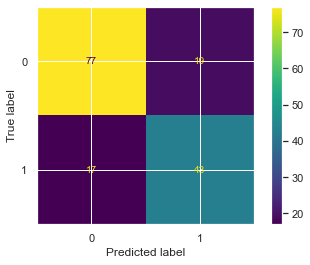

In [437]:
import matplotlib.pyplot as plt
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, Y_test)
plt.show()

In [428]:
results=[]
names=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,random_state=None)
    ev_results=model_selection.cross_val_score(model,X_train,Y_train,cv=k_fold,scoring="accuracy")
    results.append(ev_results)
    names.append(name)
    msg=[name, ev_results.mean(),ev_results.std()]
    print(msg)

['NB', 0.715015015015015, 0.07354997476530611]
['KNN', 0.7524024024024024, 0.057807612807283935]
['SVM', 0.7719969969969969, 0.040918395384553066]
['DT', 0.8213213213213214, 0.06322105905244801]


c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

['LR', 0.8075825825825825, 0.04646298078425592]
['LDA', 0.841066066066066, 0.04387886061034989]


In [417]:
data_used.columns

Index(['Age', 'Education', 'Department', 'Purpose', 'Physical Security',
       'Usage_Category', 'Connectivity_Type', 'Account_Security',
       'StrongPassword_Usage', 'LevelofThinking', 'DeviceSafety',
       'SafeDownload', 'LevelOfThinking', 'Receiving_UnknownFile',
       'ChangePassword', 'Cyber_Training', 'Use_Hints', 'Use_SavePasswrd',
       'SharedPI', 'PI_AsPSWRD', 'Give_Pswrd', 'Click_Adverts', 'Use_VPN',
       'Firewall_ON', 'Recognize_SecurityBreak', 'ExperianceSecurity_Break'],
      dtype='object')

# One hot encoding

In [418]:
#Create object for one-hot encoding
#import category_encoders as ce

data_encoded=pd.get_dummies(data=data["Usage_Category"],drop_first=True)


In [419]:
data_encoded

I am not internet user at all  Infrequent user  Weekly basis
0                                0                0             0
1                                0                0             0
2                                0                0             0
3                                0                0             0
4                                0                0             0
..                             ...              ...           ...
515                              0                0             0
516                              0                0             0
517                              0                0             0
518                              0                0             0
519                              0                0             0

[520 rows x 3 columns]

In [420]:
dep=pd.get_dummies(data=data["Department"],drop_first=True)


In [421]:
dep

Biotechnology  Chemical engineering  Chemical engineering   Chemistry  \
0                0                     0                      0          0   
1                0                     0                      0          0   
2                0                     0                      0          0   
3                0                     0                      0          0   
4                0                     0                      0          0   
..             ...                   ...                    ...        ...   
515              1                     0                      0          0   
516              0                     0                      0          0   
517              0                     0                      0          0   
518              0                     0                      0          0   
519              0                     0                      0          0   

     Chemistry   Civil Engineering  Computer network and security  \
0             0                  0                              0   
1             0                  0                              0   
2             0                  0                              0   
3             0                  0                              1   
4             0                  0                              0   
..          ...                ...                            ...   
515           0                  0                              0   
516           0                  0                              0   
517           0                  0                              0   
518           0                  0                              0   
519           0                  0                              0   

     Computer networking and communications  Computer science and Engineering  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   
..                                      ...                               ...   
515                                       0                                 0   
516                                       0                                 0   
517                                       0                                 0   
518                                       0                                 0   
519                                       0                                 0   

     Computer science and engineering  ...  Natural science  \
0                                   0  ...                0   
1                                   1  ...                0   
2                                   0  ...                0   
3                                   0  ...                0   
4                                   1  ...                0   
..                                ...  ...              ...   
515                                 0  ...                0   
516                                 0  ...                0   
517                                 0  ...                0   
518                                 0  ...                0   
519                                 0  ...                0   

     Project Management  Social science  Software Engineering  \
0                     0               0                     0   
1                     0               0                     0   
2                     0               0                     0   
3                     0               0                     0   
4                     0               0                     0   
..                  ...             ...                   ...   
515                   0               0               

In [422]:
# Encode Internet Connectivity
conectivity=pd.get_dummies(data=data["Connectivity_Type"],drop_first=True)
conectivity

Mobile Data  Mobile Data;Broadband wired connectivity  \
0              0                                         0   
1              0                                         0   
2              0                                         0   
3              0                                         0   
4              0                                         0   
..           ...                                       ...   
515            0                                         0   
516            0                                         0   
517            1                                         0   
518            1                                         0   
519            0                                         0   

     Mobile Data;Public Wi-Fi  \
0                           0   
1                           0   
2                           0   
3                           0   
4                           0   
..                        ...   
515                         0   
516                         0   
517                         0   
518                         0   
519                         0   

     Mobile Data;Public Wi-Fi;Broadband wired connectivity  Private  \
0                                                    0            0   
1                                                    0            0   
2                                                    0            0   
3                                                    0            0   
4                                                    0            0   
..                                                 ...          ...   
515                                                  0            0   
516                                                  0            0   
517                                                  0            0   
518                                                  0            0   
519                                                  0            0   

     Private Wi-Fi  Private Wi-Fi;Broadband wired connectivity  \
0                0                                           0   
1                0                                           0   
2                0                                           0   
3                0                                           0   
4                0                                           0   
..             ...                                         ...   
515              0                                           0   
516              0                                           0   
517              0                                           0   
518              0                                           0   
519              0                                           0   

     Private Wi-Fi;Mobile Data  Private Wi-Fi;Mobile Data;Public Wi-Fi  \
0                            0                                       0   
1                            0                                       0   
2                            0                                       0   
3                            0                                       0   
4                            0                                       0   
..                         ...                                     ...   
515                          0                                       0   
516                          0                                       0   
517                          0                                       0   
518                          0                                       0   
519                          0                                       0   

     Private Wi-Fi;Mobile Data;Public Wi-Fi;Broadband wired connectivity  ...  \
0                                                    0                    ...   
1                                                    0                    ...   
2                                                    0                    ...   
3   

In [423]:
data.head(20)

Gender    Age          Education                              Department  \
0     Male  26-34    Master’s degree                      Information System   
1     Male  26-34    Master’s degree        Computer science and engineering   
2   Female  26-34    Master’s degree                      Information System   
3     Male  26-34    Master’s degree           Computer network and security   
4   Female  26-34    Master’s degree        Computer science and engineering   
5     Male  26-34    Master’s degree           Computer network and security   
6     Male  18-25    Master’s degree        Computer science and Engineering   
7     Male  26-34    Master’s degree        Computer science and engineering   
8     Male  26-34    Master’s degree           Computer network and security   
9     Male  26-34    Master’s degree         Mathematics (numerical Analysis   
10    Male  35-45    Master’s degree                   Software Engineering    
11    Male  26-34    Master’s degree                      Information System   
12    Male  26-34  Bachelor’s degree                      Information System   
13  Female  26-34    Master’s degree         Mathematics (numerical Analysis   
14  Female  26-34    Master’s degree  Computer networking and communications   
15  Female  26-34  Bachelor’s degree                      Information System   
16    Male  26-34  Bachelor’s degree        Computer science and engineering   
17    Male  35-45    Master’s degree                     Information Science   
18    Male  26-34  Bachelor’s degree        Computer science and engineering   
19    Male  18-25  Bachelor’s degree                      Information System   

                                              Purpose  \
0   Education/ Information seeking;Government serv...   
1   Education/ Information seeking;Social networki...   
2   Social networking like email, Facebook, WhatsA...   
3   Education/ Information seeking;Social networki...   
4   Education/ Information seeking;Social networki...   
5   Education/ Information seeking;Entertainment l...   
6                      Education/ Information seeking   
7   Education/ Information seeking;Online banking;...   
8                      Education/ Information seeking   
9   Education/ Information seeking;Social networki...   
10                     Education/ Information seeking   
11  Education/ Information seeking;Online banking;...   
12  Social networking like email, Facebook, WhatsA...   
13  Education/ Information seeking;Entertainment l...   
14  Education/ Information seeking;Online banking;...   
15  Education/ Information seeking;Online banking;...   
16  Education/ Information seeking;Social networki...   
17  Education/ Information seeking;Social networki...   
18  Social networking like email, Facebook, WhatsA...   
19  Education/ Information seeking;Entertainment l...   

                        Physical Security   Usage_Category  \
0                             CCTV camera    Frequent user   
1                CCTV camera;Manual guard    Frequent user   
2                                    None    Frequent user   
3               Manual guard;Danger fence    Frequent user   
4                            Manual guard    Frequent user   
5                             CCTV camera    Frequent user   
6                             CCTV camera    Frequent user   
7                             CCTV camera    Frequent user   
8                                    None    Frequent user   
9                            Manual guard  Infrequent user   
10                           Manual guard    Frequent user   
11  CCTV camera;Manual guard;Danger fence    Frequent user   
12                                   None    Frequent user   
13                           Manual guard    Frequent user   
14               CCTV camera;Manual guard    Frequent user   
15                            CCTV camera    Frequent user   
16                           Manual guard    Frequent user   
17       

In [424]:
data.columns

Index(['Gender', 'Age', 'Education', 'Department', 'Purpose',
       'Physical Security', 'Usage_Category', 'Connectivity_Type',
       'Account_Security', 'StrongPassword_Usage', 'DeviceSafety',
       'SafeDownload', 'Feel_ComfortableReporting_Problems', 'LevelOfThinking',
       'Action_Agreewith', 'LockComputer', 'Receiving_UnknownFile',
       'IS_Knowledge', 'LevelofThinking', 'ChangePassword',
       'Methodto_IdentifySecurityEvent', 'Cyber_Training', 'Security_Policy',
       'SimilarPSWD_Usage', 'Use_Hints', 'Use_SavePasswrd', 'Check_SWUpdate',
       'SharedPI', 'Give_Pswrd', 'Make_Backup', 'Use_VPN', 'Firewall_ON',
       'PI_AsPSWRD', 'Click_Adverts', 'ExperianceSecurity_Break',
       'Admin_Monitor_PC', 'Recognize_SecurityBreak',
       'Leader_Share_SecurityInfo', 'Scan_Device', 'Chek_Identity'],
      dtype='object')

In [425]:
encodedAge=data["Age"].map(EncodeAge)
df=pd.DataFrame(encodedAge)
df

Age
0      2
1      2
2      2
3      2
4      2
..   ...
515    2
516    2
517    2
518    2
519    2

[520 rows x 1 columns]

In [426]:
data.columns.tolist()

['Gender',
 'Age',
 'Education',
 'Department',
 'Purpose',
 'Physical Security',
 'Usage_Category',
 'Connectivity_Type',
 'Account_Security',
 'StrongPassword_Usage',
 'DeviceSafety',
 'SafeDownload',
 'Feel_ComfortableReporting_Problems',
 'LevelOfThinking',
 'Action_Agreewith',
 'LockComputer',
 'Receiving_UnknownFile',
 'IS_Knowledge',
 'LevelofThinking',
 'ChangePassword',
 'Methodto_IdentifySecurityEvent',
 'Cyber_Training',
 'Security_Policy',
 'SimilarPSWD_Usage',
 'Use_Hints',
 'Use_SavePasswrd',
 'Check_SWUpdate',
 'SharedPI',
 'Give_Pswrd',
 'Make_Backup',
 'Use_VPN',
 'Firewall_ON',
 'PI_AsPSWRD',
 'Click_Adverts',
 'ExperianceSecurity_Break',
 'Admin_Monitor_PC',
 'Recognize_SecurityBreak',
 'Leader_Share_SecurityInfo',
 'Scan_Device',
 'Chek_Identity']

<AxesSubplot:>

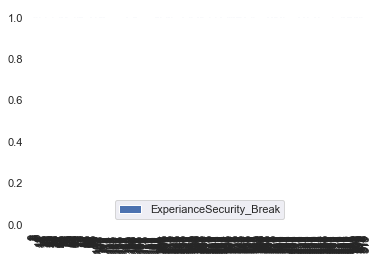

In [427]:
data.plot.bar(stacked=True)